# Churn Prediction and Lifetime Value Analysis

## Table of Contents
<!-- TOC-->

- [Step 1: Business Understanding](#step-1-business-understanding)
  - [Scenario](#scenario)
  - [Objective](#objective)
  - [Hypothesis: ...](#hypothesis-)
  - [Key Business Questions](#key-business-questions)
  - [Approach](#approach)
- [Step 2: Data Understanding](#step-2-data-understanding)
  - [Project Initialisation](#project-initialisation)
  - [Data Collection](#data-collection)
    - [Access the LP2_Telco_churn_first_3000 data set from Microsoft SQL Server](#access-the-LP2_Telco_churn_first_3000-data-from-microsoft-sql-server)
      - [Connect to the database using provided credentials](#connect-to-the-database-using-provided-credentials)
      - [Fetch Information Schema for tables in the database](#fetch-information-schema-for-tables-in-the-database)
      - [Load LP2\_Telco\_churn\_first\_3000 Data](#load-lp2_Telco_churn_3000-data)
    - [Access the LP2_Telco_churn_second_2000 data from GitHub Repository](#access-the-LP2_Telco_churn_second_2000-data-from-github-repository)
    - [Access the Telco-churn-last-2000 data from OneDrive](#access-Telco-churn-last-2000-data-from-onedrive)
  - [Exploratory Data Analysis](#exploratory-data-analysis)
- [Step 3: Data Preparation](#step-3-data-preparation)
  - [Split data set into X, y](#Split data set into X, y)
  - [Split data set into training and evaluation]
  - [Feature Engineering (Creating New Features, (binning & bucketing), Handling Missing Data, Encoding, Standardization, 
        Normalization, Scaling)]
    - [Create a pipeline to preprocess the data]
      - [Separate inpute features into numeric and categorical for different pipelines]
      - [Handle missing values using imputation Techniques]
      - [Scaling or normalize numeric features]
      - [Encode categorical features]
      - [Transformations for skewed data (log, power, custom, etc)]
      - [Balance dataset (depending on what you see)]
- [Step 4: Modeling]
  - [Fit data to the pipeline and train Model]
    - [Train Model 1 - Distance based model]
    - [Train Model 2 - Gradient Descent model]
    - [Train Model 3 - Tree based model]
    - [Train Model 4 - Neural Network]


<!-- /TOC -->

<!-- ## Worlflow
![A beautiful sunset](https://example.com/sunset.jpg "Sunset at the beach") -->

[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding

##### **Project Background:** 
In the competitive telecommunications industry, preventing customer churn is critical to maintaining market share and profitability. This project seeks to leverage machine learning models to predict churn for Azubian Expresso, an African telecommunications company that provides airtime and mobile data bundles. The goal is to enhance customer retention and optimize business strategies by identifying customers at risk of becoming inactive.

##### **Project Objective:**  
The project will focus on churn prediction for Azubian Expresso, specifically addressing:

- **Churn Prediction:**  
  Develop and implement machine learning models to predict the likelihood of customers becoming inactive, i.e., not making any transactions for 90 days. By analyzing customer metrics and behaviors, this model will provide insights into the key factors driving churn, enabling targeted interventions to improve customer retention.

Through this initiative, Azubian Expresso will be equipped with data-driven insights to better serve its customers, improve satisfaction, and reduce churn rates, thereby driving long-term business growth.
 
##### **Stakeholders:**
- Telecommunication provider

##### **Key metrics and success Criteria:**
- Model should have accuracy scores of 85% (on balance data)
- Good models are expected to have an F1 score of > 80%
- An ROC Curve of 80% is ideal for the model to generalise well
- There should be a minimum of 4 Baseline models
- All hyperparameter tuning should only be applied to the Baseline models if they exceed their F1 score

##### **Features/Columns:**
| Features         | Description                                       |
|------------------|---------------------------------------------------|
| user_id          | Unique identifier for each client                 |
| REGION           | The location of each client                       |
| TENURE           | Duration in the network                           |
| MONTANT          | Top-up amount                                     |
| FREQUENCE_RECH   | Number of times the customer refilled             |
| REVENUE          | Monthly income of each client                     |
| ARPU_SEGMENT     | Income over 90 days / 3                           |
| FREQUENCE        | Number of times the client has made an income     |
| DATA_VOLUME      | Number of connections                            |
| ON_NET           | Inter expresso call                               |
| ORANGE           | Call to orange                                    |
| TIGO             | Call to Tigo                                      |
| ZONE1            | Call to zones1                                    |
| ZONE2            | Call to zones2                                    |
| MRG              | A client who is going                             |
| REGULARITY       | Number of times the client is active for 90 days |
| TOP_PACK         | The most active packs                             |
| FREQ_TOP_PACK    | Number of times the client has activated the top pack packages |
| CHURN            | Variable to predict - Target                      |

##### **Key Categories for Churn Prediction:**

1. **Customer Information:**
   - `user_id`: Identifies the customer, necessary for individual predictions.
   - `REGION`: May capture geographical differences in customer behavior, which can be important if churn rates vary by region.

2. **Usage Patterns:**
   - `TENURE`: Captures how long a customer has been with the company, which is often a key predictor of churn. Long-tenured customers may have lower churn risk.
   - `MONTANT`: Shows how much the customer is topping up, a direct indicator of engagement.
   - `FREQUENCE_RECH`: Tracks the number of times the customer has refilled, which may signal customer activity. A decrease in frequency could indicate a risk of churn.
   - `DATA_VOLUME`: Reflects data usage patterns, which could help identify if customers are reducing their usage before churning.
   - `ON_NET`, `ORANGE`, `TIGO`, `ZONE1`, `ZONE2`: Call details that reflect the customer's communication patterns, which might shift prior to churn.
   - `TOP_PACK` and `FREQ_TOP_PACK`: Information about the packages the customer uses most, which could correlate with satisfaction or dissatisfaction.

3. **Revenue and Revenue Generation:**
   - `REVENUE`: Monthly income, which might influence a customer's ability to top up and stay active.
   - `ARPU_SEGMENT`: Average Revenue Per User (ARPU) over 90 days is important for assessing the customer’s value and engagement.
   - `FREQUENCE`: Reflects how often the customer generates revenue, another key engagement metric.

4. **Activity Churn Indicators:**
   - `REGULARITY`: Captures whether the customer has been consistently active over 90 days, directly tied to the target variable (`CHURN`).
   - `MRG`: Unclear what this means, but if it refers to "migrating" or leaving, it could be an indicator of churn.

5. **Target Variable:**
   - `CHURN`: The target variable you are trying to predict (whether the customer churned or not).

6. **Feature Engineered Variable:**
   - `DAYS_SINCE_LAST_ACTIVITY`: It integrates features related to customer engagement (such as regularity of activity over 90 days, refills, data usage, and call activities) to estimate how long it has been since the customer was last active. By normalizing these features and calculating an engagement score, the metric provides a quantifiable measure of customer inactivity. This measure is crucial for identifying customers who may be at risk of churning due to decreased recent engagement.

##### **Hypothesis:** 

**A. Null Hypothesis (H<sub>0</sub>):**
There is no statistically significant relationship between churn rate and days_since_last_activity, implying that the length of time since the last customer activity does not impact the likelihood of churn.

**B. Alternative Hypothesis (H<sub>1</sub>):**
There is a statistically significant relationship between churn rate and days_since_last_activity, suggesting that the length of time since the last customer activity is associated with the likelihood of churn.


##### **Key Business Questions:**

1. **What is the distribution of Churn?**
   - **Purpose:** To understand the overall churn rate in the dataset, providing a baseline for further analysis and highlighting the extent of the churn issue.

2. **How does the churn rate vary across different regions?**
   - **Purpose:** To evaluate how churn rates differ across various regions, helping to identify geographic areas where customer retention efforts may need to be strengthened.

3. **How does user engagement vary with churn across different regions?**
   - **Purpose:** To investigate regional variations in overall user engagement by analyzing key metrics such as call activities, refill frequency, data volume, top pack activations, and regularity (activity consistency over 90 days). This analysis aims to assess how these engagement behaviors correlate with customer churn across different regions.

4. **What is the distribution of top packages with customer churn?**
   - **Purpose:** To analyze how different types of top packages are distributed across churn and non-churned customers. 

5. **How does the activation of top packages relate to churn rates?**
   - **Purpose:** To evaluate if frequent activation of top packages increases customer engagement, potentially reducing churn rates.

6. **How do different levels of call and data activity relate to customer churn?**
   - **Purpose:** To evaluate if varying levels of call and data activity (categorized as Low, Medium, and High) are associated with higher or lower churn rates.

7. **How does customer tenure affect churn rates?**
   - **Purpose:** To analyze whether longer-tenured customers exhibit different churn behavior, possibly indicating loyalty or disengagement over time.

8. **How do top-up amounts and monthly income relate to customer churn rates?**
   - **Purpose:** To understand whether variations in top-up amounts and monthly income are associated with higher or lower churn rates.

9. **How does the top-up amount and monthly income vary across different tenures, and how does this variation relate to customer churn rates?**
   - **Purpose:** The purpose of this analysis is to understand how customer behavior related to top-up amounts and monthly income changes as their tenure with the company progresses.

10. **What is the relationship between customer regularity and churn?**
    - **Purpose:** To understand if customers with consistent activity over 90 days are less likely to churn, offering a measure of sustained engagement.

[Back to Top](#Table-of-Contents)
## Step 2: Data Understanding

### Project Initialization
- Load all necessary library packages and dependencies required for data manipulation, analysis, and visualization (e.g., Pandas, NumPy, Matplotlib, Seaborn, etc.).

### Data Collection
- Gather relevant datasets from various sources, ensuring consistency in structure and format.

### Exploratory Data Analysis (EDA) and Data Cleaning
- Perform an in-depth inspection of the dataset, use visualizations to answer analytical questions, and plan the necessary cleaning, processing, and feature creation.

#### A. Data Quality Assessment & Exploration
- **Assess Data Structure**: Use functions like `info()`, `head()`, and `describe()` to understand the dataset's dimensions, data types, and summary statistics.
- **Identify and Remove Duplicates**: Ensure each entry is unique to prevent multiple representations of the same data point.
- **Handle Irrelevant Data**: Exclude unnecessary columns or fields that do not contribute to the analysis.
- **Merge Data**: Combine multiple dataframes, if needed, to create a complete dataset for analysis.
- **Identify Missing Data**: Evaluate the extent of missing values and develop strategies for handling them (imputation, removal, etc.).

#### B. Univariate Analysis
- **Analyze Individual Features**: Use visualizations (e.g., histograms, bar charts, and box plots) and summary statistics to explore the distribution and characteristics of individual variables.

#### C. Bivariate Analysis
- **Analyze Relationships Between Two Variables**: Use methods such as scatter plots, correlation matrices, and bar plots to examine the relationship between two variables.

#### D. Multivariate Analysis
- **Analyze Interactions Among Multiple Variables**: Explore the relationships between multiple features using techniques like pair plots, heatmaps, and regression analysis to capture complex patterns.

#### E. Handling Missing Values and Feature Engineering
- **Impute or Drop Missing Values**: Address missing values by applying appropriate strategies like median or mean imputation, or removing missing data if necessary.
- **Create New Features**: Generate new features that could add more value to the analysis, such as aggregated variables or domain-specific metrics.

#### F. Answer Analytical Questions & Deploy Visualizations to Churn Application
- **Hypothesis Testing**: Conduct statistical tests (e.g., Chi-square test, t-test, correlation analysis) to validate or reject assumptions regarding customer churn and related features.
- **Key Insights**: Summarize and extract significant findings from the data analysis, focusing on trends, correlations, and important predictors of churn.
- **Deploy Visualizations to Churn Application**: Integrate the generated visualizations (such as bar plots, pair plots, correlation matrices, and others) into the Churn Application, allowing stakeholders to explore the data interactively and gain insights through a user-friendly interface. Power BI or other suitable tools can also be used for live dashboards if necessary.

### Project Initialisation

In [135]:
# Standard Library Imports
import os
import warnings
import math
import logging
import time
import pickle

# Data Handling and Utilities
import pandas as pd
import numpy as np
from joblib import Parallel, delayed, dump
import joblib

# Statistical Analysis
from scipy.stats import chi2_contingency, ttest_ind

# Feature Processing (Includes data imputation, transformers, and scaling)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    LabelEncoder, 
    FunctionTransformer, 
    OneHotEncoder,
    MinMaxScaler, 
    RobustScaler, 
    quantile_transform
)
from sklearn.model_selection import (
    train_test_split, 
    StratifiedShuffleSplit, 
    GridSearchCV
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample, estimator_html_repr
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Machine Learning Models
from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV

# Model Evaluation
from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score, 
    roc_auc_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    log_loss, 
    roc_curve
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors

# Settings & Configurations
warnings.filterwarnings("ignore")  # Suppress warnings
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# Plot Styling (Dark Background)
sns.set_theme(style="white", palette="pastel", font="sans-serif", font_scale=1.5)
plt.style.use("default")
custom_palette = ["cyan", "magenta", "yellow"]

### Data Collection

#### Access Azubian telco-churn data from file directory

project_root/  
├── Capstone_Model/  
│   ├── notebooks/  
│   │   └── Capstone_Project.ipynb  
│   └── data/  
│       ├── Train.csv  
│       ├── Test.csv  
│       ├── SampleSubmission.csv  
│       └── VariableDefinitions.csv  

##### Azubian Expresso train dataset

In [2]:
# Path of csv file
file_path = '../data/Train.csv'

# Check if the file exists at the specified path
if os.path.exists(file_path):
    print("File exists at the specified path.")
    try:
        # Read the Excel file into a pandas DataFrame
        df_train = pd.read_csv(file_path)
        
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("File does not exist at the specified path.")

# # Display the DataFrame
df_train.head()

File exists at the specified path.


user_id       REGION        TENURE  \
0  7ee9e11e342e27c70455960acc80d3f91c1286d1        DAKAR  K > 24 month   
1  50443f42bdc92b10388fc56e520e4421a5fa655c          NaN  K > 24 month   
2  da90b5c1a9b204c186079f89969aa01cb03c91b2          NaN  K > 24 month   
3  364ec1b424cdc64c25441a444a16930289a0051e  SAINT-LOUIS  K > 24 month   
4  d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb        DAKAR  K > 24 month   

   MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
0  20000.0            47.0  21602.0        7201.0       52.0       8835.0   
1      NaN             NaN      NaN           NaN        NaN          NaN   
2      NaN             NaN      NaN           NaN        NaN          NaN   
3   7900.0            19.0   7896.0        2632.0       25.0       9385.0   
4  12350.0            21.0  12351.0        4117.0       29.0       9360.0   

   ON_NET  ORANGE   TIGO  ZONE1  ZONE2 MRG  REGULARITY  \
0  3391.0   396.0  185.0    NaN    NaN  NO          62   
1     NaN     NaN    NaN    NaN    NaN  NO           3   
2     NaN     NaN    NaN    NaN    NaN  NO           1   
3    27.0    46.0   20.0    NaN    2.0  NO          61   
4    66.0   102.0   34.0    NaN    NaN  NO          56   

                         TOP_PACK  FREQ_TOP_PACK  CHURN  
0  On net 200F=Unlimited _call24H           30.0      0  
1                             NaN            NaN      0  
2                             NaN            NaN      0  
3                Data:490F=1GB,7d            7.0      0  
4           All-net 500F=2000F;5d           11.0      0

##### Azubian Expresso test dataset

In [3]:
# Path of csv file
file_path = '../data/Test.csv'

# Check if the file exists at the specified path
if os.path.exists(file_path):
    print("File exists at the specified path.")
    try:
        # Read the Excel file into a pandas DataFrame
        df_test = pd.read_csv(file_path)
        
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("File does not exist at the specified path.")

# # Display the DataFrame
df_test.head()

File exists at the specified path.


user_id       REGION         TENURE  \
0  51fe4c3347db1f8571d18ac03f716c41acee30a4        MATAM  I 18-21 month   
1  5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e          NaN   K > 24 month   
2  5a4db591c953a8d8f373877fad37aaf4268899a1          NaN   K > 24 month   
3  8bf9b4d8880aeba1c9a0da48be78f12e629be37c          NaN   K > 24 month   
4  c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df  SAINT-LOUIS   K > 24 month   

   MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
0   2500.0             5.0   2500.0         833.0        5.0          0.0   
1      NaN             NaN      NaN           NaN        NaN          NaN   
2      NaN             NaN      NaN           NaN        NaN          0.0   
3      NaN             NaN      NaN           NaN        NaN          NaN   
4   5100.0             7.0   5637.0        1879.0       15.0       7783.0   

   ON_NET  ORANGE  TIGO  ZONE1  ZONE2 MRG  REGULARITY               TOP_PACK  \
0    64.0    70.0   NaN    NaN    NaN  NO          35  All-net 500F=2000F;5d   
1     NaN     NaN   NaN    NaN    NaN  NO           2                    NaN   
2     NaN     NaN   NaN    NaN    NaN  NO          22                    NaN   
3     NaN     NaN   NaN    NaN    NaN  NO           6                    NaN   
4    30.0    24.0   0.0    0.0    NaN  NO          60     Data:1000F=2GB,30d   

   FREQ_TOP_PACK  
0            5.0  
1            NaN  
2            NaN  
3            NaN  
4            4.0

### **Exploratory Data Analysis (EDA)**

#### A. Data Quality Assessment & Data exploration

In [4]:
# Check the datatype and the number of columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1077024 non-null  object 
 1   REGION          652687 non-null   object 
 2   TENURE          1077024 non-null  object 
 3   MONTANT         699139 non-null   float64
 4   FREQUENCE_RECH  699139 non-null   float64
 5   REVENUE         714669 non-null   float64
 6   ARPU_SEGMENT    714669 non-null   float64
 7   FREQUENCE       714669 non-null   float64
 8   DATA_VOLUME     547261 non-null   float64
 9   ON_NET          683850 non-null   float64
 10  ORANGE          629880 non-null   float64
 11  TIGO            432250 non-null   float64
 12  ZONE1           84898 non-null    float64
 13  ZONE2           68794 non-null    float64
 14  MRG             1077024 non-null  object 
 15  REGULARITY      1077024 non-null  int64  
 16  TOP_PACK        626129 non-null   ob

In [5]:
# Check the datatype and the number of columns
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190063 entries, 0 to 190062
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         190063 non-null  object 
 1   REGION          115330 non-null  object 
 2   TENURE          190063 non-null  object 
 3   MONTANT         123695 non-null  float64
 4   FREQUENCE_RECH  123695 non-null  float64
 5   REVENUE         126422 non-null  float64
 6   ARPU_SEGMENT    126422 non-null  float64
 7   FREQUENCE       126422 non-null  float64
 8   DATA_VOLUME     96716 non-null   float64
 9   ON_NET          120771 non-null  float64
 10  ORANGE          111417 non-null  float64
 11  TIGO            76555 non-null   float64
 12  ZONE1           14850 non-null   float64
 13  ZONE2           12011 non-null   float64
 14  MRG             190063 non-null  object 
 15  REGULARITY      190063 non-null  int64  
 16  TOP_PACK        110773 non-null  object 
 17  FREQ_TOP_P

In [6]:
# Print column names of all Dataframes
print("Column names of Train dataframe:")
print(df_train.columns)

print("\nColumn names Test dataframe:")
print(df_test.columns)

Column names of Train dataframe:
Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

Column names Test dataframe:
Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK'],
      dtype='object')


In [7]:
# Check shape of the dataframes
print("Number of columns in Train dataframe:", df_train.shape[1])
print("Number of columns in Test dataframe:", df_test.shape[1])

Number of columns in Train dataframe: 19
Number of columns in Test dataframe: 18


In [8]:
# Create a copy of the original DataFrame to preserve the original data
df_train_eda = df_train.copy()

In [9]:
# Determine the proportion of missing values
missing_percentage = (df_train_eda.isnull().mean() * 100).round(2)

# Check for duplicated values
duplicate_count = df_train_eda.duplicated(subset=None, keep=False).sum()

# Display Results
print("Proportion of missing values in df_train_eda dataset:\n")
print(missing_percentage)
print("\nNumber of duplicated rows in df_train_eda dataset:", duplicate_count)

Proportion of missing values in df_train_eda dataset:

user_id            0.00
REGION            39.40
TENURE             0.00
MONTANT           35.09
FREQUENCE_RECH    35.09
REVENUE           33.64
ARPU_SEGMENT      33.64
FREQUENCE         33.64
DATA_VOLUME       49.19
ON_NET            36.51
ORANGE            41.52
TIGO              59.87
ZONE1             92.12
ZONE2             93.61
MRG                0.00
REGULARITY         0.00
TOP_PACK          41.86
FREQ_TOP_PACK     41.86
CHURN              0.00
dtype: float64

Number of duplicated rows in df_train_eda dataset: 0


In [10]:
df_train['REVENUE'].mean()

5506.05079834161

In [11]:
# Get the list of all column names in the DataFrame
columns = df_train_eda.columns

# Print details of unique values for each column in the DataFrame
for column in columns:
    print(f'{column}')  
    print(f'There are {df_train_eda[column].unique().size} unique values')  
    print(f'{df_train_eda[column].unique()}')  
    print('_' * 80)  

user_id


There are 1077024 unique values
['7ee9e11e342e27c70455960acc80d3f91c1286d1'
 '50443f42bdc92b10388fc56e520e4421a5fa655c'
 'da90b5c1a9b204c186079f89969aa01cb03c91b2' ...
 'd6831b8edacb7d9928b3f053fb1283574577ae42'
 'cb1f6510b084173c0deae49095f35ac29f916701'
 '28f56fd0d9f8d8647bb6c62e7a3f4f35f49f4d6f']
________________________________________________________________________________
REGION
There are 15 unique values
['DAKAR' nan 'SAINT-LOUIS' 'THIES' 'LOUGA' 'MATAM' 'FATICK' 'KAOLACK'
 'DIOURBEL' 'TAMBACOUNDA' 'ZIGUINCHOR' 'KOLDA' 'KAFFRINE' 'SEDHIOU'
 'KEDOUGOU']
________________________________________________________________________________
TENURE
There are 8 unique values
['K > 24 month' 'E 6-9 month' 'H 15-18 month' 'G 12-15 month'
 'I 18-21 month' 'J 21-24 month' 'F 9-12 month' 'D 3-6 month']
________________________________________________________________________________
MONTANT
There are 4358 unique values
[20000.    nan  7900. ... 35475.  6216.  8949.]
____________________________

In [12]:
# Map the values of CHURN as Yes and No
df_train_eda['CHURN'] = df_train_eda['CHURN'].map({1: 'Yes', 0: 'No'})

In [13]:
# Define patterns for different package types
patterns = {
    'On net 200F=Unlimited _call24H', 'nan', 'Data:490F=1GB,7d', 
    'All-net 500F=2000F;5d', 'On-net 500=4000,10d', 'Data:3000F=10GB,30d', 
    'Data:200F=Unlimited,24H', 'IVR Echat_Daily_50F', 'Data:1000F=2GB,30d', 
    'Mixt 250F=Unlimited_call24H', 'On-net 1000F=10MilF;10d', 
    'MIXT:500F=2500F on net _2500F off net;2d', 'Data:200F=100MB,24H', 
    'All-net 600F=3000F ;5d', 'On-net 200F=60mn;1d', 'Twter_U2opia_Daily', 
    'Data:100F=40MB,24H', 'All-net 500F=2000F_AllNet_Unlimited', 
    'On net 200F=3000F_10Mo ;24H', '200=Unlimited1Day', 'Jokko_Daily', 
    'Data:1000F=5GB,7d', 'Data:700F=1.5GB,7d', 'All-net 1000=5000;5d', 
    'Data:150F=SPPackage1,24H', 'IVR Echat_Monthly_500F', 'VAS(IVR_Radio_Daily)', 
    'MIXT:390F=04HOn-net_400SMS_400Mo;4h', 'MIXT:200mnoffnet_unlonnet_5Go;30d', 
    'On-net 500F_FNF;3d', 'MIXT:590F=02H_On-net_200SMS_200Mo;24h', 
    'Data:1500F=3GB,30D', 'Data:300F=100MB,2d', 'Data:500F=2GB,24H', 
    'Data:490F=Night,00H-08H', 'All-net 1000F=(3000FOn+3000FOff);5d', 
    'New_YAKALMA_4_ALL', 'MIXT:10000F=10hAllnet_3Go_1h_Zone3;30d', 
    'Yewouleen_PKG', 'Data:1500F=SPPackage1,30d', 'WIFI_Family_2MBPS', 
    'All-net 500F=1250F_AllNet_1250_Onnet;48h', 'On-net 300F=1800F;3d', 
    'Twter_U2opia_Weekly', 'Data:50F=30MB_24H', 'MIXT:1000F=4250Offnet_4250FOnnet_100Mo;5d', 
    'WIFI_Family_4MBPS', 'Data:700F=SPPackage1,7d', 'Jokko_promo', 
    'CVM_on-netbundle500=5000', 'Pilot_Youth4_490', 'All-net 300=600;2d', 
    'Twter_U2opia_Monthly', 'IVR_Echat_Weekly_200F', 'TelmunCRBT_daily', 
    'MROMO_TIMWES_RENEW', 'MIXT:500F=75(SMS,ONNET,Mo)_1000FAllNet;24h', 
    'Pilot_Youth1_290', 'On-net 2000f_One_Month_100H;30d', 
    'Data:DailyCycle_Pilot_1.5GB', 'Jokko_Monthly', 'Facebook_MIX_2D', 
    'CVM_200f=400MB', 'YMGX100=1hourFNF,24H/1month', 'Jokko_Weekly', 
    'Internat:1000F_Zone_1;24H', 'Data:30Go_V30_Days', 'SUPERMAGIK_5000', 
    'FNF2(JAPPANTE)', '200F=10mnOnNetValid1H', 
    'MIXT:5000F=80Konnet_20Koffnet_250Mo;30d', 'pilot_offer6', 
    '500=Unlimited3Day', 'VAS(IVR_Radio_Monthly)', 'MROMO_TIMWES_OneDAY', 
    'Mixt:500F=2500Fonnet_2500Foffnet;5d', 'Internat:1000F_Zone_3;24h', 
    'All-net5000=20000off+20000on;30d', 'EVC_500=2000F', 
    'Data:200F=1GB,24H', 'Staff_CPE_Rent', 'SUPERMAGIK_1000', 
    'All-net500F=4000F;5d', '305155009', 'DataPack_Incoming', 
    'Incoming_Bonus_woma', 'FIFA_TS_daily', 'VAS(IVR_Radio_Weekly)', 
    '1000=Unlimited7Day', 'Internat:2000F_Zone_2;24h', 'FNF_Youth_ESN', 
    'WIFI_Family_10MBPS', 'Data_EVC_2Go24H', 'MIXT:4900F=10HOnnet_1,5Go;30d', 
    'EVC_Jokko_Weekly', 'EVC_JOKKO30', 'Data_Mifi_20Go', 'Data_Mifi_10Go_Monthly', 
    'CVM_150F_unlimited', 'CVM_100F_unlimited', 'CVM_100f=200MB', 
    'FIFA_TS_weekly', '150=unlimitedpilotoauto', 'CVM_100f=500OnNet', 
    'GPRS_3000Equal10GPORTAL', 'EVC_100Mo', 'GPRS_PKG_5GO_ILLIMITE', 
    'NEW_CLIR_PERMANENT_LIBERTE_MOBILE', 'EVC_1Go', 'pilot_offer4', 
    'CVM_500f=2GB', 'pack_chinguitel_24h', 'PostpaidFORFAIT10HPackage', 
    'EVC_700Mo', 'CVM_On-net400f=2200F', 'CVM_On-net1300f=12500', 
    'All-net500=4000off+4000on;24H', 'SMSMax', 'EVC_4900=12000F', 
    'APANews_weekly', 'NEW_CLIR_TEMPALLOWED_LIBERTE_MOBILE', 
    'Data:OneTime_Pilot_1.5GB', 'YMGXon-net100=700F,24H', '301765007', 
    '1500=Unlimited7Day', 'APANews_monthly', '200=unlimitedpilotoauto'
}

# Define classification function
def classify_top_pack(top_pack):
    if pd.isna(top_pack):
        return np.nan
    top_pack = top_pack.lower()
    if any(keyword in top_pack for keyword in ['data', 'gb', 'mb', 'internet', 'web', 'wifi', 'internat', 'mifi', 'unlimited3day', 'unlimited1day', 'unlimited7day']):
        return 'Data Package'
    elif any(keyword in top_pack for keyword in ['call', 'unlimited call', 'minutes', 'on net', 'on-net', 'all-net', 'onnet']):
        return 'Voice Package'
    elif 'sms' in top_pack or 'text' in top_pack:
        return 'SMS Package'
    elif 'ivr' in top_pack:
        return 'IVR Package'
    elif 'twter' in top_pack:
        return 'Twitter Package'
    elif 'facebook' in top_pack:
        return 'Facebook Package'
    elif 'evr' in top_pack:
        return 'EVR Package'
    elif 'evc' in top_pack:
        return 'EVC Package'
    elif 'jokko' in top_pack:
        return 'Jokko Package'
    elif 'pilot' in top_pack:
        return 'Pilot Package'
    elif 'cvm' in top_pack:
        return 'CVM Package'
    elif 'gprs' in top_pack:
        return 'GPRS Package'
    elif any(keyword in top_pack for keyword in ['combo', 'mixt', 'package', 'bundle']):
        return 'Combo Package'
    elif any(keyword in top_pack for keyword in ['news', 'fifa', 'postpaid', 'bonus', 'fnf', 'incoming']):
        return 'Subscription or Bonus Package'
    else:
        return 'Other Package'

# Apply the classification function to the TOP_PACK column
df_train_eda['TOP_PACK'] = df_train_eda['TOP_PACK'].apply(classify_top_pack)

# Print the unique values to confirm the changes
print(df_train_eda['TOP_PACK'].unique())

['Voice Package' nan 'Data Package' 'IVR Package' 'Twitter Package'
 'Jokko Package' 'Other Package' 'Combo Package' 'Pilot Package'
 'Facebook Package' 'Subscription or Bonus Package' 'EVC Package'
 'CVM Package' 'GPRS Package' 'SMS Package']


In [14]:
# Set 'user_id' column as the index of the DataFrame
df_train_eda.set_index('user_id', inplace=True)

# Display the first few rows of the DataFrame to verify changes
df_train_eda.head()

REGION        TENURE  MONTANT  \
user_id                                                                        
7ee9e11e342e27c70455960acc80d3f91c1286d1        DAKAR  K > 24 month  20000.0   
50443f42bdc92b10388fc56e520e4421a5fa655c          NaN  K > 24 month      NaN   
da90b5c1a9b204c186079f89969aa01cb03c91b2          NaN  K > 24 month      NaN   
364ec1b424cdc64c25441a444a16930289a0051e  SAINT-LOUIS  K > 24 month   7900.0   
d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb        DAKAR  K > 24 month  12350.0   

                                          FREQUENCE_RECH  REVENUE  \
user_id                                                             
7ee9e11e342e27c70455960acc80d3f91c1286d1            47.0  21602.0   
50443f42bdc92b10388fc56e520e4421a5fa655c             NaN      NaN   
da90b5c1a9b204c186079f89969aa01cb03c91b2             NaN      NaN   
364ec1b424cdc64c25441a444a16930289a0051e            19.0   7896.0   
d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb            21.0  12351.0   

                                          ARPU_SEGMENT  FREQUENCE  \
user_id                                                             
7ee9e11e342e27c70455960acc80d3f91c1286d1        7201.0       52.0   
50443f42bdc92b10388fc56e520e4421a5fa655c           NaN        NaN   
da90b5c1a9b204c186079f89969aa01cb03c91b2           NaN        NaN   
364ec1b424cdc64c25441a444a16930289a0051e        2632.0       25.0   
d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb        4117.0       29.0   

                                          DATA_VOLUME  ON_NET  ORANGE   TIGO  \
user_id                                                                        
7ee9e11e342e27c70455960acc80d3f91c1286d1       8835.0  3391.0   396.0  185.0   
50443f42bdc92b10388fc56e520e4421a5fa655c          NaN     NaN     NaN    NaN   
da90b5c1a9b204c186079f89969aa01cb03c91b2          NaN     NaN     NaN    NaN   
364ec1b424cdc64c25441a444a16930289a0051e       9385.0    27.0    46.0   20.0   
d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb       9360.0    66.0   102.0   34.0   

                                          ZONE1  ZONE2 MRG  REGULARITY  \
user_id                                                                  
7ee9e11e342e27c70455960acc80d3f91c1286d1    NaN    NaN  NO          62   
50443f42bdc92b10388fc56e520e4421a5fa655c    NaN    NaN  NO           3   
da90b5c1a9b204c186079f89969aa01cb03c91b2    NaN    NaN  NO           1   
364ec1b424cdc64c25441a444a16930289a0051e    NaN    2.0  NO          61   
d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb    NaN    NaN  NO          56   

                                               TOP_PACK  FREQ_TOP_PACK CHURN  
user_id                                                                       
7ee9e11e342e27c70455960acc80d3f91c1286d1  Voice Package           30.0    No  
50443f42bdc92b10388fc56e520e4421a5fa655c            NaN            NaN    No  
da90b5c1a9b204c186079f89969aa01cb03c91b2            NaN            NaN    No  
364ec1b424cdc64c25441a444a16930289a0051e   Data Package            7.0    No  
d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb  Voice Package           11.0    No

In [15]:
# Calculate the number of missing values in each column
missing_values = df_train_eda.isna().sum()

# Filter columns with no missing values
columns_no_missing = missing_values[missing_values == 0].index

# Print the number of columns with no missing values
print(f'Number of columns with no missing values: {len(columns_no_missing)}\n')

# Print the names of these columns
print(f'Columns with no missing values: {columns_no_missing.tolist()}\n')

# Print the total number of columns with missing values
print(f'Number of columns with missing values: {df_train_eda.shape[1] - len(columns_no_missing)}')

Number of columns with no missing values: 4

Columns with no missing values: ['TENURE', 'MRG', 'REGULARITY', 'CHURN']

Number of columns with missing values: 14


In [16]:
# Calculate the threshold for non-NA values to retain rows
threshold = len(columns_no_missing) + 1

# Print the calculated threshold for retaining rows with sufficient non-NA values
print(f'Threshold to retain non-NA values: {threshold}\n')

# Print the number of rows with fewer than the threshold non-NA values before dropping rows
print(f'Before dropna: {(df_train_eda.notna().sum(axis=1) < threshold).sum()}\n')

# Drop rows with fewer than the threshold non-NA values
df_train_eda.dropna(thresh=threshold, inplace=True)

# Print the number of rows with fewer than the threshold non-NA values after dropping rows
print(f'After dropna: {(df_train_eda.notna().sum(axis=1) < threshold).sum()}')

# Display the first few rows of the DataFrame to check the result of the drop operation
df_train_eda.head()

Threshold to retain non-NA values: 5

Before dropna: 208983

After dropna: 0


REGION        TENURE  MONTANT  \
user_id                                                                        
7ee9e11e342e27c70455960acc80d3f91c1286d1        DAKAR  K > 24 month  20000.0   
364ec1b424cdc64c25441a444a16930289a0051e  SAINT-LOUIS  K > 24 month   7900.0   
d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb        DAKAR  K > 24 month  12350.0   
b91a81e590d0dd029d99002d4226b9ca2cdf3cbc        DAKAR   E 6-9 month   2000.0   
42335a2a6a2a4cd30452ce9bc611bd66b3a9d4c2        DAKAR  K > 24 month   3000.0   

                                          FREQUENCE_RECH  REVENUE  \
user_id                                                             
7ee9e11e342e27c70455960acc80d3f91c1286d1            47.0  21602.0   
364ec1b424cdc64c25441a444a16930289a0051e            19.0   7896.0   
d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb            21.0  12351.0   
b91a81e590d0dd029d99002d4226b9ca2cdf3cbc             2.0   2000.0   
42335a2a6a2a4cd30452ce9bc611bd66b3a9d4c2             1.0   3000.0   

                                          ARPU_SEGMENT  FREQUENCE  \
user_id                                                             
7ee9e11e342e27c70455960acc80d3f91c1286d1        7201.0       52.0   
364ec1b424cdc64c25441a444a16930289a0051e        2632.0       25.0   
d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb        4117.0       29.0   
b91a81e590d0dd029d99002d4226b9ca2cdf3cbc         667.0        3.0   
42335a2a6a2a4cd30452ce9bc611bd66b3a9d4c2        1000.0        1.0   

                                          DATA_VOLUME  ON_NET  ORANGE   TIGO  \
user_id                                                                        
7ee9e11e342e27c70455960acc80d3f91c1286d1       8835.0  3391.0   396.0  185.0   
364ec1b424cdc64c25441a444a16930289a0051e       9385.0    27.0    46.0   20.0   
d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb       9360.0    66.0   102.0   34.0   
b91a81e590d0dd029d99002d4226b9ca2cdf3cbc       4206.0   246.0   709.0   10.0   
42335a2a6a2a4cd30452ce9bc611bd66b3a9d4c2          NaN     NaN     NaN    NaN   

                                          ZONE1  ZONE2 MRG  REGULARITY  \
user_id                                                                  
7ee9e11e342e27c70455960acc80d3f91c1286d1    NaN    NaN  NO          62   
364ec1b424cdc64c25441a444a16930289a0051e    NaN    2.0  NO          61   
d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb    NaN    NaN  NO          56   
b91a81e590d0dd029d99002d4226b9ca2cdf3cbc    NaN    NaN  NO          62   
42335a2a6a2a4cd30452ce9bc611bd66b3a9d4c2    NaN    NaN  NO           6   

                                               TOP_PACK  FREQ_TOP_PACK CHURN  
user_id                                                                       
7ee9e11e342e27c70455960acc80d3f91c1286d1  Voice Package           30.0    No  
364ec1b424cdc64c25441a444a16930289a0051e   Data Package            7.0    No  
d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb  Voice Package           11.0    No  
b91a81e590d0dd029d99002d4226b9ca2cdf3cbc  Voice Package            1.0    No  
42335a2a6a2a4cd30452ce9bc611bd66b3a9d4c2   Data Package            1.0    No

In [17]:
# Determine the proportion of missing values
missing_percentage = (df_train_eda.isnull().mean() * 100).round(2)

# Check for duplicated values
duplicate_count = df_train_eda.duplicated(subset=None, keep=False).sum()

# Display Results
print("Proportion of missing values in df_train_eda dataset:\n")
print(missing_percentage)
print("\nNumber of duplicated rows in df_train_eda dataset:", duplicate_count)

Proportion of missing values in df_train_eda dataset:

REGION            24.81
TENURE             0.00
MONTANT           19.46
FREQUENCE_RECH    19.46
REVENUE           17.67
ARPU_SEGMENT      17.67
FREQUENCE         17.67
DATA_VOLUME       36.95
ON_NET            21.22
ORANGE            27.44
TIGO              50.20
ZONE1             90.22
ZONE2             92.07
MRG                0.00
REGULARITY         0.00
TOP_PACK          27.87
FREQ_TOP_PACK     27.87
CHURN              0.00
dtype: float64

Number of duplicated rows in df_train_eda dataset: 116915


In [18]:
# Display summary statistics for all numeric columns in the DataFrame
df_train_eda.describe().T

count         mean           std   min     25%     50%  \
MONTANT         699139.0  5529.210895   7104.737952  20.0  1000.0  3000.0   
FREQUENCE_RECH  699139.0    11.523756     13.261938   1.0     2.0     7.0   
REVENUE         714669.0  5506.050798   7175.625010   1.0  1000.0  3000.0   
ARPU_SEGMENT    714669.0  1835.355961   2391.870902   0.0   333.0  1000.0   
FREQUENCE       714669.0    13.974439     14.687059   1.0     3.0     9.0   
DATA_VOLUME     547261.0  3368.801722  12898.928039   0.0     0.0   258.0   
ON_NET          683850.0   277.065798    874.315378   0.0     5.0    27.0   
ORANGE          629880.0    95.160804    203.020261   0.0     7.0    29.0   
TIGO            432250.0    23.105018     64.035464   0.0     2.0     6.0   
ZONE1            84898.0     8.167483     39.245883   0.0     0.0     1.0   
ZONE2            68794.0     7.709844     36.090513   0.0     0.0     2.0   
REGULARITY      868041.0    33.676083     21.061412   1.0    13.0    34.0   
FREQ_TOP_PACK   626129.0     9.262446     12.242316   1.0     2.0     5.0   

                   75%        max  
MONTANT         7350.0   470000.0  
FREQUENCE_RECH    16.0      131.0  
REVENUE         7360.0   532177.0  
ARPU_SEGMENT    2453.0   177392.0  
FREQUENCE         20.0       91.0  
DATA_VOLUME     2905.0  1702309.0  
ON_NET           156.0    50809.0  
ORANGE            99.0    12040.0  
TIGO              20.0     4174.0  
ZONE1              3.0     2507.0  
ZONE2              5.0     3697.0  
REGULARITY        55.0       62.0  
FREQ_TOP_PACK     12.0      624.0

In [19]:
# Display summary statistics for all object (categorical) columns in the DataFrame
df_train_eda.describe(include='object').T


count unique            top    freq
REGION    652687     14          DAKAR  256259
TENURE    868041      8   K > 24 month  828231
MRG       868041      1             NO  868041
TOP_PACK  626129     14  Voice Package  387075
CHURN     868041      2             No  796946

#### B. Univariate Analysis

##### Feature Categorisation

In [20]:
# For ease of analysis, the features of the df_train_eda have been categorised as follows:

# Target variable
target = ['CHURN']

# Customer Information
customer_info = ['REGION']

# Usage Patterns
usage_patterns = ['TENURE', 'MONTANT', 'FREQUENCE_RECH', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'TOP_PACK', 'FREQ_TOP_PACK']

# Revenue and Revenue Generation
revenue_generation = ['REVENUE', 'ARPU_SEGMENT', 'FREQUENCE']

# Activity and Churn Indicators
activity_churn_indicators = ['REGULARITY', 'MRG']

##### Target Variable

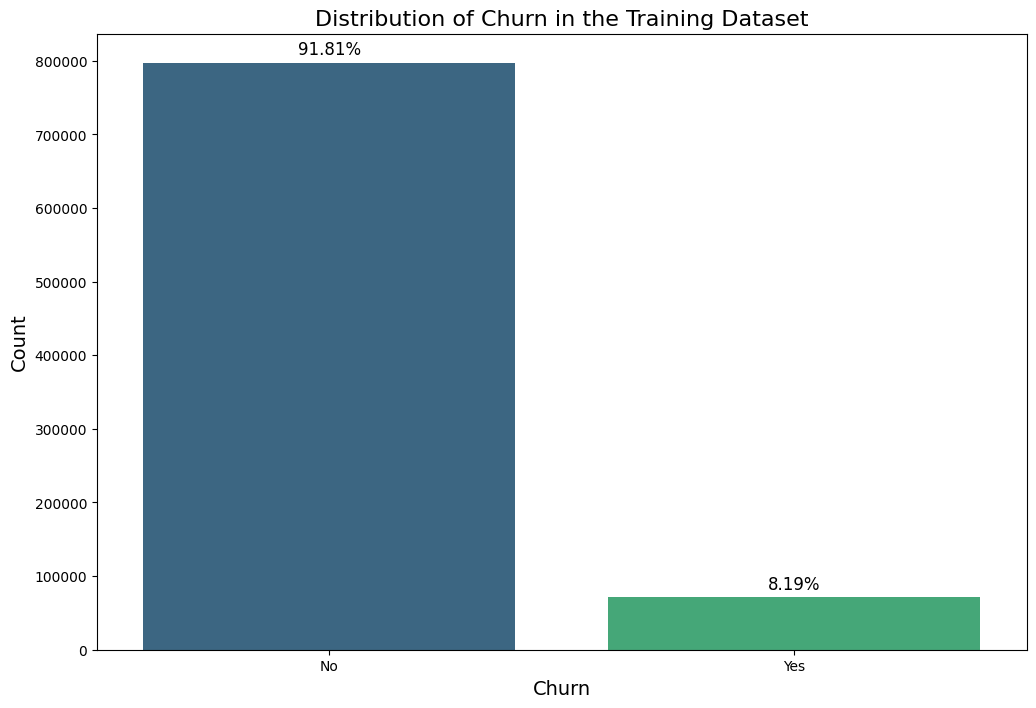

In [21]:
# Plot Churn distribution
plt.figure(figsize=(12,8))  
ax = sns.countplot(x=df_train_eda[target[0]], palette='viridis')  

# Add percentage labels on top of the bars
total = len(df_train_eda)
for container in ax.containers:
    labels = [f'{(h.get_height()/total)*100:.2f}%' for h in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding=3, fontsize=12)

# Adding titles and labels
plt.title('Distribution of Churn in the Training Dataset', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display plot
plt.show()

`Comments`

The churn rate for the Telco stands at 8.19%, highlighting a significant imbalance between the classes of the target variable in the training dataset. This imbalance creates a situation where models are likely to become biased toward predicting the majority class (No Churn), which may result in poor performance in detecting the minority class (Yes Churn). Given that the primary interest lies in accurately predicting churn, this imbalance is not favorable for modeling.

`Potential Solutions`

- Oversampling can be adopted to increase the minority class (Yes Churn) by duplicating or synthetically generating more instances using methods like SMOTE. Alternatively, undersampling can reduce the majority class (No Churn) by removing instances, though this approach may lead to the loss of valuable data.

- Many machine learning algorithms (e.g., decision trees, logistic regression, SVMs) allow for class weighting, where higher penalties are assigned to misclassifying the minority class, encouraging the model to focus more on Yes Churn cases.

- Since accuracy is not ideal for imbalanced datasets. Metrics such as precision, recall, F1-score, and AUC-ROC offer better insights into the model’s performance in detecting churners.

- Ensemble methods like Random Forest and XGBoost can be especially useful in handling imbalanced datasets, particularly when combined with resampling or class weighting.

- To maintain class distribution across all data splits during cross-validation, ensure the data is stratified. This ensures more reliable model evaluation.

- Adjusting the decision threshold can help balance precision and recall depending on the business goal, such as prioritizing the capture of more churners or minimizing false positives.

##### Customer Information

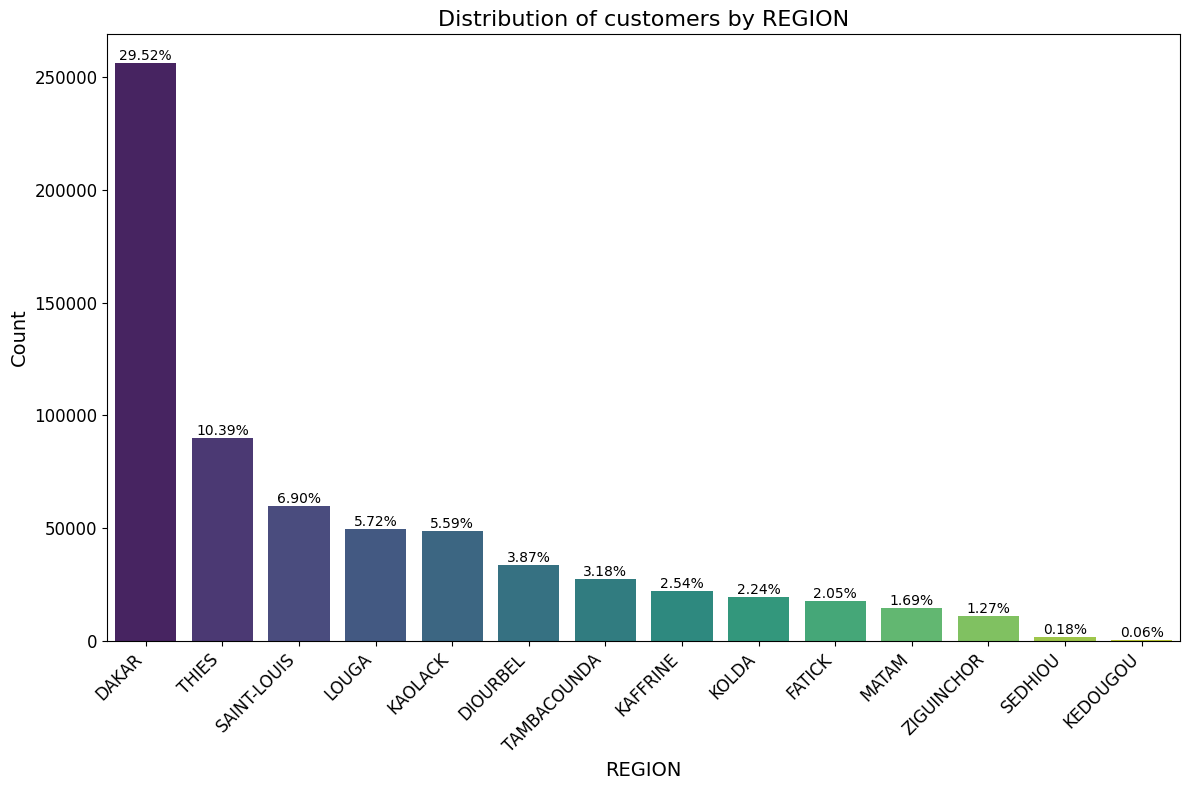

In [22]:
# Create a figure
plt.figure(figsize=(12, 8))

# Calculate value counts and sort in descending order
value_counts = df_train_eda[customer_info[0]].value_counts(normalize=True).sort_values(ascending=False)
sorted_categories = value_counts.index

# Create a count plot with the sorted categories
sns.countplot(x=df_train_eda[customer_info[0]], palette='viridis', order=sorted_categories)

# Calculate the percentage for each bar and add as label
total = len(df_train_eda)
for container in plt.gca().containers:
    labels = [f'{h.get_height()/total*100:.2f}%' if h.get_height() > 0 else '' for h in container]
    plt.gca().bar_label(container, labels=labels)

# Set plot titles and labels
plt.title(f'Distribution of customers by {customer_info[0]}', fontsize=16)
plt.xlabel(customer_info[0], fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

`Comment`

- **Customer Representation**: Dakar represents a significant portion of customers (29.52%), making it the most prominent region, while regions like Thiès, Saint-Louis, and Louga have notable but smaller representations.
  
- **Low Representation**: Regions such as Sedhiou (0.18%) and Kédougou (0.06%) have minimal representation, indicating a skewed dataset toward a few regions, particularly urban or metropolitan areas like Dakar.
  
- **Impact on Churn Predictions**: Dakar's high customer concentration means its churn rates could significantly influence overall churn predictions. Regional differences in churn behavior should be understood, especially since urban areas might experience churn due to competition and service expectations, while less populated regions may face issues like network coverage or service availability.

##### Usage Patterns

- **Categorical features**

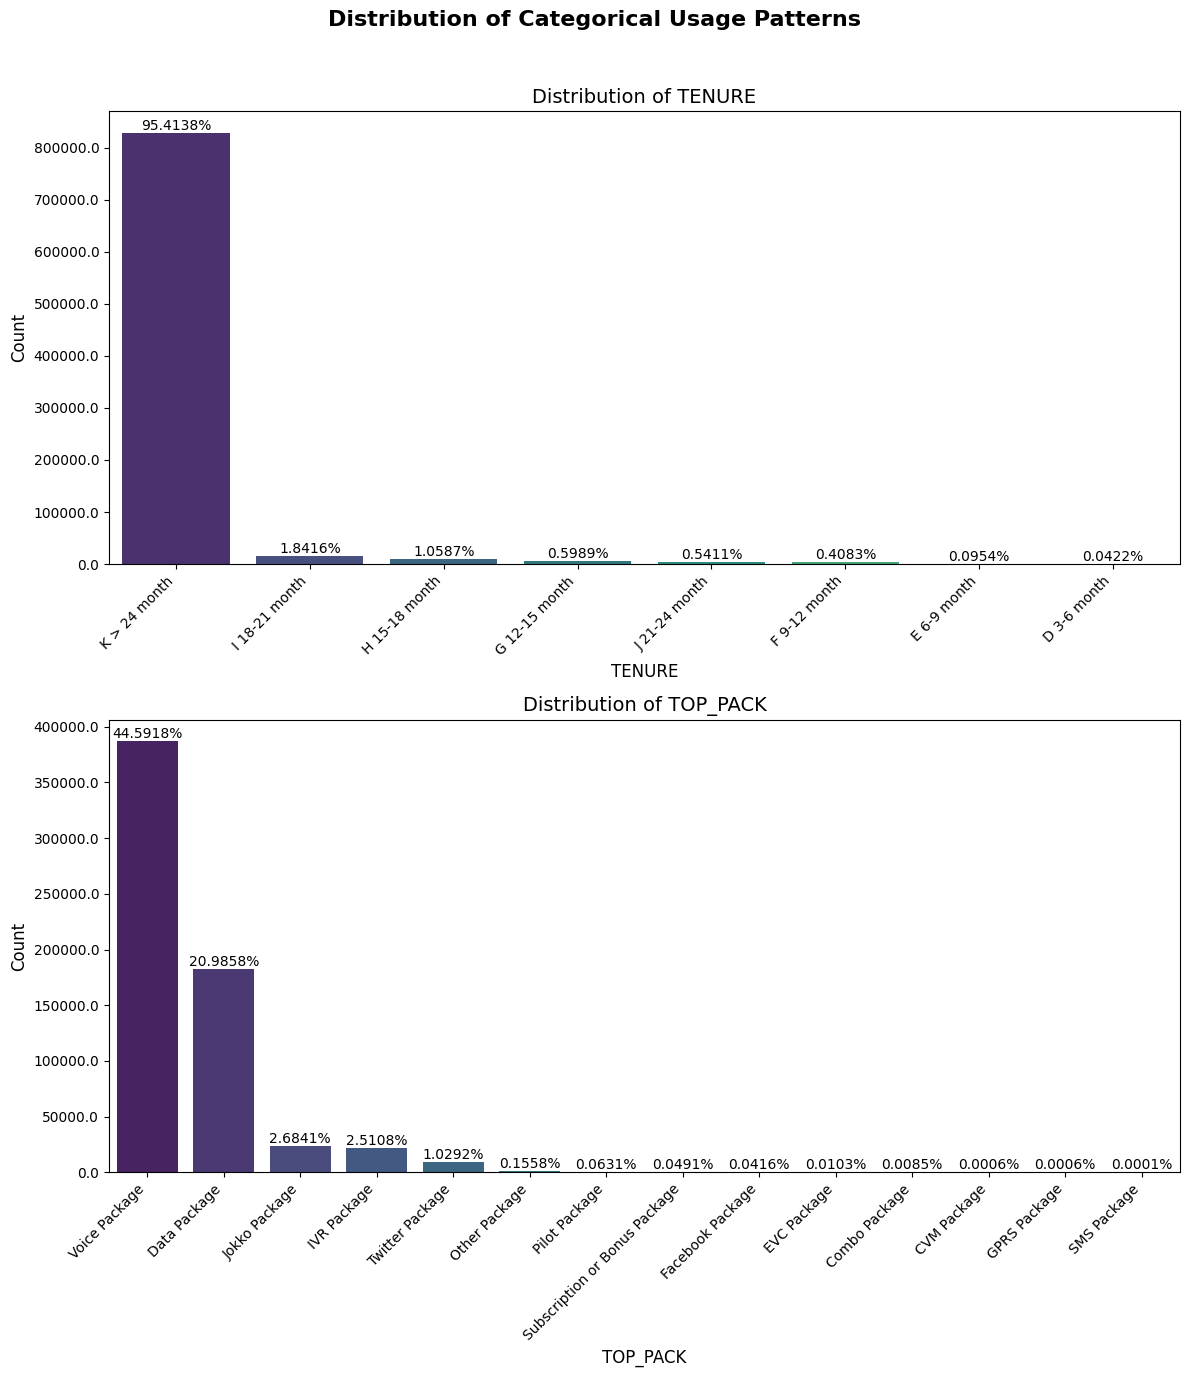

In [23]:
# Ensure the selected columns are categorical
categorical_usage_patterns = [col for col in usage_patterns if col in df_train_eda.select_dtypes(include='object').columns]

# Calculate the number of rows and columns needed for subplots
num_features = len(categorical_usage_patterns)
cols = 1
rows = (num_features // cols) + (1 if num_features % cols != 0 else 0)

# Create the subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 14))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each categorical feature and create a count plot
for i, feature in enumerate(categorical_usage_patterns):
    ax = axes[i]

    # Count occurrences and sort values
    value_counts = df_train_eda[feature].value_counts()
    sorted_value_counts = value_counts.sort_values(ascending=False)

    sns.barplot(x=sorted_value_counts.index, y=sorted_value_counts.values, palette='viridis', ax=ax)
    
    # Calculate the percentage for each bar and add as label
    total = len(df_train_eda)
    for container in ax.containers:
        labels = [f'{h.get_height()/total*100:.4f}%' if h.get_height() > 0 else '' for h in container]
        ax.bar_label(container, labels=labels)
    
    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
    ax.set_yticklabels(ax.get_yticks(), fontsize=10)

# Remove any unused subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Add a suptitle
fig.suptitle('Distribution of Categorical Usage Patterns', fontsize=16, fontweight='bold')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display plot
plt.show()

`Comments`

- **Customer Tenure**: A large majority (95.41%) of customers have been with the company for over 24 months, indicating a stable and mature customer base. There are very few customers with shorter tenures (0–24 months), suggesting limited recent customer acquisition.

- **Service Packages**: The Voice Package is the most popular, used by 44.59% of customers, followed by the Data Package at 20.99%. Other packages like JoMo and IVR have very low usage, indicating poor appeal or marketing.

- **Customer Loyalty and Churn Risks**: Long-tenured customers are likely more loyal but could face churn if their needs aren't met or if competitors offer better options. Short-tenured customers may have a higher churn rate as they evaluate their options, so addressing their needs early could reduce churn.

- **Service Improvement Focus**: Strategies to reduce churn should emphasize improving voice and data services, as most customers rely on these. Less popular packages might need better promotion or enhancement to increase their value to customers.

- **Numerical features**

Column: MONTANT
Skewness: 4.41
Kurtosis: 71.86
Mean: 5529.21
Median: 3000.0
Standard Deviation: 7104.74
________________________________________


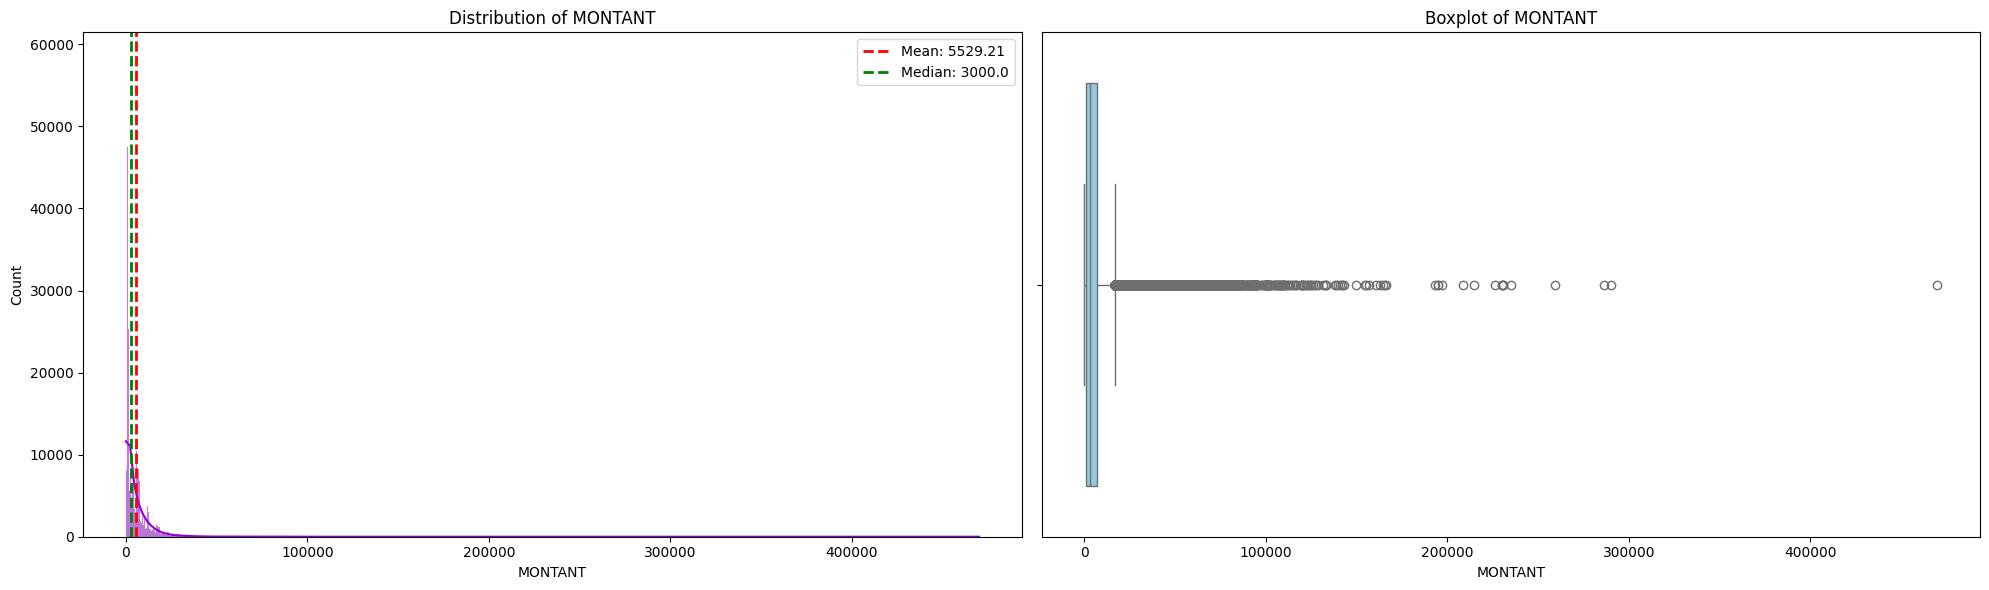

Column: FREQUENCE_RECH
Skewness: 2.11
Kurtosis: 5.33
Mean: 11.52
Median: 7.0
Standard Deviation: 13.26
________________________________________


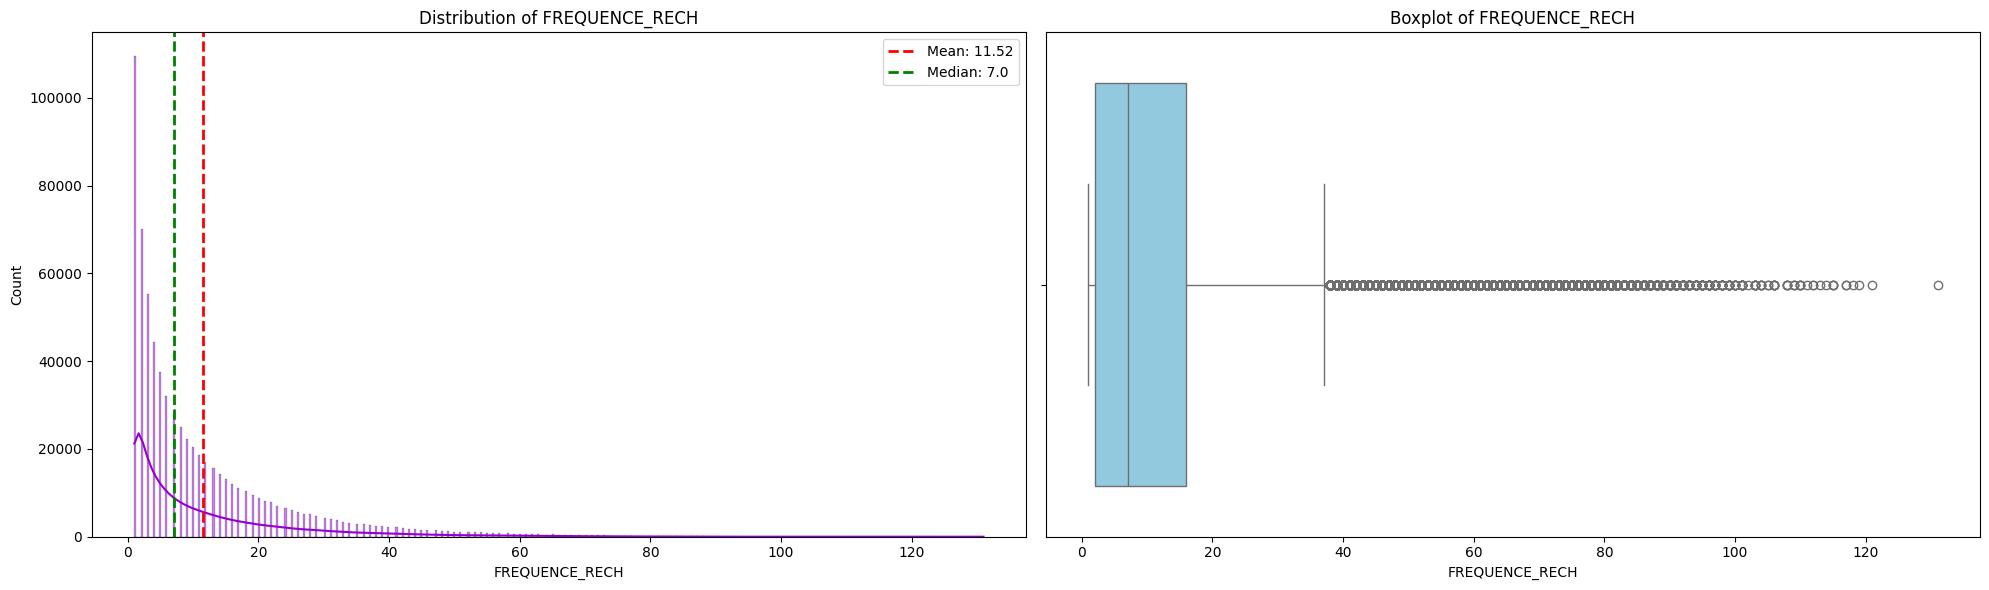

Column: DATA_VOLUME
Skewness: 33.61
Kurtosis: 2167.72
Mean: 3368.8
Median: 258.0
Standard Deviation: 12898.93
________________________________________


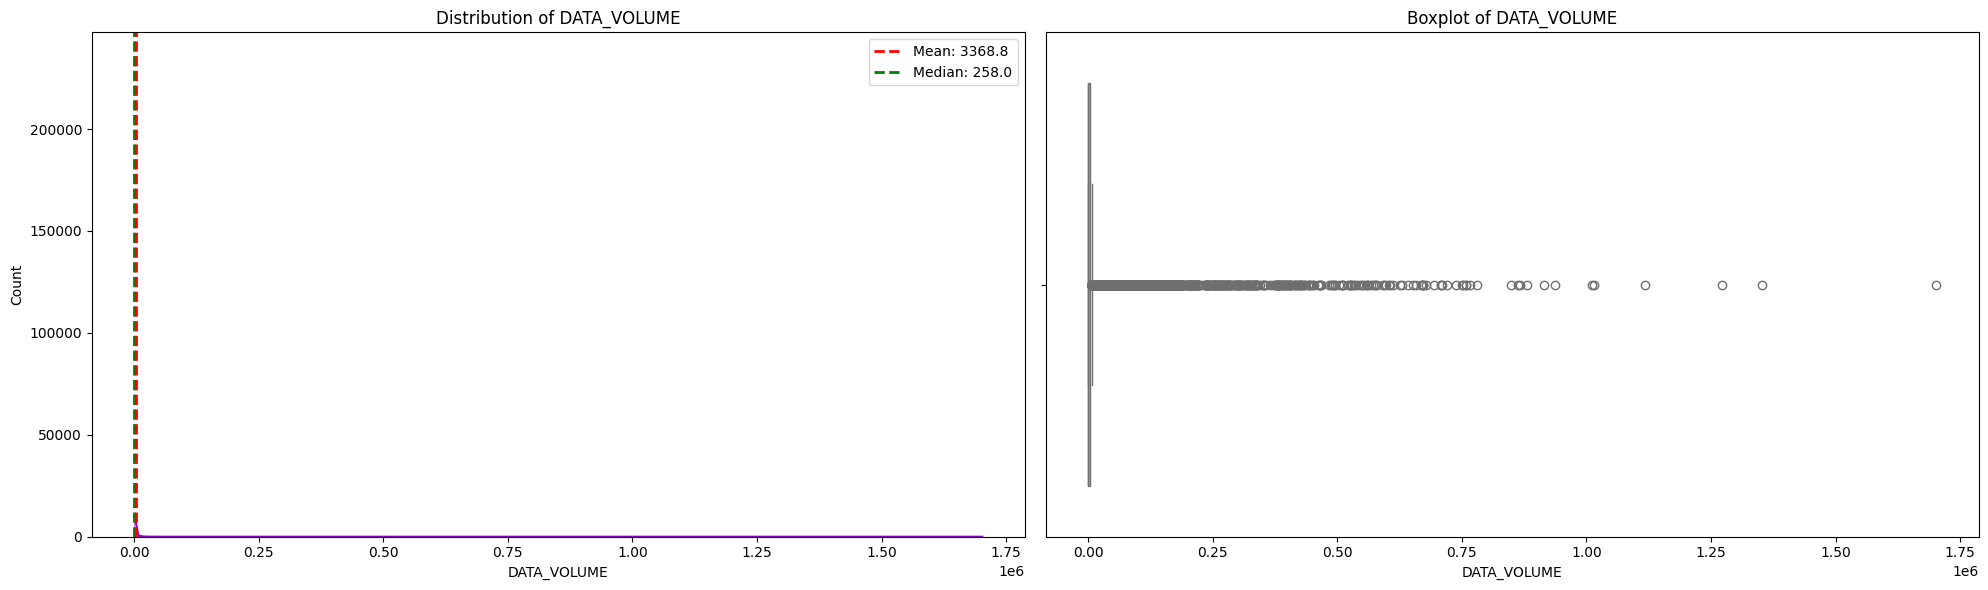

Column: ON_NET
Skewness: 8.36
Kurtosis: 126.04
Mean: 277.07
Median: 27.0
Standard Deviation: 874.32
________________________________________


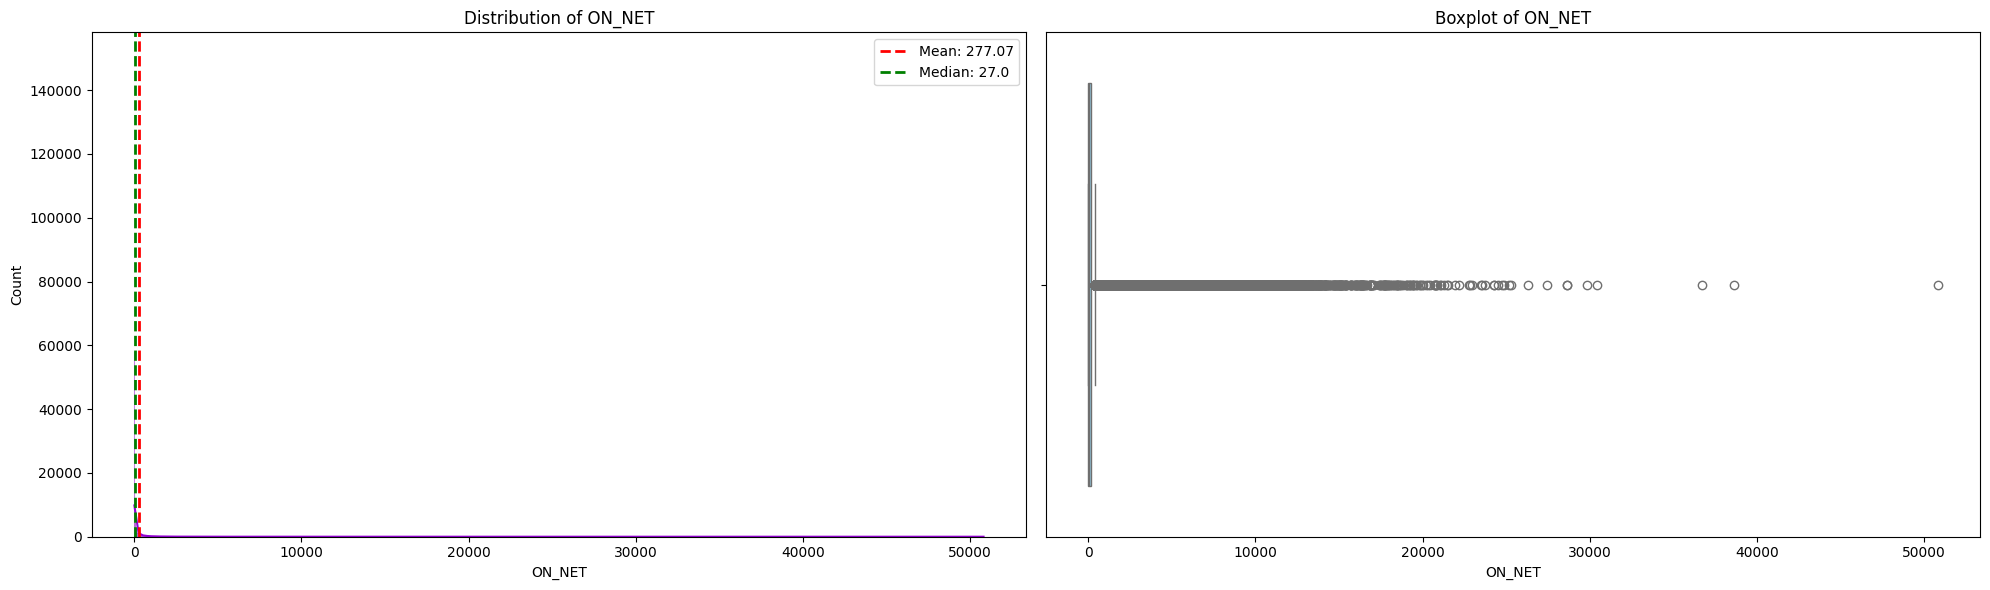

Column: ORANGE
Skewness: 7.3
Kurtosis: 105.88
Mean: 95.16
Median: 29.0
Standard Deviation: 203.02
________________________________________


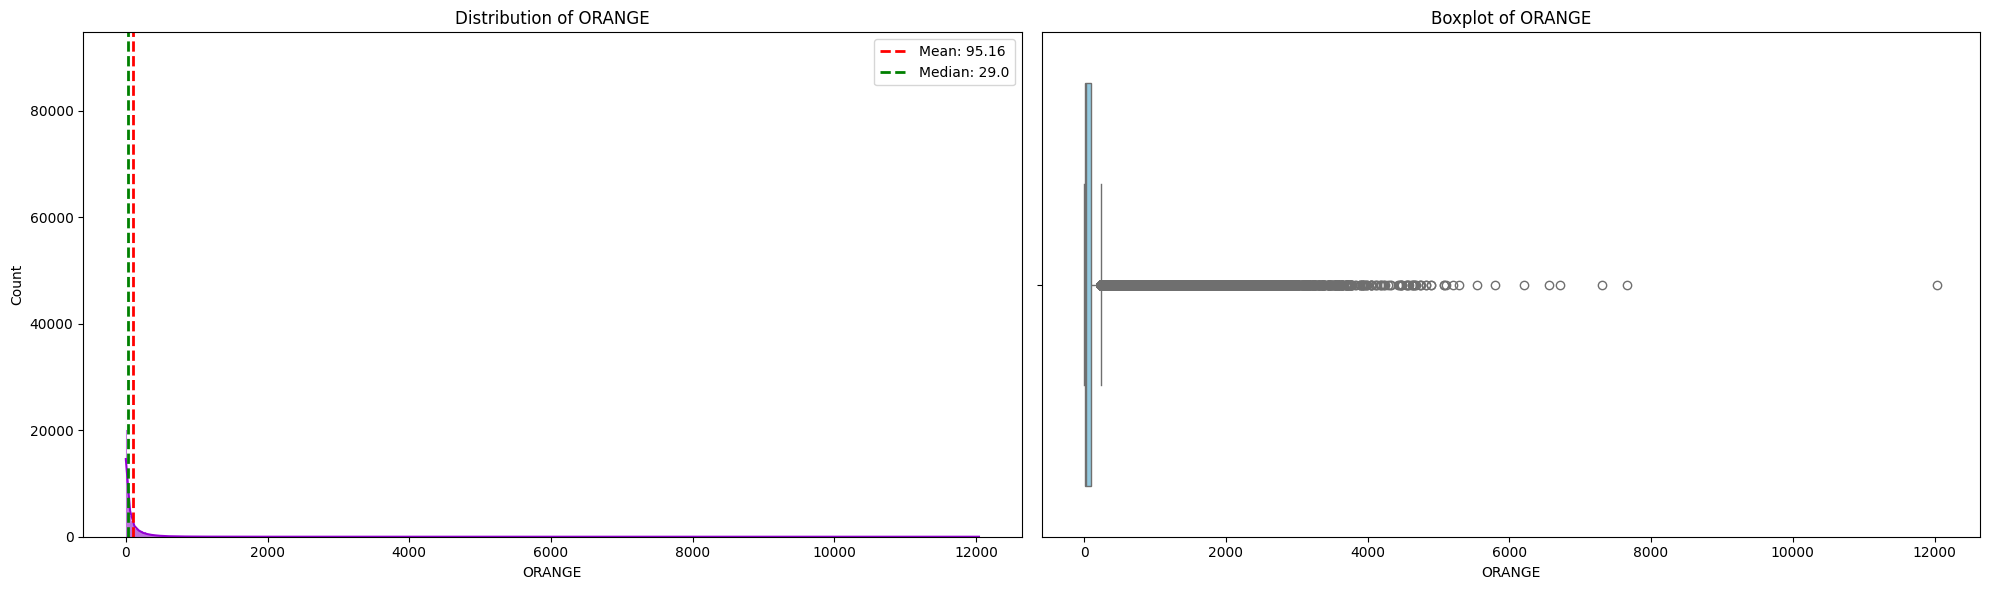

Column: TIGO
Skewness: 13.23
Kurtosis: 355.71
Mean: 23.11
Median: 6.0
Standard Deviation: 64.04
________________________________________


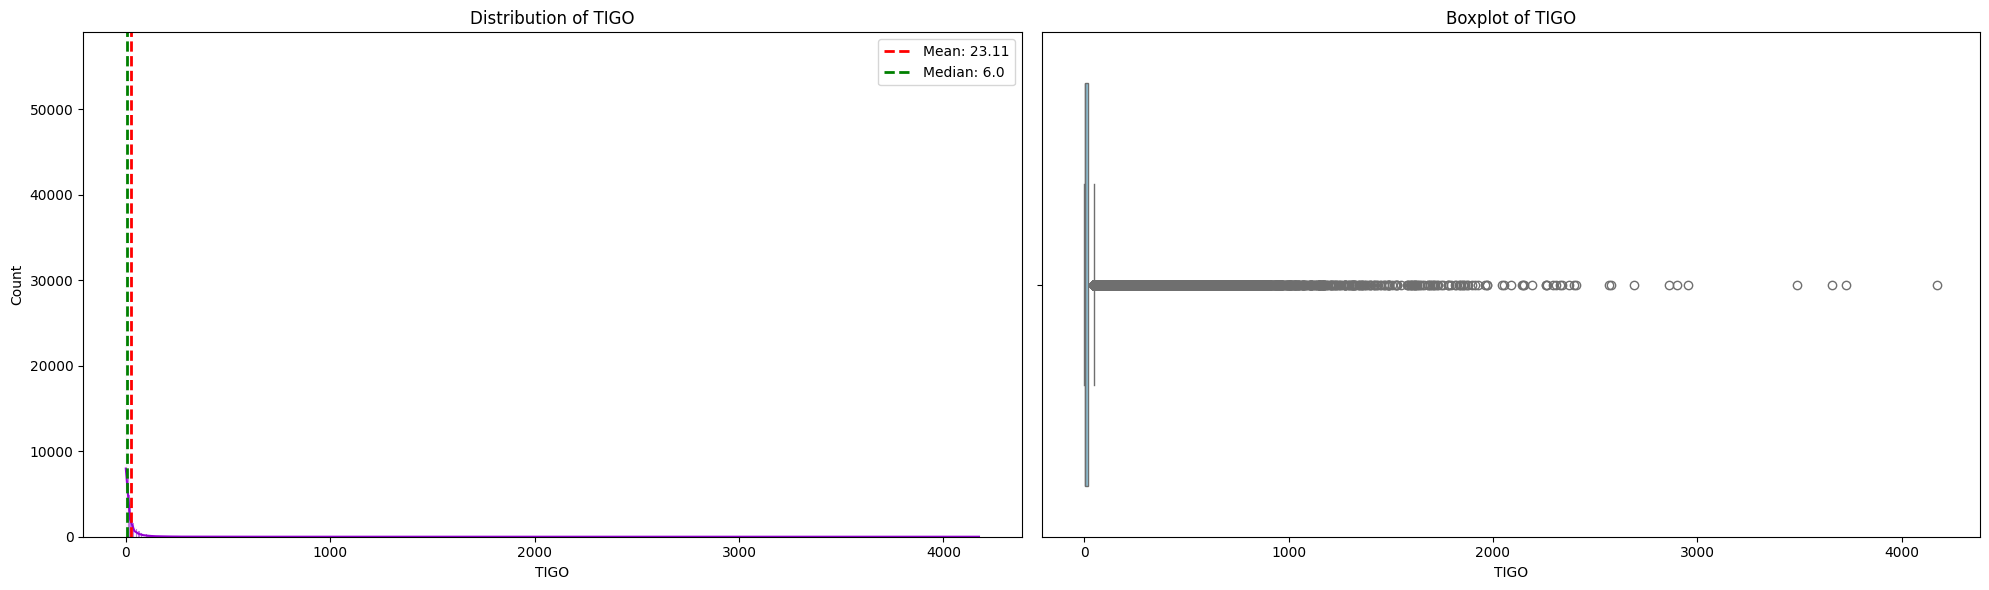

Column: ZONE1
Skewness: 18.65
Kurtosis: 623.43
Mean: 8.17
Median: 1.0
Standard Deviation: 39.25
________________________________________


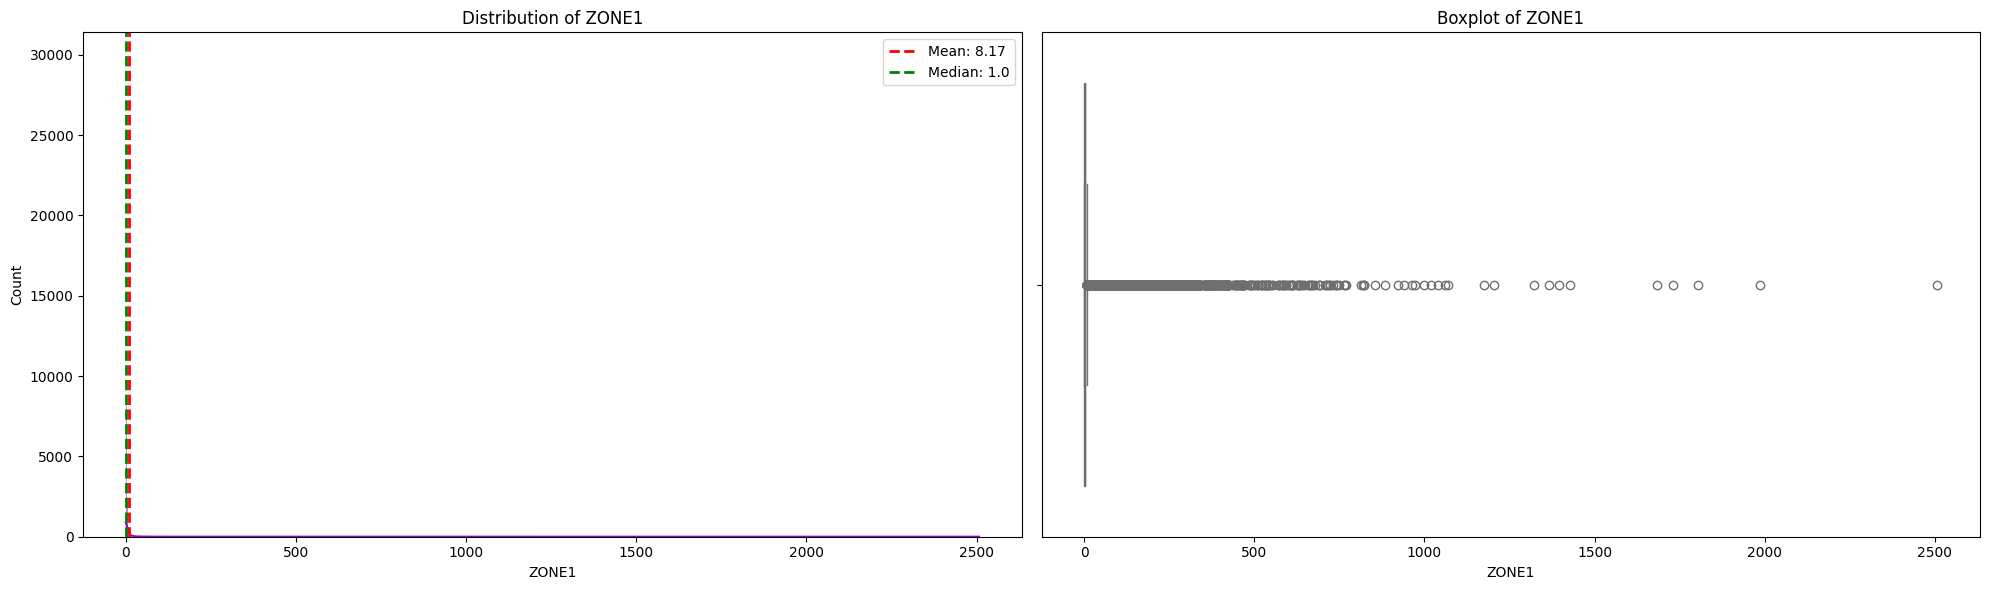

Column: ZONE2
Skewness: 36.73
Kurtosis: 2746.89
Mean: 7.71
Median: 2.0
Standard Deviation: 36.09
________________________________________


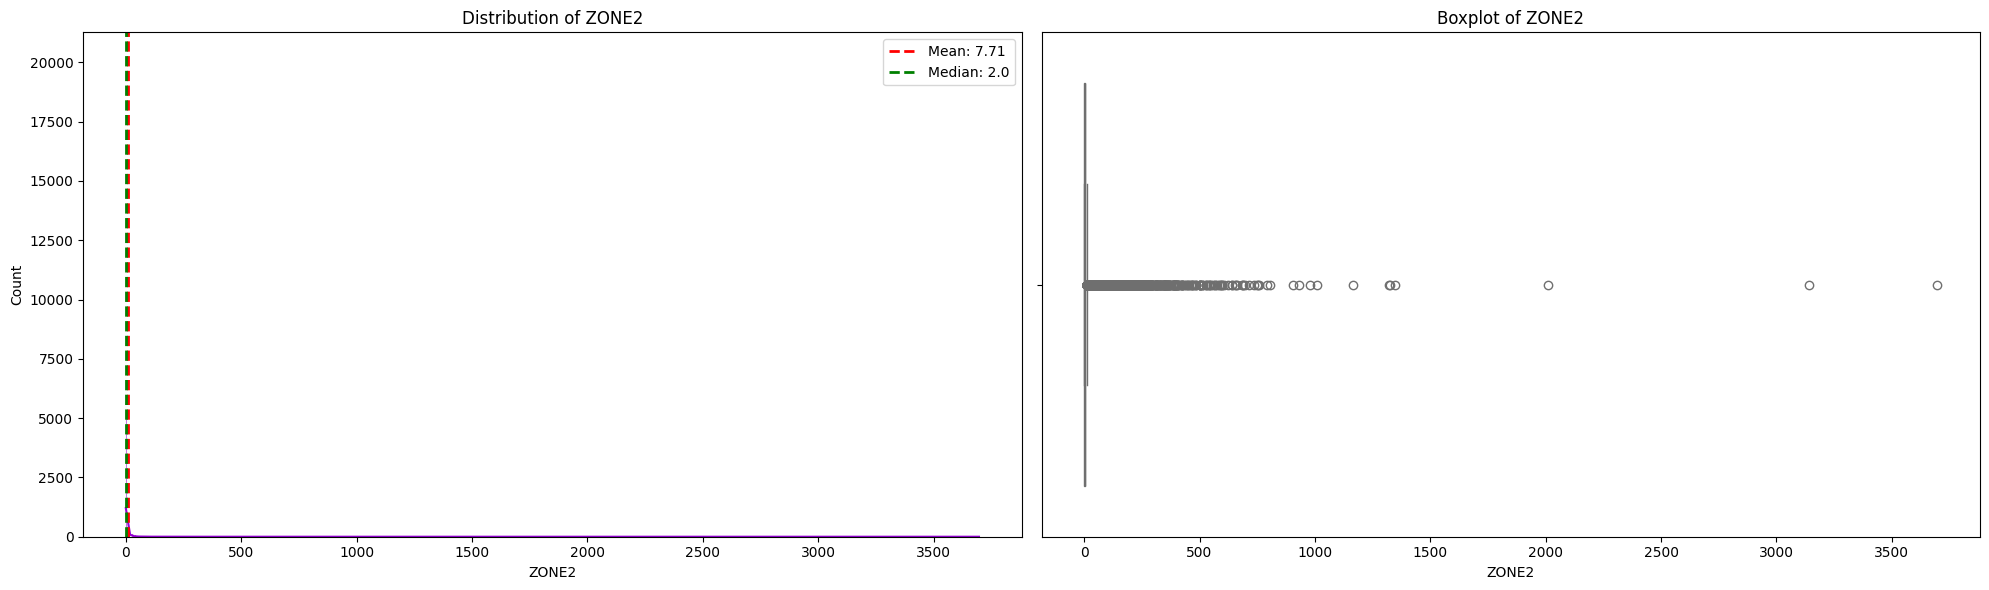

Column: FREQ_TOP_PACK
Skewness: 3.91
Kurtosis: 49.26
Mean: 9.26
Median: 5.0
Standard Deviation: 12.24
________________________________________


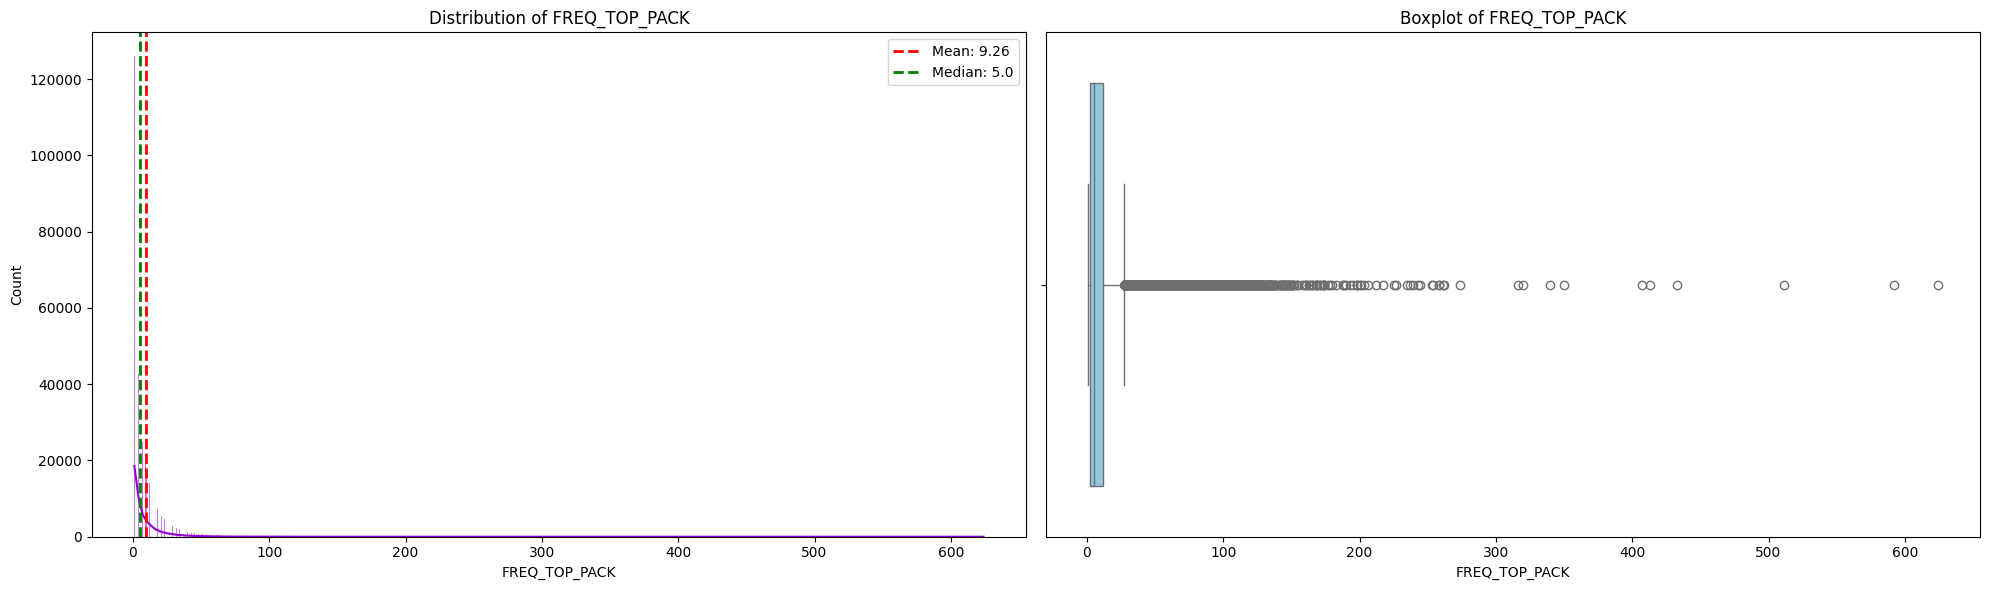

In [24]:
# Ensure the selected columns are numerical
numerical_usage_patterns = [col for col in usage_patterns if col in df_train_eda.select_dtypes(include=['float64', 'int64']).columns]

# Loop through each numerical feature in the usage patterns
for col in numerical_usage_patterns:
    # Calculate skewness and kurtosis
    skewness = round(df_train_eda[col].skew(), 2)
    kurtosis = round(df_train_eda[col].kurtosis(), 2)
    
    # Calculate basic statistics
    mean = round(df_train_eda[col].mean(), 2)
    median = round(df_train_eda[col].median(), 2)
    std_dev = round(df_train_eda[col].std(), 2)
    
    # Print column name and its statistics
    print(f"Column: {col}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Standard Deviation: {std_dev}")
    print("_" * 40)
    
    # Plot histograms with KDE and boxplots
    plt.figure(figsize=(20, 6))
    
    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df_train_eda[col], kde=True, color='darkviolet', edgecolor='black')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean}')
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median}')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_train_eda[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    
    # Display plot 
    plt.tight_layout()
    plt.show()


`Comments`

- **MONTANT:**
Represents the top-up amount with a strong right skew and heavy tails, indicating many extreme values. The mean is significantly higher than the median, highlighting the influence of outliers. Extreme values may be associated with varying churn rates. Missing values should be imputed jointly with `FREQUENCE_RECH` using the median.

- **FREQUENCE_RECH:**
Denotes the number of times a customer recharges, showing moderate skew and some outliers. The mean is higher than the median, suggesting some users have high recharge frequencies. Lower recharge frequency might be a churn indicator. Missing values should be imputed jointly with `MONTANT`.

- **DATA_VOLUME:**
Indicates the amount of data used, with extreme skew and numerous outliers. The mean is much higher than the median, reflecting significant variance in data usage. Heavy data users may have different churn behaviors. Missing values should be imputed using the median or nearest-neighbor methods.

- **ON_NET:**
Measures the activity of calls within the network, showing high skew and many outliers. Most users have low activity, but a few have very high usage. Low `ON_NET` activity might correlate with higher churn. Missing values should be imputed using the median.

- **ORANGE:**
Tracks the engagement in calls to the Orange network, with high skew and numerous outliers. Most users have low engagement levels. This feature might influence churn rates based on user preferences. Missing values should be imputed with the median.

- **TIGO:**
Represents call activity to the Tigo network, with extreme skew and high kurtosis. The distribution is dominated by low values with numerous large outliers. Usage patterns may be linked to churn risk. Missing values should be imputed with the median.

- **ZONE1:**
Shows call activity in zone 1, characterized by extreme skew and high kurtosis. Most values are low with numerous high ones. This feature could reflect different customer segments and impact churn. Missing values should be imputed with the median.

- **ZONE2:**
Indicates call activity in zone 2, with even stronger skew and kurtosis than `ZONE1`. Similar to `ZONE1`, it has a distribution with low values and but relatively fewer high outliers. Activity levels might reveal customer behavior patterns. Missing values should be imputed with the median.

- **FREQ_TOP_PACK:**
Represents the frequency of using top packages, showing high skew and some outliers. Low frequency may signal potential churn risk. Missing values should be imputed jointly with `TOP_PACK` using the median.

`Handling Outliers`

- **Transformation Techniques**: Apply log, square root, or cube root transformations to compress large values.
  
- **Winsorization**: Cap extreme values at specific percentiles (e.g., 1st and 99th).
  
- **Scaling**: Use robust scaling methods (e.g., RobustScaler) that are less sensitive to outliers.
  
- **Trimming or Capping**: Remove outliers or set thresholds to limit extreme values (e.g., cap above the 95th percentile).
  
- **Imputation**: Replace outliers with the median or nearest non-outlier values.
  
- **Machine Learning Models**: Use models like Random Forest or Gradient Boosting that are robust to outliers.
  
- **Robust Statistical Measures**: Apply robust estimators such as the median or trimmed means.
  
- **Combining Methods**: Often, a mix of transformation, scaling, and model adjustments provides the best results. Evaluate the impact of outlier treatment on model performance to choose the optimal approach.

##### Revenue and Revenue Generation

Column: REVENUE
Skewness: 4.39
Kurtosis: 82.62
Mean: 5506.05
Median: 3000.0
Standard Deviation: 7175.63
________________________________________


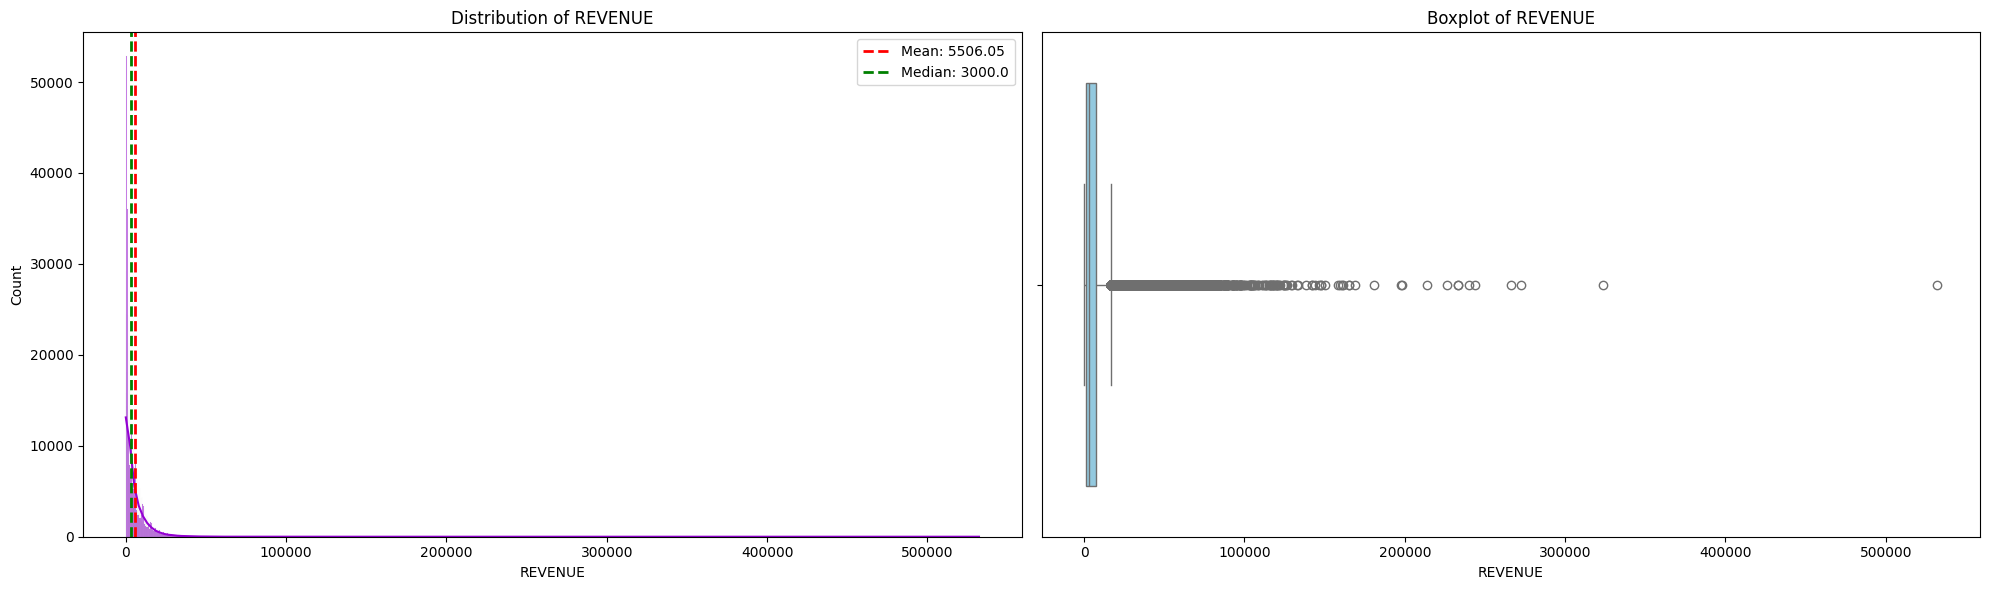

Column: ARPU_SEGMENT
Skewness: 4.39
Kurtosis: 82.62
Mean: 1835.36
Median: 1000.0
Standard Deviation: 2391.87
________________________________________


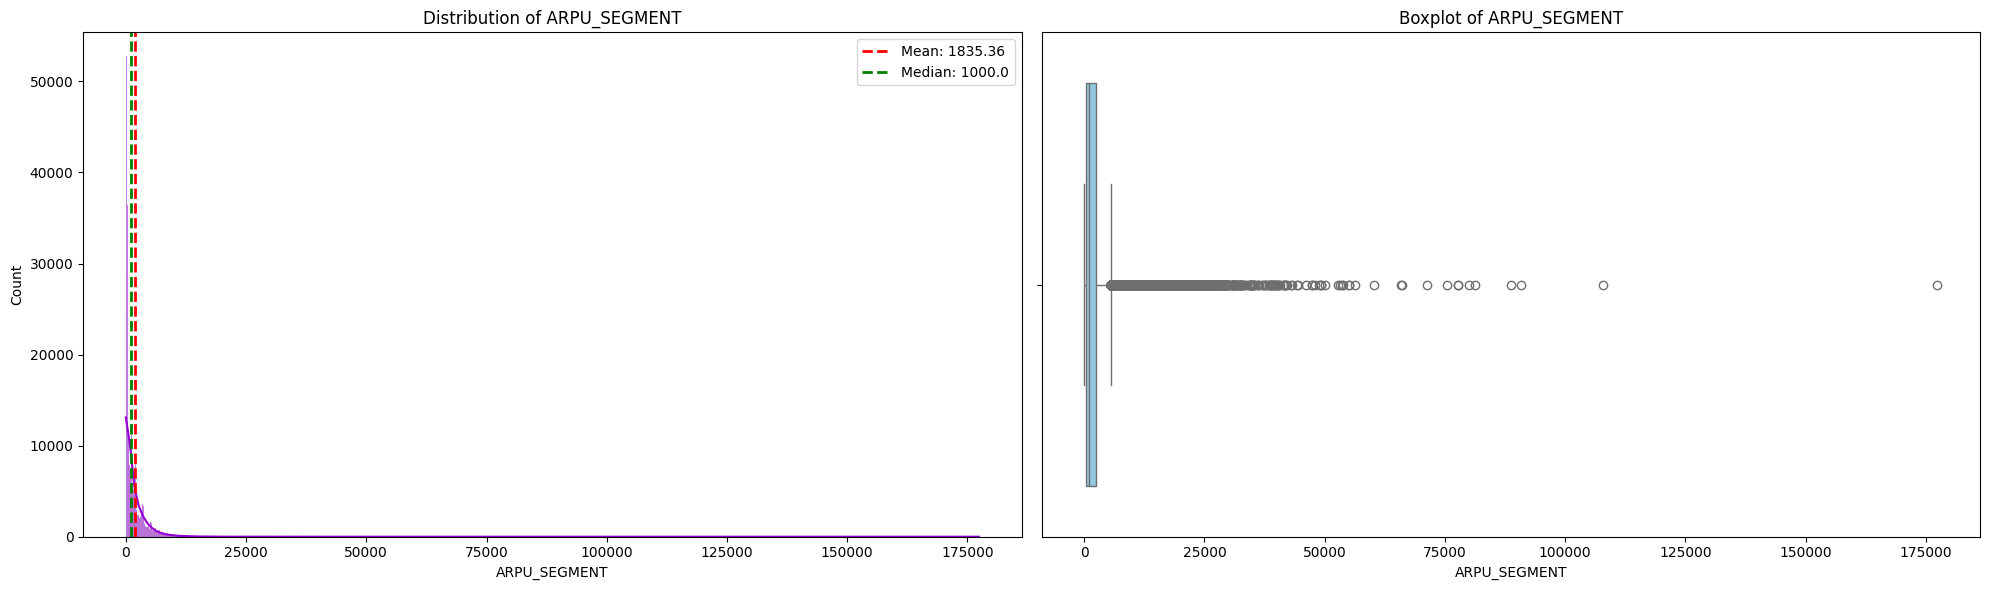

Column: FREQUENCE
Skewness: 1.78
Kurtosis: 3.42
Mean: 13.97
Median: 9.0
Standard Deviation: 14.69
________________________________________


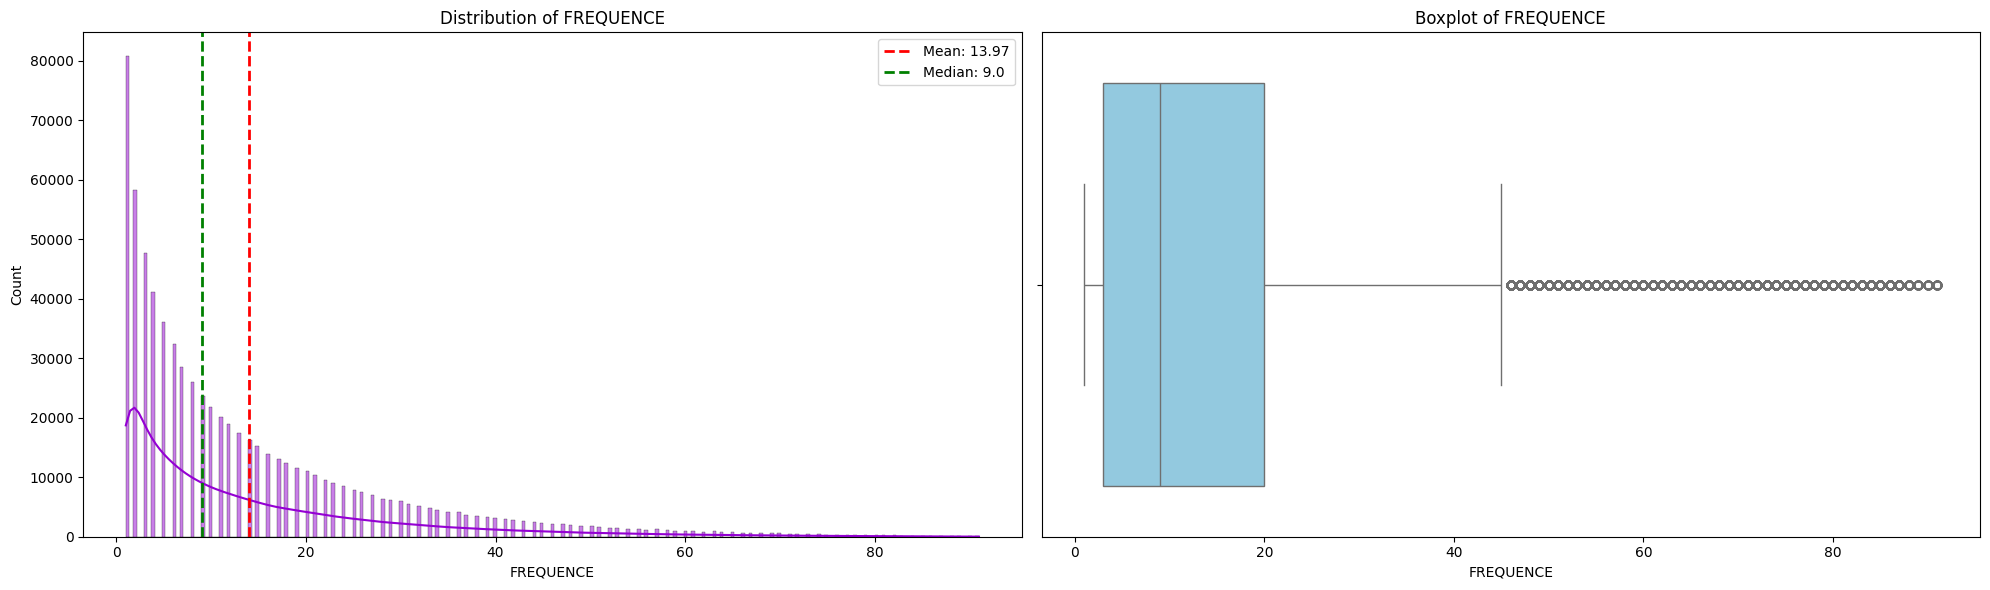

In [25]:
# Loop through each feature in revenue generation
for col in revenue_generation:
    # Calculate skewness and kurtosis
    skewness = round(df_train_eda[col].skew(), 2)
    kurtosis = round(df_train_eda[col].kurtosis(), 2)
    
    # Calculate basic statistics
    mean = round(df_train_eda[col].mean(), 2)
    median = round(df_train_eda[col].median(), 2)
    std_dev = round(df_train_eda[col].std(), 2)
    
    # Print column name and its statistics
    print(f"Column: {col}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Standard Deviation: {std_dev}")
    print("_" * 40)
    
    # Plot histograms with KDE and boxplots
    plt.figure(figsize=(20, 6))
    
    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df_train_eda[col], kde=True, color='darkviolet', edgecolor='black')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean}')
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median}')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_train_eda[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    
    # Display plot 
    plt.tight_layout()
    plt.show()

`Comments`

- **REVENUE:**
Represents the total revenue from customers, with a highly right-skewed distribution and many extreme values. The mean is significantly higher than the median, indicating the presence of high revenue outliers. Higher revenue may be associated with different churn patterns.

- **ARPU_SEGMENT:**
Reflects the average revenue per user segment, showing a similar right skew and heavy tails as `REVENUE`. The mean is much higher than the median, suggesting a few high ARPU values. Customers in different ARPU segments may have varying churn behaviors.

- **FREQUENCE:**
Indicates the frequency of recharges, with moderate skew and fewer extreme values compared to `REVENUE` and `ARPU_SEGMENT`. The mean is higher than the median, showing some customers have high recharge frequencies. Higher frequencies might correlate with reduced churn risk.

- **Churn Impact:**
Customers with higher values in these features (e.g., revenue or ARPU) are likely to have lower churn rates. However, outliers could distort these relationships, so appropriate handling of extreme values is necessary.

- **Missing Value Strategy:**
Since all three features are co-dependent, missing values should be treated simultaneously. A robust approach, such as joint median imputation, would ensure consistency across the three features while handling outliers. Both `REVENUE` and `ARPU_SEGMENT` exhibit nearly identical distributions and statistical metrics, reinforcing the strong co-dependency between these features.

##### Activity and Churn Indicators

- **Categorical Features**

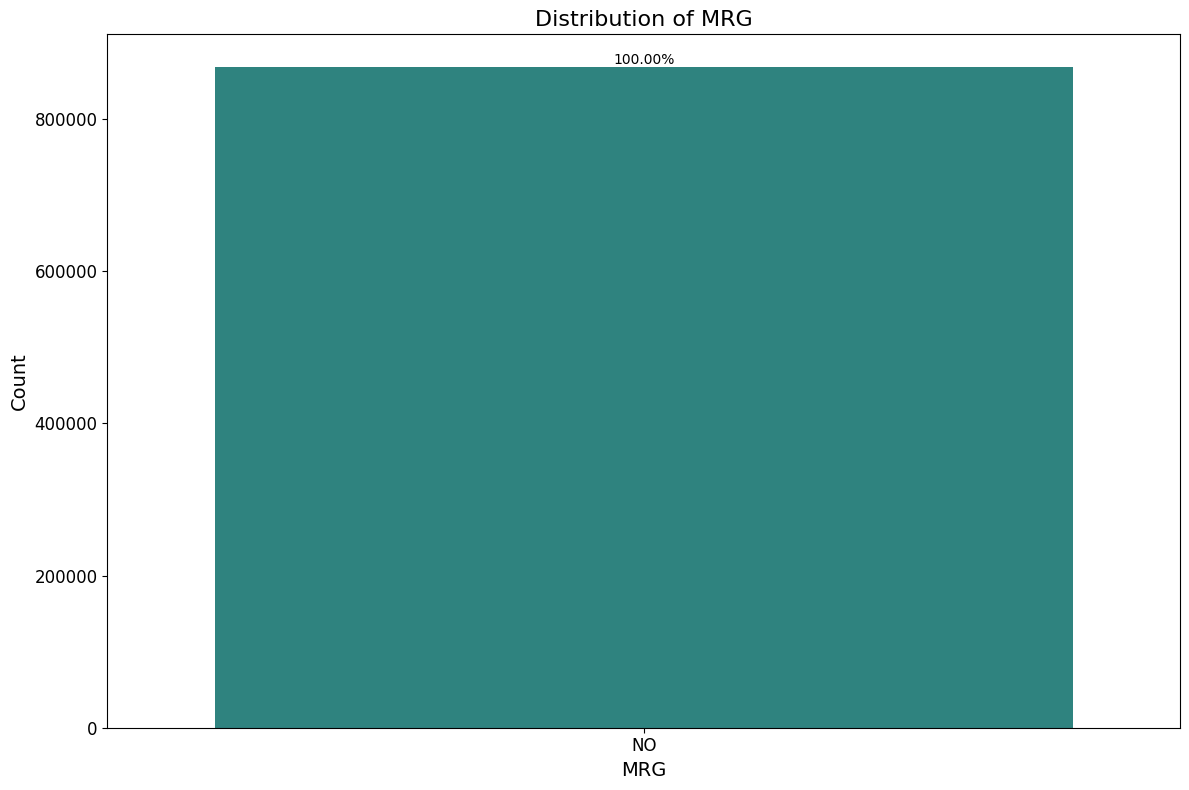

In [26]:
# Define features to plot
features_to_plot = [feature for feature in activity_churn_indicators 
                     if df_train_eda[feature].dtype in ['object']]

# Loop through each feature in the filtered list
for feature_to_plot in features_to_plot:
    # Create a figure for each feature
    plt.figure(figsize=(12, 8))
    
    # Create a count plot for the feature
    sns.countplot(data=df_train_eda, x=feature_to_plot, palette='viridis')
    
    # Calculate the percentage for each bar and add as label
    total = len(df_train_eda)
    for container in plt.gca().containers:
        labels = [f'{h.get_height()/total*100:.2f}%' if h.get_height() > 0 else '' for h in container]
        plt.gca().bar_label(container, labels=labels)

    # Set plot titles and labels
    plt.title(f'Distribution of {feature_to_plot}', fontsize=16)
    plt.xlabel(feature_to_plot, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

`Comments`

`MRG` feature consists entirely of one category, labeled as "NO." This means all data points in the `MRG` column have the same value, which suggests that no customers in the dataset are marked as migrating or leaving. Since there is no variation in the feature, it may not be useful for predicting churn, as it does not provide any distinction between customers who churn and those who do not.

For modeling purposes, if `MRG` refers to "migrating" and is meant to indicate potential churn behavior, it lacks variability in its current form. Therefore, it is unlikely to be useful for predicting churn, and it could potentially be dropped from the model unless new data adds some variation to this feature.

- **Numerical features**

Column: REGULARITY
Skewness: -0.08
Kurtosis: -1.46
Mean: 33.68
Median: 34.0
Standard Deviation: 21.06
________________________________________


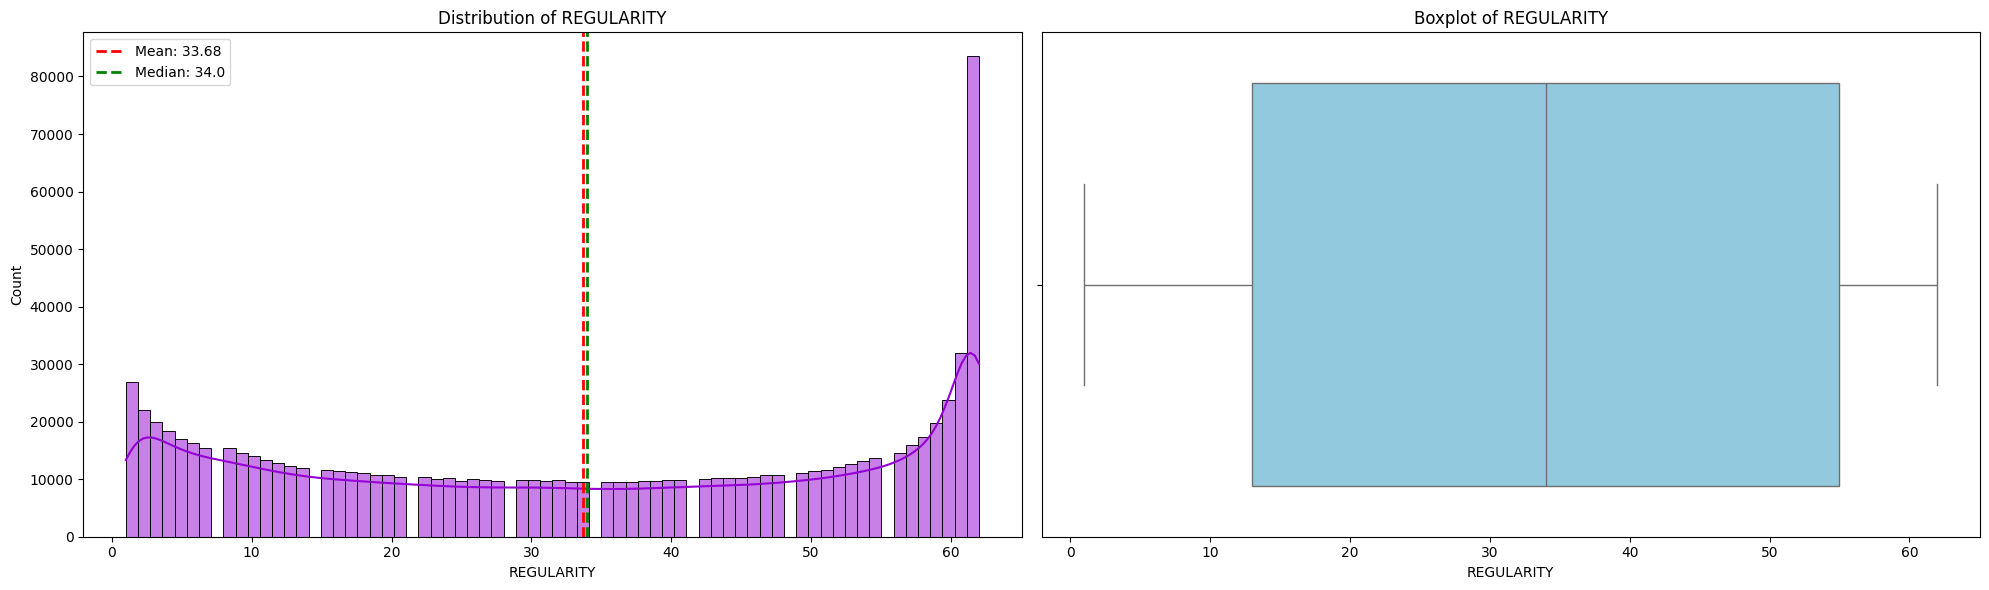

In [27]:
# Define features to plot
features_to_plot = [feature for feature in activity_churn_indicators 
                     if df_train_eda[feature].dtype in ['float64', 'int64']]

# Loop through each numerical feature in the usage patterns
for col in features_to_plot:
    # Calculate skewness and kurtosis
    skewness = round(df_train_eda[col].skew(), 2)
    kurtosis = round(df_train_eda[col].kurtosis(), 2)
    
    # Calculate basic statistics
    mean = round(df_train_eda[col].mean(), 2)
    median = round(df_train_eda[col].median(), 2)
    std_dev = round(df_train_eda[col].std(), 2)
    
    # Print column name and its statistics
    print(f"Column: {col}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Standard Deviation: {std_dev}")
    print("_" * 40)
    
    # Plot histograms with KDE and boxplots
    plt.figure(figsize=(20, 6))
    
    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df_train_eda[col], kde=True, color='darkviolet', edgecolor='black')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean}')
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median}')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_train_eda[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    
    # Display plot 
    plt.tight_layout()
    plt.show()

`Comments`

- **Distribution:** The skewness of -0.08 indicates that `REGULARITY` is nearly symmetric, with no significant tail on either side due to a negative kurtosis. This is supported by a boxplot showing no extreme values and a flat shape.
  
- **Statistics:** The mean and median are very close, with the mean slightly less than the median, reflecting minimal left skewness. The standard deviation is 21.06, indicating moderate dispersion within the feature.
  
- **Impact on Models:** The symmetric distribution suggests `REGULARITY` is less likely to skew model predictions, contributing stable and predictable inputs. This stability can enhance the reliability of churn predictions.
  
- **Churn Insights:** If variations in `REGULARITY` are linked to churn behavior (e.g., high or low regularity correlating with churn rates), this could offer valuable insights for targeting interventions.
  
- **Behavior Segmentation:** Bimodal peaks in the histogram suggest distinct behavior groups (e.g., very regular vs. irregular users). Segmenting these groups could lead to more targeted and effective churn management strategies.

#### C. Bivariate Analysis

##### Feature Categorisation

In [28]:
# For ease of analysis, the features of the df_train_eda have been categorised as follows:

# Numerical columns
numerical_features = df_train_eda.select_dtypes('number').columns

# Categorical columns excluding 'CHURN'
categorical_features = df_train_eda.select_dtypes('object').columns
categorical_features = categorical_features[categorical_features != 'CHURN']

##### Categorical Features vs Churn

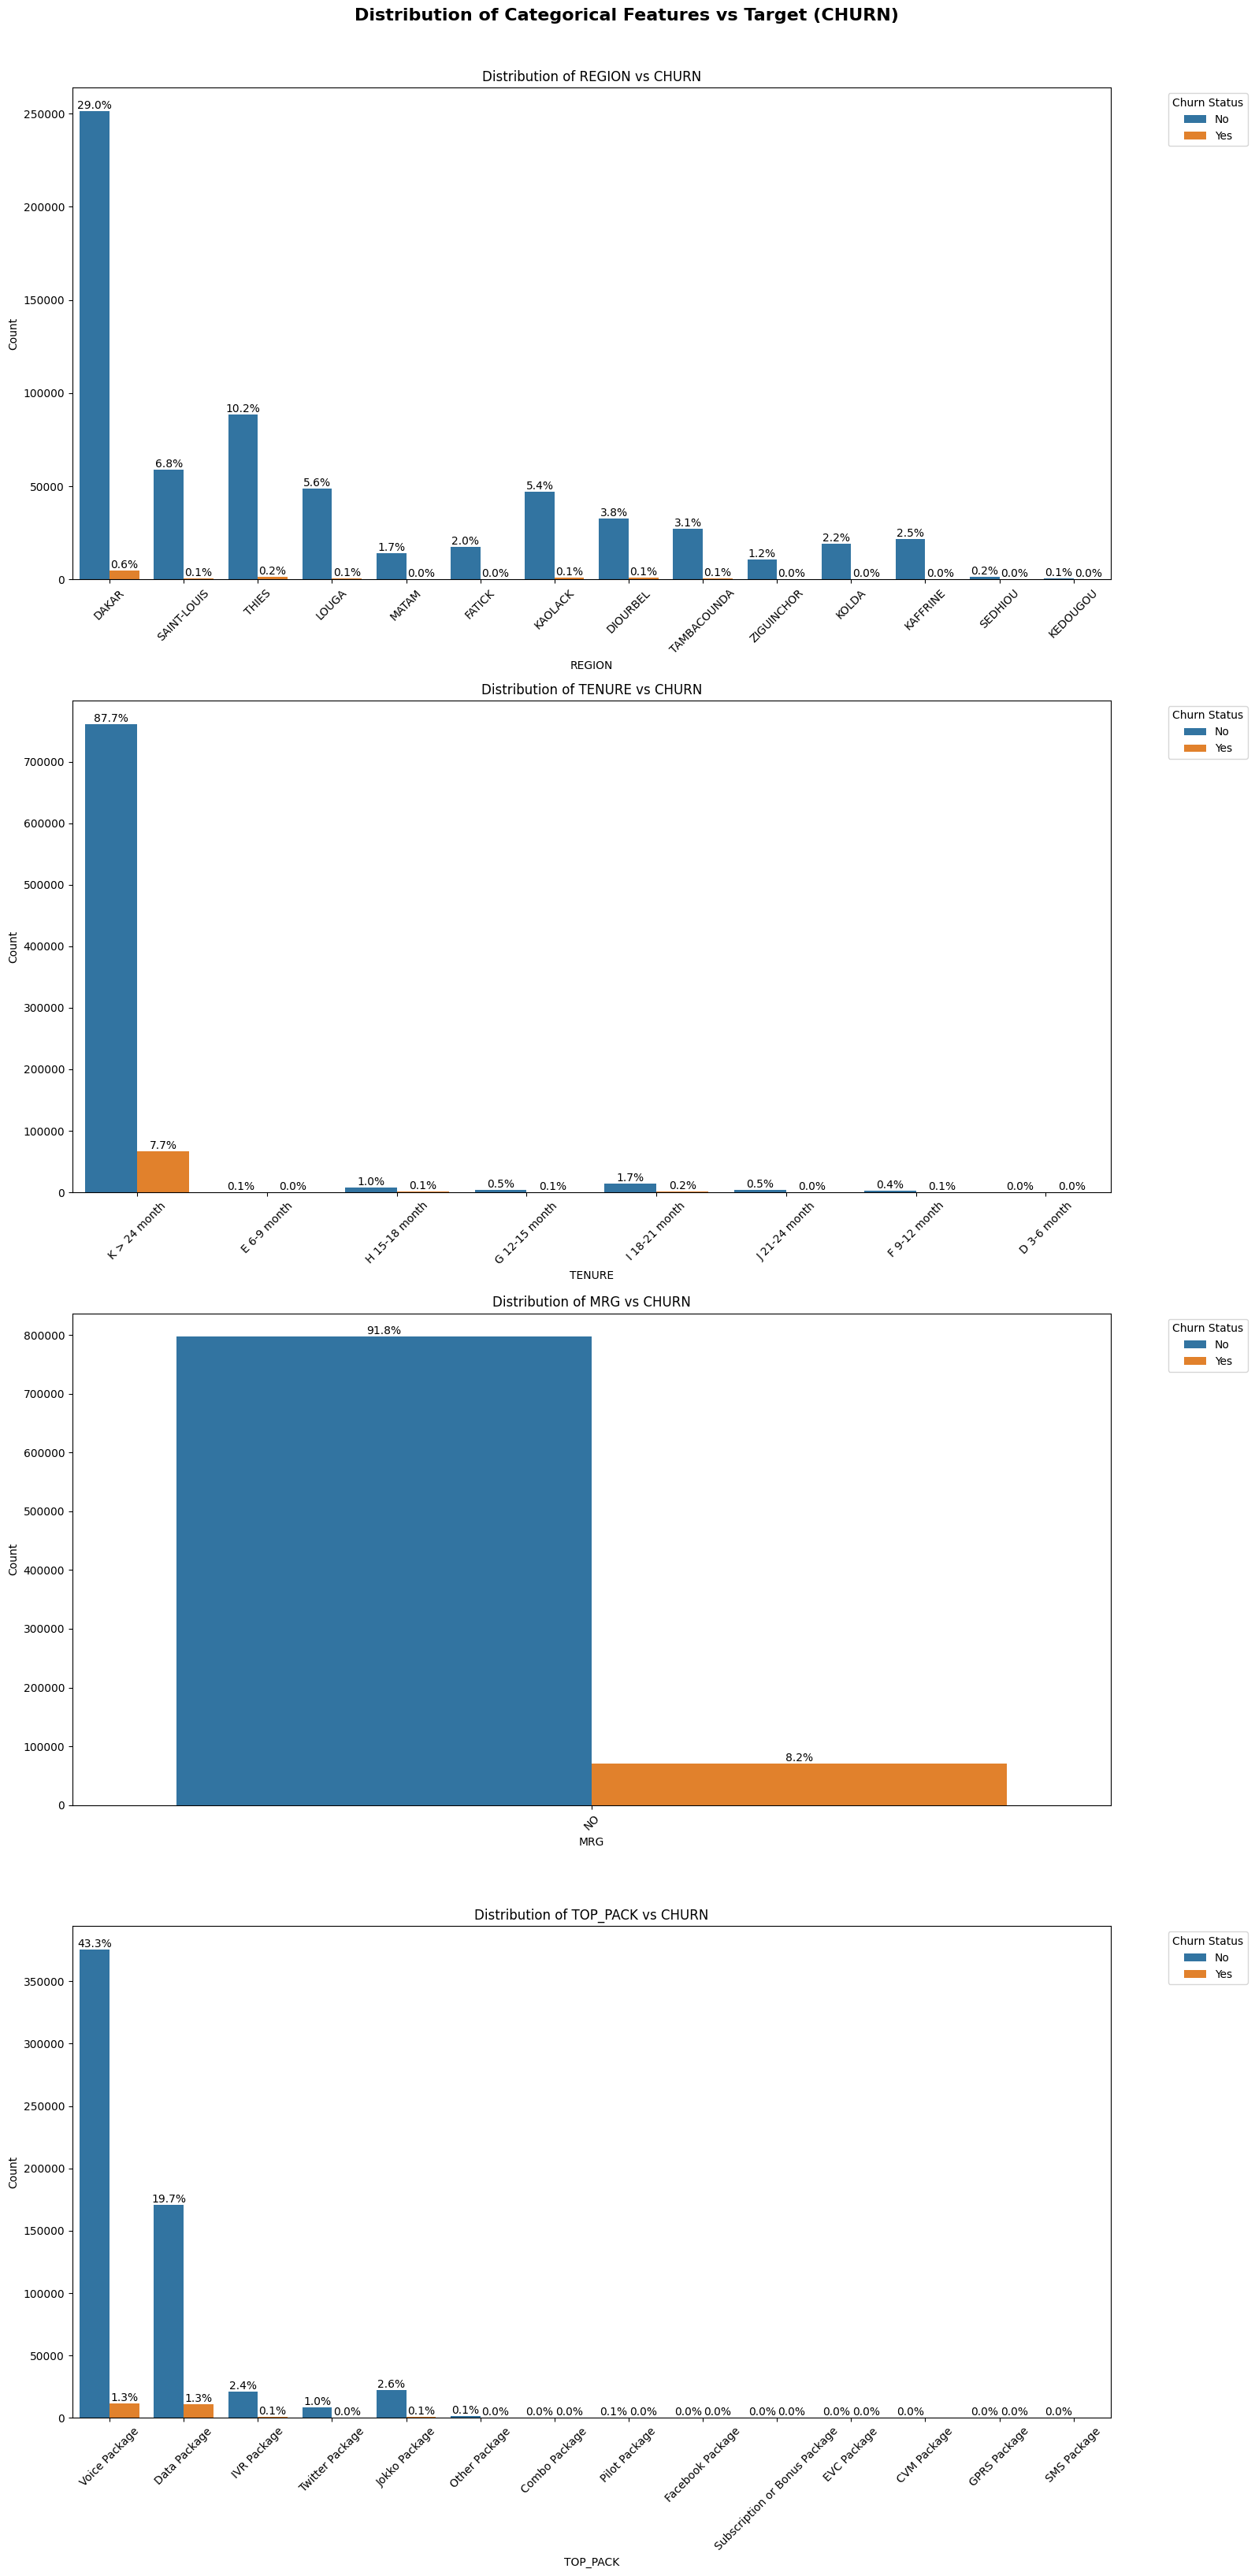

In [29]:
def plot_categorical_feature_vs_target(df_train_eda, categorical_features, target):
    # Calculate the number of rows and columns for subplots
    number_of_columns = 1
    number_of_rows = math.ceil(len(categorical_features) / number_of_columns)

    # Create the figure and set the size dynamically based on the number of rows
    fig = plt.figure(figsize=(16, 8 * number_of_rows))

    for i, column in enumerate(categorical_features, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, i)
        
        # Plot the countplot with the specified hue
        sns.countplot(data=df_train_eda, x=column, hue=target, ax=ax)
        
        # Set labels and title for each subplot
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.set_title(f'Distribution of {column} vs {target}')
        
        # Rotate x-axis labels for better readability
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        
        # Calculate and add percentage labels to each bar
        total_counts = len(df_train_eda)
        for container in ax.containers:
            labels = [f'{h.get_height() / total_counts * 100:.1f}%' for h in container]
            ax.bar_label(container, labels=labels)
        
        # Move the legend to the top right corner inside the plot
        ax.legend(title='Churn Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Add suptitle 
    plt.suptitle('Distribution of Categorical Features vs Target (CHURN)', fontsize=16, fontweight='bold', y=1.02)
    
    # Display the plot
    plt.show()

# Plot categorical features vs target variable
plot_categorical_feature_vs_target(df_train_eda, categorical_features, "CHURN")

`Comment`

- **REGION**: Some regions, like **PATICK** (5.4%) and **DIOURBEL** (3.6%), show slightly higher churn rates, but overall, regional differences have a limited impact on churn.

- **TENURE**: Customers with **shorter tenures** (0-12 months) are more likely to churn, while those with **X ≥ 24 months** have low churn rates, making **TENURE** a strong predictor for churn.

- **MRG**: The majority of customers (91.8%) are categorized as "NO" (not migrating) with a low churn rate (8.2%), making this feature less useful for modeling due to limited variation.

- **TOP_PACK**: Customers using **Data Packages** (19.7%) and certain other packages like **IVR** and **Tunner Packages** have higher churn rates, indicating that **TOP_PACK** is a valuable feature for predicting churn.

    In summary, **TENURE** and **TOP_PACK** are highly useful for churn prediction, while **REGION** may offer some additional value, and **MRG** is less informative.

##### Numerical Features vs Churn

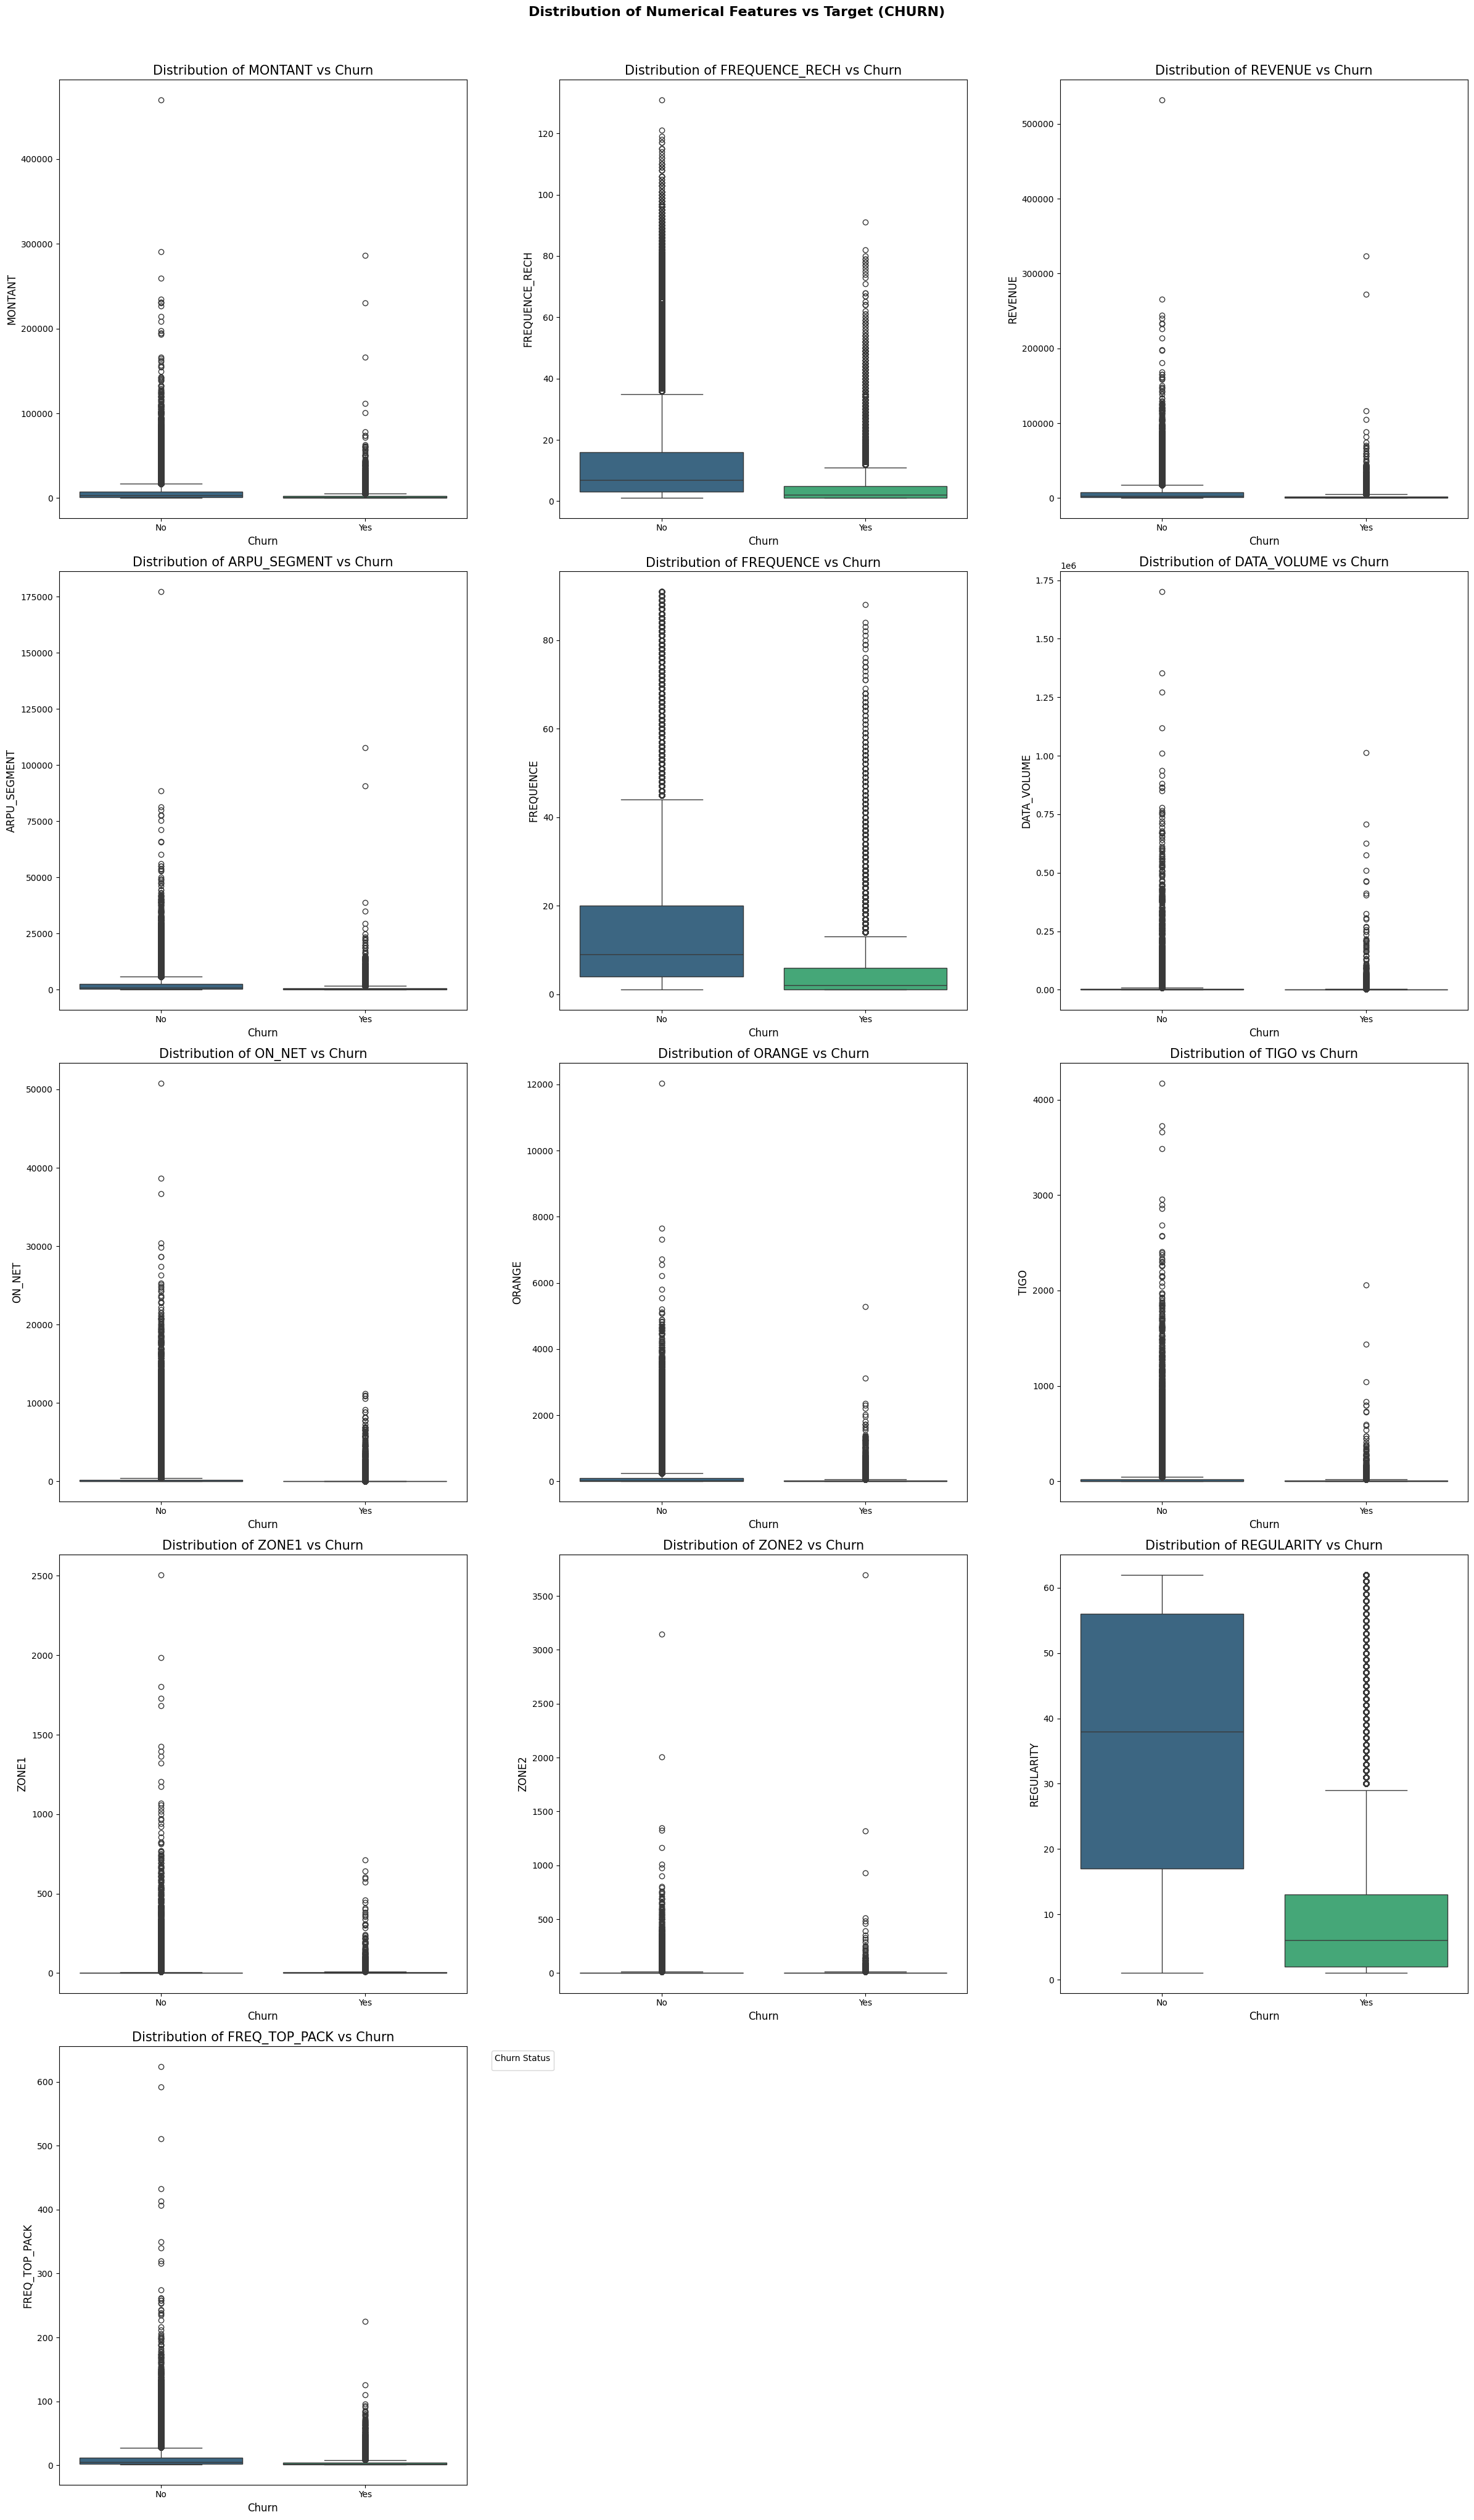

In [30]:
def check_for_outliers(df_train_eda, numerical_features):
    # Calculate the number of rows and columns for subplots
    number_of_columns = 3
    number_of_rows = math.ceil(len(numerical_features) / number_of_columns)

    # Create the figure and set the size dynamically based on the number of rows
    fig, axes = plt.subplots(number_of_rows, number_of_columns, figsize=(24, 8 * number_of_rows))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Iterate through each numerical feature and create a box plot
    for i, feature in enumerate(numerical_features):
        ax = axes[i]
        
        # Create a box plot for the numerical feature grouped by 'Churn'
        sns.boxplot(data=df_train_eda, x='CHURN', y=feature, palette='viridis', ax=ax)
        
        # Set plot title and labels
        ax.set_title(f'Distribution of {feature} vs Churn', fontsize=15)
        ax.set_xlabel('Churn', fontsize=12)
        ax.set_ylabel(feature, fontsize=12)
    
    # Remove any unused subplots
    for i in range(len(numerical_features), len(axes)):
        fig.delaxes(axes[i])

        # Move the legend to the top right corner inside the plot
        ax.legend(title='Churn Status', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Add suptitle 
    plt.suptitle('Distribution of Numerical Features vs Target (CHURN)', fontsize=16, fontweight='bold', y=1.02)
    
    # Show the plot
    plt.show()

# Plot numerical features vs target variable to check for outliers
check_for_outliers(df_train_eda, numerical_features)

**General Observations:**

- **Outliers**: Nearly all variables, including `MONTANT`, `FREQUENCE_RECH`, `REVENUE`, and `ARPU_SEGMENT`, exhibit numerous outliers. Addressing these outliers through transformations or capping is crucial to avoid skewing the model.
   
- **Distribution**: Many features, such as `MONTANT`, `REVENUE`, and `DATA_VOLUME`, display right-skewed distributions, where most customers have low values, but a few have very high values.

**Feature-Specific Insights:**

- **MONTANT**: Non-churners have marginally higher values than churners, though the difference is minimal, and the presence of outliers weakens its predictive power.

- **FREQUENCE_RECH**: Non-churners show a higher recharge frequency, making this feature a strong churn predictor.

- **REVENUE**: Non-churners have slightly higher revenues, but due to numerous outliers, this feature may require further preprocessing to enhance its predictive strength.

- **ARPU_SEGMENT**: Churners have lower ARPU, indicating that this feature could be useful in predicting churn.

- **FREQUENCE**: Higher frequency of interaction is associated with lower churn probability, making it an important feature.

- **DATA_VOLUME**: There is little distinction between churners and non-churners, indicating that this feature may have limited predictive relevance.

- **ON_NET, ORANGE, TIGO, ZONE1, ZONE2**: These features show minimal differences between churn groups and are filled with outliers, limiting their standalone predictive value.

- **FREQ_TOP_PACK**: Higher values are seen in non-churners, suggesting predictive potential.

- **REGULARITY**: This feature did not show extreme values in the overall distribution but shows significant differences between churners and non-churners. Non-churners have significantly higher regularity, making it highly relevant for predicting churn.

**Conclusion for Modeling:**

- **Most Valuable Features**: `REGULARITY`, `FREQUENCE_RECH`, and `FREQUENCE` are key predictors due to clear differences between churners and non-churners.
- **Moderately Useful Features**: `MONTANT`, `REVENUE`, `ARPU_SEGMENT`, and `FREQ_TOP_PACK` may add value when combined with other features, despite some overlap in churn classes.
- **Less Useful Features**: `DATA_VOLUME`, `ON_NET`, `TIGO`,  `ORANGE`, `ZONE1`, and `ZONE2` have limited predictive power due to small differences between churn groups and numerous outliers.

##### Correlation

- **Churn Correlation**

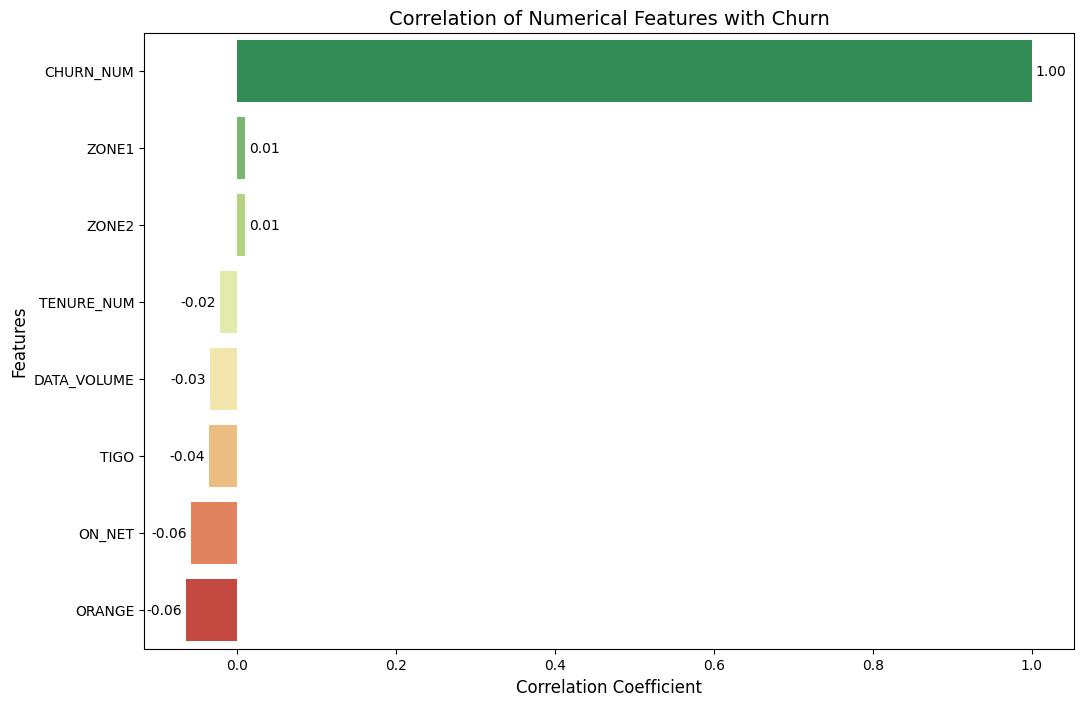

Feature  Correlation with Churn
0    CHURN_NUM                1.000000
1        ZONE1                0.009309
2        ZONE2                0.009279
3   TENURE_NUM               -0.022155
4  DATA_VOLUME               -0.033699
5         TIGO               -0.035993
6       ON_NET               -0.058102
7       ORANGE               -0.064132

In [31]:
# Encode TENURE Numerically
tenure_mapping = {
    'D 3-6 month': 1,
    'E 6-9 month': 2,
    'F 9-12 month': 3,
    'G 12-15 month': 4,
    'H 15-18 month': 5,
    'I 18-21 month': 6,
    'J 21-24 month': 7,
    'K > 24 month': 8
}

# Map TENURE and CHURN to numerical values
df_train_eda['TENURE_NUM'] = df_train_eda['TENURE'].map(tenure_mapping)
df_train_eda['CHURN_NUM'] = df_train_eda['CHURN'].map({'Yes': 1, 'No': 0})

# Churn Correlation
correlation_features = ['DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'TENURE_NUM']
correlation = df_train_eda[correlation_features + ['CHURN_NUM']].corr()
churn_correlation = correlation['CHURN_NUM'].sort_values(ascending=False)

# Plot Churn Correlation
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=churn_correlation.values, y=churn_correlation.index, palette='RdYlGn_r')

# Add data labels to the bars
for container in ax.containers:
    labels = [f'{value:.2f}' for value in container.datavalues]
    ax.bar_label(container, labels=labels, padding=3)

# Add labels and title
plt.title('Correlation of Numerical Features with Churn', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Show the plot
plt.show()

# Display churn correlation
churn_correlation_df = pd.DataFrame(churn_correlation).reset_index()
churn_correlation_df.columns = ['Feature', 'Correlation with Churn']
churn_correlation_df

`Comment`

- **Weak Correlations**: 
   - All numerical features have very low correlation with churn, with the highest being -0.06 (`ORANGE`, `ON_NET`), suggesting weak linear relationships.

- **Implications for Modeling**: 
   - Linear models (e.g., logistic regression) may not benefit from these features, but non-linear models (e.g., decision trees, random forests) could still extract value by capturing complex interactions.
   - Feature engineering, such as creating interaction terms or applying transformations, may improve their predictive power.

- **Tenure Correlation**

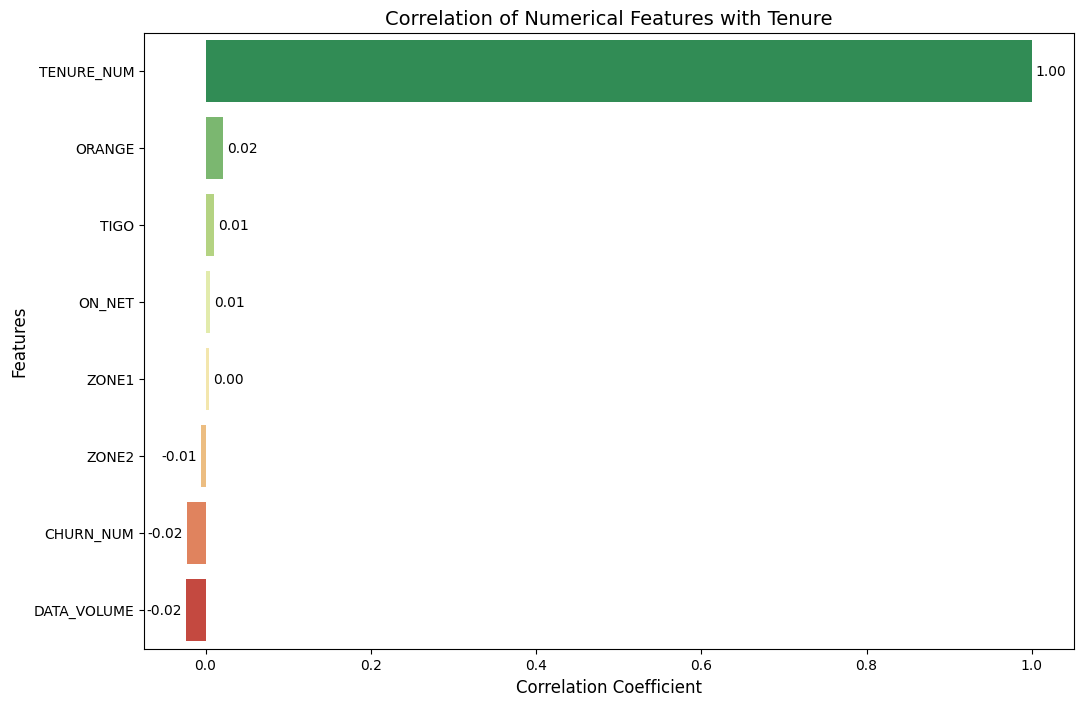

Feature  Correlation with Tenure
0   TENURE_NUM                 1.000000
1       ORANGE                 0.021225
2         TIGO                 0.010584
3       ON_NET                 0.005761
4        ZONE1                 0.003799
5        ZONE2                -0.005102
6    CHURN_NUM                -0.022155
7  DATA_VOLUME                -0.023304

In [32]:
# Tenure Correlation
correlation_features = ['DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'CHURN_NUM']
correlation = df_train_eda[correlation_features + ['TENURE_NUM']].corr()
tenure_correlation = correlation['TENURE_NUM'].sort_values(ascending=False)

# Plot Tenure Correlation
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=tenure_correlation.values, y=tenure_correlation.index, palette='RdYlGn_r')

# Add data labels to the bars
for container in ax.containers:
    labels = [f'{value:.2f}' for value in container.datavalues]
    ax.bar_label(container, labels=labels, padding=3)

# Add labels and title
plt.title('Correlation of Numerical Features with Tenure', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Show the plot
plt.show()

# Display tenure correlation
churn_correlation_df = pd.DataFrame(tenure_correlation).reset_index()
churn_correlation_df.columns = ['Feature', 'Correlation with Tenure']
churn_correlation_df

`Comment`

- **Weak Correlations**: 
   - `TENURE_NUM` shows very weak correlations with other numerical features, with most values near zero. The strongest is with `ORANGE` (0.02), while `ZONE1` has the weakest correlation (0.004).

- **Imputation Strategy**: 
   - Using `TENURE_NUM` to impute missing values won’t maintain strong relationships due to the weak correlations. Alternative methods like **KNN**, **MICE**, or mean/median imputation could be more effective.

- **Impact on Churn Prediction**: 
   - The weak correlation between `TENURE_NUM` and `CHURN_NUM` (-0.02) indicates that tenure is not a strong predictor of churn, so imputation based on `TENURE_NUM` alone may not enhance churn prediction.

##### Feature Comparison by Tenure

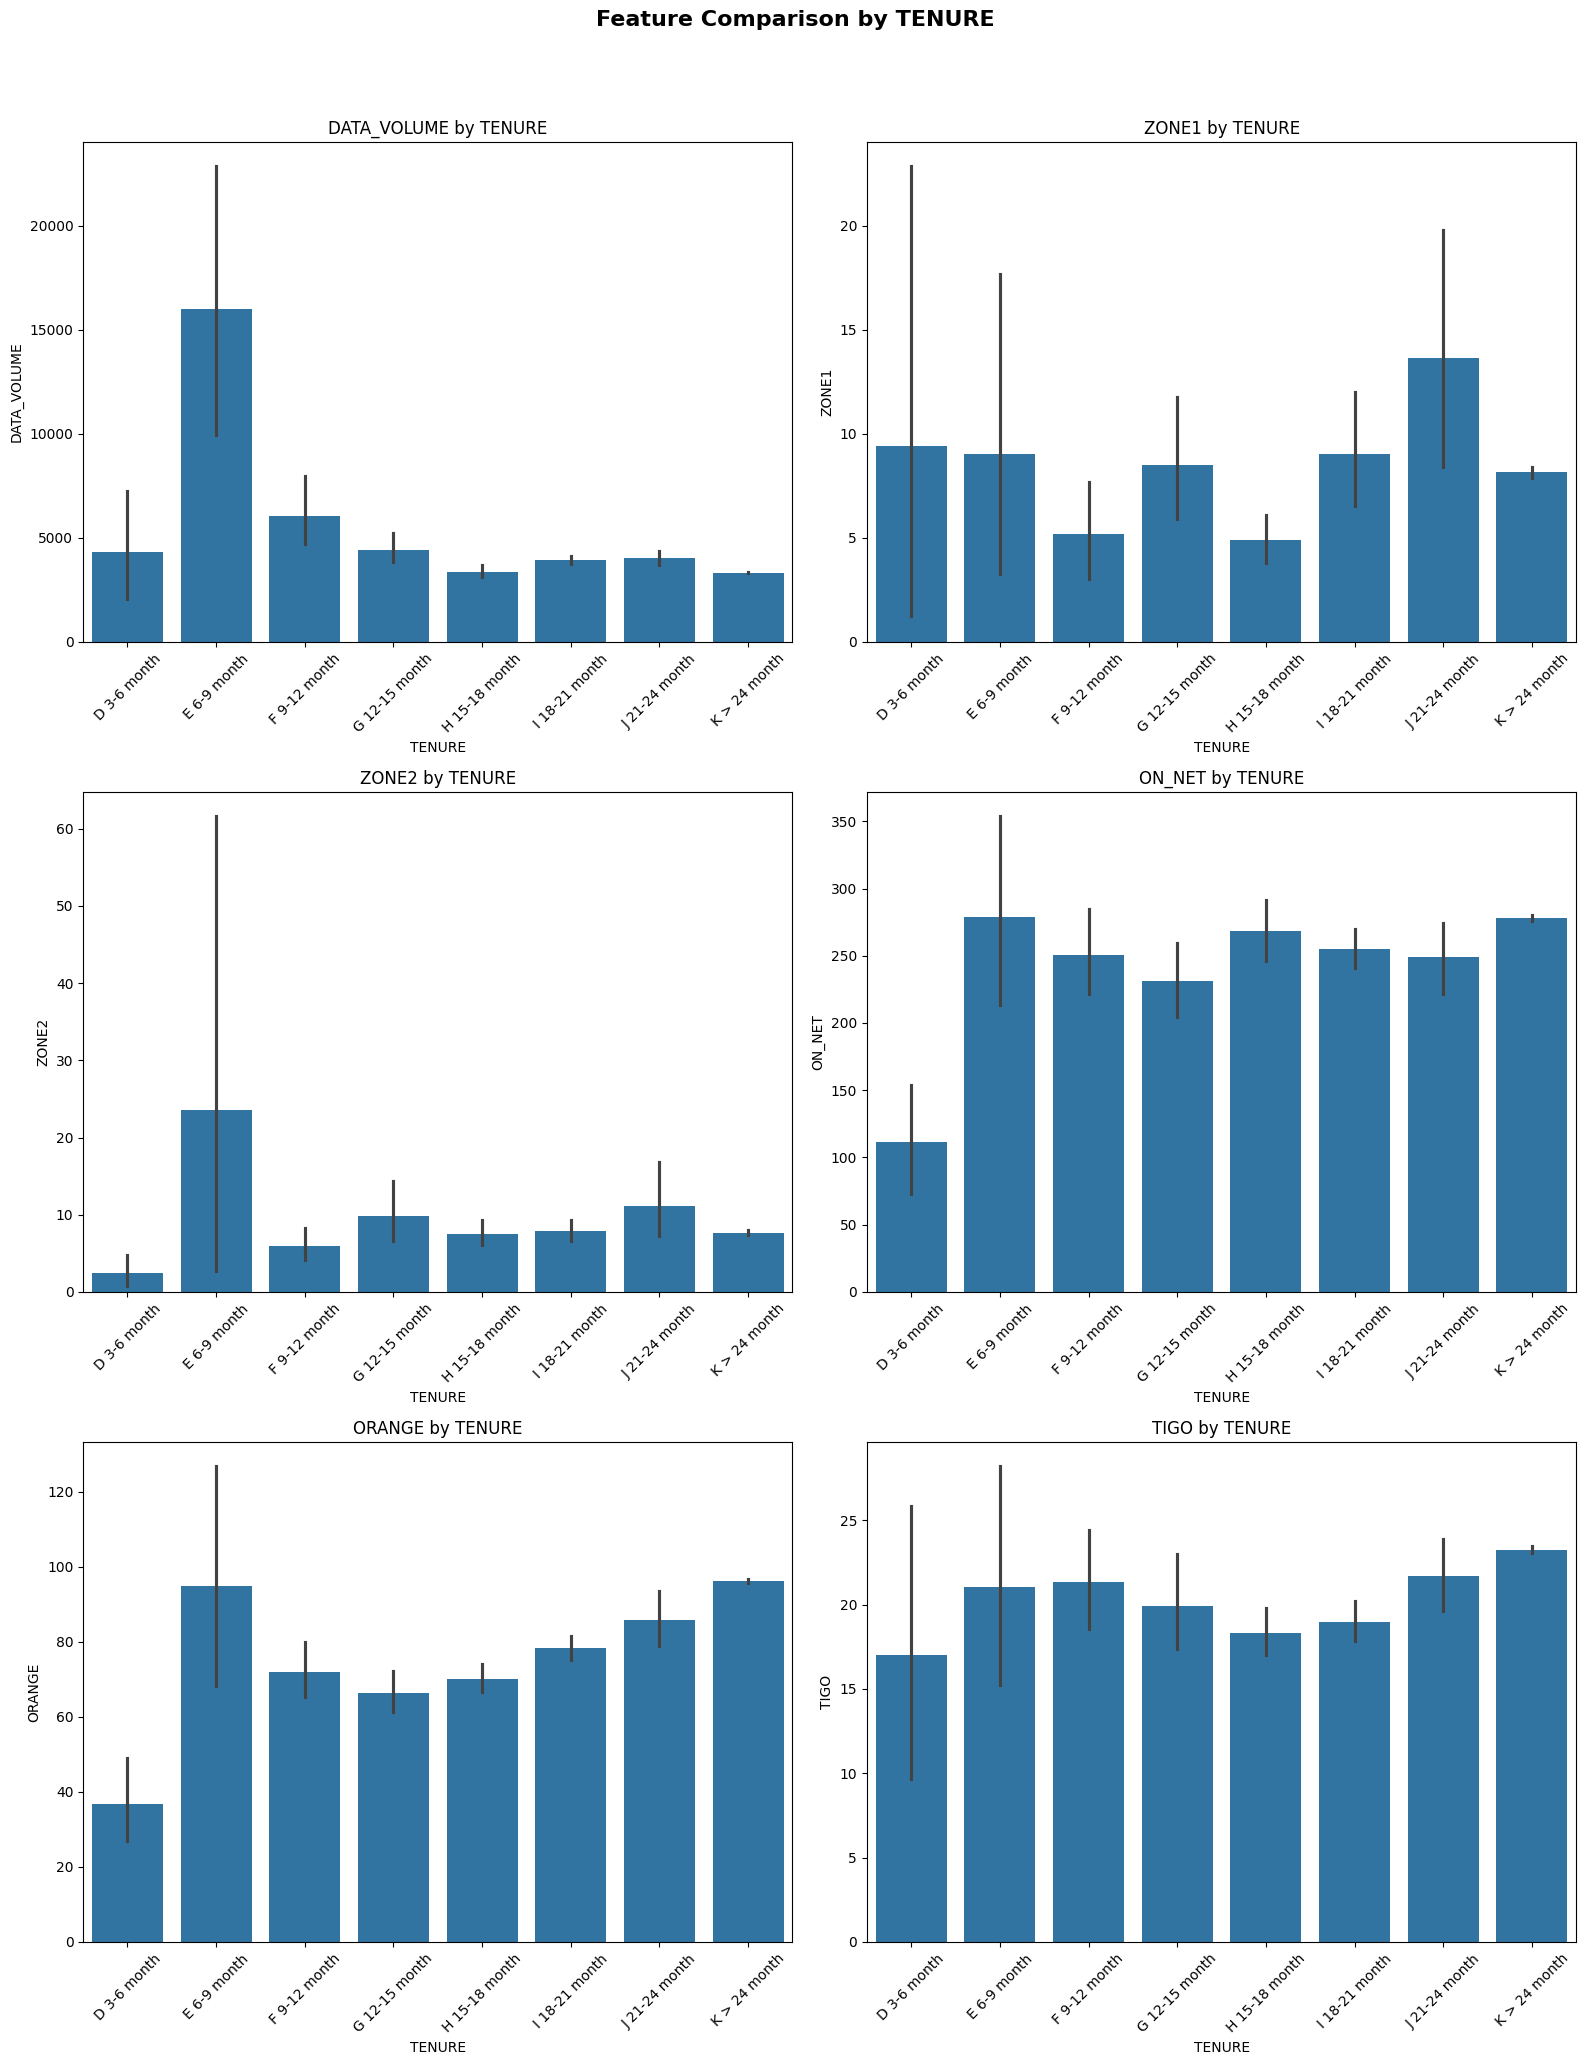

In [33]:
# Define the correct order of tenure categories
tenure_order = ['D 3-6 month', 'E 6-9 month', 'F 9-12 month', 'G 12-15 month', 
                'H 15-18 month', 'I 18-21 month', 'J 21-24 month', 'K > 24 month']

# List of features to plot
features = ['DATA_VOLUME', 'ZONE1', 'ZONE2', 'ON_NET', 'ORANGE', 'TIGO']

# Create a figure with subplots for each feature
plt.figure(figsize=(16, 20))

# Iterate through the features to create subplots
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.barplot(data=df_train_eda, x='TENURE', y=feature, order=tenure_order)
    plt.title(f'{feature} by TENURE')
    plt.xlabel('TENURE')
    plt.ylabel(feature)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

# Add a suptitle with bold fontweight
plt.suptitle('Feature Comparison by TENURE', fontsize=16, fontweight='bold', y=1.03)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

`Comment`

**Key Observations:**
- **DATA_VOLUME**: New customers (0-9 months), especially within 6-9 months, use significantly more data. Usage drops sharply after 9 months and remains stable for longer tenures.
- **ZONE1**: Highest usage occurs for customers with 21-24 months of tenure, with lower usage in for customers 15-18 months.
- **ZONE2**: Highest usage is seen for customers with 6-9 months, followed by a decline.
- **ON_NET**: Usage remains stable across tenures, with a slight increase for those with with 6-9 months and more than 24 months as well as lower usage in early tenures (0-6 months)
- **ORANGE**: Usage peaks in the 0-9 month range and stabilizes after 9 months.
- **TIGO**: Usage peaks around 6-9 months and more than 24 months but shows no strong patterns across other tenures.

**Implications for Modeling and Imputation:**
- **Imputation Based on Tenure**: While correlations between tenure and other features are weak, the distinct usage patterns by tenure group justify using tenure for imputing missing values. Early tenures exhibit higher usage, while longer tenures show more stability, which should guide the imputation process.

- **High Variability in Early Tenure Groups**: Features like `DATA_VOLUME`, `ZONE2`, and `ORANGE` show significant variability in early tenures (3-9 months), meaning that mean-based imputation might misrepresent actual behavior. Imputation methods like **KNN** or **MICE** could handle this better by capturing the range of behaviors.

- **Lower Variability in Longer Tenures**: Longer tenure groups (>12 months) show more consistent usage, making mean or median imputation more reliable.
  
- **Churn Prediction Impact**: 
  - Since tenure has a weak correlation with churn, using it alone for imputation may not significantly affect churn prediction. However, maintaining relationships between tenure and other features may improve overall data quality. Alternative imputation methods like **KNN** or **MICE** may preserve feature interactions more effectively.
  - High variability in early tenures reduces distinctiveness between groups, which may affect churn prediction. Tenure alone may not be a strong predictor, but preserving general patterns remains valuable.

**Conclusion:**
- **Imputation**: Tenure-based imputation is justified by observed patterns, ensuring contextual filling of missing values across tenure groups. Due to high variability in early tenures, alternative imputation methods beyond the mean (like KNN or MICE) should be considered. For longer tenures, mean-based imputation is more reliable.
- **Churn Prediction**: Tenure may not strongly predict churn, but preserving its relationship with other features through imputation could improve model performance and data integrity.

##### Churn Proportion by Region

Chi-Square Test
_______________
Chi-Square Statistic: 866.9265971847785
P-value: 6.292634493389777e-177
Degrees of Freedom: 13


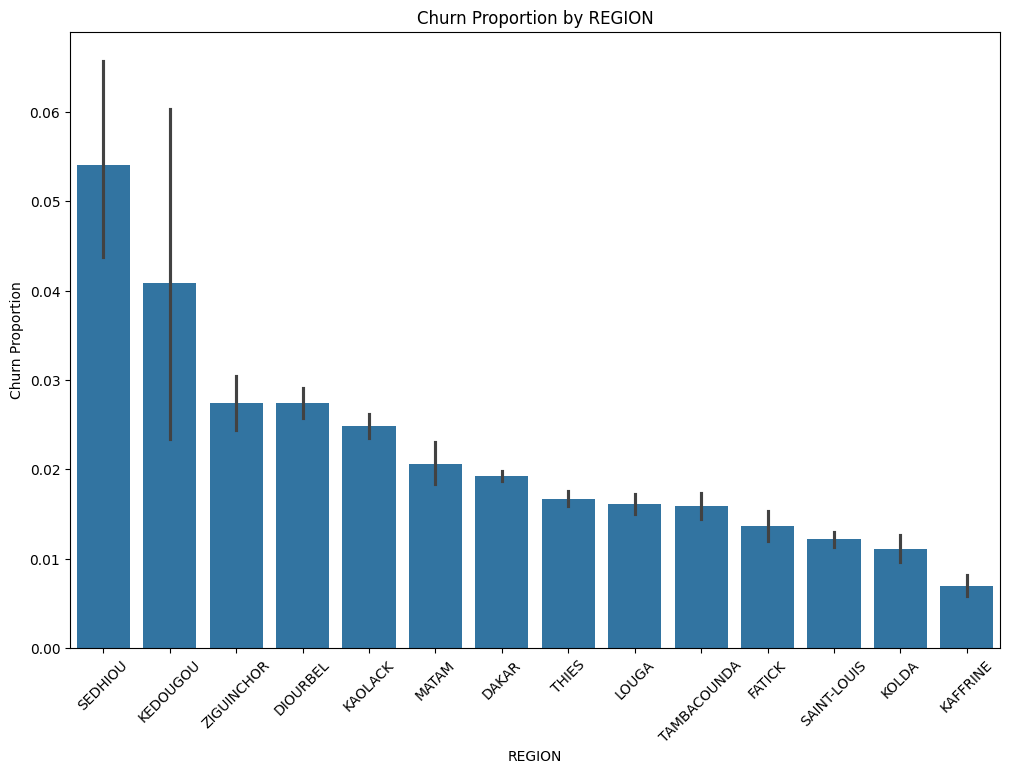

In [34]:
# Subset the DataFrame for encoding
df_train_chi = df_train_eda[['REGION', 'CHURN']]

# Create contingency table
contingency_table = pd.crosstab(df_train_chi['CHURN'], df_train_chi['REGION'])

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test")
print("_"*15)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

# Calculate churn proportion for each REGION using the existing CHURN_NUM
churn_proportion = df_train_eda.groupby('REGION')['CHURN_NUM'].mean().sort_values(ascending=False)

# Plot Churn Proportion by REGION with error bars
plt.figure(figsize=(12, 8))
sns.barplot(x='REGION', y='CHURN_NUM', data=df_train_eda, estimator=lambda x: x.mean(), order=churn_proportion.index)
plt.title('Churn Proportion by REGION')
plt.xticks(rotation=45)
plt.xlabel('REGION')
plt.ylabel('Churn Proportion')
plt.show()

`Comment`

- **Regional Differences in Churn**:
   - Churn rates vary significantly across regions, with **SEDHIOU** and **KEDOUGOU** having the highest churn (~4-6%) and **KAFFRINE** the lowest (~1%). This highlights **region** as an important factor in predicting churn.

- **Chi-Square Test Results**:
   - A **Chi-Square Statistic** of 866.93 and a **p-value** near zero indicate a **strong relationship** between region and churn, confirming that regional information is statistically significant for churn prediction.

- **Error Bars and Variability**:
   - **High variability** in regions like **SEDHIOU** and **KEDOUGOU** suggests that imputing based on the mean alone may not reflect customer behavior accurately. In contrast, regions like **KAFFRINE** and **KOLDA** show **lower variability**, making mean-based imputation more reliable.

- **Imputation Strategy:**
  - **For High Churn/High Variability Regions** (SEDHIOU, KEDOUGOU): Advanced imputation methods like **KNN** or **MICE** would better capture the range of behaviors.
  - **For Low Churn/Low Variability Regions** (KAFFRINE, KOLDA): Mean imputation may suffice due to more consistent churn behavior.

- **Impact on Churn Prediction:**
  - **Region** is a key predictor of churn, but variability in some regions may challenge model accuracy. Advanced imputation techniques can help improve data quality, especially in regions with high churn variability.

- **Conclusion:**
  - **Region-based imputation** is justified but should consider variability. Using advanced methods for high-variability regions will preserve important data patterns and improve churn prediction.

##### Feature Comparison by Region

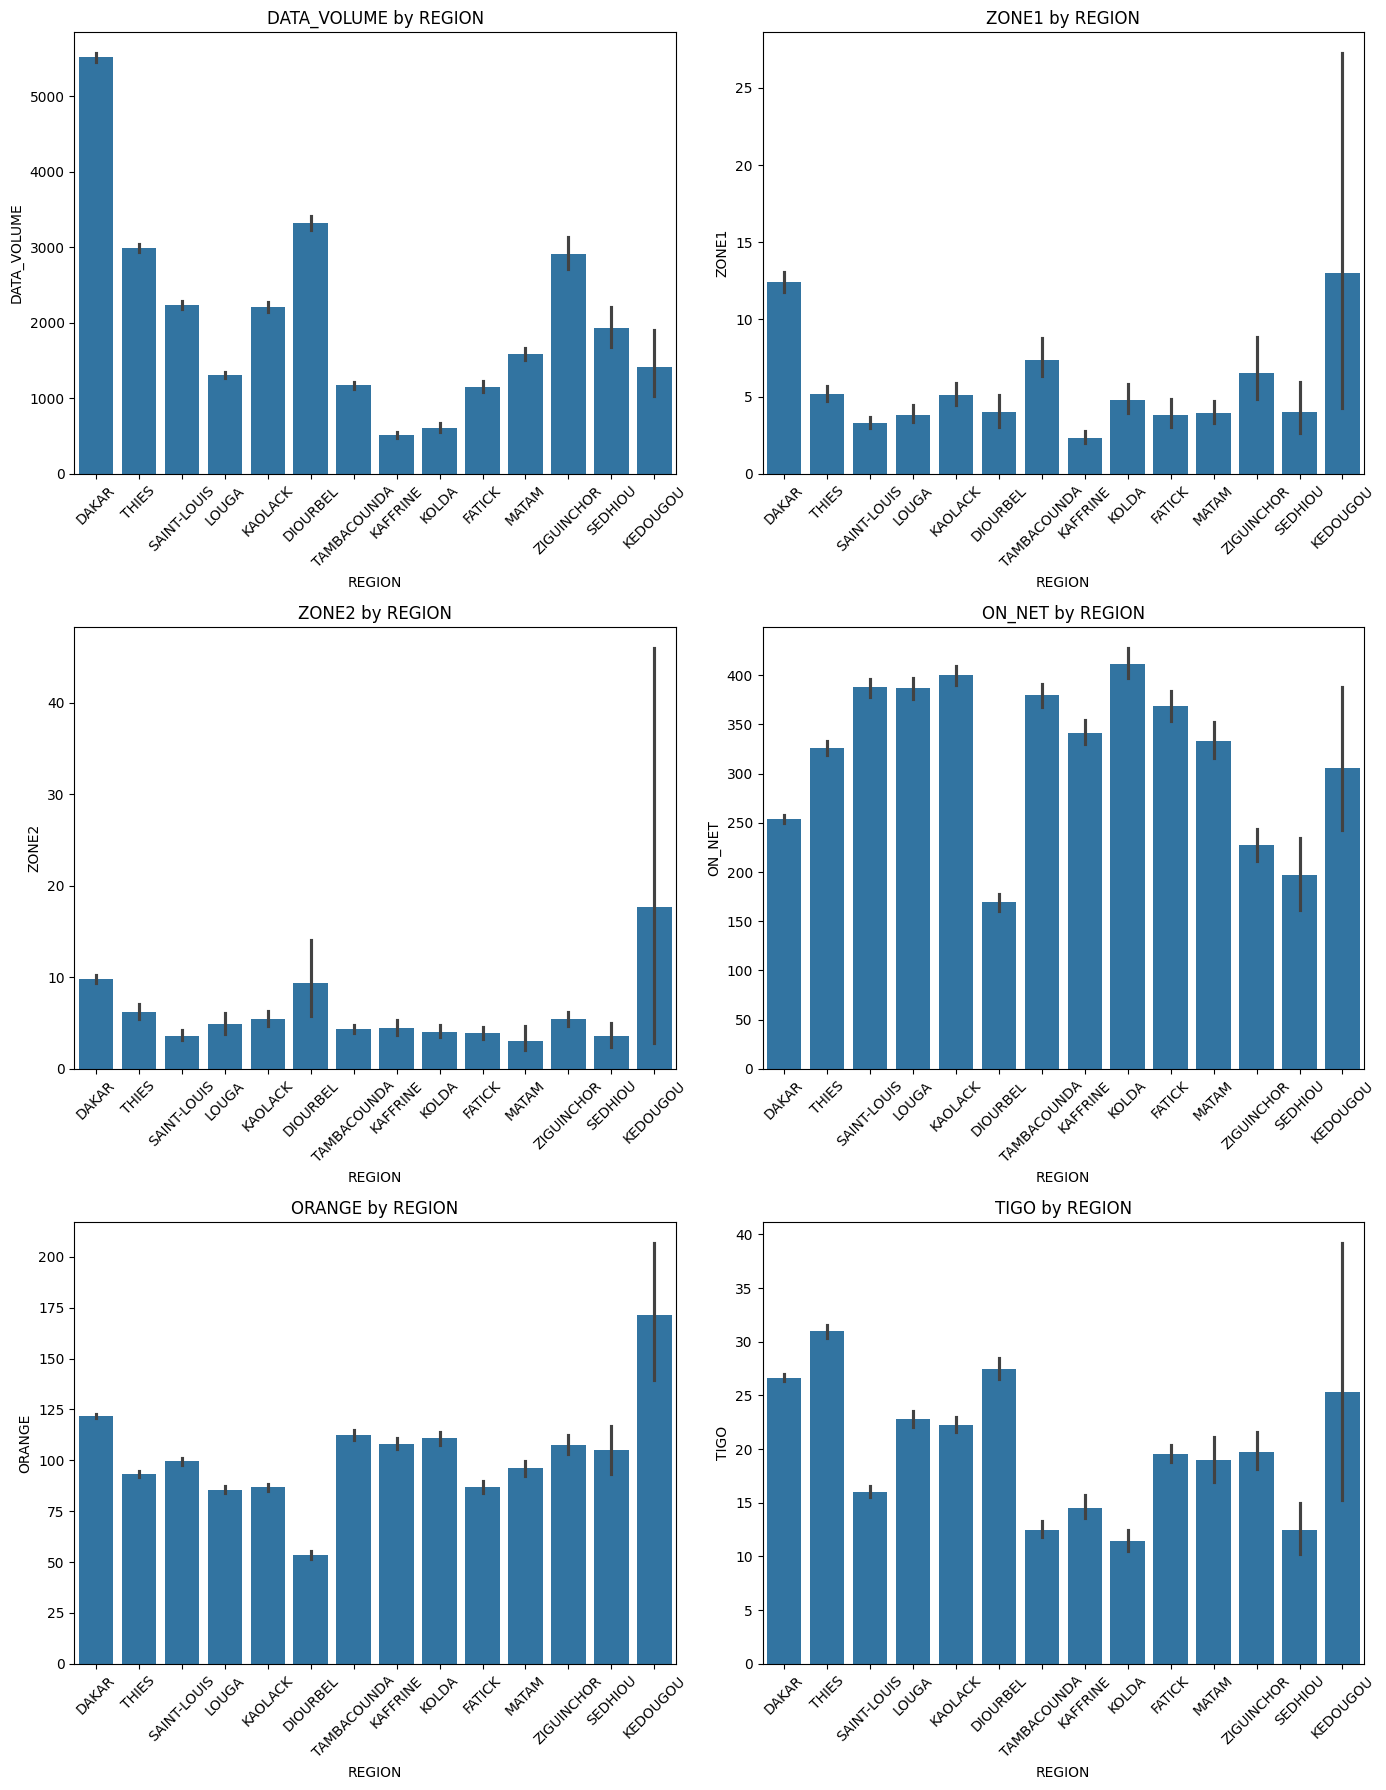

In [35]:
# Define the order of regions 
region_order = df_train_eda['REGION'].value_counts().index

# Define the features to plot
features_to_plot = ['DATA_VOLUME', 'ZONE1', 'ZONE2', 'ON_NET', 'ORANGE', 'TIGO']

# Create the subplots with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()

# Plot each feature
for ax, feature in zip(axes, features_to_plot):
    sns.barplot(data=df_train_eda, x='REGION', y=feature, order=region_order, ax=ax)
    ax.set_title(f'{feature} by REGION')
    ax.set_xlabel('REGION')
    ax.set_ylabel(feature)
    ax.tick_params(axis='x', rotation=45)

# Remove any unused subplots
for i in range(len(features_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

`Comment`

- **Regional Differences Across Features**:
   - **Significant variation** exists across regions for most features. For instance, **DATA_VOLUME** is highest in **DAKAR** and **DIOURBEL**, while **KEDOUGOU** and **SEDHIOU** show much lower usage.
   - **ON_NET** usage is also higher in **SAINT-LOUIS**, **KAOLACK**, and **KOLDA**, with **DIOURBEL** and **SEDHIOU** on the lower end.
   - Regions like **KEDOUGOU** display large variability, especially in **ZONE1**, **ZONE2**, and **TIGO** usage.

- **Error Bars and Variability**:
   - **KEDOUGOU** has large error bars, indicating high variability, making mean-based imputation unreliable.
   - **DAKAR**, **THIES**, and **SAINT-LOUIS** have smaller error bars, suggesting more consistent behavior, making mean imputation more suitable for these regions.

- **Feature Significance**:
   - Features like **DATA_VOLUME**, **ON_NET**, and **ZONES** show strong regional variation, suggesting they may have a significant impact on churn.

- **Imputation Strategy**:
   - Imputation based on **region** is justified due to the strong regional differences.
   - **KEDOUGOU** and similar regions with high variability require advanced imputation techniques (e.g., **KNN**, **MICE**) to better capture customer behavior.
   - **DAKAR** and **THIES**, with low variability, can rely on mean or median imputation.

- **Conclusion:**
  - **Region** is a key factor for imputing missing values, helping to maintain crucial relationships for churn prediction.
  - **Advanced imputation** is needed for high-variability regions, while mean-based imputation works for low-variability areas like **DAKAR**.
  - Incorporating regional differences improves churn prediction accuracy, but handling variability carefully is essential.

#### D. Multivariate Analysis

In [36]:
# Update Numerical columns
numerical_features = df_train_eda.select_dtypes('number').columns

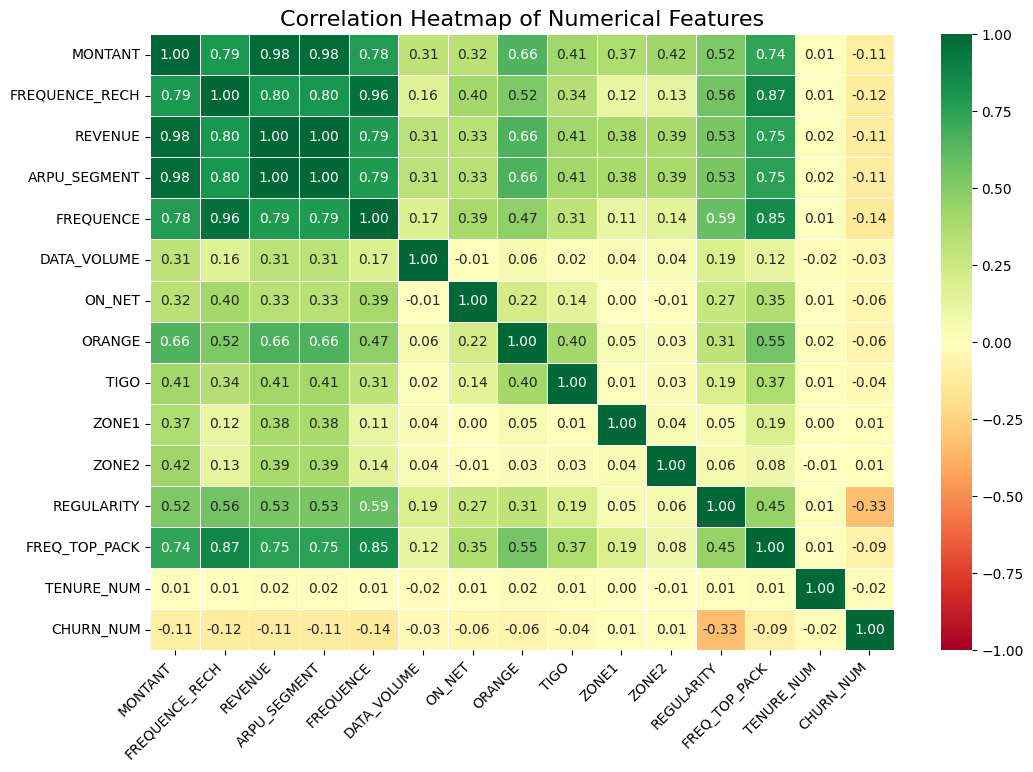

In [37]:
# Update Numerical columns
numerical_features = df_train_eda.select_dtypes('number').columns

def plot_correlation_heatmap(df, numerical_features, title='Correlation Heatmap of Numerical Features'):

    # Calculate the correlation matrix
    correlation_matrix = df[numerical_features].corr()

    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1, linewidths=0.5, fmt=".2f")

    # Set the title and labels
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks()

    # Show the plot
    plt.show()

# Correlation heatmap of numerical features
plot_correlation_heatmap(df_train_eda, numerical_features)


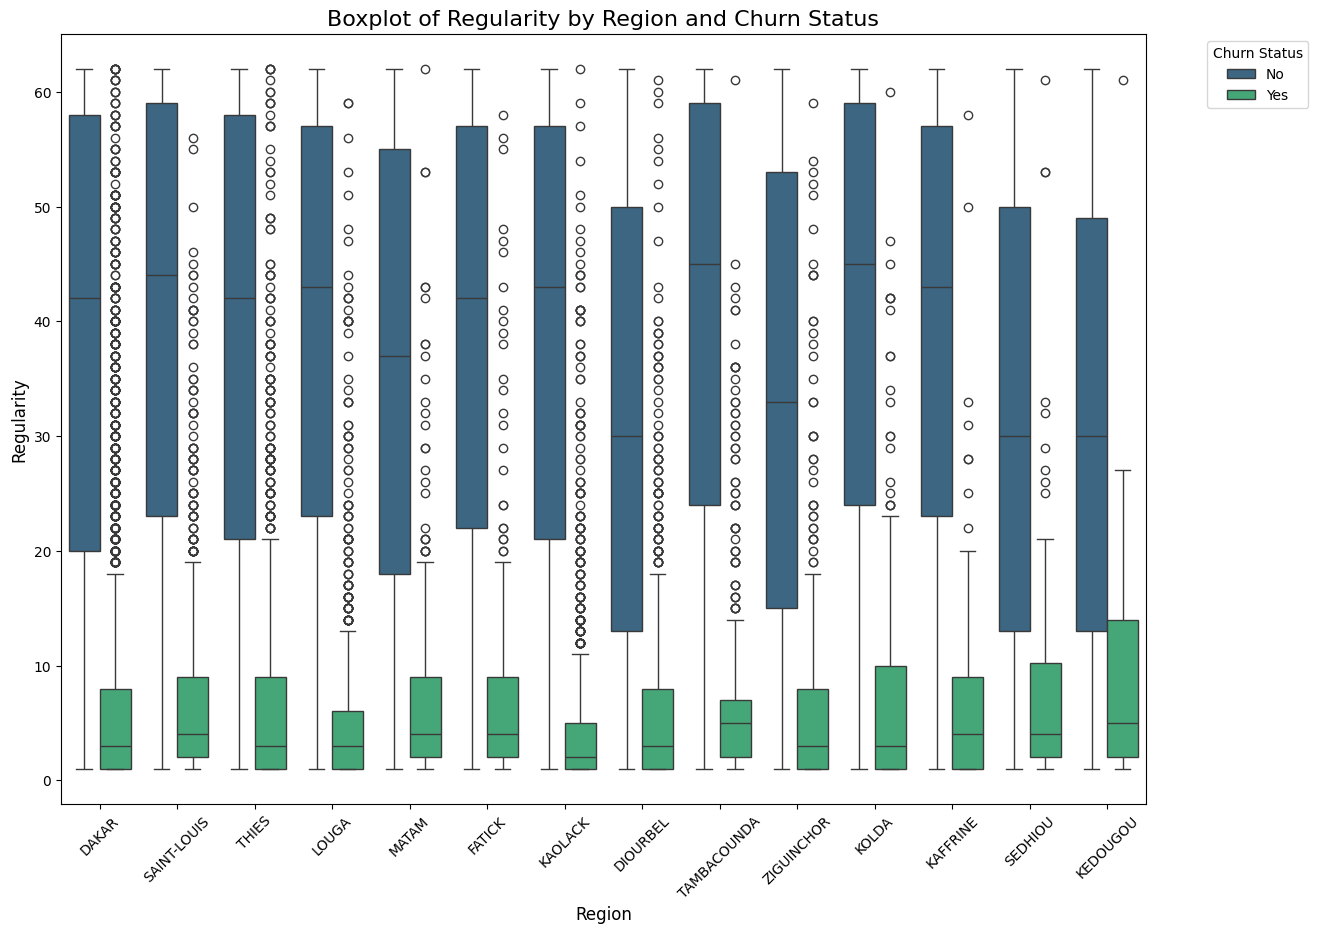

In [38]:
# Create a boxplot to show the distribution of tenure by gender, separated by churn status
plt.figure(figsize=(14, 10))
sns.boxplot(x='REGION', y='REGULARITY', hue='CHURN', data=df_train_eda, palette='viridis')

# Set the title and labels
plt.title('Boxplot of Regularity by Region and Churn Status', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Regularity', fontsize=12)
plt.xticks(rotation=45)

# Display the legend and customize its title
plt.legend(title='Churn Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [39]:
# # Update Numerical columns
# numerical_features = [col for col in numerical_features if col != 'CHURN_NUM']

# # Create a pairplot of the selected numerical features colored by the 'Churn' variable
# plt.figure(figsize=(12, 8))
# sns.pairplot(df_train_eda[numerical_features + ['CHURN']], hue='CHURN', palette='viridis')

# # Set a descriptive title for the plot
# plt.suptitle('Pairplot of Numerical Features Colored by Churn Status', fontsize=16, y=1.02)

# # Show the plot
# plt.show()

#### E. Handling Missing Values and Feature Engineering

##### Handling Missing Values

In [40]:
# Determine the proportion of missing values
missing_percentage = (df_train_eda.isnull().mean() * 100).round(2)

# Check for duplicated values
duplicate_count = df_train_eda.duplicated(subset=None, keep=False).sum()

# Display Results
print("Proportion of missing values in df_train_eda dataset:\n")
print(missing_percentage)
print("\nNumber of duplicated rows in df_train_eda dataset:", duplicate_count)

Proportion of missing values in df_train_eda dataset:

REGION            24.81
TENURE             0.00
MONTANT           19.46
FREQUENCE_RECH    19.46
REVENUE           17.67
ARPU_SEGMENT      17.67
FREQUENCE         17.67
DATA_VOLUME       36.95
ON_NET            21.22
ORANGE            27.44
TIGO              50.20
ZONE1             90.22
ZONE2             92.07
MRG                0.00
REGULARITY         0.00
TOP_PACK          27.87
FREQ_TOP_PACK     27.87
CHURN              0.00
TENURE_NUM         0.00
CHURN_NUM          0.00
dtype: float64

Number of duplicated rows in df_train_eda dataset: 116915


`Comment`

- **Features with > 51% missing values (ZONE1 and ZONE2) will be dropped** due to the challenges of imputing such a large proportion of missing data. For example their high level of missingness makes it difficult to impute without introducing bias or significantly distorting the dataset which in turn might lead to inaccurate modelling.
  
- **Contextual imputation using `REGION` and `TENURE`** will be applied for `DATA_VOLUME`, `ORANGE`, and `TIGO` to maintain localized trends in customer behavior. This method preserves the relationships between REGION and TENURE, while the use of the median helps reduce the impact of outliers. Although it reduces the variability within groups, as imputed values will center around the median, this approach is computationally efficient compared to **KNN** and **MICE**.
  
- **Joint median imputation** will be used for co-dependent numerical features (`MONTANT` with `FREQUENCE_RECH`, and `REVENUE` with `ARPU_SEGMENT` & `FREQUENCE`), ensuring the preservation of their interdependence.
  
- **Mode and median imputation** will be applied to the categorical feature `TOP_PACK` and its corresponding numerical feature `FREQ_TOP_PACK`, respectively.
  
- **Remaining missing values**, including `ON_NET`, will be handled by the pipeline to ensure no gaps are left prior to modeling.

This comprehensive approach ensures that missing data is handled systematically, preserving the underlying structure and relationships in the dataset while preparing it for effective modeling.

In [41]:
# Drop columns where the percentage of missing values is greater than 51%
df_train_eda.drop(columns=missing_percentage[missing_percentage > 51].index, inplace=True)

In [42]:
# Fill missing values in TOP_PACK with the most frequent value
df_train_eda['TOP_PACK'] = df_train_eda['TOP_PACK'].fillna(df_train_eda['TOP_PACK'].mode()[0])

# Contextually fill missing values in TOP_PACK_FREQ based on the median of the respective TOP_PACK group
df_train_eda['FREQ_TOP_PACK'] = df_train_eda.groupby('TOP_PACK')['FREQ_TOP_PACK'].transform(lambda x: x.fillna(x.median()))

In [43]:
# Fill missing values in MONTANT with its overall median
df_train_eda['MONTANT'] = df_train_eda['MONTANT'].fillna(df_train_eda['MONTANT'].median())

# Contextually fill missing values in FREQ_RECH based on the median of the respective MONTANT group
df_train_eda['FREQUENCE_RECH'] = df_train_eda.groupby('MONTANT')['FREQUENCE_RECH'].transform(lambda x: x.fillna(x.median()))

In [44]:
# Fill missing values in REVENUE with its overall median
df_train_eda['REVENUE'] = df_train_eda['REVENUE'].fillna(df_train_eda['REVENUE'].median())

# Contextually fill missing values in ARPU_SEGMENT based on the median of the respective REVENUE group
df_train_eda['ARPU_SEGMENT'] = df_train_eda.groupby('REVENUE')['ARPU_SEGMENT'].transform(lambda x: x.fillna(x.median()))

# Contextually fill missing values in FREQUENCE based on the median of the respective REVENUE group
df_train_eda['FREQUENCE'] = df_train_eda.groupby('REVENUE')['FREQUENCE'].transform(lambda x: x.fillna(x.median()))

In [45]:
# Contextually fill missing values in DATA_VOLUME based on the median of the respective REGION and TENURE groups
df_train_eda['DATA_VOLUME'] = df_train_eda.groupby(['REGION', 'TENURE'])['DATA_VOLUME'].transform(lambda x: x.fillna(x.median()))

# Contextually fill missing values in TIGO based on the median of the respective REGION and TENURE groups
df_train_eda['TIGO'] = df_train_eda.groupby(['REGION', 'TENURE'])['TIGO'].transform(lambda x: x.fillna(x.median()))

# Contextually fill missing values in ORANGE based on the median of the respective REGION and TENURE groups
df_train_eda['ORANGE'] = df_train_eda.groupby(['REGION', 'TENURE'])['ORANGE'].transform(lambda x: x.fillna(x.median()))

In [46]:
# Determine the proportion of missing values
missing_percentage = (df_train_eda.isnull().mean() * 100).round(2)

# Check for duplicated values
duplicate_count = df_train_eda.duplicated(subset=None, keep=False).sum()

# Display Results
print("Proportion of missing values in df_train_eda dataset:\n")
print(missing_percentage)
print("\nNumber of duplicated rows in df_train_eda dataset:", duplicate_count)

Proportion of missing values in df_train_eda dataset:

REGION            24.81
TENURE             0.00
MONTANT            0.00
FREQUENCE_RECH     0.00
REVENUE            0.00
ARPU_SEGMENT       0.00
FREQUENCE          0.00
DATA_VOLUME       24.81
ON_NET            21.22
ORANGE            24.81
TIGO              24.81
MRG                0.00
REGULARITY         0.00
TOP_PACK           0.00
FREQ_TOP_PACK      0.00
CHURN              0.00
TENURE_NUM         0.00
CHURN_NUM          0.00
dtype: float64

Number of duplicated rows in df_train_eda dataset: 146778


##### Feature Engineering

To compute `DAYS_SINCE_LAST_ACTIVITY`, an activity threshold is introduced to ensure meaningful variation in this feature, which is essential for capturing subtle differences across customer segments.

**Key Considerations:**
- **Business Expectations**: The threshold should align with customer interaction frequency. For frequent interactions, a higher threshold is appropriate, whereas for less frequent interactions, a lower threshold (e.g., 0.1) is more suitable.
- **Data Distribution**: Given that most data points are concentrated at lower values, selecting a lower threshold is recommended to better reflect the underlying distribution.

In [47]:
def calculate_days_since_last_activity(df):
    # Create a MinMaxScaler object
    scaler = MinMaxScaler()
    
    # Define the list of relevant numerical features, including REGULARITY
    relevant_numerical_features = [
        'FREQUENCE_RECH', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 
        'FREQ_TOP_PACK', 'REGULARITY'
    ]
    
    # Normalize relevant numerical features and rename them with '_1' suffix
    normalized_features = df[relevant_numerical_features].copy()
    normalized_features.columns = [f"{col}_1" for col in relevant_numerical_features]
    normalized_features[normalized_features.columns] = scaler.fit_transform(normalized_features)
    
    # Concatenate the normalized features with the original DataFrame
    df = pd.concat([df, normalized_features], axis=1)
    
    # Define the function to calculate days since last activity using normalized features
    def calculate_days(row):
        # Define a threshold for recent activity
        recent_threshold = 0.1  

        # Combine normalized features to estimate recent engagement, including REGULARITY
        engagement_score = (
            row['FREQUENCE_RECH_1'] + row['DATA_VOLUME_1'] + row['ON_NET_1'] +
            row['ORANGE_1'] + row['TIGO_1'] + row['FREQ_TOP_PACK_1'] +
            row['REGULARITY_1']
        ) / len(normalized_features.columns)

        # Determine days since last activity based on engagement score
        if engagement_score > recent_threshold:
            days_since_last_activity = max(90 - (engagement_score * 90), 0)
        else:
            days_since_last_activity = 90
        
        return pd.Series([engagement_score, days_since_last_activity], 
                         index=['ENGAGEMENT_SCORE', 'DAYS_SINCE_LAST_ACTIVITY'])

    # Apply the function to each row of the DataFrame
    df[['ENGAGEMENT_SCORE', 'DAYS_SINCE_LAST_ACTIVITY']] = df.apply(calculate_days, axis=1)
    
    # Drop the temporary normalized features with '_1' suffix
    df.drop(columns=normalized_features.columns, inplace=True)
    
    return df

# Calculate days since last activity and update DataFrame
df_train_eda = calculate_days_since_last_activity(df_train_eda)

# Display first few rows of Data Frame to verify changes
df_train_eda.head()

REGION        TENURE  MONTANT  \
user_id                                                                        
7ee9e11e342e27c70455960acc80d3f91c1286d1        DAKAR  K > 24 month  20000.0   
364ec1b424cdc64c25441a444a16930289a0051e  SAINT-LOUIS  K > 24 month   7900.0   
d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb        DAKAR  K > 24 month  12350.0   
b91a81e590d0dd029d99002d4226b9ca2cdf3cbc        DAKAR   E 6-9 month   2000.0   
42335a2a6a2a4cd30452ce9bc611bd66b3a9d4c2        DAKAR  K > 24 month   3000.0   

                                          FREQUENCE_RECH  REVENUE  \
user_id                                                             
7ee9e11e342e27c70455960acc80d3f91c1286d1            47.0  21602.0   
364ec1b424cdc64c25441a444a16930289a0051e            19.0   7896.0   
d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb            21.0  12351.0   
b91a81e590d0dd029d99002d4226b9ca2cdf3cbc             2.0   2000.0   
42335a2a6a2a4cd30452ce9bc611bd66b3a9d4c2             1.0   3000.0   

                                          ARPU_SEGMENT  FREQUENCE  \
user_id                                                             
7ee9e11e342e27c70455960acc80d3f91c1286d1        7201.0       52.0   
364ec1b424cdc64c25441a444a16930289a0051e        2632.0       25.0   
d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb        4117.0       29.0   
b91a81e590d0dd029d99002d4226b9ca2cdf3cbc         667.0        3.0   
42335a2a6a2a4cd30452ce9bc611bd66b3a9d4c2        1000.0        1.0   

                                          DATA_VOLUME  ON_NET  ORANGE   TIGO  \
user_id                                                                        
7ee9e11e342e27c70455960acc80d3f91c1286d1       8835.0  3391.0   396.0  185.0   
364ec1b424cdc64c25441a444a16930289a0051e       9385.0    27.0    46.0   20.0   
d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb       9360.0    66.0   102.0   34.0   
b91a81e590d0dd029d99002d4226b9ca2cdf3cbc       4206.0   246.0   709.0   10.0   
42335a2a6a2a4cd30452ce9bc611bd66b3a9d4c2       1305.5     NaN    39.0    7.0   

                                         MRG  REGULARITY       TOP_PACK  \
user_id                                                                   
7ee9e11e342e27c70455960acc80d3f91c1286d1  NO          62  Voice Package   
364ec1b424cdc64c25441a444a16930289a0051e  NO          61   Data Package   
d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb  NO          56  Voice Package   
b91a81e590d0dd029d99002d4226b9ca2cdf3cbc  NO          62  Voice Package   
42335a2a6a2a4cd30452ce9bc611bd66b3a9d4c2  NO           6   Data Package   

                                          FREQ_TOP_PACK CHURN  TENURE_NUM  \
user_id                                                                     
7ee9e11e342e27c70455960acc80d3f91c1286d1           30.0    No           8   
364ec1b424cdc64c25441a444a16930289a0051e            7.0    No           8   
d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb           11.0    No           8   
b91a81e590d0dd029d99002d4226b9ca2cdf3cbc            1.0    No           2   
42335a2a6a2a4cd30452ce9bc611bd66b3a9d4c2            1.0    No           8   

                                          CHURN_NUM  ENGAGEMENT_SCORE  \
user_id                                                                 
7ee9e11e342e27c70455960acc80d3f91c1286d1          0          0.223094   
364ec1b424cdc64c25441a444a16930289a0051e          0          0.165605   
d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb          0          0.158256   
b91a81e590d0dd029d99002d4226b9ca2cdf3cbc          0          0.154580   
42335a2a6a2a4cd30452ce9bc611bd66b3a9d4c2          0               NaN   

                                          DAYS_SINCE_LAST_ACTIVITY  
user_id                                                             
7ee9e11e342e27c70455960acc80d3f91c1286d1                 69.921516  
364ec1b424cdc64c25441a444a16930289a0051e                 75.095583  
d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb                 75.756931  
b91a81e590d0dd029d99002d4226b9ca2c

In [48]:
# Print the unique values and the count of unique values for the new feature
unique_values = df_train_eda['DAYS_SINCE_LAST_ACTIVITY'].unique()
nunique_values = df_train_eda['DAYS_SINCE_LAST_ACTIVITY'].nunique()

print("Unique values of DAYS_SINCE_LAST_ACTIVITY:")
print(unique_values)

print("\nNumber of unique values in DAYS_SINCE_LAST_ACTIVITY:", nunique_values)


Unique values of DAYS_SINCE_LAST_ACTIVITY:
[69.92151635 75.09558299 75.75693126 ... 72.95930409 79.60019004
 79.28949545]

Number of unique values in DAYS_SINCE_LAST_ACTIVITY: 321789


#### F. Analytical Questions

##### 1. What is the distribution of Churn?

- **Purpose:** To understand the overall churn rate in the dataset, providing a baseline for further analysis and highlighting the extent of the churn issue.

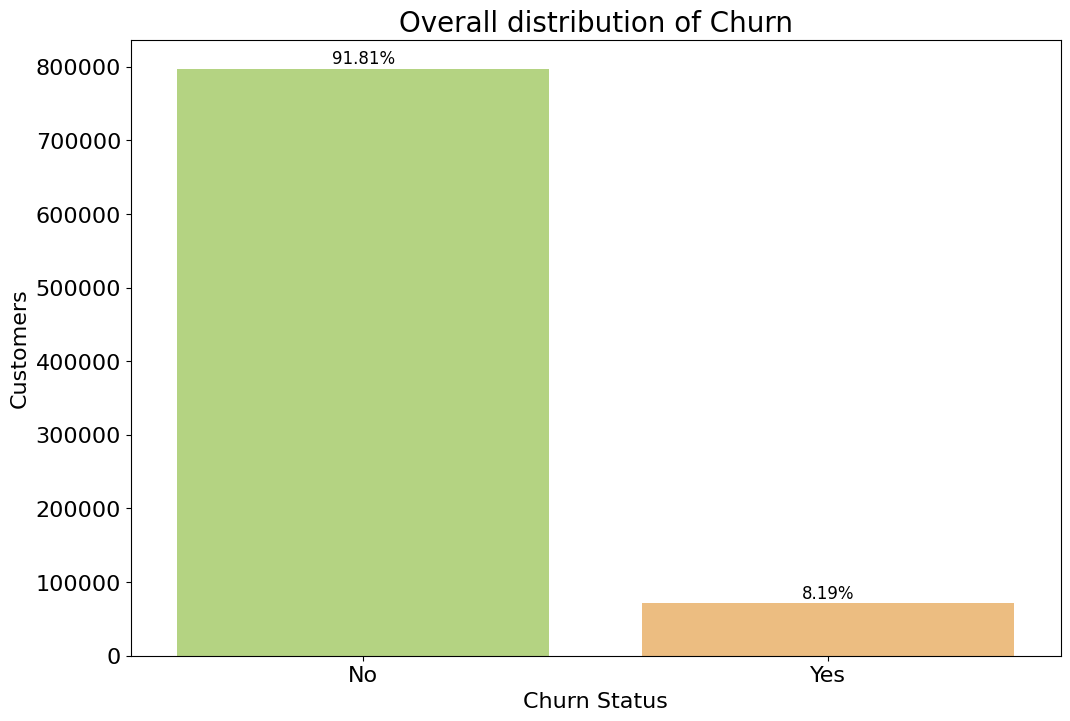

In [49]:
# Plot Churn distribution
plt.figure(figsize=(12,8))  
ax = sns.countplot(x=df_train_eda[target[0]], palette='RdYlGn_r')  

# Add percentage labels on top of the bars
total = len(df_train_eda)
for container in ax.containers:
    labels = [f'{(h.get_height()/total)*100:.2f}%' for h in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding=1, fontsize=12)

# Customise the plot
plt.title('Overall distribution of Churn', fontsize=20)
plt.xlabel('Churn Status', fontsize=16)
plt.ylabel('Customers', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Display plot
plt.show()

##### 2. How does the churn rate vary across different regions?

   - **Purpose:** To evaluate how churn rates differ across various regions, helping to identify geographic areas where customer retention efforts may need to be strengthened.

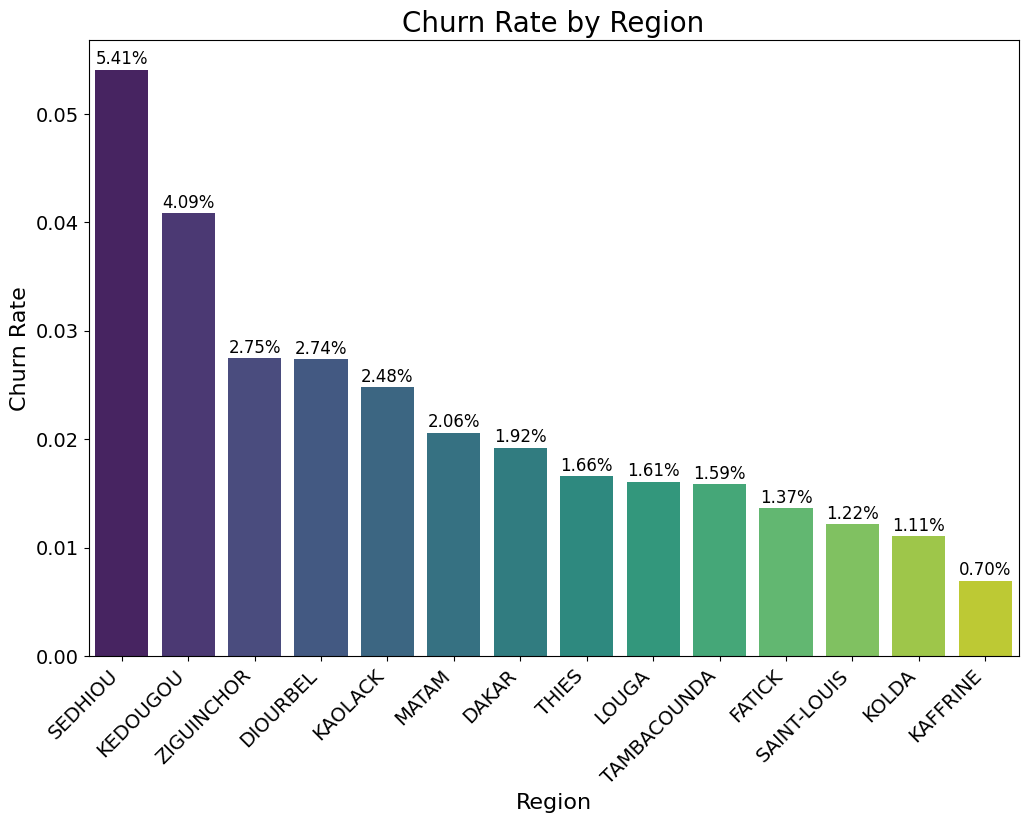

In [50]:
# Calculate churn rate by region
region_churn = df_train_eda.groupby('REGION')['CHURN_NUM'].mean().reset_index()

# Sort regions by churn rate
region_churn = region_churn.sort_values(by='CHURN_NUM', ascending=False)

# Plotting the churn rate across regions
plt.figure(figsize=(12, 8))

# Use the viridis colormap and create a palette with the same number of colors as regions
palette = sns.color_palette("viridis", n_colors=len(region_churn))

# Plot the data
ax = sns.barplot(x='REGION', y='CHURN_NUM', data=region_churn, palette=palette)

# Calculate the percentage for each bar and add as label
total = len(df_train_eda)
for container in plt.gca().containers:
    labels = [f'{h.get_height() * 100:.2f}%' if h.get_height() > 0 else '' for h in container]
    plt.gca().bar_label(container, labels=labels, padding=1, fontsize=12, color='black')

# Customise the plot
plt.title('Churn Rate by Region', fontsize=20)
plt.xlabel('Region', fontsize=16)
plt.ylabel('Churn Rate', fontsize=16)
plt.xticks(rotation=45, fontsize=14, ha='right')
plt.yticks(fontsize=14)
plt.show()

##### 3. How does user engagement vary with churn across different regions?
   - **Purpose:** To investigate regional variations in overall user engagement by analyzing key metrics such as call activities, refill frequency, data volume, top pack activations, and regularity (activity consistency over 90 days). This analysis aims to assess how these engagement behaviors correlate with customer churn across different regions.

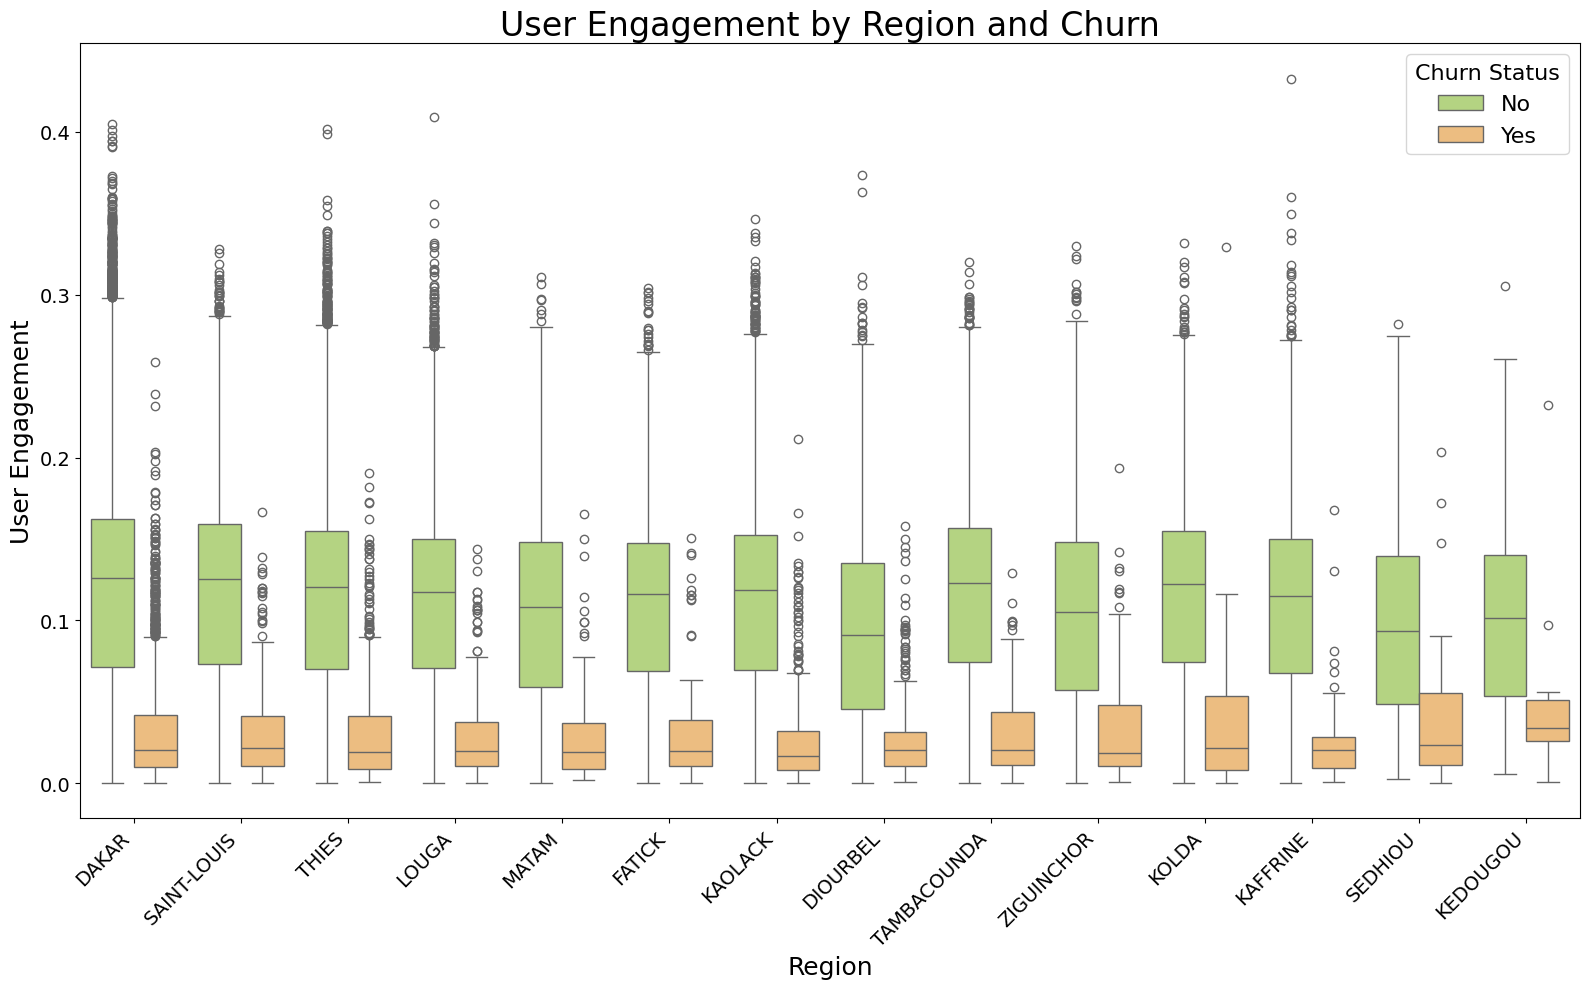

In [51]:
# Create a figure for the engagement score
fig, ax = plt.subplots(figsize=(16, 10))

# Define the color palette using a subset of the RdYlGn colormap
RdYlGn = sns.color_palette("RdYlGn_r", n_colors=2)

# Plot the engagement score by region and churn
sns.boxplot(x='REGION', y='ENGAGEMENT_SCORE', hue='CHURN', data=df_train_eda, ax=ax, palette=RdYlGn)
ax.set_title('User Engagement by Region and Churn', fontsize=24)
ax.set_xlabel('Region', fontsize=18)
ax.set_ylabel('User Engagement', fontsize=18)
ax.legend(title='Churn Status', title_fontsize='16', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

##### 4. What is the distribution of top packages with customer churn?
   - **Purpose:** To analyze how different types of top packages are distributed across churn and non-churned customers. 

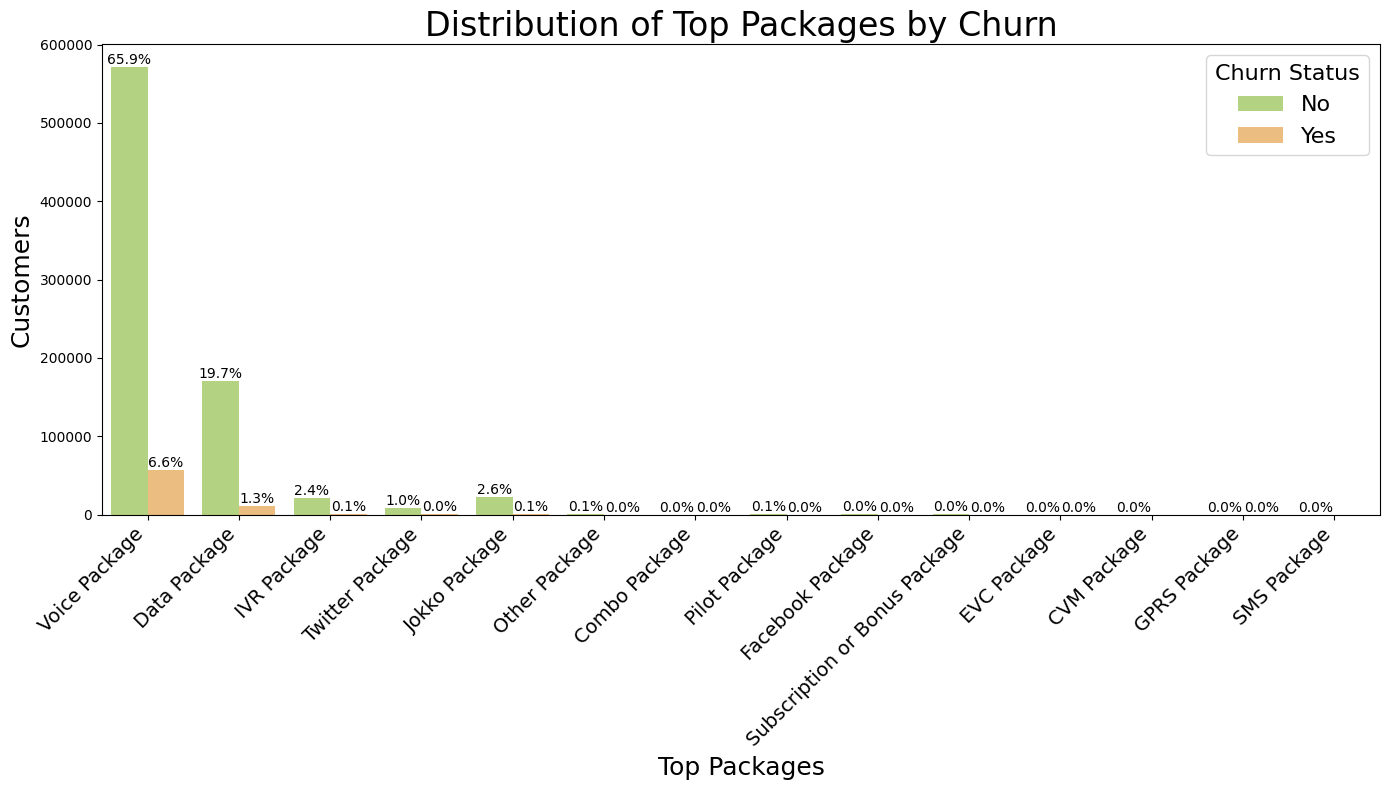

In [52]:
# Create a figure for the distribution of TOP_PACK vs CHURN
fig, ax = plt.subplots(figsize=(14, 8))

# Define the color palette using a subset of the RdYlGn colormap
RdYlGn = sns.color_palette("RdYlGn_r", n_colors=2)

# Plot the countplot for TOP_PACK vs CHURN
sns.countplot(data=df_train_eda, x='TOP_PACK', hue='CHURN', ax=ax, palette=RdYlGn)

# Customise the plot
ax.set_xlabel('Top Packages', fontsize=18)
ax.set_ylabel('Customers', fontsize=18)
ax.set_title('Distribution of Top Packages by Churn', fontsize=24)
ax.legend(title='Churn Status', title_fontsize='16', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=14)

# Calculate and add percentage labels to each bar
total_counts = len(df_train_eda)
for container in ax.containers:
    labels = [f'{h.get_height() / total_counts * 100:.1f}%' for h in container]
    ax.bar_label(container, labels=labels)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

##### 5. How does the activation of top packages relate to churn rates?
   - **Purpose:** To evaluate if frequent activation of top packages increases customer engagement, potentially reducing churn rates.

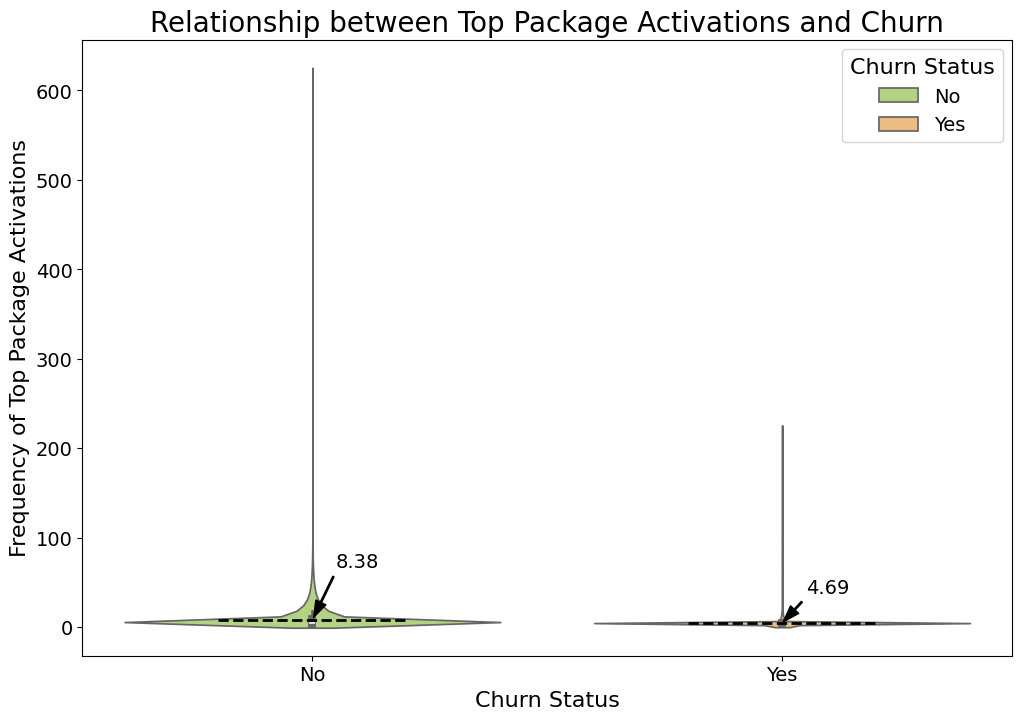

In [53]:
# Relationship between top pack activations and churn
plt.figure(figsize=(12, 8))

# Define the color palette
RdYlGn = sns.color_palette("RdYlGn_r", n_colors=2)

# Create the violin plot
sns.violinplot(x='CHURN', y='FREQ_TOP_PACK', data=df_train_eda, hue='CHURN', legend=True, palette=RdYlGn)

# Calculate the means for each churn status
means = df_train_eda.groupby('CHURN')['FREQ_TOP_PACK'].mean()

# Add horizontal lines and arrows indicating the mean within the violins
for i, mean in enumerate(means):
    # Add a dashed line for the mean
    plt.plot([i-0.2, i+0.2], [mean, mean], color='black', linestyle='--', lw=2)
    
    # Add an arrow to point to the mean
    plt.annotate(f'{mean:.2f}', xy=(i, mean), xytext=(i+0.05, mean * 8), 
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
                 ha='left', fontsize=14, color='black')

# Customise the plot
plt.title('Relationship between Top Package Activations and Churn', fontsize=20)
plt.xlabel('Churn Status', fontsize=16)
plt.ylabel('Frequency of Top Package Activations', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Churn Status', title_fontsize='16', fontsize=14)

# Display the plot
plt.show()

##### 6. How do different levels of call and data activity relate to customer churn?
  - **Purpose:** To evaluate if varying levels of call and data activity (categorized as Low, Medium, and High) are associated with higher or lower churn rates. 

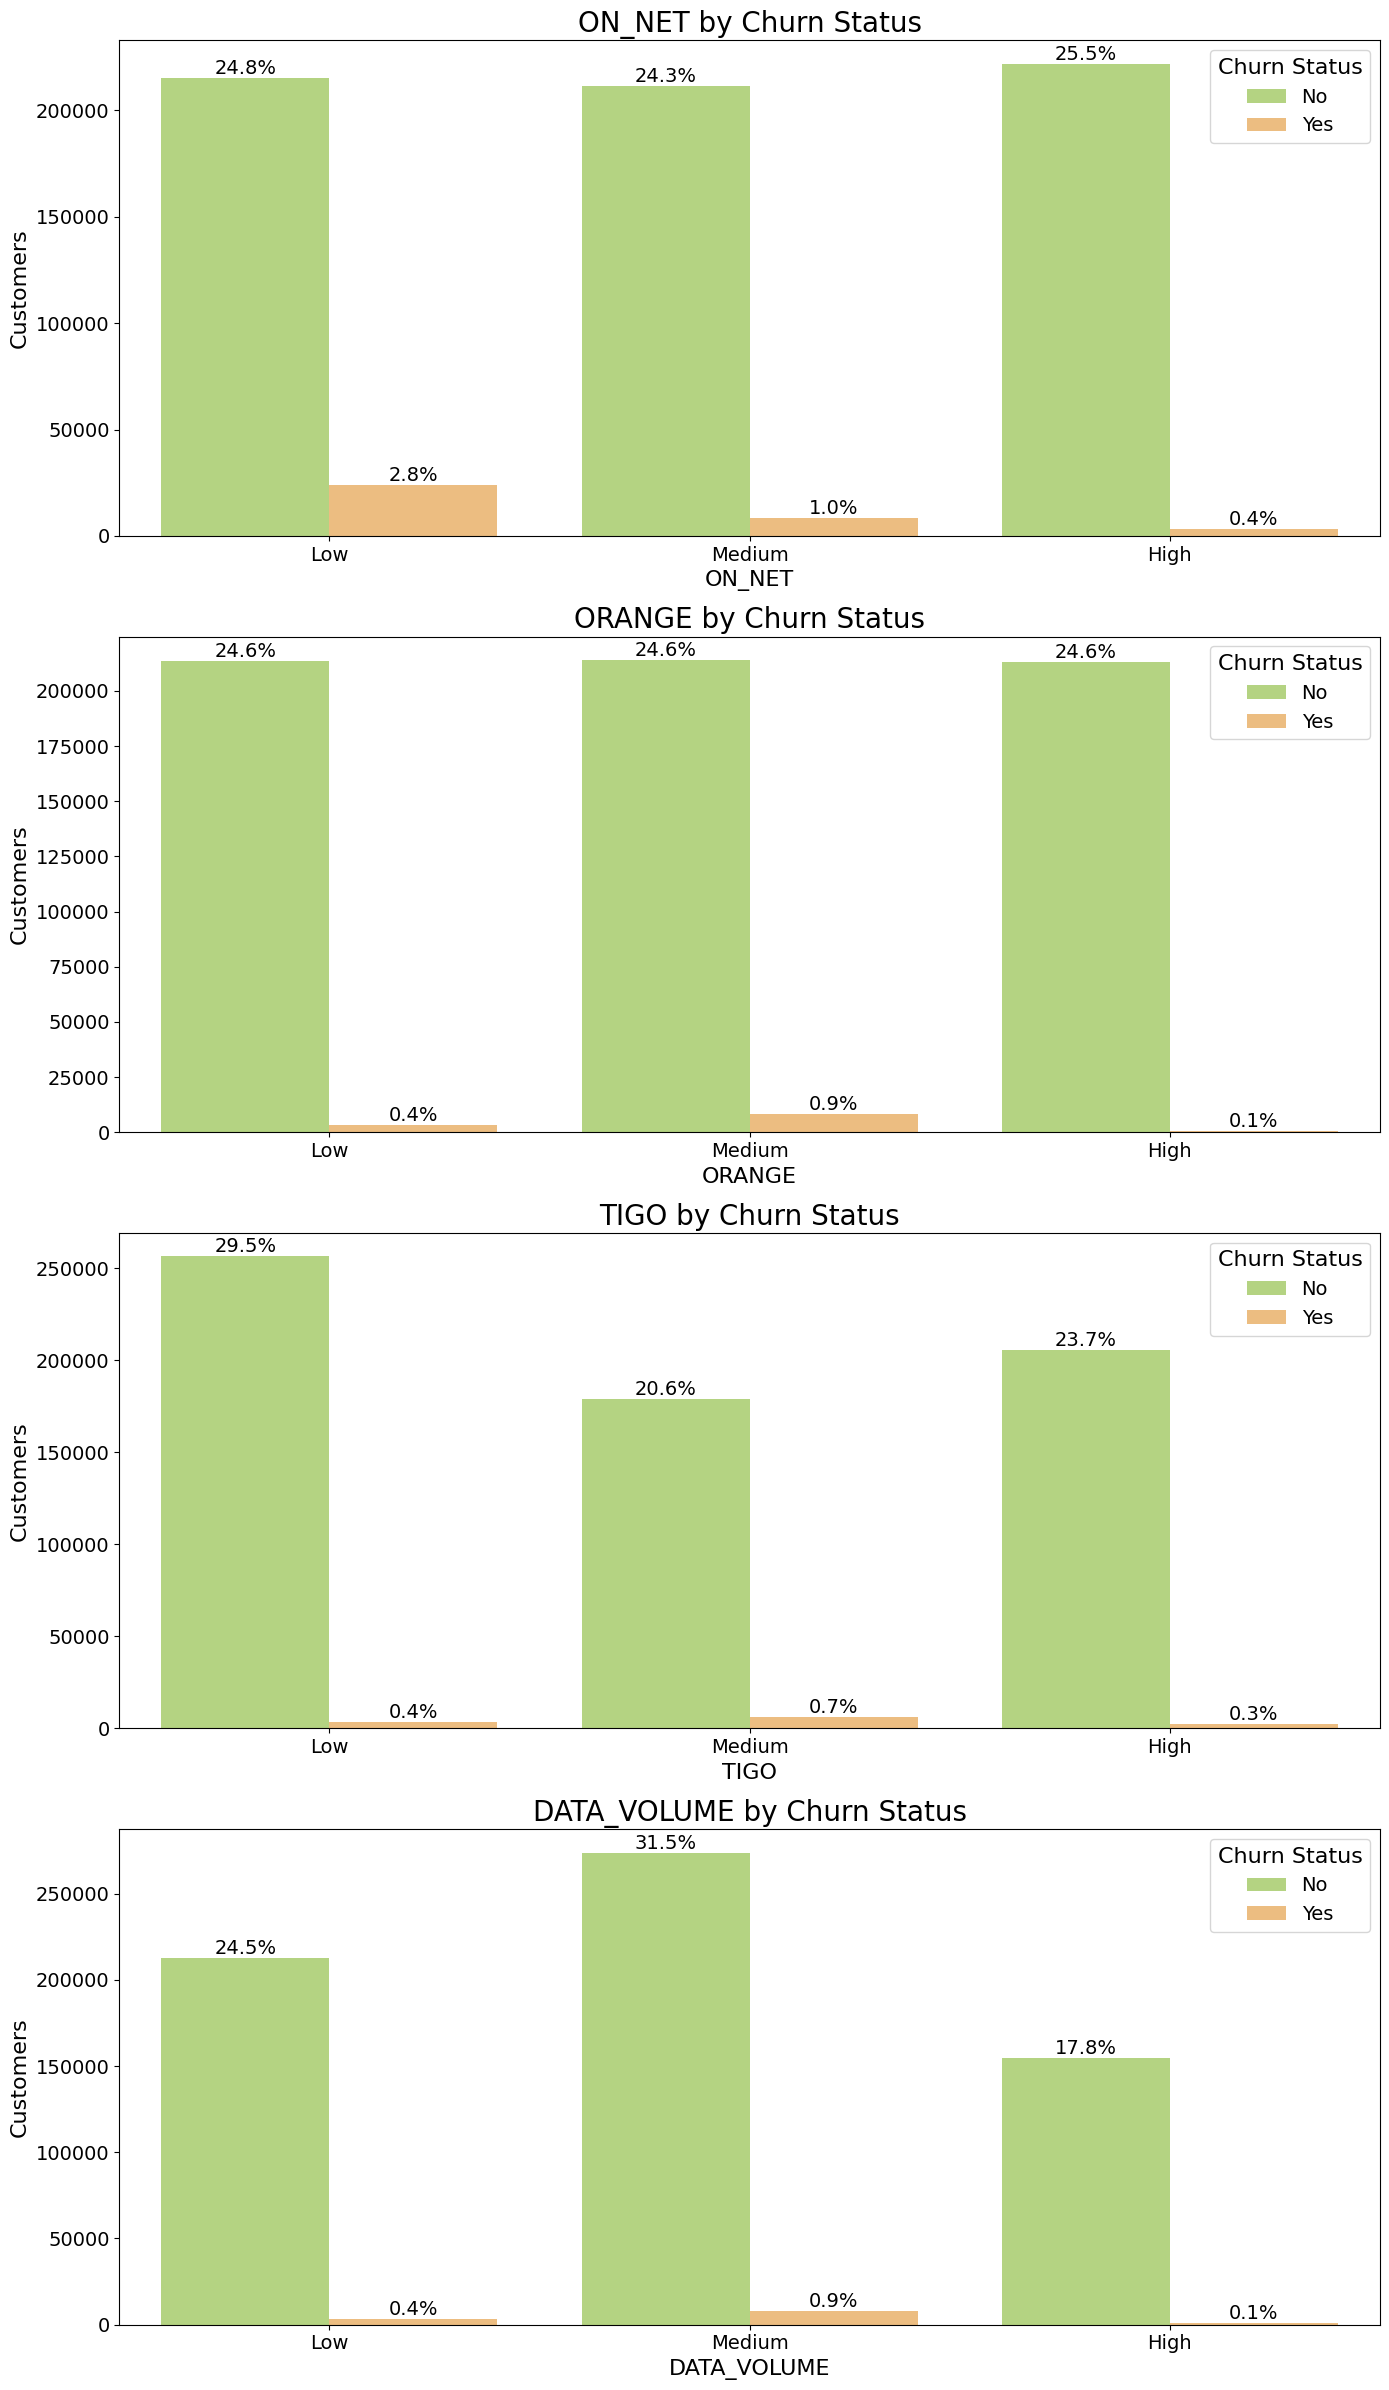

In [54]:
# List of numerical features related to call and data activities
numerical_features = ['ON_NET', 'ORANGE', 'TIGO', 'DATA_VOLUME']

# Define quantile thresholds
def categorize_feature(df, feature):
    # Calculate quantiles
    low_thresh = df[feature].quantile(0.33)
    high_thresh = df[feature].quantile(0.67)
    
    # Categorize based on quantiles
    df[f'{feature}_category'] = pd.cut(df[feature],
                                       bins=[-np.inf, low_thresh, high_thresh, np.inf],
                                       labels=['Low', 'Medium', 'High'])

# Apply categorization to all numerical features
for feature in numerical_features:
    categorize_feature(df_train_eda, feature)

# Create a figure for the distribution of call activities and data volume vs CHURN
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(14, 6 * len(numerical_features)))

# Define the color palette using a subset of the RdYlGn colormap
RdYlGn = sns.color_palette("RdYlGn_r", n_colors=2)

# Plot each categorized numerical feature
for ax, feature in zip(axes, numerical_features):
    sns.countplot(data=df_train_eda, x=f'{feature}_category', hue='CHURN', ax=ax, palette=RdYlGn)
    ax.set_xlabel(f'{feature}', fontsize=16)
    ax.set_ylabel('Customers', fontsize=16)
    ax.set_title(f'{feature} by Churn Status', fontsize=20)
    ax.legend(title='Churn Status', title_fontsize='16', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    # Calculate and add percentage labels to each bar
    total_counts = len(df_train_eda)
    for container in ax.containers:
        labels = [f'{h.get_height() / total_counts * 100:.1f}%' for h in container]
        ax.bar_label(container, labels=labels, fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

##### 7. How does customer tenure affect churn rates?
   - **Purpose:** To analyze whether longer-tenured customers exhibit different churn behavior, possibly indicating loyalty or disengagement over time.

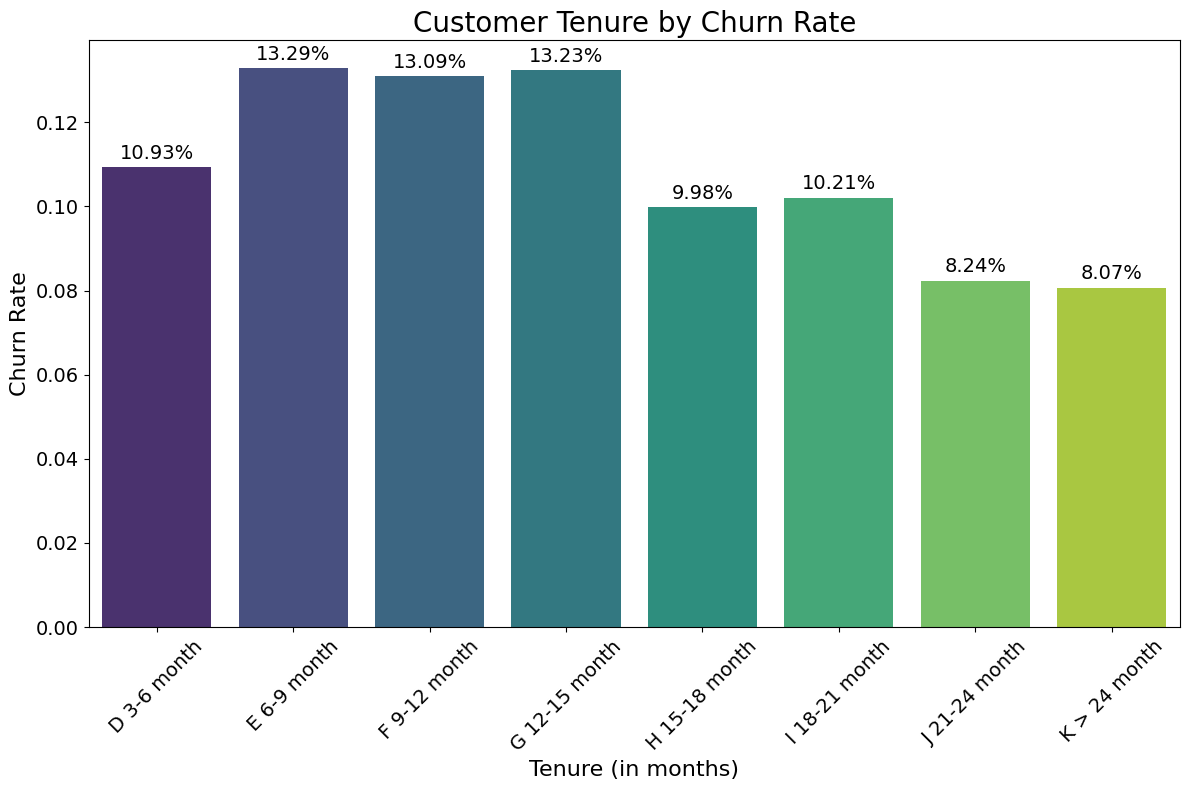

In [55]:
# Define the Viridis color palette
viridis_palette = sns.color_palette("viridis", n_colors=len(tenure_order))

# Create the bar plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='TENURE', y='CHURN_NUM', data=df_train_eda, palette=viridis_palette, order=tenure_order, ci=None)

# Customise the plot
plt.title('Customer Tenure by Churn Rate', fontsize=20)
plt.xlabel('Tenure (in months)', fontsize=16)
plt.ylabel('Churn Rate', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Add data labels as percentages
total = len(df_train_eda)
for container in plt.gca().containers:
    labels = [f'{h.get_height() * 100:.2f}%' if h.get_height() > 0 else '' for h in container]
    plt.gca().bar_label(container, labels=labels, padding=3, fontsize=14, color='black')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

##### 8. How do top-up amounts and monthly income relate to customer churn rates?
  - **Purpose:** To understand whether variations in top-up amounts and monthly income are associated with higher or lower churn rates.

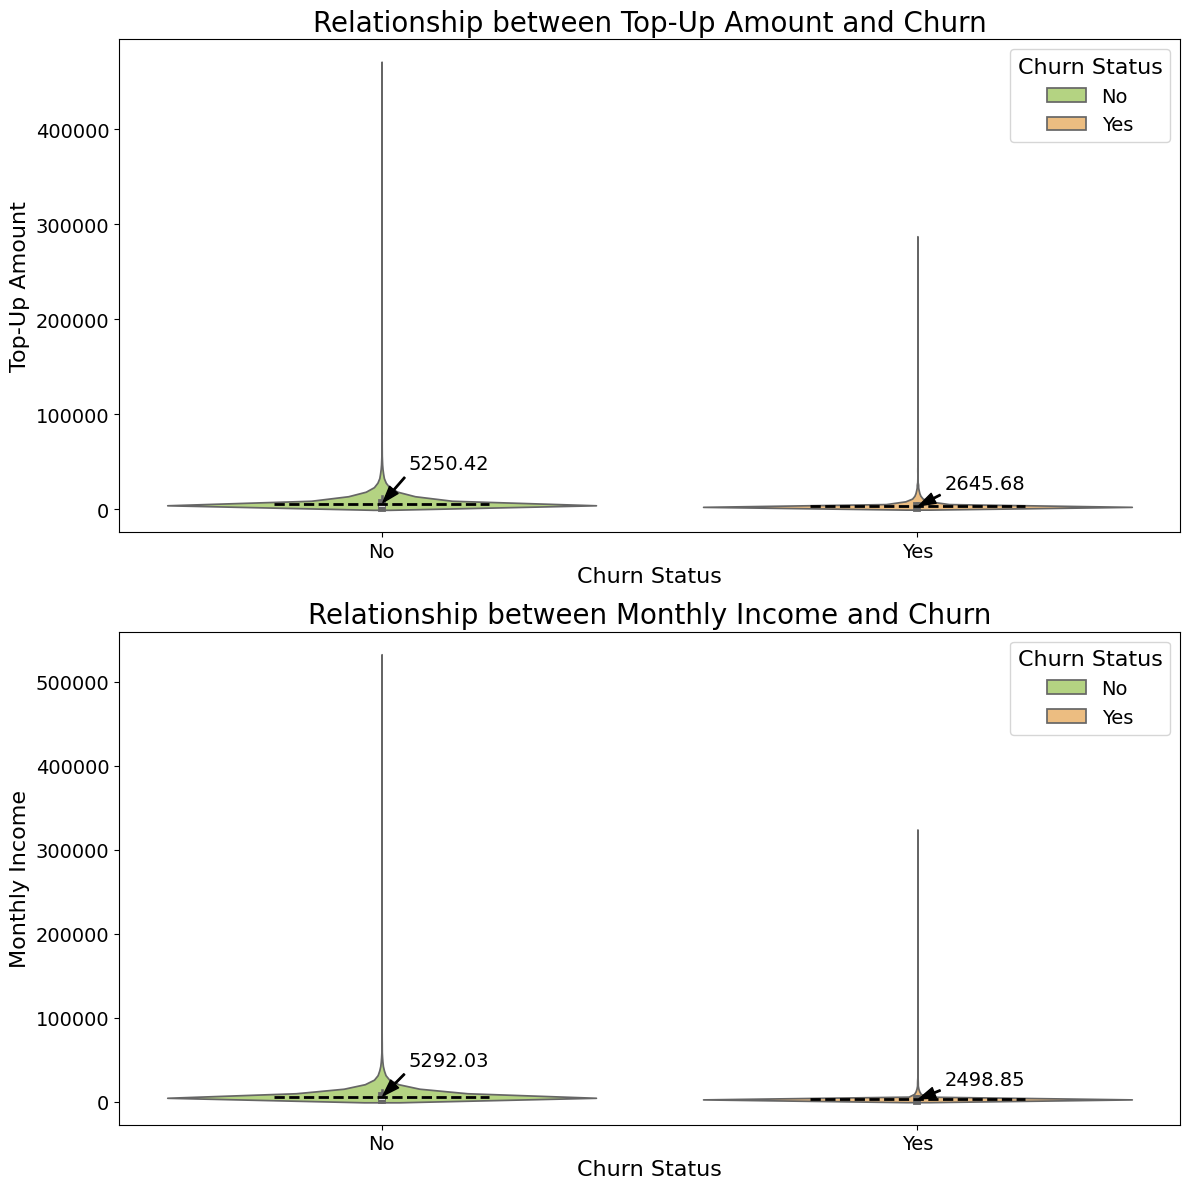

In [56]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Define the color palette using a subset of the RdYlGn colormap
RdYlGn = sns.color_palette("RdYlGn_r", n_colors=2)

# Plot for Top-Up Amount and Churn
sns.violinplot(x='CHURN', y='MONTANT', data=df_train_eda, ax=axes[0], palette=RdYlGn, hue='CHURN', legend=True)
axes[0].set_title('Relationship between Top-Up Amount and Churn', fontsize=20)
axes[0].set_xlabel('Churn Status', fontsize=16)
axes[0].set_ylabel('Top-Up Amount', fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)  

# Calculate the means for Top-Up Amount and Churn
topup_means = df_train_eda.groupby('CHURN')['MONTANT'].mean()

# Add horizontal lines and arrows indicating the mean for Top-Up Amount
for i, mean in enumerate(topup_means):
    axes[0].plot([i-0.2, i+0.2], [mean, mean], color='black', linestyle='--', lw=2)
    axes[0].annotate(f'{mean:.2f}', xy=(i, mean), xytext=(i+0.05, mean*8), 
                     arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
                     ha='left', fontsize=14, color='black')

# Plot for Monthly Income and Churn
sns.violinplot(x='CHURN', y='REVENUE', data=df_train_eda, ax=axes[1], palette=RdYlGn, hue='CHURN', legend=True)
axes[1].set_title('Relationship between Monthly Income and Churn', fontsize=20)
axes[1].set_xlabel('Churn Status', fontsize=16)
axes[1].set_ylabel('Monthly Income', fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)  # Set fontsize for tick labels

# Calculate the means for Monthly Income and Churn
income_means = df_train_eda.groupby('CHURN')['REVENUE'].mean()

# Add horizontal lines and arrows indicating the mean for Monthly Income
for i, mean in enumerate(income_means):
    axes[1].plot([i-0.2, i+0.2], [mean, mean], color='black', linestyle='--', lw=2)
    axes[1].annotate(f'{mean:.2f}', xy=(i, mean), xytext=(i+0.05, mean*8), 
                     arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
                     ha='left', fontsize=14, color='black')

# Add a legend for Churn status in both plots
axes[0].legend(title='Churn Status', title_fontsize=16, fontsize=14)
axes[1].legend(title='Churn Status', title_fontsize=16, fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

##### 9. How does the top-up amount and monthly income vary across different tenures, and how does this variation relate to customer churn rates?
   - **Purpose:** The purpose of this analysis is to understand how customer behavior related to top-up amounts and monthly income changes as their tenure with the company progresses.

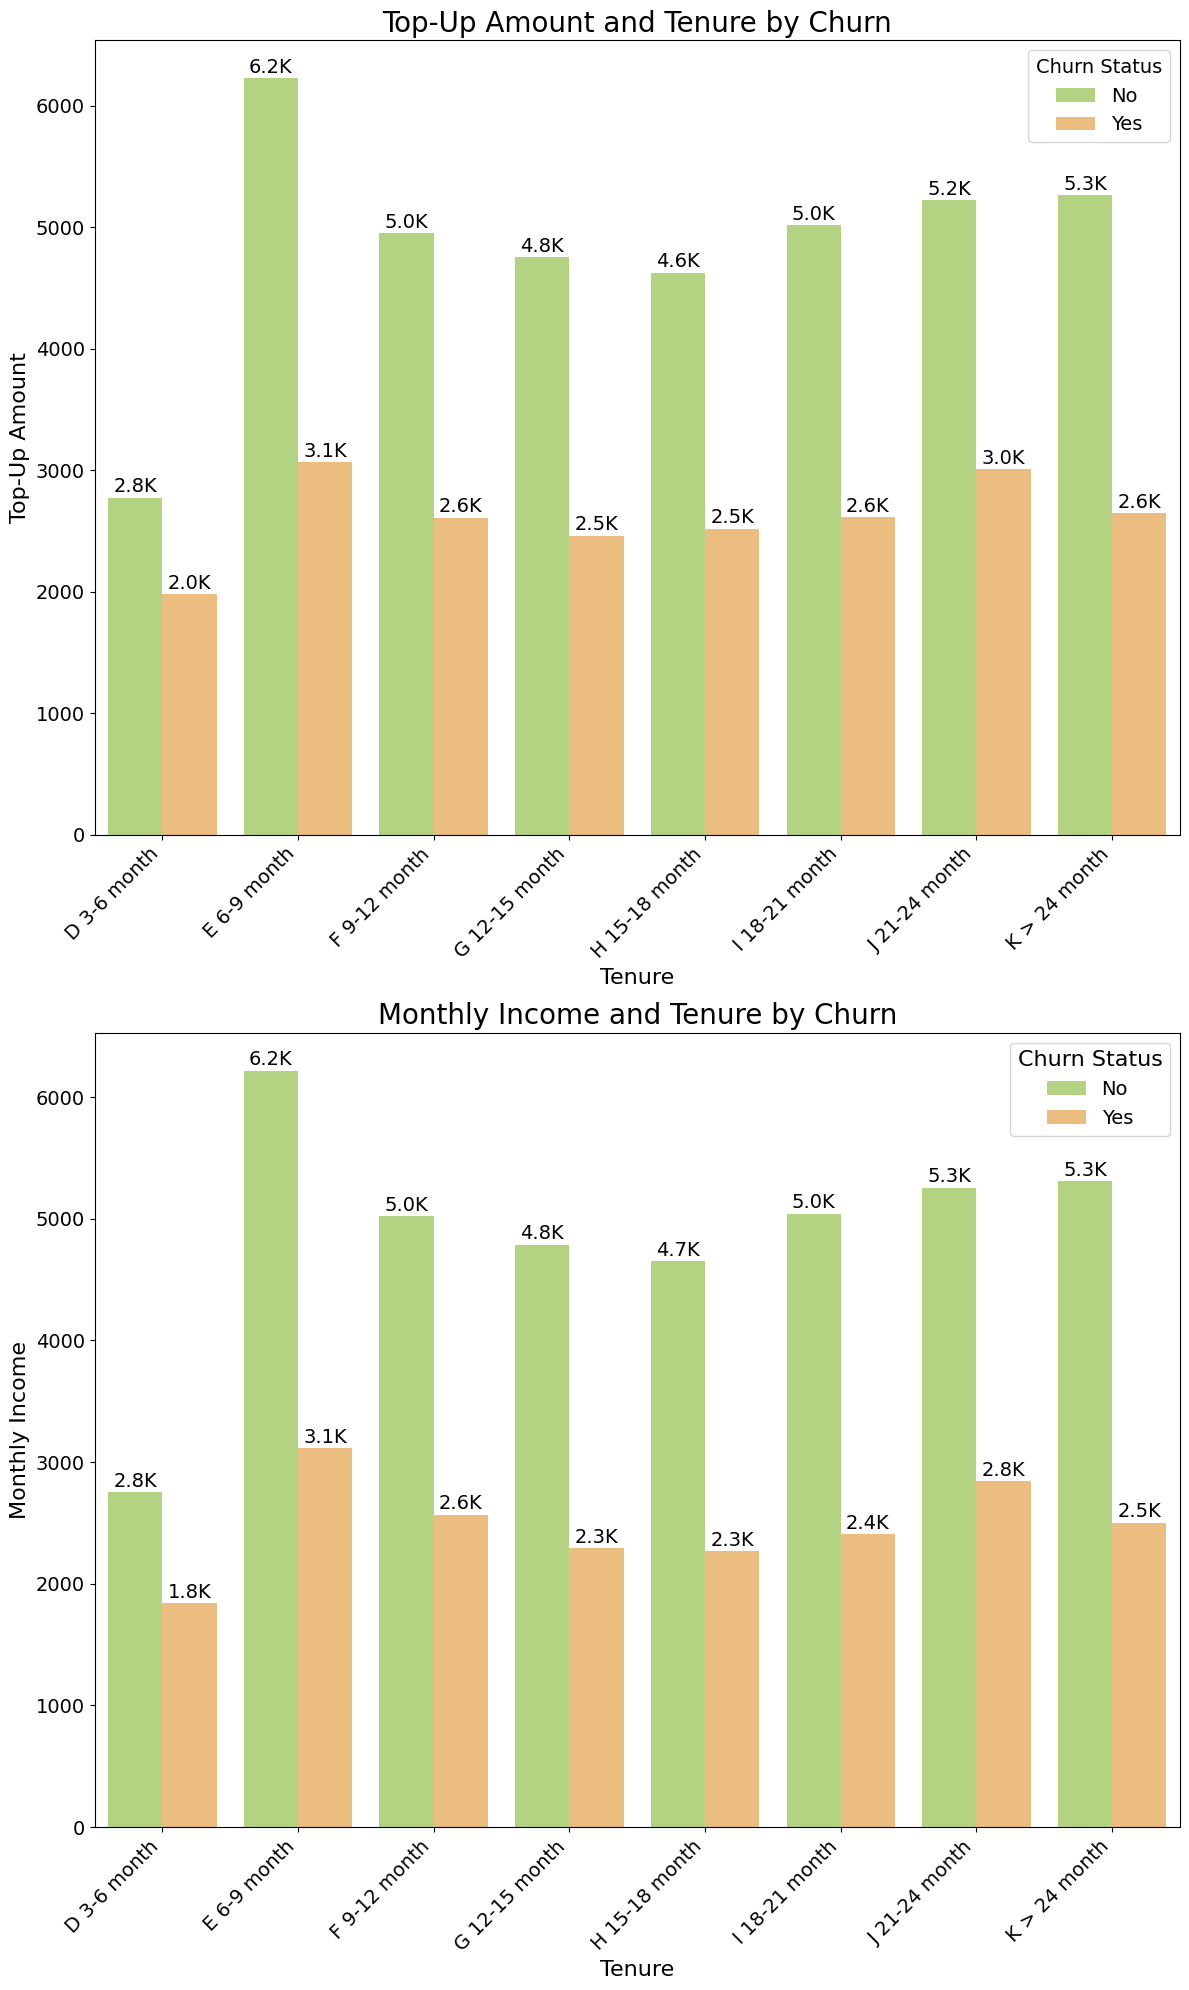

In [57]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 20))

# Define the color palette using a subset of the RdYlGn colormap
RdYlGn = sns.color_palette("RdYlGn_r", n_colors=2)

# Plot for Top-Up Amount and Tenure
sns.barplot(x='TENURE', y='MONTANT', hue='CHURN', data=df_train_eda, ax=axes[0], order=tenure_order, palette=RdYlGn, ci=None)
axes[0].set_title('Top-Up Amount and Tenure by Churn', fontsize=20)
axes[0].set_xlabel('Tenure', fontsize=16)
axes[0].set_ylabel('Top-Up Amount', fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)
axes[0].set_xticks(ticks=range(len(tenure_order)))
axes[0].set_xticklabels(labels=tenure_order, rotation=45, ha='right')
axes[0].legend(title='Churn Status', title_fontsize=14, fontsize=14)

# Plot for Monthly Income and Tenure
sns.barplot(x='TENURE', y='REVENUE', hue='CHURN', data=df_train_eda, ax=axes[1], order=tenure_order, palette=RdYlGn, ci=None)
axes[1].set_title('Monthly Income and Tenure by Churn', fontsize=20)
axes[1].set_xlabel('Tenure', fontsize=16)
axes[1].set_ylabel('Monthly Income', fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)
axes[1].set_xticks(ticks=range(len(tenure_order)))
axes[1].set_xticklabels(labels=tenure_order, rotation=45, ha='right')
axes[1].legend(title='Churn Status', title_fontsize=16, fontsize=14)

# Add data labels
for ax in axes:
    total = len(df_train_eda)
    for container in ax.containers:
        labels = [f'{h.get_height() / 1e3:.1f}K' if h.get_height() > 0 else '' for h in container]
        ax.bar_label(container, labels=labels, padding=1, fontsize=14, color='black')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

##### 10. What is the relationship between customer regularity and churn?
   - **Purpose:** To understand if customers with consistent activity over 90 days are less likely to churn, offering a measure of sustained engagement.

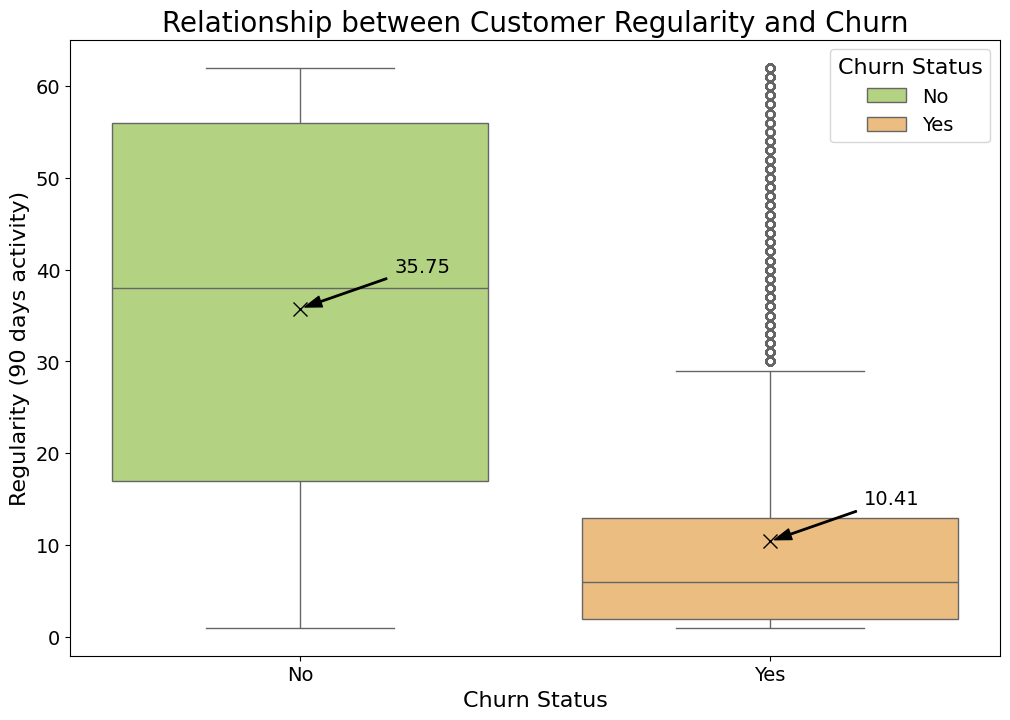

In [58]:
# Relationship between regularity and churn
plt.figure(figsize=(12, 8))

# Define the color palette
RdYlGn = sns.color_palette("RdYlGn_r", n_colors=2)

# Create the boxplot
sns.boxplot(x='CHURN', y='REGULARITY', data=df_train_eda, hue='CHURN', palette=RdYlGn, legend=True)

# Calculate the means for each churn status
means = df_train_eda.groupby('CHURN')['REGULARITY'].mean()

# Add markers and arrows indicating the mean within the boxplot
for i, mean in enumerate(means):
    # Add an 'x' marker for the mean
    plt.plot(i, mean, marker='x', color='black', markersize=10, label='_nolegend_')
    
    # Add an arrow to point to the mean
    plt.annotate(f'{mean:.2f}', xy=(i, mean), xytext=(i+0.2, mean + 4),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
                 ha='left', fontsize=14, color='black')

# Customise the plot
plt.title('Relationship between Customer Regularity and Churn', fontsize=20)
plt.xlabel('Churn Status', fontsize=16)
plt.ylabel('Regularity (90 days activity)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Churn Status', title_fontsize=16, fontsize=14)

# Display the plot
plt.show()

#### G. Hypothesis:

**A. Null Hypothesis (H<sub>0</sub>):**
There is no statistically significant relationship between churn rate and days_since_last_activity, implying that the length of time since the last customer activity does not impact the likelihood of churn.

**B. Alternative Hypothesis (H<sub>1</sub>):**
There is a statistically significant relationship between churn rate and days_since_last_activity, suggesting that the length of time since the last customer activity is associated with the likelihood of churn.

##### Independent T-Test

Independent T-Test Results
______________________________
T-statistic: 209.57801248159524
P-value: 0.0

Reject the null hypothesis: 
    There is a statistically significant difference between churned and non-churned customers' days since last activity.


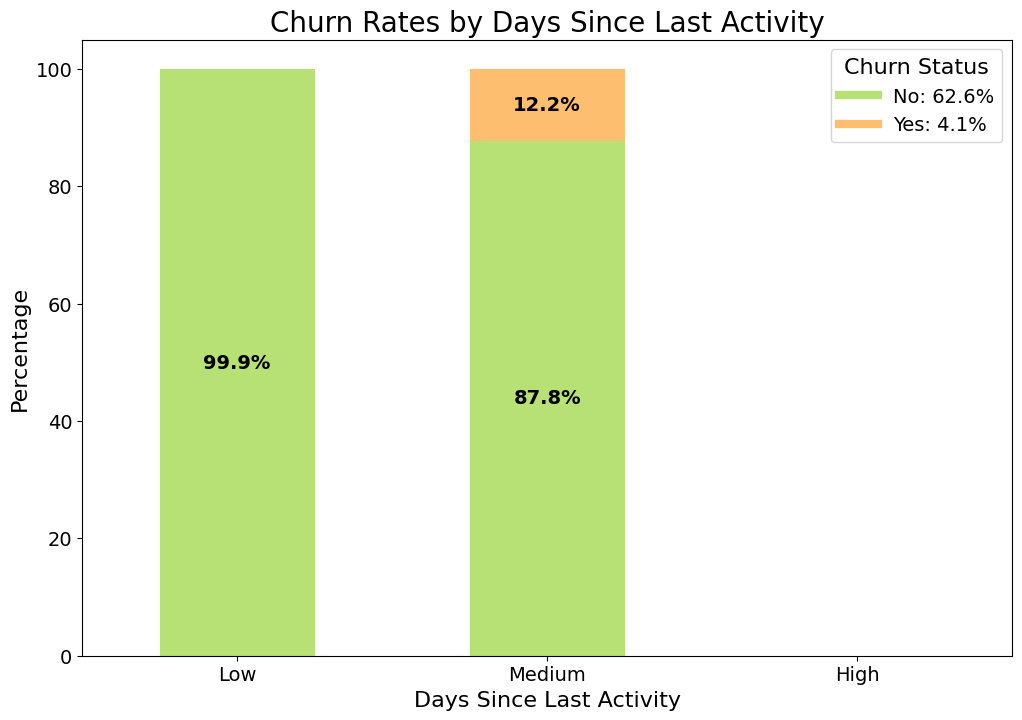

CHURN                                     No        Yes
DAYS_SINCE_LAST_ACTIVITY_category                      
Low                                99.939257   0.060743
Medium                             87.805608  12.194392
High                                0.000000   0.000000

In [59]:
# Split data into churned and non-churned groups
churned = df_train_eda[df_train_eda['CHURN_NUM'] == 1]['DAYS_SINCE_LAST_ACTIVITY']
non_churned = df_train_eda[df_train_eda['CHURN_NUM'] == 0]['DAYS_SINCE_LAST_ACTIVITY']

# Perform t-test
t_stat, p_value = ttest_ind(churned, non_churned)

print("Independent T-Test Results")
print("_" * 30)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("""\nReject the null hypothesis: 
    There is a statistically significant difference between churned and non-churned customers' days since last activity.""")
else:
    print("""\nFail to reject the null hypothesis: 
    There is no statistically significant difference between churned and non-churned customers' days since last activity.""")

# Apply binning to 'DAYS_SINCE_LAST_ACTIVITY'
categorize_feature(df_train_eda, 'DAYS_SINCE_LAST_ACTIVITY')

# Group the data by 'DAYS_SINCE_LAST_ACTIVITY_category' and 'CHURN' and count occurrences
grouped_data = df_train_eda.groupby(['DAYS_SINCE_LAST_ACTIVITY_category', 'CHURN'])['CHURN'].count().rename('Count').reset_index()

# Calculate the percentage ratio of churn within each category
grouped_data['Percentage'] = grouped_data.groupby('DAYS_SINCE_LAST_ACTIVITY_category')['Count'].transform(lambda x: x / x.sum() * 100)

# Create a pivot table for easier plotting
pivot_data = grouped_data.pivot(index='DAYS_SINCE_LAST_ACTIVITY_category', columns='CHURN', values='Percentage').fillna(0)

# Reindex the pivot table columns to ensure the order is 'No', 'Yes'
desired_order = ['No', 'Yes']
pivot_data = pivot_data.reindex(columns=desired_order)

# Define the color palette
RdYlGn = sns.color_palette("RdYlGn_r", n_colors=2)

# Plot the stacked bar chart
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), color=RdYlGn)

# Add percentage labels on top of the bars
for i, (index, row) in enumerate(pivot_data.iterrows()):
    bottom = 0
    for label, height in row.items():
        if height > 0.1:
            percentage = height
            ax.text(i, bottom + height / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=14, color='black', weight='bold')
        bottom += height

# Create custom legend entries with information from pivot_data
legend_labels = [f'{status}: {pivot_data[status].mean():.1f}%' for status in pivot_data.columns]
handles = [plt.Line2D([0], [0], color=RdYlGn[i], lw=6) for i in range(len(legend_labels))]

# Customise the plot
plt.title('Churn Rates by Days Since Last Activity', fontsize=20)
plt.xlabel('Days Since Last Activity', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.legend(handles=handles, labels=legend_labels, title='Churn Status', title_fontsize=16, fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Display the pivot data
pivot_data

#### H. Feature Importance

##### Logistic Regression Test 

In [60]:
# Create a copy of the original DataFrame
df_train_lr = df_train_eda.copy()

# Identify columns containing 'category' or 'Category'
columns_to_drop = [col for col in df_train_lr.columns if 'category' in col.lower()]

# Drop the identified columns
df_train_lr = df_train_lr.drop(columns=columns_to_drop)

df_train_lr = df_train_lr.reset_index(drop=True)

# Define numerical and categorical columns
num_columns_lr = df_train_lr.select_dtypes(include=['number']).columns
cat_columns_lr = df_train_lr.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns
imputer_num = SimpleImputer(strategy='median')
df_train_lr[num_columns_lr] = imputer_num.fit_transform(df_train_lr[num_columns_lr])

# Impute missing values for categorical columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df_train_lr[cat_columns_lr] = imputer_cat.fit_transform(df_train_lr[cat_columns_lr])

# Check for any NaN values after imputation
if df_train_lr.isna().sum().sum() > 0:
    raise ValueError("DataFrame contains NaN values after imputation. Please check the imputation process.")

# Perform one-hot encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols  = encoder.fit_transform(df_train_lr[cat_columns_lr])

# Create a DataFrame with the encoded column names
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(cat_columns_lr))

# Drop the original categorical columns
df_train_lr = df_train_lr.drop(cat_columns_lr, axis=1)

# Concatenate the original DataFrame with the encoded DataFrame
df_train_lr = pd.concat([df_train_lr, encoded_df], axis=1)

# Define features and targets
X = df_train_lr.drop(columns=['CHURN_Yes', 'CHURN_NUM'])
y = df_train_lr['CHURN_NUM']

# Ensure the dataset is not empty and does not contain NaN values
if X.empty or y.empty:
    raise ValueError("The dataset is empty after preprocessing. Please check the data loading and preprocessing steps.")
if X.isna().sum().sum() > 0:
    raise ValueError("Feature matrix X contains NaN values. Please check the preprocessing steps.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for sufficient training samples
if X_train.shape[0] == 0:
    raise ValueError("The resulting train set is empty. Adjust the parameters or check the dataset.")

# Fit logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Get feature importances (coefficients)
feature_importances = pd.DataFrame({"Feature_Prefix": X_train.columns, "Coefficient": logreg.coef_[0]})
feature_importances["Feature"] = feature_importances["Feature_Prefix"].str.split("_").str[0]

# Group by Prefix and calculate mean Importance
grouped_importances = feature_importances.groupby("Feature")["Coefficient"].mean().abs().round(4).sort_values(ascending=False)

# Print selected Features using Logistic Regression Coefficients
print()
print("Top Five Features using Logistic Regression Coefficients:")
print()
print(grouped_importances.head())


Top Five Features using Logistic Regression Coefficients:

Feature
REGION        0.1116
ENGAGEMENT    0.0989
REGULARITY    0.0898
TENURE        0.0377
DAYS          0.0215
Name: Coefficient, dtype: float64


##### Multicolinearity

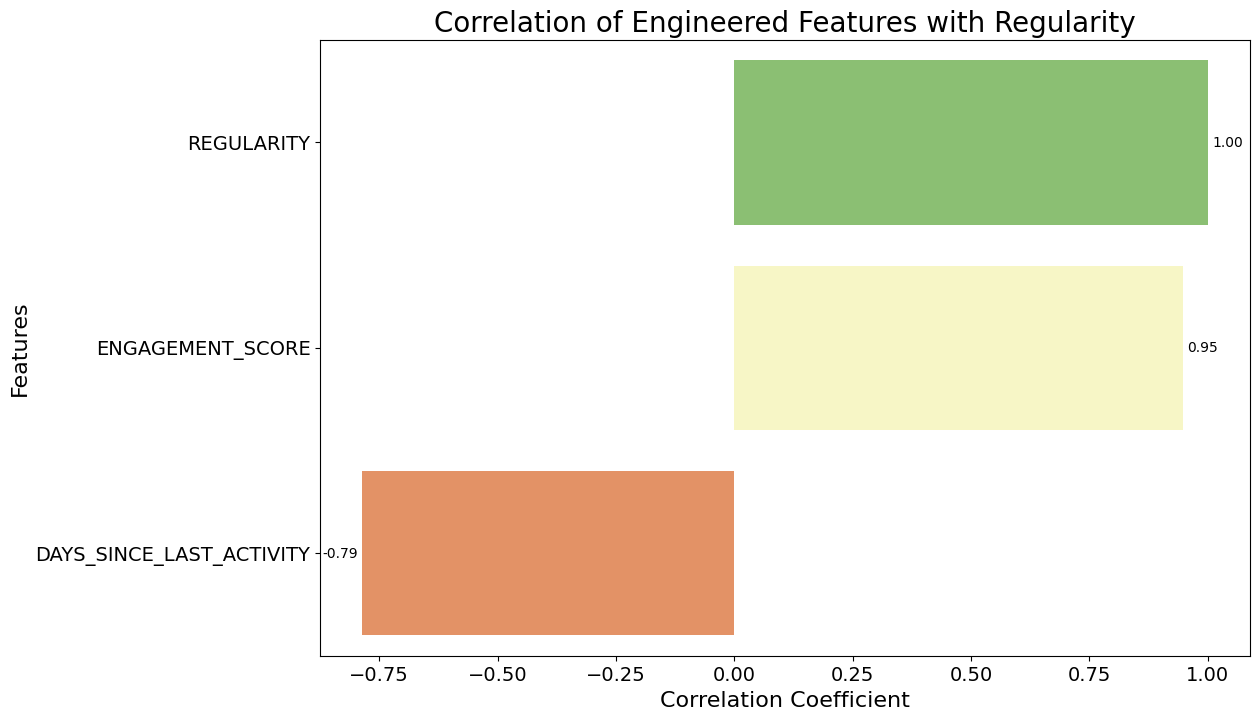

Feature  Correlation with Regularity
0                REGULARITY                     1.000000
1          ENGAGEMENT_SCORE                     0.948089
2  DAYS_SINCE_LAST_ACTIVITY                    -0.785453

In [61]:
# Regularity Correlation
activity_churn_indicators = ['ENGAGEMENT_SCORE', 'DAYS_SINCE_LAST_ACTIVITY']
correlation = df_train_eda[activity_churn_indicators + ['REGULARITY']].corr()
regularity_correlation = correlation['REGULARITY'].sort_values(ascending=False)

# Plot Regularity Correlation
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=regularity_correlation.values, y=regularity_correlation.index, palette='RdYlGn_r')

# Add data labels to the bars
for container in ax.containers:
    labels = [f'{value:.2f}' for value in container.datavalues]
    ax.bar_label(container, labels=labels, padding=3)

# Add labels and title
plt.title('Correlation of Engineered Features with Regularity', fontsize=20)
plt.xlabel('Correlation Coefficient', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.show()

# Display Regularity correlation
regularity_correlation_df = pd.DataFrame(regularity_correlation).reset_index()
regularity_correlation_df.columns = ['Feature', 'Correlation with Regularity']
regularity_correlation_df

<Figure size 1200x800 with 0 Axes>

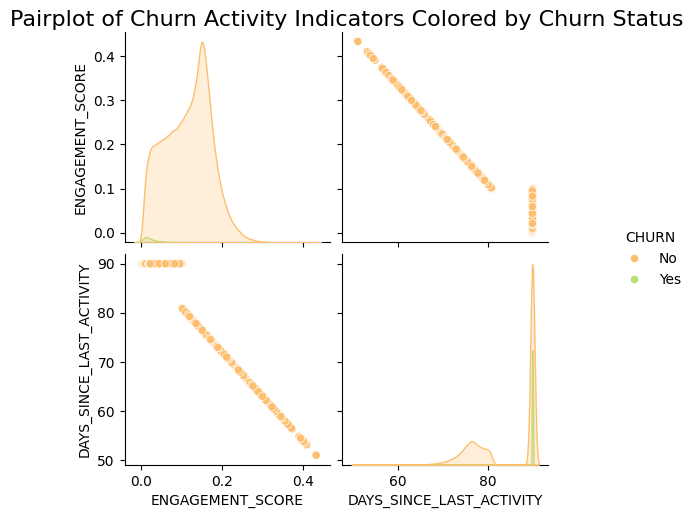

In [62]:
# Define the color palette
RdYlGn = sns.color_palette("RdYlGn_r", n_colors=2)

# Create a pairplot of the selected numerical features colored by the 'Churn' variable
plt.figure(figsize=(12, 8))
sns.pairplot(df_train_eda[activity_churn_indicators + ['CHURN']], hue='CHURN', palette='RdYlGn')

# Set a descriptive title for the plot
plt.suptitle('Pairplot of Churn Activity Indicators Colored by Churn Status', fontsize=16, y=1.02)

# Display the plot
plt.show()

`Comment`

- **High Correlation**: `REGULARITY` has a high correlation (0.948) with `ENGAGEMENT_SCORE`, indicating that `ENGAGEMENT_SCORE` primarily reflects `REGULARITY`. Additionally, `REGULARITY` is negatively correlated with `DAYS_SINCE_LAST_ACTIVITY`, suggesting redundancy.

- **Simplicity**: `REGULARITY` is a straightforward, directly measured feature, making it simpler and less prone to noise compared to derived features.

- **Redundancy**: Since `ENGAGEMENT_SCORE` and `DAYS_SINCE_LAST_ACTIVITY` incorporate information already captured by `REGULARITY`, including them may introduce redundancy.

- **Empirical Validation**: Model comparisons might be considered to confirm whether `REGULARITY` alone performs as well as or better than models with engineered features. This can further validate the decision to drop them.

#### Key Insights

In [63]:
# Identify columns containing 'category' or 'Category'
columns_to_drop = [col for col in df_train_eda.columns if 'category' in col.lower()]

# Append additional columns to drop
columns_to_drop.extend(['MRG', 'TENURE_NUM', 'CHURN_NUM', 'ENGAGEMENT_SCORE', 'DAYS_SINCE_LAST_ACTIVITY'])

# Drop the identified columns
df_train_eda = df_train_eda.drop(columns=columns_to_drop)

# Display info of Dataframe to verify changes
df_train_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 868041 entries, 7ee9e11e342e27c70455960acc80d3f91c1286d1 to 28f56fd0d9f8d8647bb6c62e7a3f4f35f49f4d6f
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   REGION          652687 non-null  object 
 1   TENURE          868041 non-null  object 
 2   MONTANT         868041 non-null  float64
 3   FREQUENCE_RECH  868041 non-null  float64
 4   REVENUE         868041 non-null  float64
 5   ARPU_SEGMENT    868041 non-null  float64
 6   FREQUENCE       868041 non-null  float64
 7   DATA_VOLUME     652682 non-null  float64
 8   ON_NET          683850 non-null  float64
 9   ORANGE          652683 non-null  float64
 10  TIGO            652663 non-null  float64
 11  REGULARITY      868041 non-null  int64  
 12  TOP_PACK        868041 non-null  object 
 13  FREQ_TOP_PACK   868041 non-null  float64
 14  CHURN           868041 non-null  object 
dtypes: float64(10), int64(1), object(4

#### Exporting

In [64]:
# First, calculate the proportions of churn
churn_yes = df_train_eda[df_train_eda['CHURN'] == 'Yes']
churn_no = df_train_eda[df_train_eda['CHURN'] == 'No']

# Use stratified sampling to get 15000 records while maintaining the imbalance ratio
sample_size = 2500
yes_size = int((len(churn_yes) / len(df_train_eda)) * sample_size)
no_size = sample_size - yes_size

# Random sampling for 'Yes' and 'No' churn
sample_yes = churn_yes.sample(n=yes_size, random_state=42)
sample_no = churn_no.sample(n=no_size, random_state=42)

# Combine the samples
sampled_df = pd.concat([sample_yes, sample_no])

# Shuffle the sampled data
sampled_df = sampled_df.sample(frac=1, random_state=42)

# Display info of sample dataframe
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, b1cd2d468329d48f9708f1b8de3dc05281571ae9 to f7627e59e3c2f8fc1f6cd0cea3250fbc12de8e29
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REGION          1928 non-null   object 
 1   TENURE          2500 non-null   object 
 2   MONTANT         2500 non-null   float64
 3   FREQUENCE_RECH  2500 non-null   float64
 4   REVENUE         2500 non-null   float64
 5   ARPU_SEGMENT    2500 non-null   float64
 6   FREQUENCE       2500 non-null   float64
 7   DATA_VOLUME     1928 non-null   float64
 8   ON_NET          1999 non-null   float64
 9   ORANGE          1928 non-null   float64
 10  TIGO            1928 non-null   float64
 11  REGULARITY      2500 non-null   int64  
 12  TOP_PACK        2500 non-null   object 
 13  FREQ_TOP_PACK   2500 non-null   float64
 14  CHURN           2500 non-null   object 
dtypes: float64(10), int64(1), object(4)
memory usage: 312

In [65]:
# Verify if the original churn proportions have been maintained
sampled_df['CHURN'].value_counts()*(100/len(sampled_df))

CHURN
No     91.84
Yes     8.16
Name: count, dtype: float64

In [66]:
# Copy the Data Frame
df_sampled = sampled_df.copy()

# Define numerical and categorical columns
num_columns_sp = df_sampled.select_dtypes(include=['number']).columns
cat_columns_sp = df_sampled.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns
imputer_num = SimpleImputer(strategy='median')
df_sampled[num_columns_sp] = imputer_num.fit_transform(df_sampled[num_columns_sp])

# Impute missing values for categorical columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df_sampled[cat_columns_sp] = imputer_cat.fit_transform(df_sampled[cat_columns_sp])

# Display info of sample dataframe
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, b1cd2d468329d48f9708f1b8de3dc05281571ae9 to f7627e59e3c2f8fc1f6cd0cea3250fbc12de8e29
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REGION          2500 non-null   object 
 1   TENURE          2500 non-null   object 
 2   MONTANT         2500 non-null   float64
 3   FREQUENCE_RECH  2500 non-null   float64
 4   REVENUE         2500 non-null   float64
 5   ARPU_SEGMENT    2500 non-null   float64
 6   FREQUENCE       2500 non-null   float64
 7   DATA_VOLUME     2500 non-null   float64
 8   ON_NET          2500 non-null   float64
 9   ORANGE          2500 non-null   float64
 10  TIGO            2500 non-null   float64
 11  REGULARITY      2500 non-null   float64
 12  TOP_PACK        2500 non-null   object 
 13  FREQ_TOP_PACK   2500 non-null   float64
 14  CHURN           2500 non-null   object 
dtypes: float64(11), object(4)
memory usage: 312.5+ KB


In [67]:
# Determine the proportion of missing values
missing_percentage = (sampled_df.isnull().mean() * 100).round(2)

# Check for duplicated values
duplicate_count = sampled_df.duplicated(subset=None, keep=False).sum()

# Display Results
print("Proportion of missing values in sampled_df dataset:\n")
print(missing_percentage)
print("\nNumber of duplicated rows in sampled_df dataset:", duplicate_count)

Proportion of missing values in sampled_df dataset:

REGION            22.88
TENURE             0.00
MONTANT            0.00
FREQUENCE_RECH     0.00
REVENUE            0.00
ARPU_SEGMENT       0.00
FREQUENCE          0.00
DATA_VOLUME       22.88
ON_NET            20.04
ORANGE            22.88
TIGO              22.88
REGULARITY         0.00
TOP_PACK           0.00
FREQ_TOP_PACK      0.00
CHURN              0.00
dtype: float64

Number of duplicated rows in sampled_df dataset: 132


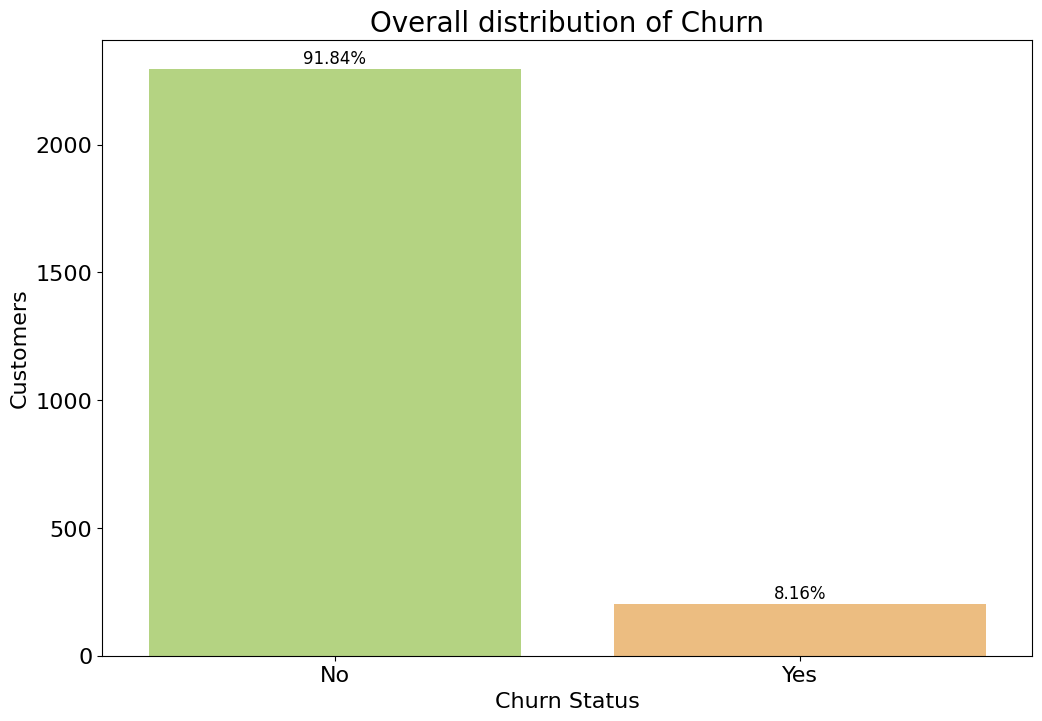

In [178]:
# Plot Churn distribution
plt.figure(figsize=(12,8))  
ax = sns.countplot(x=sampled_df[target[0]], palette='RdYlGn_r')  

# Add percentage labels on top of the bars
total = len(sampled_df)
for container in ax.containers:
    labels = [f'{(h.get_height()/total)*100:.2f}%' for h in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding=1, fontsize=12)

# Customise the plot
plt.title('Overall distribution of Churn', fontsize=20)
plt.xlabel('Churn Status', fontsize=16)
plt.ylabel('Customers', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Display plot
plt.show()

In [68]:
# # Save the sampled data to a CSV file
# output_file = '../data/CAP_dash_upload.csv'
# sampled_df.to_csv(output_file, index=True)

[Back to Top](#Table-of-Contents)

## Step 3: Data Preparation & Feature Engineering

`Split data set into X and y`

`Split data set into training and evaluation`

`Feature Engineering (Craeting New Features, (binning & bucketing), Handling Missing Data, Encoding, Standardization, Normalization, Scaling)`
- Create a pipeline to preprocess the data

- Separate inpute features into numeric and categorical for different pipelines

- Handle missing values using imputation Techniques Use sklearn.impute.SimpleImputer

- Scaling or normalize numeric features: Use sklearn.preprocessing.StandardScaler to scale the numerical features

- Encode categorical features: Use OneHotEncoder to encode categorical features

- Transformations for skewed data (log, power, custom, etc)
    
- Balance dataset (depending on what you see): Use sklearn.utils.resample to balance the dataset and or use Over-sampling/Under-sampling methods, more details here:       https://imbalanced-learn.org/stable/install.html

`Features Creation`

### Split Dataset into Input and Output (X, y)

In [69]:
# Copy df_train_eda
df_train_model = df_train_eda.copy()

# # Identify object columns to convert to category datatype
object_columns_to_convert = [col for col in df_train_model.select_dtypes(include=['object']).columns]
 
# # Convert object columns to category datatype
df_train_model[object_columns_to_convert] = df_train_model[object_columns_to_convert].astype('category')

# Display DataFrame information with deep memory usage
df_train_model.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 868041 entries, 7ee9e11e342e27c70455960acc80d3f91c1286d1 to 28f56fd0d9f8d8647bb6c62e7a3f4f35f49f4d6f
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   REGION          652687 non-null  category
 1   TENURE          868041 non-null  category
 2   MONTANT         868041 non-null  float64 
 3   FREQUENCE_RECH  868041 non-null  float64 
 4   REVENUE         868041 non-null  float64 
 5   ARPU_SEGMENT    868041 non-null  float64 
 6   FREQUENCE       868041 non-null  float64 
 7   DATA_VOLUME     652682 non-null  float64 
 8   ON_NET          683850 non-null  float64 
 9   ORANGE          652683 non-null  float64 
 10  TIGO            652663 non-null  float64 
 11  REGULARITY      868041 non-null  int64   
 12  TOP_PACK        868041 non-null  category
 13  FREQ_TOP_PACK   868041 non-null  float64 
 14  CHURN           868041 non-null  category
dtypes: category(4), f

In [74]:
# Copy df_train_eda
df_model_sample = sampled_df.copy()

# # Identify object columns to convert to category datatype
object_columns_to_convert = [col for col in df_model_sample.select_dtypes(include=['object']).columns]
 
# # Convert object columns to category datatype
df_model_sample[object_columns_to_convert] = df_model_sample[object_columns_to_convert].astype('category')

# Display DataFrame information with deep memory usage
df_model_sample.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, b1cd2d468329d48f9708f1b8de3dc05281571ae9 to f7627e59e3c2f8fc1f6cd0cea3250fbc12de8e29
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   REGION          1928 non-null   category
 1   TENURE          2500 non-null   category
 2   MONTANT         2500 non-null   float64 
 3   FREQUENCE_RECH  2500 non-null   float64 
 4   REVENUE         2500 non-null   float64 
 5   ARPU_SEGMENT    2500 non-null   float64 
 6   FREQUENCE       2500 non-null   float64 
 7   DATA_VOLUME     1928 non-null   float64 
 8   ON_NET          1999 non-null   float64 
 9   ORANGE          1928 non-null   float64 
 10  TIGO            1928 non-null   float64 
 11  REGULARITY      2500 non-null   int64   
 12  TOP_PACK        2500 non-null   category
 13  FREQ_TOP_PACK   2500 non-null   float64 
 14  CHURN           2500 non-null   category
dtypes: category(4), float64(10), int64(1

In [70]:
# View the unique values of the Churn column
df_train_model['CHURN'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [75]:
# View the unique values of the Churn column
df_model_sample['CHURN'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [71]:
df_train_model['CHURN'].value_counts()

CHURN
No     796946
Yes     71095
Name: count, dtype: int64

In [76]:
df_model_sample['CHURN'].value_counts()

CHURN
No     2296
Yes     204
Name: count, dtype: int64

In [72]:
df_majority = df_train_model[df_train_model['CHURN'] == 'No']
df_minority = df_train_model[df_train_model['CHURN'] == 'Yes']

df_minority_upsampled = resample(df_minority,
                                 replace=True,               
                                 n_samples=len(df_majority), 
                                 random_state=42)            

train_model_df = pd.concat([df_majority, df_minority_upsampled])

# Reset the index
train_model_df = train_model_df.reset_index(drop=True)

# Display new class counts
train_model_df['CHURN'].value_counts()

CHURN
No     796946
Yes    796946
Name: count, dtype: int64

In [77]:
df_majority = df_model_sample[df_model_sample['CHURN'] == 'No']
df_minority = df_model_sample[df_model_sample['CHURN'] == 'Yes']

df_minority_upsampled = resample(df_minority,
                                 replace=True,               
                                 n_samples=len(df_majority), 
                                 random_state=42)            

sample_model_df = pd.concat([df_majority, df_minority_upsampled])

# Reset the index
sample_model_df = sample_model_df.reset_index(drop=True)

# Display new class counts
sample_model_df['CHURN'].value_counts()

CHURN
No     2296
Yes    2296
Name: count, dtype: int64

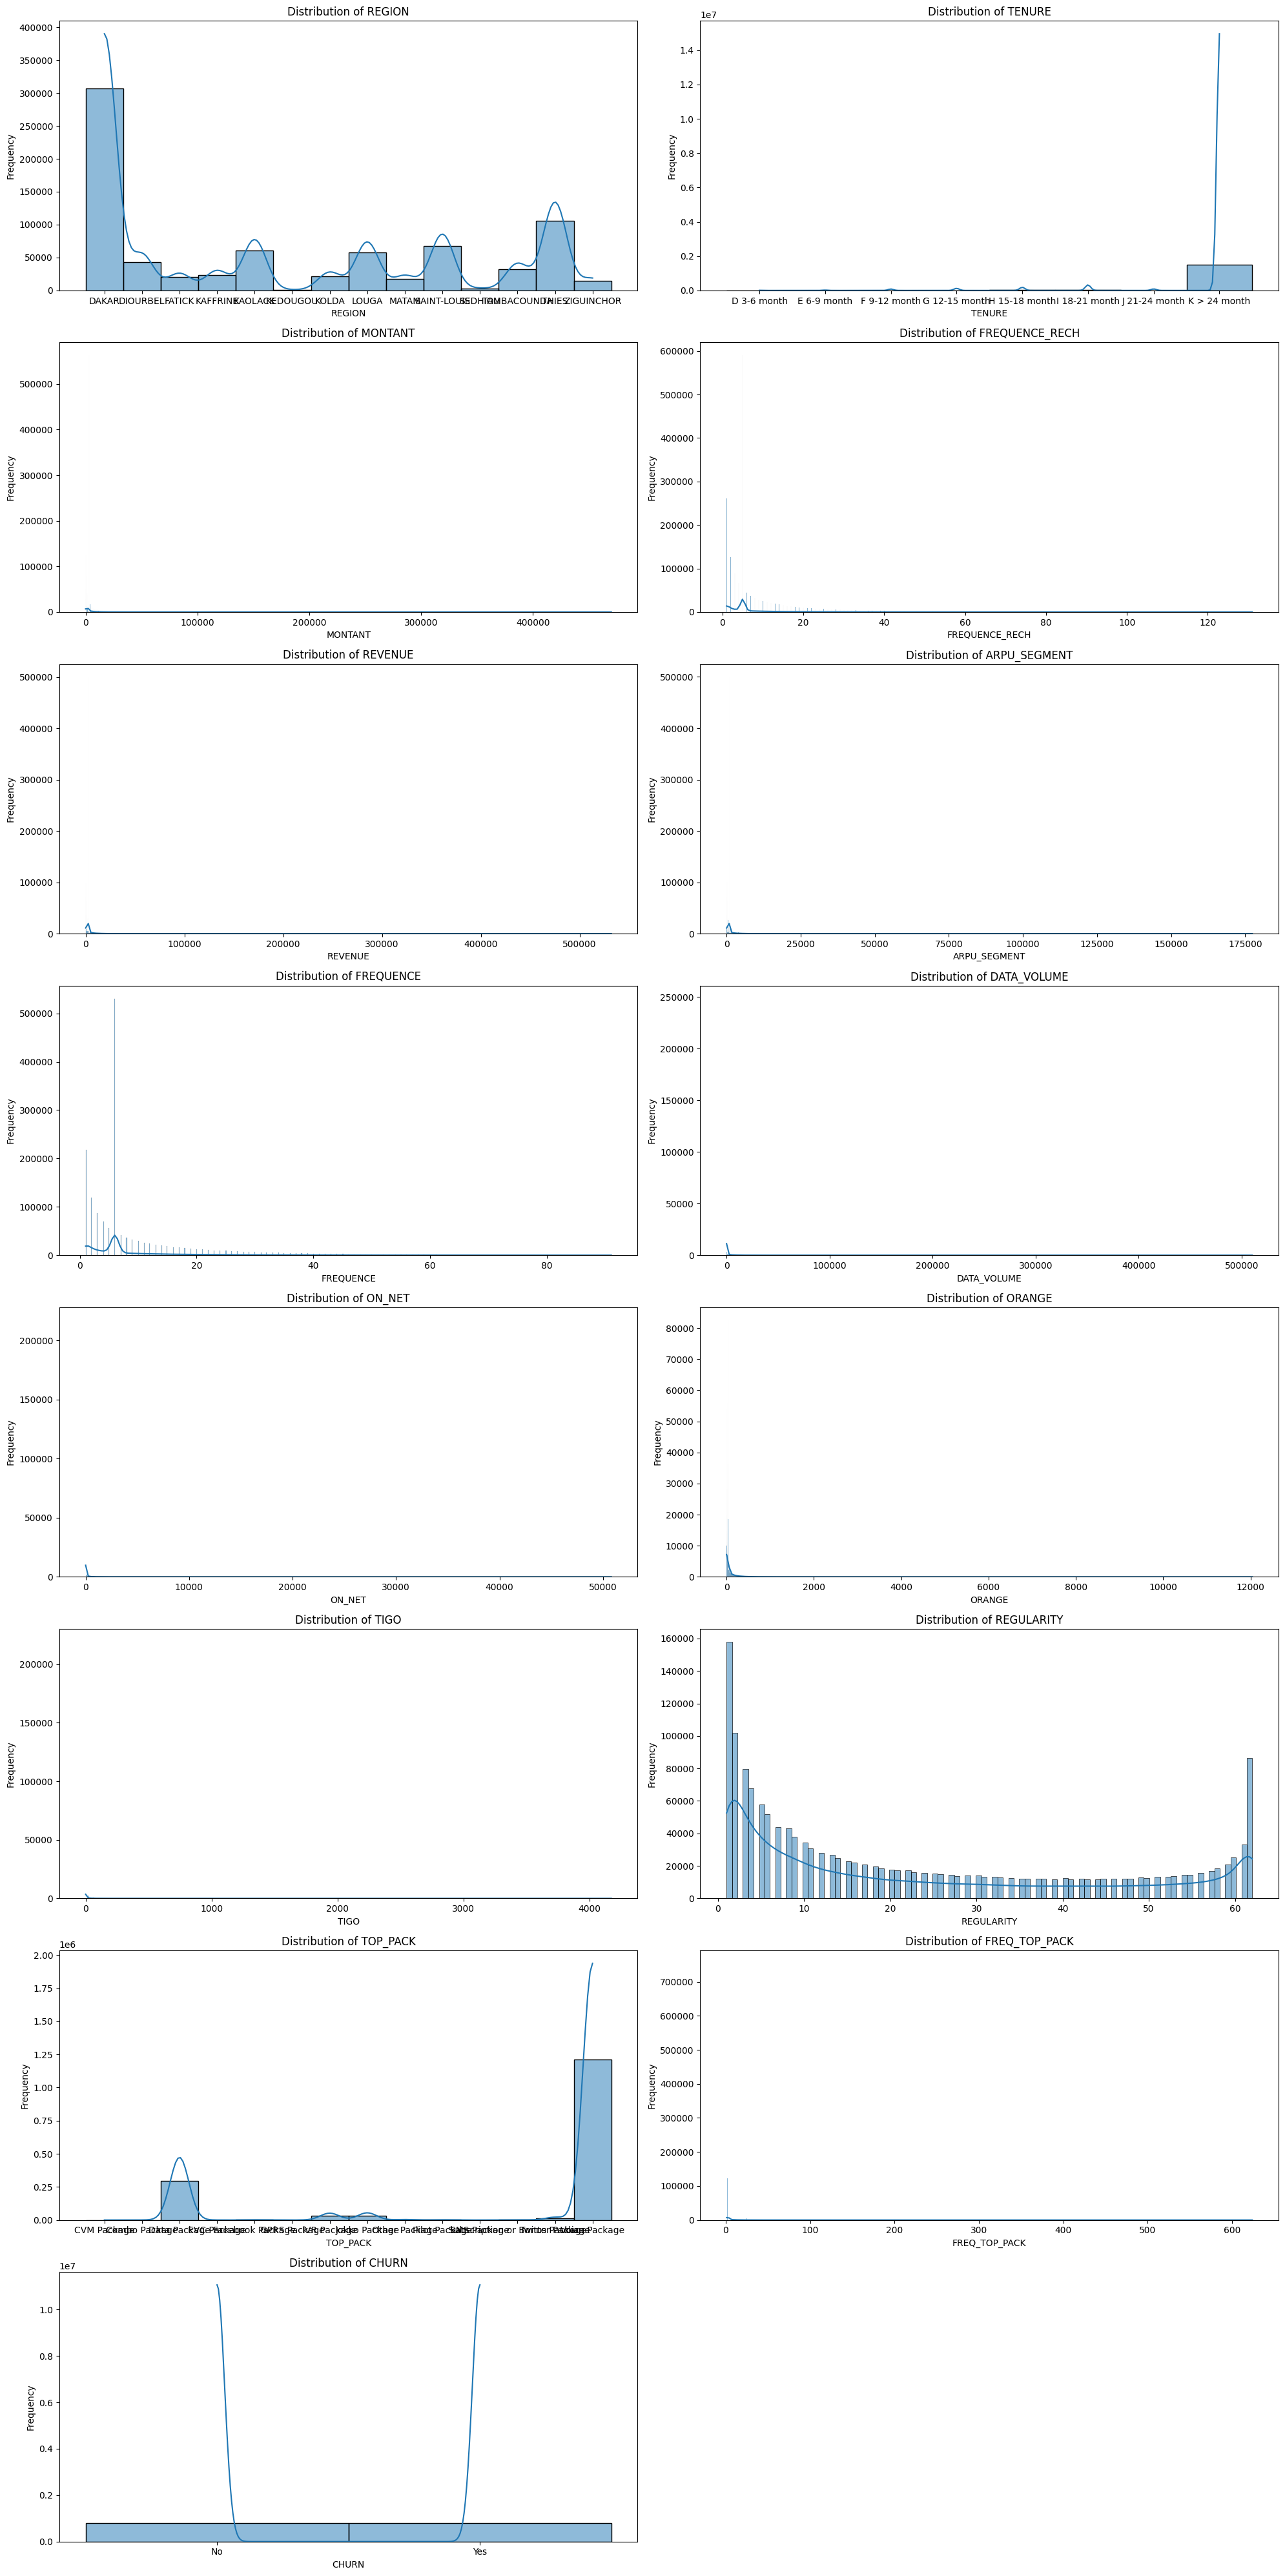

In [206]:
# Get the list of columns in train_model_df
columns = train_model_df.columns

# Determine the number of rows and columns for subplots
num_cols = len(columns)
num_rows = (num_cols + 1) // 2  # Adjust as needed for layout

# Create figure and axes
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5*num_rows))

# Flatten axes if necessary
axes = axes.flatten()

# Loop through columns and plot each one
for i, col in enumerate(columns):
    if train_model_df[col].dtype == 'object':
        # Categorical feature: Use value counts bar plot
        freq = train_model_df[col].value_counts()
        axes[i].bar(freq.index, freq.values)
        axes[i].set_title(f'Frequency of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

        # Force tick rotation using setp
        plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')

    else:
        # Numerical feature: Use histogram plot
        sns.histplot(train_model_df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

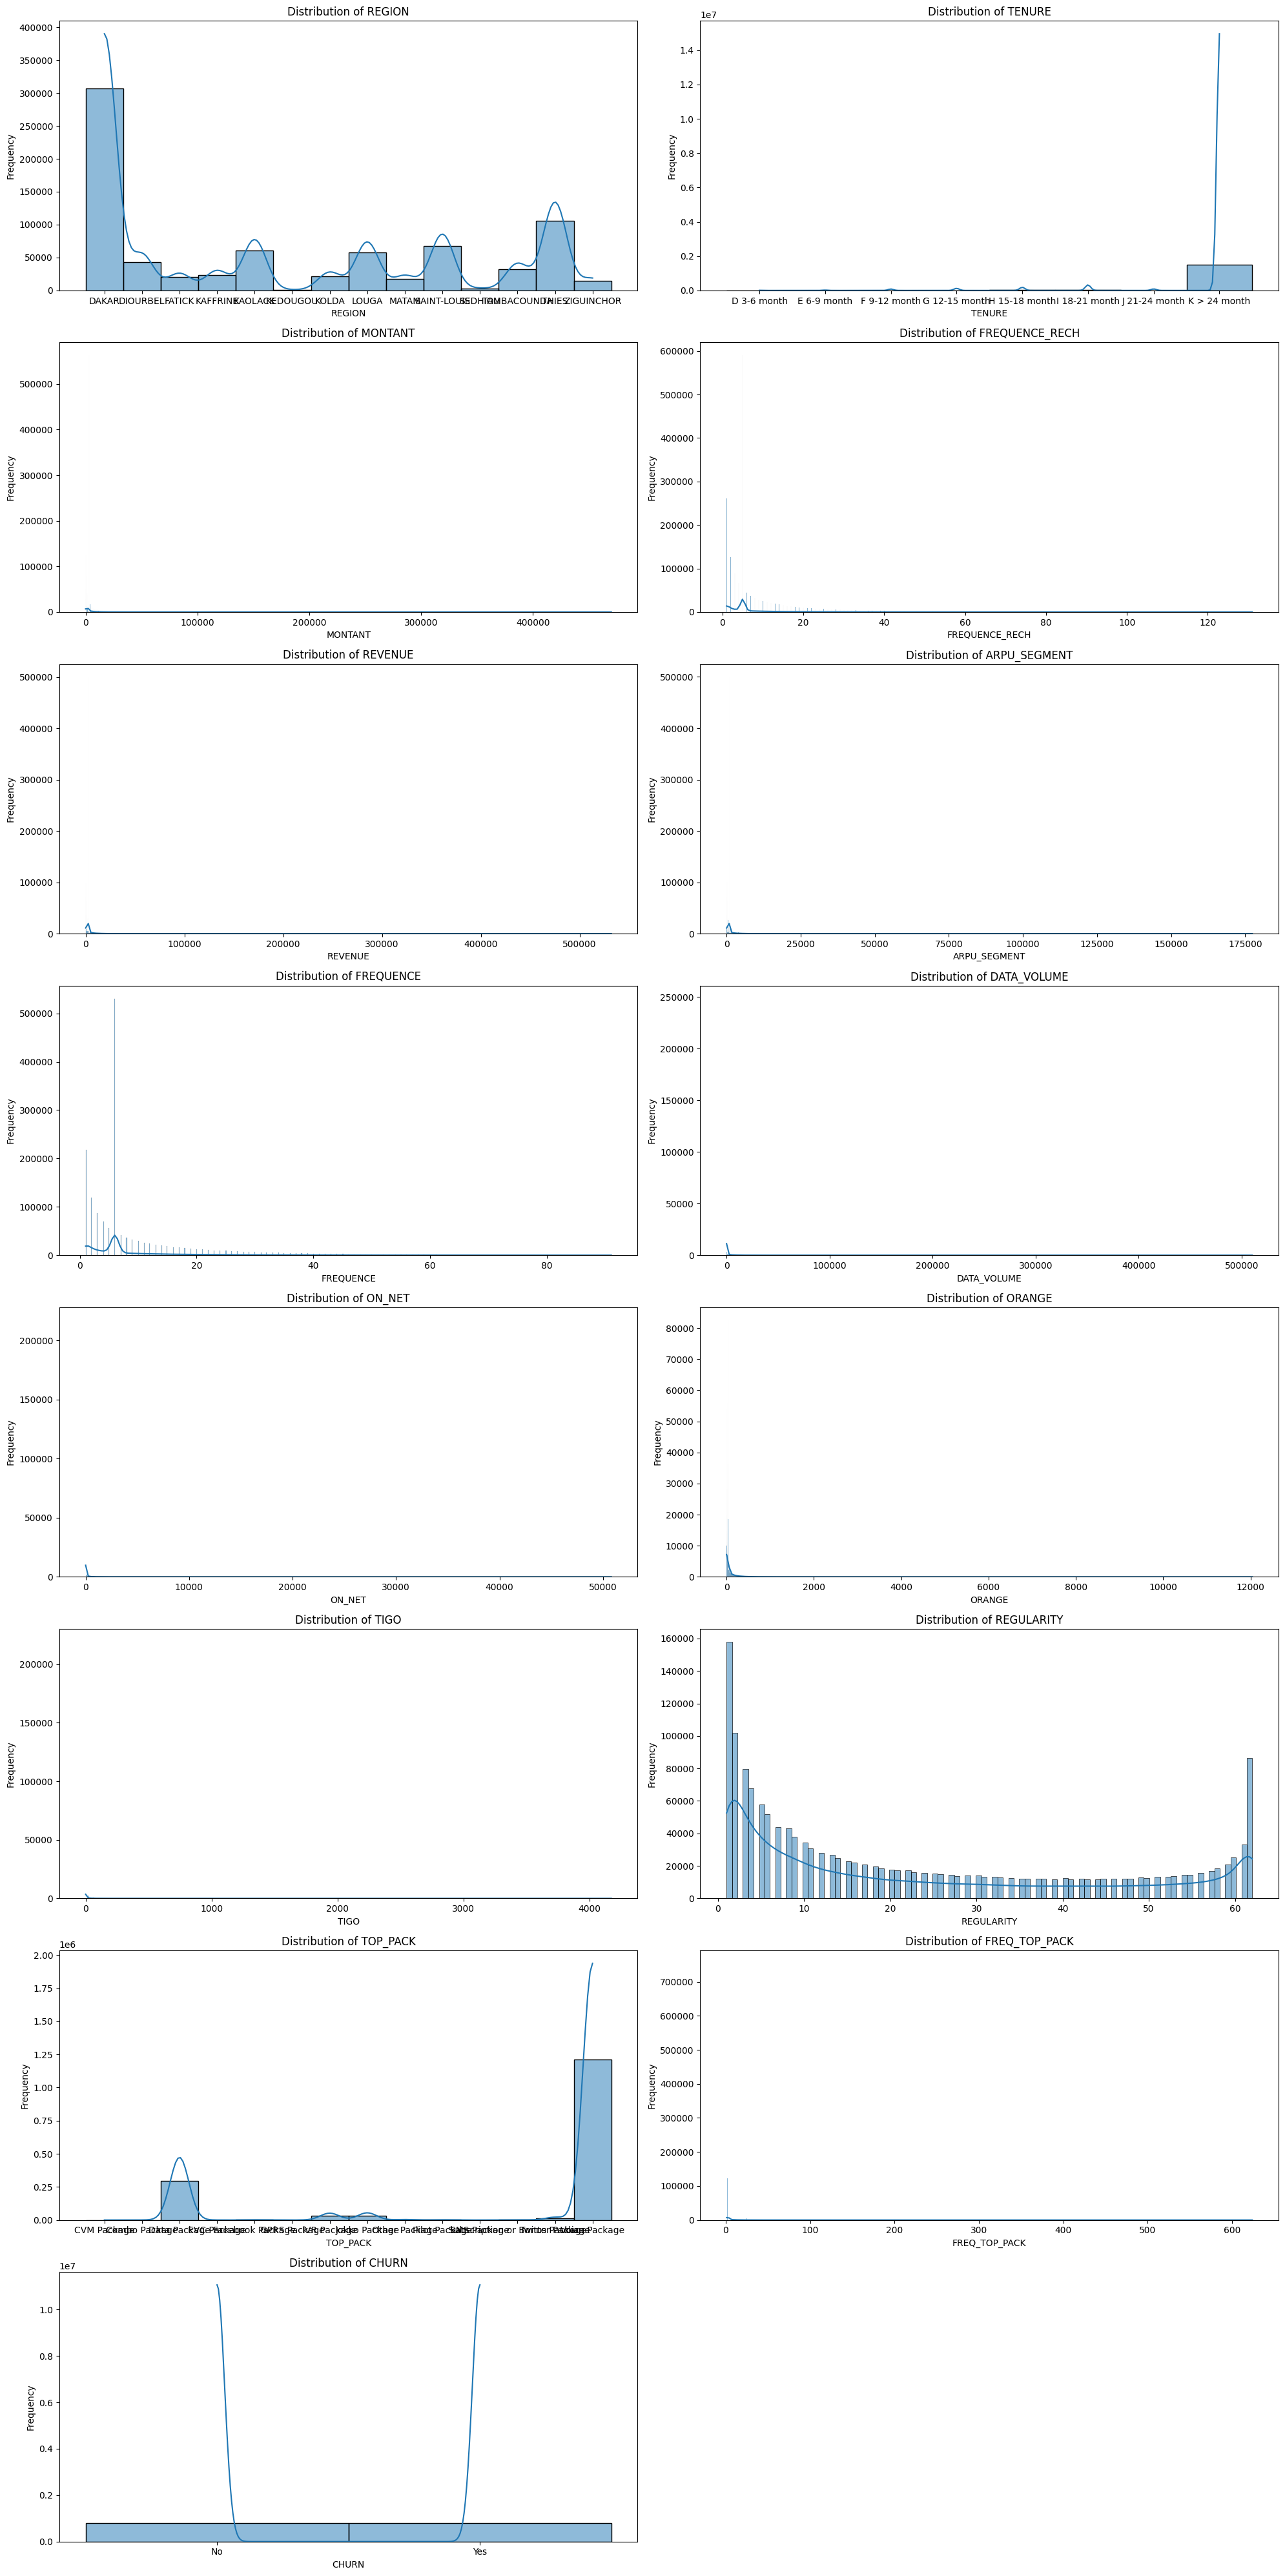

In [207]:
# Get the list of columns in sample_model_df
columns = sample_model_df.columns

# Determine the number of rows and columns for subplots
num_cols = len(columns)
num_rows = (num_cols + 1) // 2  # Adjust as needed for layout

# Create figure and axes
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5*num_rows))

# Flatten axes if necessary
axes = axes.flatten()

# Loop through columns and plot each one
for i, col in enumerate(columns):
    if train_model_df[col].dtype == 'object':
        # Categorical feature: Use value counts bar plot
        freq = train_model_df[col].value_counts()
        axes[i].bar(freq.index, freq.values)
        axes[i].set_title(f'Frequency of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

        # Force tick rotation using setp
        plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')

    else:
        # Numerical feature: Use histogram plot
        sns.histplot(train_model_df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [78]:
# View the shape of the dataframe
train_model_df.shape

(1593892, 15)

In [79]:
# View the shape of the dataframe
sample_model_df.shape

(4592, 15)

In [88]:
# Split data into features and target
X = train_model_df.drop('CHURN', axis=1)
y = train_model_df['CHURN']

# Display the first few rows of the features dataframe
X.head()

REGION        TENURE  MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  \
0        DAKAR  K > 24 month  20000.0            47.0  21602.0        7201.0   
1  SAINT-LOUIS  K > 24 month   7900.0            19.0   7896.0        2632.0   
2        DAKAR  K > 24 month  12350.0            21.0  12351.0        4117.0   
3        DAKAR   E 6-9 month   2000.0             2.0   2000.0         667.0   
4        DAKAR  K > 24 month   3000.0             1.0   3000.0        1000.0   

   FREQUENCE  DATA_VOLUME  ON_NET  ORANGE   TIGO  REGULARITY       TOP_PACK  \
0       52.0       8835.0  3391.0   396.0  185.0          62  Voice Package   
1       25.0       9385.0    27.0    46.0   20.0          61   Data Package   
2       29.0       9360.0    66.0   102.0   34.0          56  Voice Package   
3        3.0       4206.0   246.0   709.0   10.0          62  Voice Package   
4        1.0       1305.5     NaN    39.0    7.0           6   Data Package   

   FREQ_TOP_PACK  
0           30.0  
1            7.0  
2           11.0  
3            1.0  
4            1.0

In [90]:
# Split data into features and target
X = sample_model_df.drop('CHURN', axis=1)
y = sample_model_df['CHURN']

# Display the first few rows of the features dataframe
X.head()

REGION         TENURE  MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  \
0  SAINT-LOUIS   K > 24 month    220.0             1.0    220.0          73.0   
1  SAINT-LOUIS   K > 24 month   2100.0             2.0    990.0         330.0   
2        KOLDA   K > 24 month   1500.0             3.0   1999.0         666.0   
3        DAKAR   K > 24 month   6500.0            13.0   6399.0        2133.0   
4     DIOURBEL  I 18-21 month    500.0             1.0    500.0         167.0   

   FREQUENCE  DATA_VOLUME  ON_NET  ORANGE  TIGO  REGULARITY       TOP_PACK  \
0        3.0        122.0     0.0    35.0   5.0           7  Voice Package   
1        1.0        737.0    10.0    35.0   7.0          34   Data Package   
2        6.0          0.0    10.0    38.0   3.0          26  Voice Package   
3       14.0       1305.5   233.0    85.0   1.0          55  Voice Package   
4        1.0       1807.5     NaN     5.0   2.0          16  Voice Package   

   FREQ_TOP_PACK  
0            1.0  
1            1.0  
2            3.0  
3           11.0  
4            1.0

In [289]:
y = train_model_df['CHURN']
y.head()

0    No
1    No
2    No
3    No
4    No
Name: CHURN, dtype: category
Categories (2, object): ['No', 'Yes']

In [81]:
y = sample_model_df['CHURN']
y.head()

0    No
1    No
2    No
3    No
4    No
Name: CHURN, dtype: category
Categories (2, object): ['No', 'Yes']

In [290]:
y.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [82]:
y.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [83]:
X.columns

Index(['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK'],
      dtype='object')

### Split data set into training and evaluation

In [84]:
# Separate numeric and categorical columns
num_columns = X.select_dtypes('number').columns
cat_columns = X.select_dtypes('category').columns

In [85]:
# Preview the separated numeric columns
num_columns

Index(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY',
       'FREQ_TOP_PACK'],
      dtype='object')

In [86]:
# Preview the categorical columns
cat_columns

Index(['REGION', 'TENURE', 'TOP_PACK'], dtype='object')

In [89]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593892 entries, 0 to 1593891
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   REGION          773962 non-null   category
 1   TENURE          1593892 non-null  category
 2   MONTANT         1593892 non-null  float64 
 3   FREQUENCE_RECH  1593892 non-null  float64 
 4   REVENUE         1593892 non-null  float64 
 5   ARPU_SEGMENT    1593892 non-null  float64 
 6   FREQUENCE       1593892 non-null  float64 
 7   DATA_VOLUME     773957 non-null   float64 
 8   ON_NET          1047180 non-null  float64 
 9   ORANGE          773958 non-null   float64 
 10  TIGO            773926 non-null   float64 
 11  REGULARITY      1593892 non-null  int64   
 12  TOP_PACK        1593892 non-null  category
 13  FREQ_TOP_PACK   1593892 non-null  float64 
dtypes: category(3), float64(10), int64(1)
memory usage: 138.3 MB


In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4592 entries, 0 to 4591
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   REGION          2387 non-null   category
 1   TENURE          4592 non-null   category
 2   MONTANT         4592 non-null   float64 
 3   FREQUENCE_RECH  4592 non-null   float64 
 4   REVENUE         4592 non-null   float64 
 5   ARPU_SEGMENT    4592 non-null   float64 
 6   FREQUENCE       4592 non-null   float64 
 7   DATA_VOLUME     2387 non-null   float64 
 8   ON_NET          3113 non-null   float64 
 9   ORANGE          2387 non-null   float64 
 10  TIGO            2387 non-null   float64 
 11  REGULARITY      4592 non-null   int64   
 12  TOP_PACK        4592 non-null   category
 13  FREQ_TOP_PACK   4592 non-null   float64 
dtypes: category(3), float64(10), int64(1)
memory usage: 409.6 KB


In [296]:
# View summary statistics
X.describe().T

count         mean          std   min     25%     50%  \
MONTANT         1593892.0  3948.872665  5371.421644  20.0  1200.0  3000.0   
FREQUENCE_RECH  1593892.0     7.722643     9.890911   1.0     3.0     5.0   
REVENUE         1593892.0  3895.562829  5517.757311   1.0  1000.0  3000.0   
ARPU_SEGMENT    1593892.0  1298.524519  1839.250053   0.0   333.0  1000.0   
FREQUENCE       1593892.0     9.424615    11.306723   1.0     3.0     6.0   
DATA_VOLUME      773957.0  2171.879237  6370.965180   0.0     3.0   295.0   
ON_NET          1047180.0   202.219731   744.441304   0.0     2.0    11.0   
ORANGE           773958.0    80.035136   178.333722   0.0    13.0    31.0   
TIGO             773926.0    14.883559    46.343155   0.0     3.0     7.0   
REGULARITY      1593892.0    23.094494    21.116301   1.0     4.0    15.0   
FREQ_TOP_PACK   1593892.0     6.530968     8.405178   1.0     3.0     5.0   

                   75%       max  
MONTANT         3400.0  470000.0  
FREQUENCE_RECH     7.0     131.0  
REVENUE         3497.0  532177.0  
ARPU_SEGMENT    1166.0  177392.0  
FREQUENCE         10.0      91.0  
DATA_VOLUME     1305.5  510333.0  
ON_NET            83.0   50809.0  
ORANGE            62.0   12040.0  
TIGO               9.0    4174.0  
REGULARITY        41.0      62.0  
FREQ_TOP_PACK      5.0     624.0

In [92]:
# View summary statistics
X.describe().T

count         mean          std    min     25%     50%  \
MONTANT         4592.0  3905.474303  5431.916583  100.0  1000.0  3000.0   
FREQUENCE_RECH  4592.0     7.584930     9.798391    1.0     2.0     5.0   
REVENUE         4592.0  3837.158319  5249.562458    1.0  1000.0  3000.0   
ARPU_SEGMENT    4592.0  1279.055967  1749.847871    0.0   333.0  1000.0   
FREQUENCE       4592.0     9.231925    11.102540    1.0     3.0     6.0   
DATA_VOLUME     2387.0  2064.545036  6385.994888    0.0     3.0   295.0   
ON_NET          3113.0   195.619017   813.265495    0.0     3.0    13.0   
ORANGE          2387.0    78.289066   198.927606    0.0    13.0    31.0   
TIGO            2387.0    13.504608    35.224394    0.0     3.0     7.0   
REGULARITY      4592.0    23.250653    21.170623    1.0     5.0    15.0   
FREQ_TOP_PACK   4592.0     6.303571     8.240594    1.0     2.0     5.0   

                   75%       max  
MONTANT         3500.0  113615.0  
FREQUENCE_RECH     7.0     100.0  
REVENUE         3501.0   79522.0  
ARPU_SEGMENT    1167.0   26507.0  
FREQUENCE         10.0      90.0  
DATA_VOLUME     1305.5  126208.0  
ON_NET            75.0   17501.0  
ORANGE            52.0    3890.0  
TIGO               9.0     788.0  
REGULARITY        42.0      62.0  
FREQ_TOP_PACK      5.0     113.0

In [297]:
# Loop through each numerical column in the list
for col in num_columns:
    # Calculate skewness and kurtosis
    skewness = round(X[col].skew(), 2)
    kurtosis = round(X[col].kurtosis(), 2)

    # Print column name and its statistics
    print(f"Column: {col}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print("-" * 40)

Column: MONTANT
Skewness: 7.51
Kurtosis: 197.25
----------------------------------------
Column: FREQUENCE_RECH
Skewness: 3.3
Kurtosis: 13.7
----------------------------------------
Column: REVENUE
Skewness: 7.87
Kurtosis: 248.17
----------------------------------------
Column: ARPU_SEGMENT
Skewness: 7.87
Kurtosis: 248.17
----------------------------------------
Column: FREQUENCE
Skewness: 2.81
Kurtosis: 9.46
----------------------------------------
Column: DATA_VOLUME
Skewness: 10.41
Kurtosis: 274.18
----------------------------------------
Column: ON_NET
Skewness: 9.64
Kurtosis: 166.07
----------------------------------------
Column: ORANGE
Skewness: 8.46
Kurtosis: 138.85
----------------------------------------
Column: TIGO
Skewness: 18.4
Kurtosis: 691.41
----------------------------------------
Column: REGULARITY
Skewness: 0.64
Kurtosis: -1.07
----------------------------------------
Column: FREQ_TOP_PACK
Skewness: 5.95
Kurtosis: 101.32
----------------------------------------


In [93]:
# Loop through each numerical column in the list
for col in num_columns:
    # Calculate skewness and kurtosis
    skewness = round(X[col].skew(), 2)
    kurtosis = round(X[col].kurtosis(), 2)

    # Print column name and its statistics
    print(f"Column: {col}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print("-" * 40)

Column: MONTANT
Skewness: 5.89
Kurtosis: 65.45
----------------------------------------
Column: FREQUENCE_RECH
Skewness: 3.53
Kurtosis: 16.65
----------------------------------------
Column: REVENUE
Skewness: 4.52
Kurtosis: 33.38
----------------------------------------
Column: ARPU_SEGMENT
Skewness: 4.52
Kurtosis: 33.38
----------------------------------------
Column: FREQUENCE
Skewness: 2.92
Kurtosis: 10.75
----------------------------------------
Column: DATA_VOLUME
Skewness: 9.02
Kurtosis: 119.14
----------------------------------------
Column: ON_NET
Skewness: 10.76
Kurtosis: 159.62
----------------------------------------
Column: ORANGE
Skewness: 9.15
Kurtosis: 120.4
----------------------------------------
Column: TIGO
Skewness: 10.18
Kurtosis: 156.73
----------------------------------------
Column: REGULARITY
Skewness: 0.63
Kurtosis: -1.1
----------------------------------------
Column: FREQ_TOP_PACK
Skewness: 4.83
Kurtosis: 33.64
----------------------------------------


In [298]:
# Preview the counts of the target columns
y.value_counts()

CHURN
No     796946
Yes    796946
Name: count, dtype: int64

In [94]:
# Preview the counts of the target columns
y.value_counts()

CHURN
No     2296
Yes    2296
Name: count, dtype: int64

In [299]:
y.isnull().sum()

0

In [95]:
y.isnull().sum()

0

In [300]:
# Initialize an encoder with the training data and evaluation data
churn_encoder = LabelEncoder()
y = churn_encoder.fit_transform(y)

In [96]:
# Initialize an encoder with the training data and evaluation data
churn_encoder_s = LabelEncoder()
y = churn_encoder_s.fit_transform(y)

In [301]:
# Initialize the StratifiedShuffleSplit object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Use the split method to get the train and evaluation indices
for train_index, eval_index in sss.split(X, y):
    X_train, X_eval = X.iloc[train_index], X.iloc[eval_index]
    y_train, y_eval = y[train_index], y[eval_index]

# Display the shapes of the resulting splits
print(f"X_train shape: {X_train.shape}")
print(f"X_eval shape: {X_eval.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_eval shape: {y_eval.shape}")

X_train shape: (1275113, 14)
X_eval shape: (318779, 14)
y_train shape: (1275113,)
y_eval shape: (318779,)


In [97]:
# Initialize the StratifiedShuffleSplit object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Use the split method to get the train and evaluation indices
for train_index, eval_index in sss.split(X, y):
    X_train, X_eval = X.iloc[train_index], X.iloc[eval_index]
    y_train, y_eval = y[train_index], y[eval_index]

# Display the shapes of the resulting splits
print(f"X_train shape: {X_train.shape}")
print(f"X_eval shape: {X_eval.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_eval shape: {y_eval.shape}")

X_train shape: (3673, 14)
X_eval shape: (919, 14)
y_train shape: (3673,)
y_eval shape: (919,)


[Back to Top](#Table-of-Contents)

## Step 4: Modeling and Evaluation

### Pipeline

In [98]:
# Create a Data Preprocessing Pipeline for all the numerical variables
num_pipe = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('quantile_transform', FunctionTransformer(func=quantile_transform, kw_args={'output_distribution': 'normal'}, validate=False)),
    ('rob', RobustScaler())
    ])

# Create a Data Preprocessing Pipeline for all the categorical variables
cat_pipe = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipe, num_columns),
    ('cat', cat_pipe, cat_columns)
    ])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('quantile_transform',
                                                  FunctionTransformer(func=<function quantile_transform at 0x000001D2820A0E50>,
                                                                      kw_args={'output_distribution': 'normal'})),
                                                 ('rob', RobustScaler())]),
                                 Index(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY',
       'FREQ_TOP_PACK'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['REGION', 'TENURE', 'TOP_PACK'], dtype='object'))])

In [99]:
# Define models
models = [
    ('SGD', CalibratedClassifierCV(SGDClassifier(loss='hinge', random_state=42, max_iter=1000, tol=1e-3))), 
    ('LR', LogisticRegression(max_iter=1000, random_state=42, solver='saga', C=1.0)),  
    ('SVC', CalibratedClassifierCV(LinearSVC(random_state=42, max_iter=1000))),
    ('KNN', KNeighborsClassifier(n_neighbors=3)),  
    ('RF', RandomForestClassifier(random_state=42, n_estimators=50, max_depth=10, min_samples_split=2, min_samples_leaf=1)),
    ('XB', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss", n_estimators=50, learning_rate=0.1, max_depth=2)),  
    ('GB', GradientBoostingClassifier(random_state=42, n_estimators=50, learning_rate=0.1, max_depth=2)),  
    ('FNN', MLPClassifier(random_state=42, hidden_layer_sizes=(50,), max_iter=300))  
]

# Define oversampling technique
over_sampler = SMOTE(random_state=42)

pipelines = []

for model_name, classifier in models:
    # Create the pipeline for each model
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('ovr', over_sampler),
        ('model', classifier)
    ])
    pipelines.append((model_name, pipeline))

# Display pipelines in two columns
def display_pipelines(pipelines, models_per_row=2):
    all_pipelines_html = "<div style='display: flex; flex-wrap: wrap;'>"
    for i, (model_name, pipeline) in enumerate(pipelines):
        all_pipelines_html += f"<div style='flex: 1 1 {50/models_per_row}%; margin: 10px;'> "
        all_pipelines_html += f"<h3>Pipeline Diagram for {model_name}:</h3>\n"
        all_pipelines_html += pipeline._repr_html_()
        all_pipelines_html += "</div>"  
        if (i + 1) % models_per_row == 0:
            all_pipelines_html += "<div style='clear: both;'></div>"
    all_pipelines_html += "</div>"  
    display(HTML(all_pipelines_html))

display_pipelines(pipelines)

### Fit data to the pipeline and train Model

- **Train Model 1 - Distance based model**: 
  - `K Neighbors Classifier (KNeighborsClassifier)`

- **Train Model 2 - Gradient Descent model**: 
  - `Stochastic Gradient Descent Classifier (SGDClassifier)` (calibrated for probability)
  - `Logistic Regression Classifier (LogisticRegression)`
  - `Linear Support Vector Classifier (LinearSVC)` (calibrated for probability)

- **Train Model 3 - Tree based model**: 
  - `Random Forest Classifier (RandomForestClassifier)`
  - `Gradient Boosting Classifier (GradientBoostingClassifier)`
  - `Extreme Gradient Boosting Classifier (XGBClassifier)`

- **Train Model 4 - Neural Network**: 
  - `Feedforward Neural Networks (MLPClassifier)`

#### Advance Model Evaluation and Visualizing Model Performance

##### Model Evaluation Scores

In [234]:
# Initialize results dictionary
eval_results = {}

In [263]:
# Sequential Approach to evaluating models
model_name, classifier = models[7]

# Create the pipeline for KNN
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('ovr', over_sampler),
    ('model', classifier)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Save the fitted pipeline as a joblib file
joblib_file = f"../models/{model_name}_pipeline.joblib"
joblib.dump(pipeline, joblib_file)
print(f"Pipeline for {model_name} saved as {joblib_file}")

# Transform the evaluation data using only the preprocessor part of the pipeline
X_eval_preprocessed = pipeline.named_steps['preprocessor'].transform(X_eval)

# Predict on the evaluation data
y_pred = pipeline.named_steps['model'].predict(X_eval_preprocessed)

# Calculate ROC AUC Score
if hasattr(pipeline.named_steps['model'], 'predict_proba'):
    y_prob = pipeline.named_steps['model'].predict_proba(X_eval_preprocessed)
    roc_auc = roc_auc_score(y_eval, y_prob[:, 1])
else:
    print(f"{model_name} model does not support probability prediction.")

accuracy = accuracy_score(y_eval, y_pred)
f1 = f1_score(y_eval, y_pred)
precision = precision_score(y_eval, y_pred)
recall = recall_score(y_eval, y_pred)
conf_matrix = confusion_matrix(y_eval, y_pred)
logloss = log_loss(y_eval, y_prob) if y_prob is not None else None

# Store the results
eval_results[model_name] = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'log_loss': logloss,
    'f1_score': f1,
    'ROC AUC Score': roc_auc,
    'Predictions': y_pred,
    'y_prob': y_prob
}

In [264]:
# Create and display evaluation results as a styled dataframe
df_scores = pd.DataFrame(eval_results).transpose()
df_scores = df_scores.drop(['Predictions', 'y_prob'], axis=1)
df_scores_sorted = df_scores.sort_values(by="f1_score", ascending=False)
df_scores_styled = df_scores_sorted.style \
    .background_gradient(subset=['f1_score'], cmap='Greens') \
    .background_gradient(subset=['log_loss'], cmap='Reds_r')

print("Model Evaluation Scores:")
df_scores_styled

Model Evaluation Scores:


In [103]:
# Initialize results dictionary
eval_results = {}

# # Evaluate the models above using the roc_auc_score
for model_name, classifier in models:
    # Create the pipeline for each model
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('ovr', over_sampler),
        ('model', classifier)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # # Save the fitted pipeline as a joblib file
    # joblib_file = f"../models/{model_name}_pipeline.joblib"
    # joblib.dump(pipeline, joblib_file)
    # print(f"Pipeline for {model_name} saved as {joblib_file}")

    # Transform the evaluation data using only the preprocessor part of the pipeline
    X_eval_preprocessed = pipeline.named_steps['preprocessor'].transform(X_eval)
    
    # Predict on the evaluation data
    y_pred = pipeline.named_steps['model'].predict(X_eval_preprocessed)
    
    # Calculate ROC AUC Score
    if hasattr(pipeline.named_steps['model'], 'predict_proba'):
        y_prob = pipeline.named_steps['model'].predict_proba(X_eval_preprocessed)
        roc_auc = roc_auc_score(y_eval, y_prob[:, 1])
    else:
        print(f"{model_name} model does not support probability prediction.")
        continue

    accuracy = accuracy_score(y_eval, y_pred)
    f1 = f1_score(y_eval, y_pred)
    precision = precision_score(y_eval, y_pred)
    recall = recall_score(y_eval, y_pred)
    conf_matrix = confusion_matrix(y_eval, y_pred)
    logloss = log_loss(y_eval, y_prob) if y_prob is not None else None

    # Store the results
    eval_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'log_loss': logloss,
        'f1_score': f1,
        'ROC AUC Score': roc_auc,
        'Predictions': y_pred,
        'y_prob': y_prob
    }

# Create and display evaluation results as a styled dataframe
df_scores = pd.DataFrame(eval_results).transpose()
df_scores = df_scores.drop(['Predictions', 'y_prob'], axis=1)
df_scores_sorted = df_scores.sort_values(by="f1_score", ascending=False)
df_scores_styled = df_scores_sorted.style \
    .background_gradient(subset=['f1_score'], cmap='Greens') \
    .background_gradient(subset=['log_loss'], cmap='Reds')

print("Model Evaluation Scores:")
df_scores_styled

Model Evaluation Scores:


##### Model Confusion Matrix

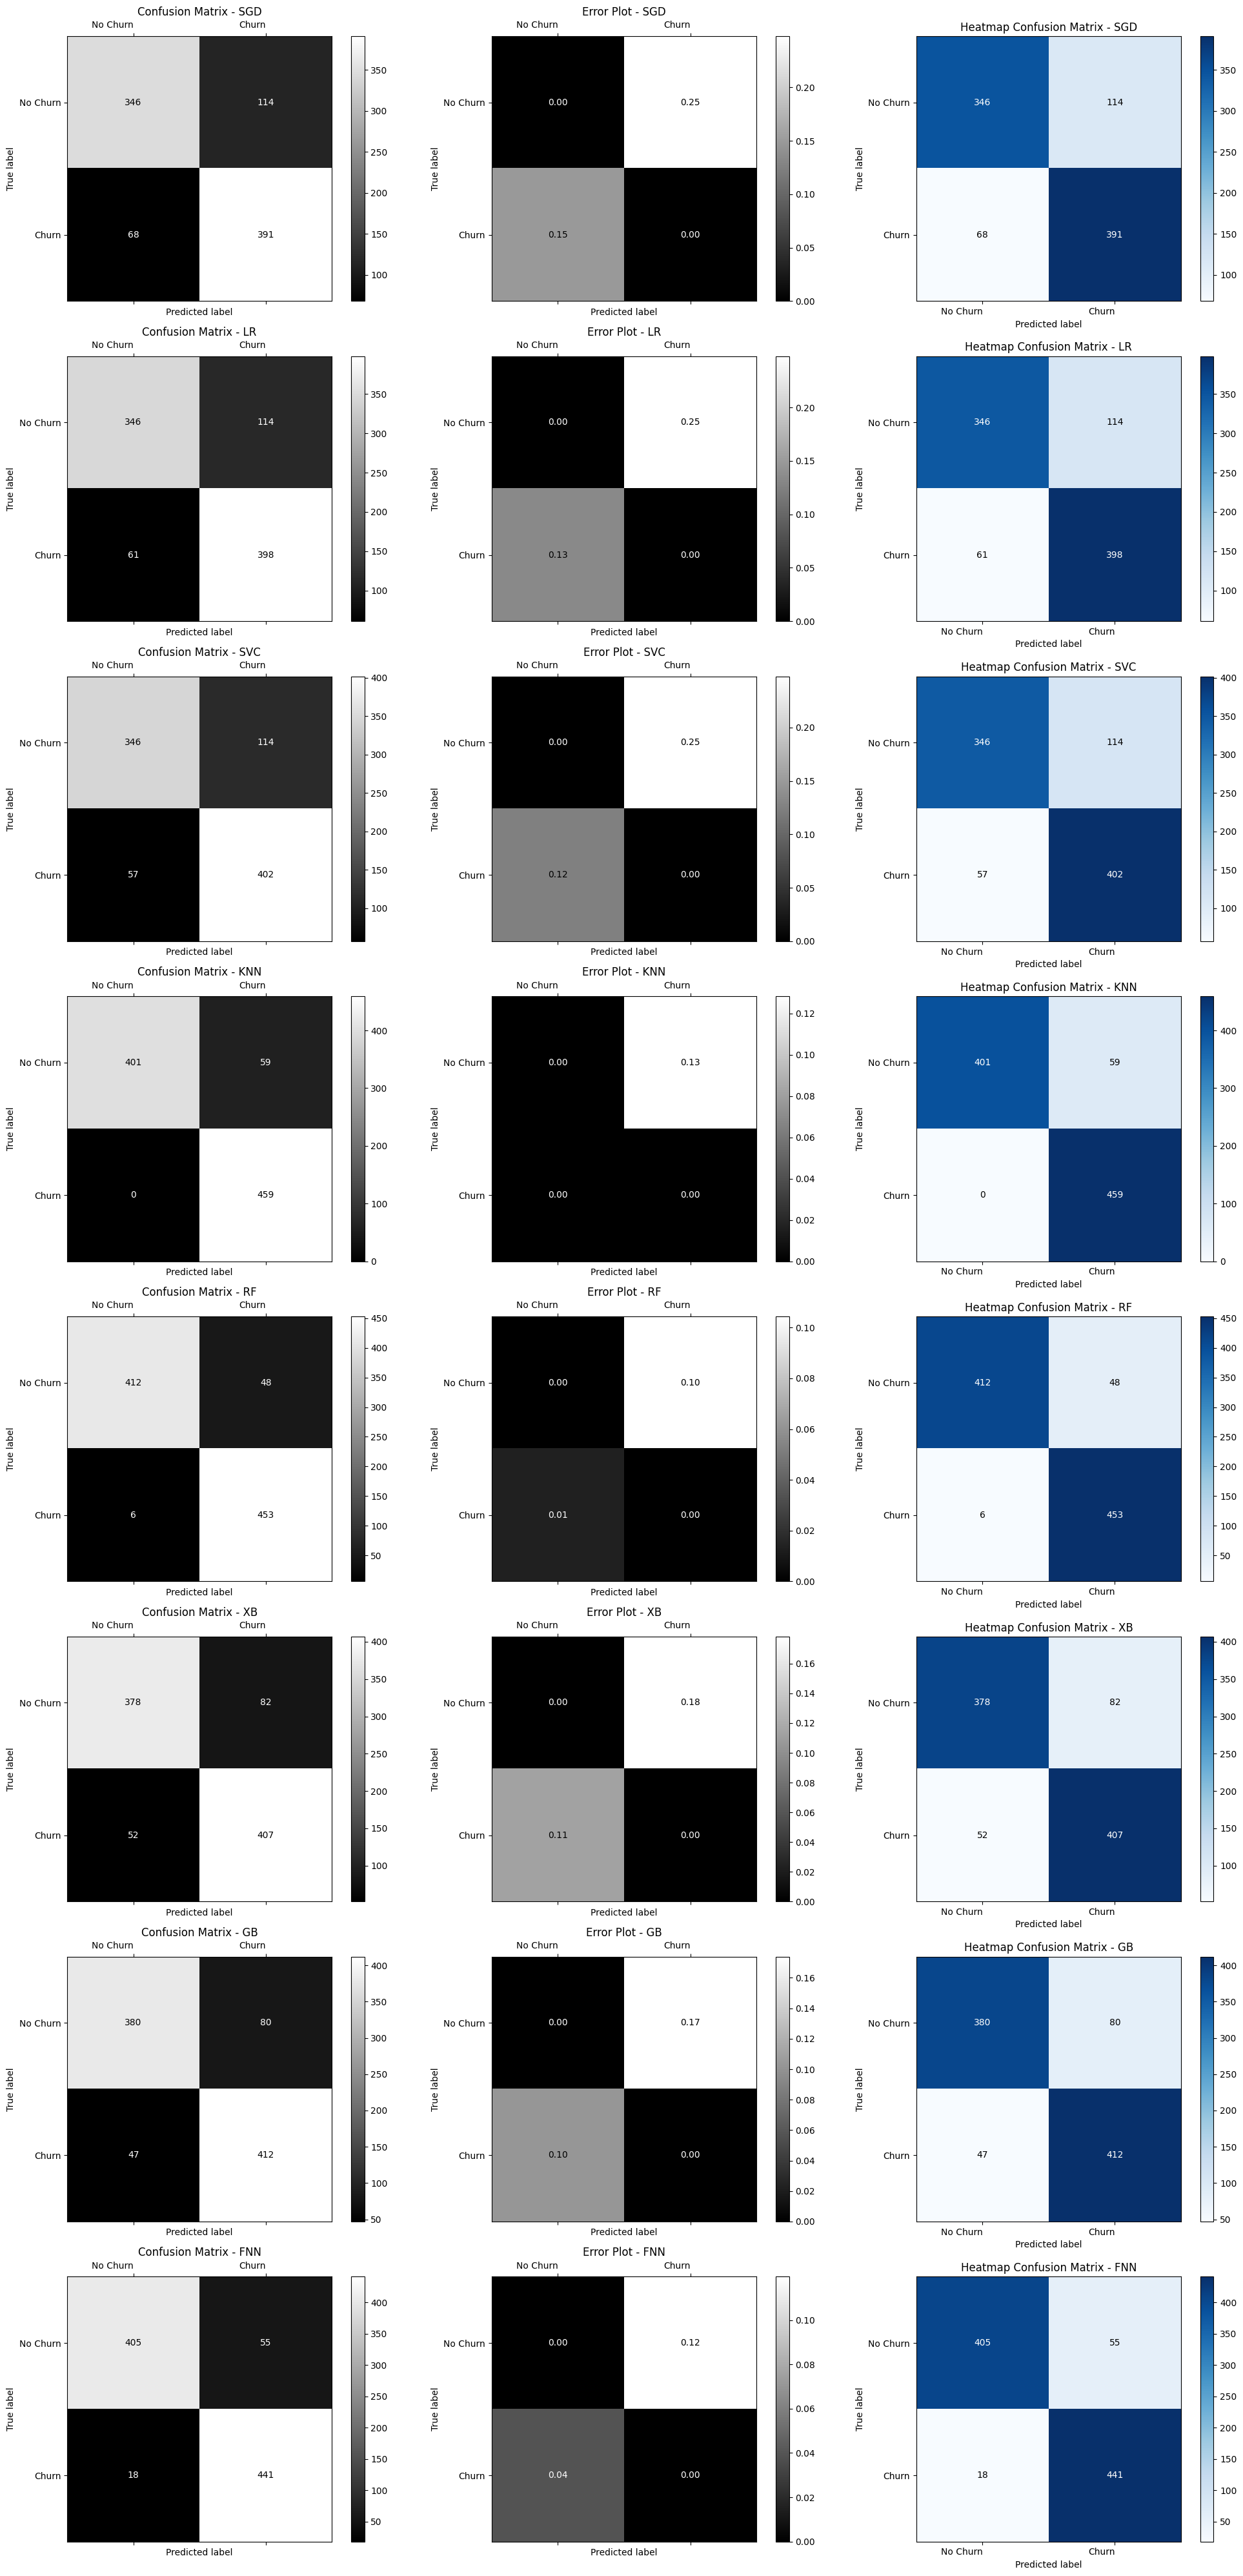

In [104]:
# Define target names for confusion matrix
target_names = ['No Churn', 'Churn']

# Number of rows needed for subplots (3 plots per model)
num_rows = len(models)

# Create figure and axes
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5*num_rows))

for idx, (model_name, classifier) in enumerate(models):
    y_pred_plot = eval_results[model_name]['Predictions'] 
    y_true_plot = y_eval

    # Compute confusion matrix
    cm = confusion_matrix(y_true_plot, y_pred_plot)

    # Compute normalized confusion matrix (as a percentage of true class)
    row_sums = cm.sum(axis=1, keepdims=True)
    norm_cm = cm / row_sums

    # Fill diagonal with zeros for better visualization of errors
    np.fill_diagonal(norm_cm, 0)  

    # Plot raw confusion matrix
    ax = axes[idx, 0]
    mt = ax.matshow(cm, cmap=plt.cm.gray)
    ax.set_title(f"Confusion Matrix - {model_name}")
    ax.set_xticks(np.arange(len(target_names)))
    ax.set_yticks(np.arange(len(target_names)))
    ax.set_xticklabels(target_names)
    ax.set_yticklabels(target_names)
    plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fig.colorbar(mt, ax=ax)
    ax.grid(False)  # Remove grid lines

    # Annotate each cell with the numerical values
    for i in range(len(target_names)):
        for j in range(len(target_names)):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="black" if cm[i, j] > cm.max() / 2. else "white")

    # Plot normalized confusion matrix (error plot)
    ax = axes[idx, 1]
    mt = ax.matshow(norm_cm, cmap=plt.cm.gray)
    ax.set_title(f"Error Plot - {model_name}")
    ax.set_xticks(np.arange(len(target_names)))
    ax.set_yticks(np.arange(len(target_names)))
    ax.set_xticklabels(target_names)
    ax.set_yticklabels(target_names)
    plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fig.colorbar(mt, ax=ax)
    ax.grid(False)  # Remove grid lines

    # Annotate each cell with the numerical values
    for i in range(len(target_names)):
        for j in range(len(target_names)):
            ax.text(j, i, format(norm_cm[i, j], '.2f'),
                    ha="center", va="center",
                    color="black" if norm_cm[i, j] > norm_cm.max() / 2. else "white")

    # Plot heatmap confusion matrix
    ax = axes[idx, 2]
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(f"Heatmap Confusion Matrix - {model_name}")
    ax.set_xticks(np.arange(len(target_names)))
    ax.set_yticks(np.arange(len(target_names)))
    ax.set_xticklabels(target_names)
    ax.set_yticklabels(target_names)
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fig.colorbar(im, ax=ax)
    ax.grid(False)  # Remove grid lines

    # Annotate each cell with the numerical values
    for i in range(len(target_names)):
        for j in range(len(target_names)):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.tight_layout()
plt.show()

##### Model ROC Curve

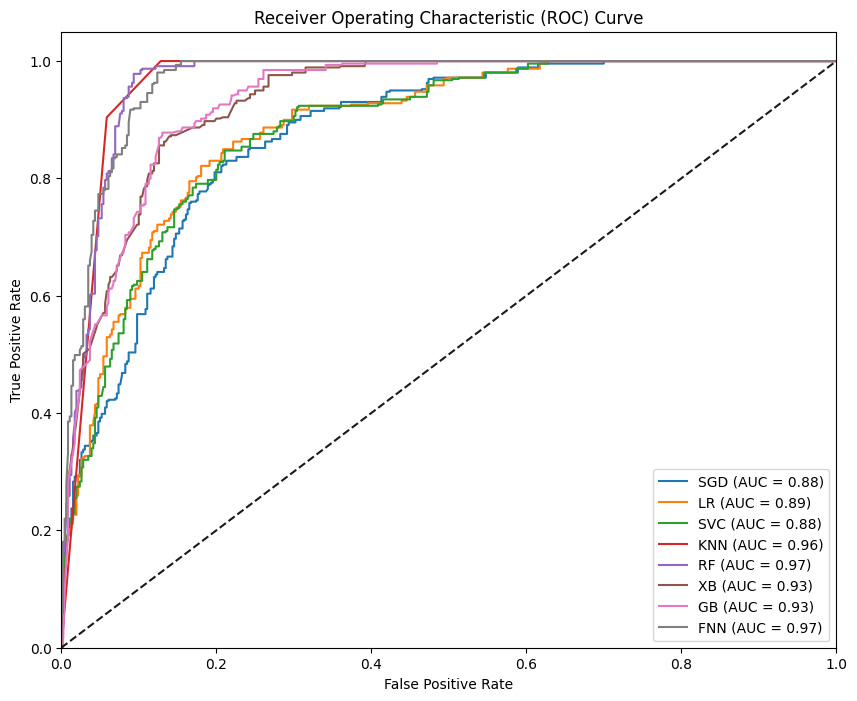

In [105]:
# Initialize results dictionary
roc_eval_results = {}

plt.figure(figsize=(10, 8))
for model_name, metrics in eval_results.items():
    y_prob = metrics['y_prob'][:, 1]
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_eval, y_prob, pos_label=1)
    auc_score = metrics['ROC AUC Score']

    roc_curve_data_F = pd.DataFrame({
        'False positive':fpr,
        'True positive': tpr,
        'Threshold': thresholds,

    })
    
    # Add ROC curve data to the table
    roc_eval_results[model_name] = roc_curve_data_F

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()

In [106]:
# Check optimal threshold values for least performing model
roc_eval_results['SGD'].tail(50)

False positive  True positive  Threshold
182        0.243478       0.849673   0.508518
183        0.243478       0.851852   0.503740
184        0.263043       0.851852   0.490745
185        0.263043       0.856209   0.490584
186        0.263043       0.862745   0.489815
187        0.271739       0.862745   0.487063
188        0.271739       0.867102   0.485495
189        0.282609       0.867102   0.481433
190        0.282609       0.875817   0.478153
191        0.291304       0.875817   0.468283
192        0.291304       0.888889   0.468254
193        0.291304       0.891068   0.467920
194        0.293478       0.891068   0.466315
195        0.293478       0.895425   0.460545
196        0.302174       0.895425   0.450238
197        0.302174       0.899782   0.449048
198        0.308696       0.899782   0.447248
199        0.308696       0.906318   0.446348
200        0.321739       0.906318   0.438751
201        0.321739       0.915033   0.437397
202        0.339130       0.915033   0.421322
203        0.339130       0.919390   0.420636
204        0.358696       0.919390   0.413048
205        0.358696       0.921569   0.410492
206        0.360870       0.921569   0.409674
207        0.360870       0.928105   0.403142
208        0.360870       0.930283   0.403142
209        0.413043       0.930283   0.353395
210        0.413043       0.938998   0.349967
211        0.419565       0.938998   0.348875
212        0.419565       0.947712   0.348134
213        0.423913       0.947712   0.347228
214        0.423913       0.949891   0.346099
215        0.465217       0.949891   0.328510
216        0.465217       0.952070   0.328221
217        0.471739       0.952070   0.323485
218        0.471739       0.962963   0.316148
219        0.473913       0.962963   0.313668
220        0.473913       0.969499   0.311610
221        0.480435       0.969499   0.309954
222        0.480435       0.971678   0.309620
223        0.547826       0.971678   0.270711
224        0.547826       0.980392   0.268413
225        0.589130       0.980392   0.236550
226        0.589130       0.989107   0.232229
227        0.615217       0.989107   0.209742
228        0.615217       0.995643   0.207312
229        0.700000       0.995643   0.131116
230        0.700000       1.000000   0.129204
231        1.000000       1.000000   0.001428

#### Hyperparameter Tuning

In [ ]:
import joblib
from sklearn.model_selection import GridSearchCV

# Define parameter grid for GridSearchCV focused on FNN, RF, and KNN
param_grid = {
    'KNN': {
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance'],
        'model__algorithm': ['auto', 'ball_tree', 'kd_tree']
    },
    'RF': {
        'model__n_estimators': [50, 100],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    },
    'FNN': {
        'model__hidden_layer_sizes': [(50,), (100,)],
        'model__activation': ['relu', 'tanh'],
        'model__solver': ['adam'],
        'model__alpha': [0.0001, 0.001],
        'model__learning_rate': ['constant'],
        'model__max_iter': [200]
    }
}

# Initialize a dictionary to store the GridSearchCV results
grid_searches_tuned = {}

# Create an empty DataFrame to store results
results_table = pd.DataFrame(columns=['Model', 'Best Params', 'Best Score'])

# Hyperparameter tuning loop using the previously defined `models`
for model_name, classifier in models:
    if model_name not in ['KNN', 'RF', 'FNN']:
        continue  # Skip models that are not part of the target tuning

    # Create the pipeline for each model
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('ovr', over_sampler),
        ('model', classifier)
    ])

    # Create GridSearchCV object
    grid_search_tuned = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid[model_name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    # Fit grid search on training data
    grid_search_tuned.fit(X_train, y_train)
    
    # Store the grid search object in the dictionary
    grid_searches_tuned[model_name] = grid_search_tuned

    # Save the best model including the entire pipeline
    best_model_pipeline = grid_search_tuned.best_estimator_
    joblib_file = f"{model_name}_best_pipeline.joblib"
    joblib.dump(best_model_pipeline, joblib_file)
    print(f"Best {model_name} model saved as {joblib_file}")
    
    # Add the results to the DataFrame
    best_params = grid_search_tuned.best_params_
    best_score = grid_search_tuned.best_score_
    results_table.loc[len(results_table)] = [model_name, best_params, best_score]

# Sort the results table by best score
results_table = results_table.sort_values(by='Best Score', ascending=False).reset_index(drop=True)

# Display the results table
results_table.style.background_gradient(subset=['Best Score'], cmap='Greens')

In [109]:
# Define parameter grid for GridSearchCV for all models
param_grid = {
    'SGD': {
        'model__estimator__alpha': [0.0001, 0.001],
        'model__estimator__loss': ['hinge', 'log'],
        'model__estimator__penalty': ['l2', 'l1'],
        'model__estimator__max_iter': [1000, 1500]
    },
    'LR': {
        'model__C': [0.1, 1.0, 10.0],
        'model__solver': ['saga', 'liblinear'],
        'model__max_iter': [200, 500]
    },
    'SVC': {
        'model__estimator__C': [0.1, 1.0, 10.0],
        'model__estimator__loss': ['hinge', 'squared_hinge'],
        'model__estimator__max_iter': [1000]
    },
    'KNN': {
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance'],
        'model__algorithm': ['auto', 'ball_tree']
    },
    'RF': {
        'model__n_estimators': [50, 100],
        'model__max_depth': [10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    },
    'XB': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [2, 3],
        'model__subsample': [0.8, 1.0]
    },
    'GB': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [2, 3]
    },
    'FNN': {
        'model__hidden_layer_sizes': [(50,), (100,)],
        'model__activation': ['relu', 'tanh'],
        'model__solver': ['adam'],
        'model__alpha': [0.0001, 0.001],
        'model__learning_rate': ['constant'],
        'model__max_iter': [200, 300]
    }
}

# Initialize a dictionary to store the GridSearchCV results
grid_searches_tuned = {}

# Create an empty DataFrame to store results
results_table = pd.DataFrame(columns=['Model', 'Best Params', 'Best Score'])

# Hyperparameter tuning loop using the previously defined `models`
for model_name, classifier in models:
    # Create the pipeline for each model
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('ovr', over_sampler),
        ('model', classifier)
    ])

    # Create GridSearchCV object
    grid_search_tuned = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid[model_name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1  # Added verbosity to monitor progress
    )
    
    # Fit grid search on training data
    grid_search_tuned.fit(X_train, y_train)
    
    # Store the grid search object in the dictionary
    grid_searches_tuned[model_name] = grid_search_tuned

    # Save the best model including the entire pipeline
    best_model_pipeline = grid_search_tuned.best_estimator_
    joblib_file = f"../models/{model_name}_best_pipeline.joblib"
    joblib.dump(best_model_pipeline, joblib_file)
    print(f"Best {model_name} model saved as {joblib_file}")
    
    # Add the results to the DataFrame
    best_params = grid_search_tuned.best_params_
    best_score = grid_search_tuned.best_score_
    results_table.loc[len(results_table)] = [model_name, best_params, best_score]

# Sort the results table by best score
results_table = results_table.sort_values(by='Best Score', ascending=False).reset_index(drop=True)

# Display the results table
results_table.style.background_gradient(subset=['Best Score'], cmap='Greens')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best SGD model saved as ../models/SGD_best_pipeline.joblib
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best LR model saved as ../models/LR_best_pipeline.joblib
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best SVC model saved as ../models/SVC_best_pipeline.joblib
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best KNN model saved as ../models/KNN_best_pipeline.joblib
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best RF model saved as ../models/RF_best_pipeline.joblib
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best XB model saved as ../models/XB_best_pipeline.joblib
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best GB model saved as ../models/GB_best_pipeline.joblib
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best FNN model saved as ../models/FNN_best_pipeline.joblib


In [110]:
# Model Pipeline Structures
def display_pipelines2(grid_searches_tuned, models_per_row=2):
    all_pipelines_html = "<div style='display: flex; flex-wrap: wrap;'>"
    for i, (model_name, grid_search_tuned) in enumerate(grid_searches_tuned.items()):
        all_pipelines_html += f"<div style='flex: 1 1 {50/models_per_row}%; margin: 10px;'> "
        all_pipelines_html += f"<h3>Pipeline Diagram for {model_name}:</h3>\n"
        all_pipelines_html += estimator_html_repr(grid_search_tuned.best_estimator_)
        all_pipelines_html += "</div>"  
        if (i + 1) % models_per_row == 0:
            all_pipelines_html += "<div style='clear: both;'></div>"
    all_pipelines_html += "</div>"  
    display(HTML(all_pipelines_html))

display_pipelines2(grid_searches_tuned)

#### Retrain Model with best paramaters

##### Hyper Tuned Model Evaluation Scores

In [113]:
# Initialize results dictionary
eval_results_tuned = {}

for model_name, grid_search_tuned in grid_searches_tuned.items():
    y_pred = grid_search_tuned.predict(X_eval)
   
    # Calculate ROC AUC Score
    if hasattr(grid_search_tuned.best_estimator_, "predict_proba"):
        y_prob = grid_search_tuned.predict_proba(X_eval)[:, 1]
        roc_auc = roc_auc_score(y_eval, y_prob)
    else:
        print(f"{model_name} model does not support probability prediction.")
        continue

    accuracy = accuracy_score(y_eval, y_pred)
    f1 = f1_score(y_eval, y_pred)
    precision = precision_score(y_eval, y_pred)
    recall = recall_score(y_eval, y_pred)
    conf_matrix = confusion_matrix(y_eval, y_pred)
    logloss = log_loss(y_eval, y_prob) if y_prob is not None else None

    # Store the results
    eval_results_tuned[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'log_loss': logloss,
        'f1_score': f1,
        'ROC AUC Score': roc_auc,
        'Predictions': y_pred,
        'y_prob': y_prob
    }

# Convert results to DataFrame
df_scores_tuned = pd.DataFrame(eval_results_tuned).transpose()
df_scores_tuned = df_scores_tuned.drop(['Predictions', 'y_prob'], axis=1)
df_scores_tuned_sorted = df_scores_tuned.sort_values(by="ROC AUC Score", ascending=False)


# print("Model Evaluation Scores:")
# df_scores_tuned_sorted.style.background_gradient(subset=['ROC AUC Score'], cmap='Greens')

df_scores_tuned_styled = df_scores_tuned_sorted.style \
    .background_gradient(subset=['ROC AUC Score'], cmap='Greens') \
    .background_gradient(subset=['log_loss'], cmap='Reds')

print("Model Evaluation Scores:")
df_scores_tuned_styled

Model Evaluation Scores:


##### Hyper Tuned Model Confusion Matrix

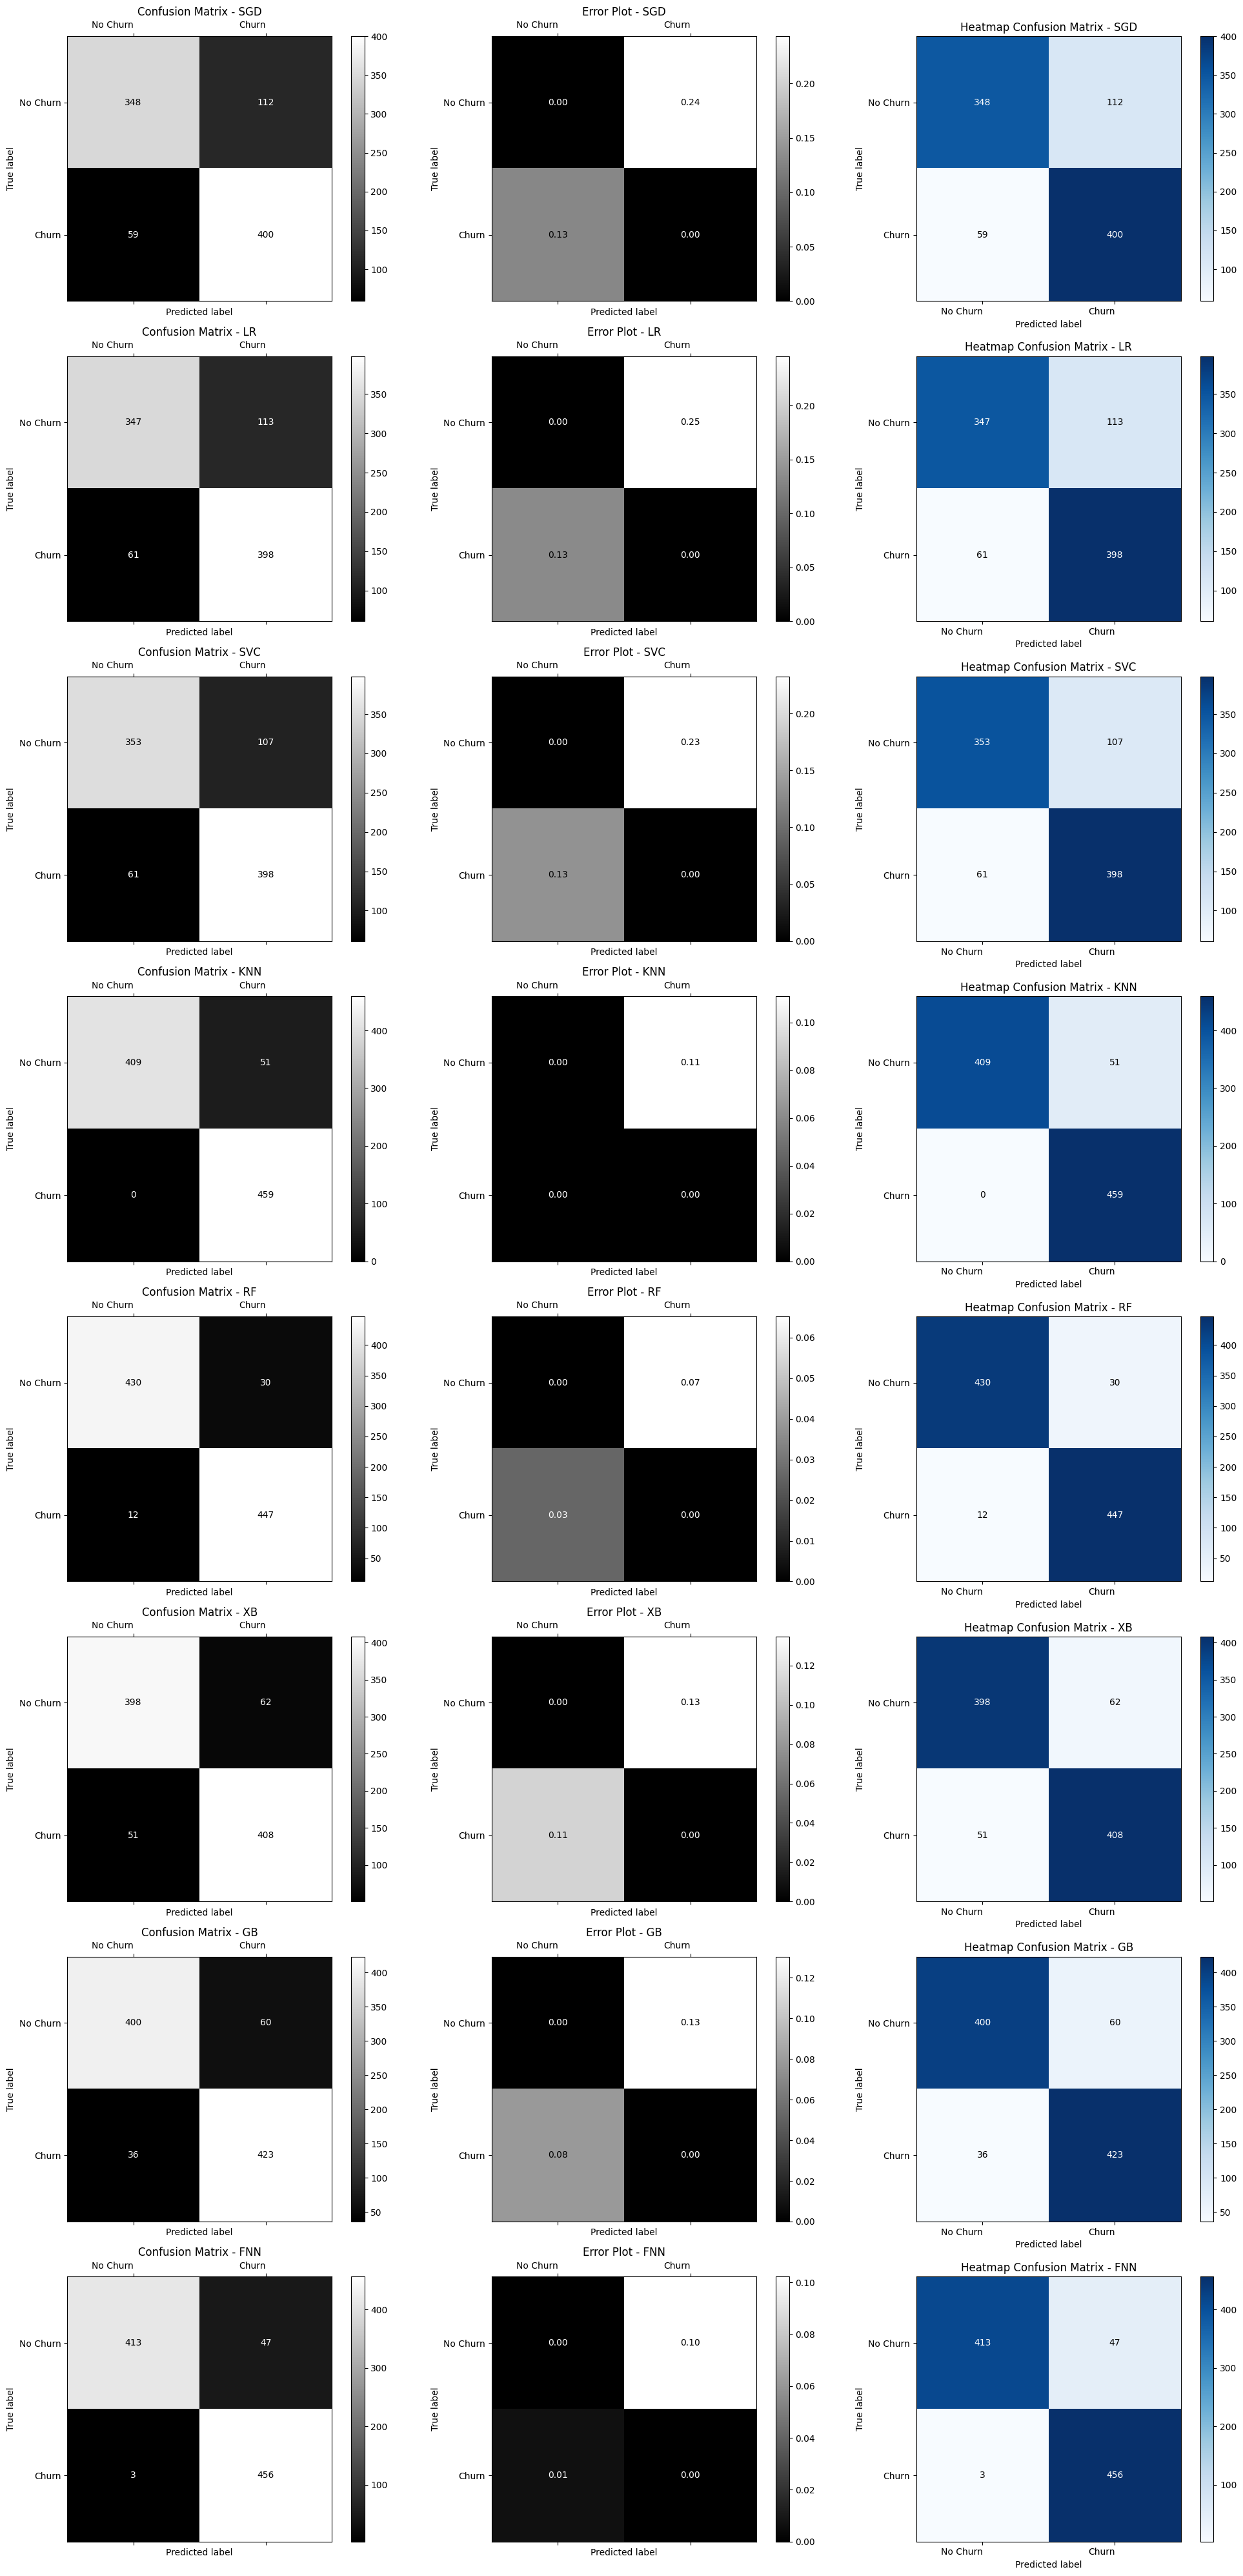

In [114]:
# Define target names for confusion matrix
target_names = ['No Churn', 'Churn'] 

# Number of rows needed for subplots (3 plots per model)
num_rows = len(models)

# Create figure and axes
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5*num_rows))

for idx, (model_name, classifier) in enumerate(models):
    y_pred_plot = eval_results_tuned[model_name]['Predictions'] 
    y_true_plot = y_eval

    # Compute confusion matrix
    cm = confusion_matrix(y_true_plot, y_pred_plot)

    # Compute normalized confusion matrix (as a percentage of true class)
    row_sums = cm.sum(axis=1, keepdims=True)
    norm_cm = cm / row_sums

    # Fill diagonal with zeros for better visualization of errors
    np.fill_diagonal(norm_cm, 0)  

    # Plot raw confusion matrix
    ax = axes[idx, 0]
    mt = ax.matshow(cm, cmap=plt.cm.gray)
    ax.set_title(f"Confusion Matrix - {model_name}")
    ax.set_xticks(np.arange(len(target_names)))
    ax.set_yticks(np.arange(len(target_names)))
    ax.set_xticklabels(target_names)
    ax.set_yticklabels(target_names)
    plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fig.colorbar(mt, ax=ax)
    ax.grid(False)  # Remove grid lines

    # Annotate each cell with the numerical values
    for i in range(len(target_names)):
        for j in range(len(target_names)):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="black" if cm[i, j] > cm.max() / 2. else "white")

    # Plot normalized confusion matrix (error plot)
    ax = axes[idx, 1]
    mt = ax.matshow(norm_cm, cmap=plt.cm.gray)
    ax.set_title(f"Error Plot - {model_name}")
    ax.set_xticks(np.arange(len(target_names)))
    ax.set_yticks(np.arange(len(target_names)))
    ax.set_xticklabels(target_names)
    ax.set_yticklabels(target_names)
    plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fig.colorbar(mt, ax=ax)
    ax.grid(False)  # Remove grid lines

    # Annotate each cell with the numerical values
    for i in range(len(target_names)):
        for j in range(len(target_names)):
            ax.text(j, i, format(norm_cm[i, j], '.2f'),
                    ha="center", va="center",
                    color="black" if norm_cm[i, j] > norm_cm.max() / 2. else "white")

    # Plot heatmap confusion matrix
    ax = axes[idx, 2]
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(f"Heatmap Confusion Matrix - {model_name}")
    ax.set_xticks(np.arange(len(target_names)))
    ax.set_yticks(np.arange(len(target_names)))
    ax.set_xticklabels(target_names)
    ax.set_yticklabels(target_names)
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fig.colorbar(im, ax=ax)
    ax.grid(False)  # Remove grid lines

    # Annotate each cell with the numerical values
    for i in range(len(target_names)):
        for j in range(len(target_names)):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.tight_layout()
plt.show()

##### Hyper Tuned Model ROC Curve

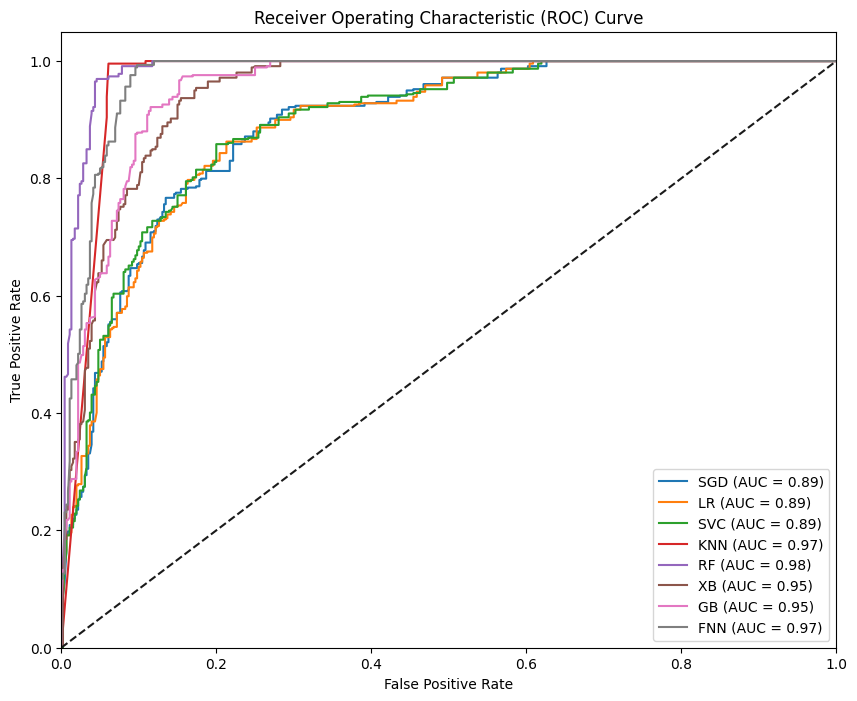

In [115]:
# Initialize results dictionary
roc_eval_results_tuned = {}

plt.figure(figsize=(10, 8))
for model_name, metrics in eval_results_tuned.items():
    y_prob = metrics['y_prob']
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_eval, y_prob, pos_label=1)
    auc_score = metrics['ROC AUC Score']

    roc_curve_data_F = pd.DataFrame({
        'False positive':fpr,
        'True positive': tpr,
        'Threshold': thresholds,

    })
    
    # Add ROC curve data to the table
    roc_eval_results_tuned[model_name] = roc_curve_data_F

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()

In [79]:
# Check optimal threshold valuse for least performing model
roc_eval_results_tuned['LR'].tail(50)

False positive  True positive  Threshold
484        0.518868       0.951417   0.218331
485        0.518868       0.955466   0.217263
486        0.539084       0.955466   0.202351
487        0.539084       0.958165   0.201848
488        0.553908       0.958165   0.189469
489        0.553908       0.959514   0.187680
490        0.559299       0.959514   0.185697
491        0.559299       0.960864   0.185064
492        0.564690       0.960864   0.182583
493        0.564690       0.963563   0.182451
494        0.575472       0.963563   0.175047
495        0.575472       0.964912   0.175012
496        0.595687       0.964912   0.164027
497        0.595687       0.967611   0.160175
498        0.597035       0.967611   0.160119
499        0.597035       0.968961   0.159758
500        0.603774       0.968961   0.148249
501        0.603774       0.971660   0.144963
502        0.607817       0.971660   0.142367
503        0.607817       0.973009   0.142264
504        0.610512       0.973009   0.139081
505        0.610512       0.974359   0.138549
506        0.613208       0.974359   0.136666
507        0.613208       0.977058   0.135237
508        0.613208       0.978408   0.134975
509        0.618598       0.978408   0.132304
510        0.618598       0.979757   0.131844
511        0.622642       0.979757   0.129917
512        0.622642       0.981107   0.129805
513        0.630728       0.981107   0.122277
514        0.630728       0.985155   0.118439
515        0.650943       0.985155   0.106690
516        0.650943       0.986505   0.106654
517        0.656334       0.986505   0.105149
518        0.656334       0.987854   0.104961
519        0.657682       0.987854   0.104320
520        0.657682       0.989204   0.104072
521        0.704852       0.989204   0.076927
522        0.704852       0.991903   0.076325
523        0.722372       0.991903   0.068403
524        0.722372       0.993252   0.068304
525        0.734501       0.993252   0.066894
526        0.734501       0.995951   0.065413
527        0.754717       0.995951   0.057798
528        0.754717       0.997301   0.056939
529        0.761456       0.997301   0.054516
530        0.761456       0.998650   0.054226
531        0.981132       0.998650   0.012401
532        0.981132       1.000000   0.012150
533        1.000000       1.000000   0.004311

#### Model Comparison & Selection

1. **Random Forest (RF):**
   - **Strengths:**
     - Highest ROC AUC Score (0.947976): Indicates that RF has the best ability to distinguish between churn and non-churn classes.
     - High Recall (0.94332): RF captures a large portion of actual churn cases, reducing the chance of missing churners.
     - High F1 Score (0.895006): Balances precision and recall effectively, indicating strong overall performance.
     - Low Log Loss (0.309048): Indicates well-calibrated probabilities and strong performance in probabilistic predictions.
   - **Impact:**
     - A high recall and ROC AUC score ensure that the model effectively identifies churners, which is crucial for retention strategies. The F1 score and low log loss further affirm its robustness.

2. **XGBoost (XB):**
   - **Strengths:**
     - High ROC AUC Score (0.899407): Second best at distinguishing between churn and non-churn classes.
     - Good Precision (0.815245) and F1 Score (0.833003): Indicates reliable performance with a reasonable balance between precision and recall.
     - Good Recall (0.851552): Adequately captures churn cases.
   - **Impact:**
     - The high ROC AUC and reasonable precision and recall make it a strong candidate for predicting churn. Though slightly behind RF in some metrics, it still provides reliable performance.

#### Model Persistence

##### Encoder

In [80]:
# Save the churn encoder using pickle
model_filename = '../models/churn_encoder.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(churn_encoder, model_file)
print(f"Encoder saved as pkl: {model_filename}")

Encoder saved as pkl: ../Models/churn_encoder.pkl


In [304]:
# Save the churn encoder using joblib
model_filename = '../models/churn_encoder.joblib'
joblib.dump(churn_encoder, model_filename)
print(f"Encoder saved as joblib: {model_filename}")

Encoder saved as joblib: ../models/churn_encoder.joblib


In [116]:
# Save the churn encoder using joblib
model_filename = '../models/churn_encoder_s.joblib'
joblib.dump(churn_encoder_s, model_filename)
print(f"Encoder saved as joblib: {model_filename}")

Encoder saved as joblib: ../models/churn_encoder_s.joblib


##### Preprocessor

In [82]:
# Save the churn preprocessor using pickle
model_filename = '../Models/churn_preprocessor.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(preprocessor, model_file)
print(f"Preprocessor saved as pkl: {model_filename}")

Preprocessor saved as pkl: ../Models/churn_preprocessor.pkl


In [83]:
# Save the churn preprocessor using joblib
model_filename = '../Models/churn_preprocessor.joblib'
joblib.dump(preprocessor, model_filename)
print(f"Preprocessor saved as joblib: {model_filename}")

Preprocessor saved as joblib: ../Models/churn_preprocessor.joblib


In [85]:
# Function to save the preprocessor using both pickle and joblib
def save_model(transformer, transformer_name):
    pickle_filename = f'../Models/{transformer_name}.pkl'
    joblib_filename = f'../Models/{transformer_name}.joblib'
    
    # Save using pickle
    with open(pickle_filename, 'wb') as file:
        pickle.dump(transformer, file)
    
    # Save using joblib
    joblib.dump(transformer, joblib_filename)

# Access and save the numeric transformers
numeric_transformers = preprocessor.named_transformers_['num'].named_steps

# Save the SimpleImputer
num_imputer = numeric_transformers['num_imputer']
save_model(num_imputer, 'churn_num_imputer')

# Save the RobustScaler
robust_scaler = numeric_transformers['rob']
save_model(robust_scaler, 'churn_robust_scaler')

# Save the QuantileTransformer
quantile_transformer = numeric_transformers['quantile_transform']
save_model(quantile_transformer, 'churn_quantile_transformer')

# Access and save the categorical transformers
categorical_transformers = preprocessor.named_transformers_['cat'].named_steps

# Save the SimpleImputer
cat_imputer = categorical_transformers['cat_imputer']
save_model(cat_imputer, 'churn_cat_imputer')

# Save the OneHotEncoder
one_hot_encoder = categorical_transformers['onehot']
save_model(one_hot_encoder, 'churn_onehotencoder')

##### Pipeline

In [86]:
# Save the churn pipeline using pickle
model_filename = '../Models/churn_pipeline.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(pipeline, model_file)
print(f"Pipeline saved as pkl: {model_filename}")

Pipeline saved as pkl: ../Models/churn_pipeline.pkl


In [87]:
# Save the churn preprocessor using joblib
model_filename = '../Models/churn_pipeline.joblib'
joblib.dump(pipeline, model_filename)
print(f"Pipeline saved as joblib: {model_filename}")

Pipeline saved as joblib: ../Models/churn_pipeline.joblib


##### Models

- **Selected Models before Hyperparmeter Tunning**

In [268]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# Define save path for models
save_path = "../models/"

# Create the save directory if it does not exist
if not os.path.exists(save_path):
    os.makedirs(save_path)
    logger.info(f"Created directory: {save_path}")

# List of models to save
models_to_save = ['KNN', 'FNN', 'RF']

# Function to fit, log, and save each pipeline
def fit_and_save_pipeline(model_name, classifier, X_train, y_train, models_to_save):
    start_time = time.time()
    logger.info(f"Starting fitting for model: {model_name}")
    
    # Create and fit the pipeline
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('ovr', over_sampler),
        ('model', classifier)
    ])
    
    try:
        # Fit the model
        pipeline.fit(X_train, y_train)
        elapsed_time = time.time() - start_time
        logger.info(f"Completed fitting for model: {model_name} in {elapsed_time:.2f} seconds.")
        
        # Save the pipeline if it is in the models_to_save list
        if model_name in models_to_save:
            save_start_time = time.time()  
            model_save_path = f'{save_path}{model_name}_pipeline.joblib'  # Use save_path
            dump(pipeline, model_save_path)
            save_elapsed_time = time.time() - save_start_time  
            logger.info(f"Saved {model_name} pipeline successfully in {save_elapsed_time:.2f} seconds at {model_save_path}.")
        
    except Exception as e:
        logger.error(f"Error fitting or saving model {model_name}: {e}")

# Parallel fitting of pipelines
Parallel(n_jobs=-1)(delayed(fit_and_save_pipeline)(model_name, classifier, X_train, y_train, models_to_save)
                   for model_name, classifier in models)

[None, None, None, None, None, None, None, None]

In [88]:
# Define the path where models will be saved
save_path = "../Models/"

# Ensure the directory exists, create if not
os.makedirs(save_path, exist_ok=True)

# Loop through the grid_searches_tuned dictionary to save models
for model_name, grid_search in grid_searches_tuned.items():
    # Get the best estimator (the model with the best hyperparameters)
    best_model = grid_search.best_estimator_
    
    # Define the filenames for joblib and pkl
    joblib_filename = os.path.join(save_path, f"{model_name}_model.joblib")
    pkl_filename = os.path.join(save_path, f"{model_name}_model.pkl")
    
    # Save the model in joblib format
    joblib.dump(best_model, joblib_filename)
    print(f"Model saved as joblib: {joblib_filename}")
    
    # Save the model in pkl format
    with open(pkl_filename, 'wb') as pkl_file:
        pickle.dump(best_model, pkl_file)
    print(f"Model saved as pkl: {pkl_filename}")

Model saved as joblib: ../Models/KNN_model.joblib
Model saved as pkl: ../Models/KNN_model.pkl
Model saved as joblib: ../Models/LR_model.joblib
Model saved as pkl: ../Models/LR_model.pkl
Model saved as joblib: ../Models/RF_model.joblib
Model saved as pkl: ../Models/RF_model.pkl
Model saved as joblib: ../Models/SVC_model.joblib
Model saved as pkl: ../Models/SVC_model.pkl
Model saved as joblib: ../Models/GB_model.joblib
Model saved as pkl: ../Models/GB_model.pkl
Model saved as joblib: ../Models/XB_model.joblib
Model saved as pkl: ../Models/XB_model.pkl
Model saved as joblib: ../Models/FNN_model.joblib
Model saved as pkl: ../Models/FNN_model.pkl


### Business Impact Assessment and Documentation of the Model

**Importance for Churn Rate**

In the context of predicting customer churn, it is critical to prioritize recall and log loss over precision and accuracy due to their practical implications:

- **Recall:** High recall ensures that the majority of actual churners are correctly identified, minimizing false negatives. This is crucial because each missed churner represents a lost customer, which could have been retained through targeted interventions.
   
- **Log Loss:** Log loss evaluates the confidence of model predictions, ensuring that the model not only makes correct predictions but is also confident in its predictions. This confidence is essential for making reliable decisions, particularly when assessing the risk of churn.
   
- **Recall over Precision:** While precision ensures that the predicted churners are mostly actual churners, it is acceptable to have a lower precision if it means reducing the number of missed churners (false negatives). Intervening with non-churners (false positives) might incur some cost but is less damaging than losing customers without any intervention.

- **Log Loss over Accuracy:** Two models might achieve similar accuracy, but the one with a lower log loss is preferred because it provides more reliable probabilistic predictions. This is critical for effective decision-making and resource allocation in customer retention strategies.

- **Choosing the Right Metric:**
    - **Imbalanced Dataset:** For imbalanced datasets, F1 Score and Weighted Accuracy are generally more reliable metrics. The F1 Score focuses on the performance of the minority class by balancing precision and recall, while Weighted Accuracy provides an overall performance measure that accounts for the distribution of classes. Other useful metrics include the ROC AUC Score, which evaluates the ability of the model to distinguish between classes across all threshold levels, and the Precision-Recall AUC Score, which is particularly useful when the positive class is the minority.
   
    - **Balanced Dataset:** Accuracy, the ratio of correctly predicted instances to total instances, is more meaningful in balanced datasets. Precision and Recall too become equally important without the risk of biasing towards the majority class. The F1 Score continues to be valuable by providing a harmonic mean of Precision and Recall. Macro average is particularly useful for providing a more balanced evaluation when all classes are of equal importance, as it avoids being dominated by the performance on the most prevalent class. Additionally, metrics like Balanced Accuracy, which averages the recall obtained on each class, and the Confusion Matrix, which provides a detailed breakdown of correct and incorrect predictions for each class, are useful.

- **Choosing the Best Model:**
  - **Best Model: Random Forest (RF)**
    - **Reason**: Random Forest offers the highest ROC AUC score, indicating superior ability to distinguish between churners and non-churners. Its high recall ensures that most churners are identified, which is vital for retention efforts. Additionally, its excellent F1 score and low log loss demonstrate overall reliability and accuracy, making it the best model for predicting telco churn.

  - **Second Best Model: XGBoost (XB)**
    - **Reason**: XGBoost performs consistently well across all metrics, with a high ROC AUC score and good recall. This makes it a reliable alternative to Random Forest, ensuring that a substantial portion of churners is identified and that the predictions are reasonably confident.

- **Practical Implications**
  - **High Recall:** Ensuring that most churners are identified allows the company to intervene effectively, reducing the churn rate and improving customer retention.
  
  - **Low Log Loss:** Reliable probabilistic predictions enable the company to prioritize interventions based on the predicted risk of churn, optimizing resource allocation and strategic planning.
  
  - **Balanced Metrics:** Using models with a good balance of precision, recall, and F1 score ensures that the interventions are both effective and efficient, minimizing unnecessary costs while maximizing retention.

In summary, selecting Random Forest as the primary model, with XGBoost as a strong alternative, provides a robust strategy for predicting customer churn. These models' high recall and low log loss ensure effective identification and intervention for potential churners, ultimately supporting the company's retention efforts and strategic planning.

[Back to Top](#Table-of-Contents)

## Step 6: Testing Model

### Data Quality Assessment and Preparation

In [184]:
# Copy DataFrame
df_test_model = df_test.copy()

#Display info of test data
df_test_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190063 entries, 0 to 190062
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         190063 non-null  object 
 1   REGION          115330 non-null  object 
 2   TENURE          190063 non-null  object 
 3   MONTANT         123695 non-null  float64
 4   FREQUENCE_RECH  123695 non-null  float64
 5   REVENUE         126422 non-null  float64
 6   ARPU_SEGMENT    126422 non-null  float64
 7   FREQUENCE       126422 non-null  float64
 8   DATA_VOLUME     96716 non-null   float64
 9   ON_NET          120771 non-null  float64
 10  ORANGE          111417 non-null  float64
 11  TIGO            76555 non-null   float64
 12  ZONE1           14850 non-null   float64
 13  ZONE2           12011 non-null   float64
 14  MRG             190063 non-null  object 
 15  REGULARITY      190063 non-null  int64  
 16  TOP_PACK        110773 non-null  object 
 17  FREQ_TOP_P

In [185]:
# Determine the proportion of missing values
missing_percentage = (df_test_model.isnull().mean() * 100).round(2)

# Check for duplicated values
duplicate_count = df_test_model.duplicated(subset=None, keep=False).sum()

# Display Results
print("Proportion of missing values in df_test_model dataset:\n")
print(missing_percentage)
print("\nNumber of duplicated rows in df_test_model dataset:", duplicate_count)

Proportion of missing values in df_test_model dataset:

user_id            0.00
REGION            39.32
TENURE             0.00
MONTANT           34.92
FREQUENCE_RECH    34.92
REVENUE           33.48
ARPU_SEGMENT      33.48
FREQUENCE         33.48
DATA_VOLUME       49.11
ON_NET            36.46
ORANGE            41.38
TIGO              59.72
ZONE1             92.19
ZONE2             93.68
MRG                0.00
REGULARITY         0.00
TOP_PACK          41.72
FREQ_TOP_PACK     41.72
dtype: float64

Number of duplicated rows in df_test_model dataset: 0


In [186]:
# Apply the classification function to the TOP_PACK column
df_test_model['TOP_PACK'] = df_test_model['TOP_PACK'].apply(classify_top_pack)

# Print the unique values to confirm the changes
print(df_test_model['TOP_PACK'].unique())

['Voice Package' nan 'Data Package' 'IVR Package' 'Jokko Package'
 'Twitter Package' 'Other Package' 'Pilot Package'
 'Subscription or Bonus Package' 'Facebook Package' 'Combo Package'
 'EVC Package']


In [187]:
# Set 'user_id' column as the index of the DataFrame
df_test_model.set_index('user_id', inplace=True)

# Display the first few rows of the DataFrame to verify changes
df_test_model.head()

REGION         TENURE  MONTANT  \
user_id                                                                         
51fe4c3347db1f8571d18ac03f716c41acee30a4        MATAM  I 18-21 month   2500.0   
5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e          NaN   K > 24 month      NaN   
5a4db591c953a8d8f373877fad37aaf4268899a1          NaN   K > 24 month      NaN   
8bf9b4d8880aeba1c9a0da48be78f12e629be37c          NaN   K > 24 month      NaN   
c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df  SAINT-LOUIS   K > 24 month   5100.0   

                                          FREQUENCE_RECH  REVENUE  \
user_id                                                             
51fe4c3347db1f8571d18ac03f716c41acee30a4             5.0   2500.0   
5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e             NaN      NaN   
5a4db591c953a8d8f373877fad37aaf4268899a1             NaN      NaN   
8bf9b4d8880aeba1c9a0da48be78f12e629be37c             NaN      NaN   
c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df             7.0   5637.0   

                                          ARPU_SEGMENT  FREQUENCE  \
user_id                                                             
51fe4c3347db1f8571d18ac03f716c41acee30a4         833.0        5.0   
5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e           NaN        NaN   
5a4db591c953a8d8f373877fad37aaf4268899a1           NaN        NaN   
8bf9b4d8880aeba1c9a0da48be78f12e629be37c           NaN        NaN   
c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df        1879.0       15.0   

                                          DATA_VOLUME  ON_NET  ORANGE  TIGO  \
user_id                                                                       
51fe4c3347db1f8571d18ac03f716c41acee30a4          0.0    64.0    70.0   NaN   
5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e          NaN     NaN     NaN   NaN   
5a4db591c953a8d8f373877fad37aaf4268899a1          0.0     NaN     NaN   NaN   
8bf9b4d8880aeba1c9a0da48be78f12e629be37c          NaN     NaN     NaN   NaN   
c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df       7783.0    30.0    24.0   0.0   

                                          ZONE1  ZONE2 MRG  REGULARITY  \
user_id                                                                  
51fe4c3347db1f8571d18ac03f716c41acee30a4    NaN    NaN  NO          35   
5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e    NaN    NaN  NO           2   
5a4db591c953a8d8f373877fad37aaf4268899a1    NaN    NaN  NO          22   
8bf9b4d8880aeba1c9a0da48be78f12e629be37c    NaN    NaN  NO           6   
c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df    0.0    NaN  NO          60   

                                               TOP_PACK  FREQ_TOP_PACK  
user_id                                                                 
51fe4c3347db1f8571d18ac03f716c41acee30a4  Voice Package            5.0  
5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e            NaN            NaN  
5a4db591c953a8d8f373877fad37aaf4268899a1            NaN            NaN  
8bf9b4d8880aeba1c9a0da48be78f12e629be37c            NaN            NaN  
c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df   Data Package            4.0

In [188]:
# Calculate the number of missing values in each column
missing_values = df_test_model.isna().sum()

# Filter columns with no missing values
columns_no_missing = missing_values[missing_values == 0].index

# Print the number of columns with no missing values
print(f'Number of columns with no missing values: {len(columns_no_missing)}\n')

# Print the names of these columns
print(f'Columns with no missing values: {columns_no_missing.tolist()}\n')

# Print the total number of columns with missing values
print(f'Number of columns with missing values: {df_test_model.shape[1] - len(columns_no_missing)}')

Number of columns with no missing values: 3

Columns with no missing values: ['TENURE', 'MRG', 'REGULARITY']

Number of columns with missing values: 14


In [189]:
# Calculate the threshold for non-NA values to retain rows
threshold = len(columns_no_missing) + 1

# Print the calculated threshold for retaining rows with sufficient non-NA values
print(f'Threshold to retain non-NA values: {threshold}\n')

# Print the number of rows with fewer than the threshold non-NA values before dropping rows
print(f'Before dropna: {(df_test_model.notna().sum(axis=1) < threshold).sum()}\n')

# Drop rows with fewer than the threshold non-NA values
df_test_model.dropna(thresh=threshold, inplace=True)

# Print the number of rows with fewer than the threshold non-NA values after dropping rows
print(f'After dropna: {(df_test_model.notna().sum(axis=1) < threshold).sum()}')

# Display the first few rows of the DataFrame to check the result of the drop operation
df_test_model.head()

Threshold to retain non-NA values: 4

Before dropna: 36702

After dropna: 0


REGION         TENURE  MONTANT  \
user_id                                                                         
51fe4c3347db1f8571d18ac03f716c41acee30a4        MATAM  I 18-21 month   2500.0   
5a4db591c953a8d8f373877fad37aaf4268899a1          NaN   K > 24 month      NaN   
c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df  SAINT-LOUIS   K > 24 month   5100.0   
82efb8dd7e44792e0fc089388013e90b671ec2b3  TAMBACOUNDA   K > 24 month      NaN   
e803ce97eee6f699cb39f12cb50e85e66bcd7c9f          NaN   K > 24 month   1000.0   

                                          FREQUENCE_RECH  REVENUE  \
user_id                                                             
51fe4c3347db1f8571d18ac03f716c41acee30a4             5.0   2500.0   
5a4db591c953a8d8f373877fad37aaf4268899a1             NaN      NaN   
c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df             7.0   5637.0   
82efb8dd7e44792e0fc089388013e90b671ec2b3             NaN      NaN   
e803ce97eee6f699cb39f12cb50e85e66bcd7c9f             1.0    752.0   

                                          ARPU_SEGMENT  FREQUENCE  \
user_id                                                             
51fe4c3347db1f8571d18ac03f716c41acee30a4         833.0        5.0   
5a4db591c953a8d8f373877fad37aaf4268899a1           NaN        NaN   
c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df        1879.0       15.0   
82efb8dd7e44792e0fc089388013e90b671ec2b3           NaN        NaN   
e803ce97eee6f699cb39f12cb50e85e66bcd7c9f         251.0        4.0   

                                          DATA_VOLUME  ON_NET  ORANGE  TIGO  \
user_id                                                                       
51fe4c3347db1f8571d18ac03f716c41acee30a4          0.0    64.0    70.0   NaN   
5a4db591c953a8d8f373877fad37aaf4268899a1          0.0     NaN     NaN   NaN   
c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df       7783.0    30.0    24.0   0.0   
82efb8dd7e44792e0fc089388013e90b671ec2b3          1.0     NaN     NaN   NaN   
e803ce97eee6f699cb39f12cb50e85e66bcd7c9f          NaN     2.0     4.0   NaN   

                                          ZONE1  ZONE2 MRG  REGULARITY  \
user_id                                                                  
51fe4c3347db1f8571d18ac03f716c41acee30a4    NaN    NaN  NO          35   
5a4db591c953a8d8f373877fad37aaf4268899a1    NaN    NaN  NO          22   
c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df    0.0    NaN  NO          60   
82efb8dd7e44792e0fc089388013e90b671ec2b3    NaN    NaN  NO          15   
e803ce97eee6f699cb39f12cb50e85e66bcd7c9f    NaN    NaN  NO           9   

                                               TOP_PACK  FREQ_TOP_PACK  
user_id                                                                 
51fe4c3347db1f8571d18ac03f716c41acee30a4  Voice Package            5.0  
5a4db591c953a8d8f373877fad37aaf4268899a1            NaN            NaN  
c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df   Data Package            4.0  
82efb8dd7e44792e0fc089388013e90b671ec2b3            NaN            NaN  
e803ce97eee6f699cb39f12cb50e85e66bcd7c9f  Voice Package            1.0

In [190]:
# Determine the proportion of missing values
missing_percentage = (df_test_model.isnull().mean() * 100).round(2)

# Check for duplicated values
duplicate_count = df_test_model.duplicated(subset=None, keep=False).sum()

# Display Results
print("Proportion of missing values in df_test_model dataset:\n")
print(missing_percentage)
print("\nNumber of duplicated rows in df_test_model dataset:", duplicate_count)

Proportion of missing values in df_test_model dataset:

REGION            24.80
TENURE             0.00
MONTANT           19.34
FREQUENCE_RECH    19.34
REVENUE           17.57
ARPU_SEGMENT      17.57
FREQUENCE         17.57
DATA_VOLUME       36.94
ON_NET            21.25
ORANGE            27.35
TIGO              50.08
ZONE1             90.32
ZONE2             92.17
MRG                0.00
REGULARITY         0.00
TOP_PACK          27.77
FREQ_TOP_PACK     27.77
dtype: float64

Number of duplicated rows in df_test_model dataset: 17882


In [191]:
# Display summary statistics for all numeric columns in the DataFrame
df_test_model.describe().T

count         mean           std   min     25%     50%  \
MONTANT         123695.0  5506.547759   7063.107301  25.0  1000.0  3000.0   
FREQUENCE_RECH  123695.0    11.483940     13.181700   1.0     2.0     7.0   
REVENUE         126422.0  5486.233417   7130.567766   1.0  1000.0  3000.0   
ARPU_SEGMENT    126422.0  1828.750281   2376.852027   0.0   333.0  1000.0   
FREQUENCE       126422.0    13.939670     14.623402   1.0     3.0     9.0   
DATA_VOLUME      96716.0  3358.421151  12024.079200   0.0     0.0   265.0   
ON_NET          120771.0   281.210613    886.496878   0.0     5.0    27.0   
ORANGE          111417.0    94.611639    202.594409   0.0     7.0    28.0   
TIGO             76555.0    22.952270     64.902240   0.0     2.0     6.0   
ZONE1            14850.0     8.135421     46.050513   0.0     0.0     1.0   
ZONE2            12011.0     7.696944     29.781456   0.0     0.0     2.0   
REGULARITY      153361.0    33.717105     21.052663   1.0    13.0    34.0   
FREQ_TOP_PACK   110773.0     9.234326     12.159080   1.0     2.0     5.0   

                   75%       max  
MONTANT         7300.0  201500.0  
FREQUENCE_RECH    16.0     120.0  
REVENUE         7319.0  177322.0  
ARPU_SEGMENT    2440.0   59107.0  
FREQUENCE         19.0      91.0  
DATA_VOLUME     2888.0  754798.0  
ON_NET           156.0   26786.0  
ORANGE            98.0    5695.0  
TIGO              20.0    3083.0  
ZONE1              3.0    3558.0  
ZONE2              5.0     962.0  
REGULARITY        55.0      62.0  
FREQ_TOP_PACK     12.0     390.0

In [192]:
# Display summary statistics for all object (categorical) columns in the DataFrame
df_test_model.describe(include='object').T

count unique            top    freq
REGION    115330     14          DAKAR   45370
TENURE    153361      8   K > 24 month  146259
MRG       153361      1             NO  153361
TOP_PACK  110773     11  Voice Package   68449

In [193]:
# Drop columns where the percentage of missing values is greater than 51%
df_test_model.drop(columns=missing_percentage[missing_percentage > 51].index, inplace=True)

In [194]:
# Fill missing values in TOP_PACK with the most frequent value
df_test_model['TOP_PACK'] = df_test_model['TOP_PACK'].fillna(df_test_model['TOP_PACK'].mode()[0])

# Contextually fill missing values in TOP_PACK_FREQ based on the median of the respective TOP_PACK group
df_test_model['FREQ_TOP_PACK'] = df_test_model.groupby('TOP_PACK')['FREQ_TOP_PACK'].transform(lambda x: x.fillna(x.median()))

# Fill missing values in MONTANT with its overall median
df_test_model['MONTANT'] = df_test_model['MONTANT'].fillna(df_test_model['MONTANT'].median())

# Contextually fill missing values in FREQ_RECH based on the median of the respective MONTANT group
df_test_model['FREQUENCE_RECH'] = df_test_model.groupby('MONTANT')['FREQUENCE_RECH'].transform(lambda x: x.fillna(x.median()))

# Fill missing values in REVENUE with its overall median
df_test_model['REVENUE'] = df_test_model['REVENUE'].fillna(df_test_model['REVENUE'].median())

# Contextually fill missing values in ARPU_SEGMENT based on the median of the respective REVENUE group
df_test_model['ARPU_SEGMENT'] = df_test_model.groupby('REVENUE')['ARPU_SEGMENT'].transform(lambda x: x.fillna(x.median()))

# Contextually fill missing values in FREQUENCE based on the median of the respective REVENUE group
df_test_model['FREQUENCE'] = df_test_model.groupby('REVENUE')['FREQUENCE'].transform(lambda x: x.fillna(x.median()))

# Contextually fill missing values in DATA_VOLUME based on the median of the respective REGION and TENURE groups
df_test_model['DATA_VOLUME'] = df_test_model.groupby(['REGION', 'TENURE'])['DATA_VOLUME'].transform(lambda x: x.fillna(x.median()))

# Contextually fill missing values in TIGO based on the median of the respective REGION and TENURE groups
df_test_model['TIGO'] = df_test_model.groupby(['REGION', 'TENURE'])['TIGO'].transform(lambda x: x.fillna(x.median()))

# Contextually fill missing values in ORANGE based on the median of the respective REGION and TENURE groups
df_test_model['ORANGE'] = df_test_model.groupby(['REGION', 'TENURE'])['ORANGE'].transform(lambda x: x.fillna(x.median()))

In [195]:
# Drop Irrelevant Columns
df_test_model.drop('MRG', axis=1, inplace=True)

In [196]:
# Determine the proportion of missing values
missing_percentage = (df_test_model.isnull().mean() * 100).round(2)

# Check for duplicated values
duplicate_count = df_test_model.duplicated(subset=None, keep=False).sum()

# Display Results
print("Proportion of missing values in df_test_model dataset:\n")
print(missing_percentage)
print("\nNumber of duplicated rows in df_test_model dataset:", duplicate_count)

Proportion of missing values in df_test_model dataset:

REGION            24.80
TENURE             0.00
MONTANT            0.00
FREQUENCE_RECH     0.00
REVENUE            0.00
ARPU_SEGMENT       0.00
FREQUENCE          0.00
DATA_VOLUME       24.80
ON_NET            21.25
ORANGE            24.80
TIGO              24.81
REGULARITY         0.00
TOP_PACK           0.00
FREQ_TOP_PACK      0.00
dtype: float64

Number of duplicated rows in df_test_model dataset: 22729


In [368]:
# Randomly sample 2,500 records from the DataFrame
df_test_sampled = df_test.sample(n=2500, random_state=42)

df_test_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 134293 to 35989
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2500 non-null   object 
 1   REGION          1574 non-null   object 
 2   TENURE          2500 non-null   object 
 3   MONTANT         1700 non-null   float64
 4   FREQUENCE_RECH  1700 non-null   float64
 5   REVENUE         1732 non-null   float64
 6   ARPU_SEGMENT    1732 non-null   float64
 7   FREQUENCE       1732 non-null   float64
 8   DATA_VOLUME     1271 non-null   float64
 9   ON_NET          1644 non-null   float64
 10  ORANGE          1507 non-null   float64
 11  TIGO            1014 non-null   float64
 12  ZONE1           195 non-null    float64
 13  ZONE2           161 non-null    float64
 14  MRG             2500 non-null   object 
 15  REGULARITY      2500 non-null   int64  
 16  TOP_PACK        1523 non-null   object 
 17  FREQ_TOP_PACK   1523 non-null   

In [371]:
# # Save the sampled data to a CSV file
# output_file = '../data/CAP_pred_cl_upload.xlsx'
# df_test_sampled.to_excel(output_file, index=True)

In [197]:
# # Reset the index and drop the 'customerID' column
# df_test_model = df_test_model.reset_index(drop=True)

# Identify object columns to convert to category datatype
object_columns_to_convert = [col for col in df_test_model.select_dtypes(include=['object']).columns]
 
# Convert object columns to category datatype
df_test_model[object_columns_to_convert] = df_test_model[object_columns_to_convert].astype('category')

# Display DataFrame information with deep memory usage
df_test_model.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 153361 entries, 51fe4c3347db1f8571d18ac03f716c41acee30a4 to d592c81971d6120b0d19f9ace85f278ea21b89a0
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   REGION          115330 non-null  category
 1   TENURE          153361 non-null  category
 2   MONTANT         153361 non-null  float64 
 3   FREQUENCE_RECH  153361 non-null  float64 
 4   REVENUE         153361 non-null  float64 
 5   ARPU_SEGMENT    153361 non-null  float64 
 6   FREQUENCE       153361 non-null  float64 
 7   DATA_VOLUME     115322 non-null  float64 
 8   ON_NET          120771 non-null  float64 
 9   ORANGE          115325 non-null  float64 
 10  TIGO            115316 non-null  float64 
 11  REGULARITY      153361 non-null  int64   
 12  TOP_PACK        153361 non-null  category
 13  FREQ_TOP_PACK   153361 non-null  float64 
dtypes: category(3), float64(10), int64(1)
memory usage: 27.5 MB


### Model Evaluation Scores on Test Data

In [198]:
# Initialize dictionaries to store the best estimators and their predictions
best_estimators = {}
y_test_predictions = {}

# Iterate over the list of model names to find their best estimators
for model_name in ['RF', 'FNN', 'KNN']:
    if model_name in grid_searches_tuned:
        # Store the best estimator for the model from the grid search results
        best_estimators[model_name] = grid_searches_tuned[model_name].best_estimator_
    else:
        # Print a message if the model name is not found in the grid search results
        print(f'{model_name} is not found in grid_searches_tuned')

# Iterate over the best estimators to make predictions on the test dataset
for model_name, model in best_estimators.items():
    # Store the predictions for each model
    y_test_predictions[model_name] = model.predict(df_test_model)

# Print the predictions for each model
for model_name, predictions in y_test_predictions.items():
    print(f'\nPredictions for {model_name}:')
    print(predictions)


Predictions for RF:
[0 1 0 ... 0 0 1]

Predictions for FNN:
[0 1 0 ... 0 0 1]

Predictions for KNN:
[0 0 0 ... 0 0 1]


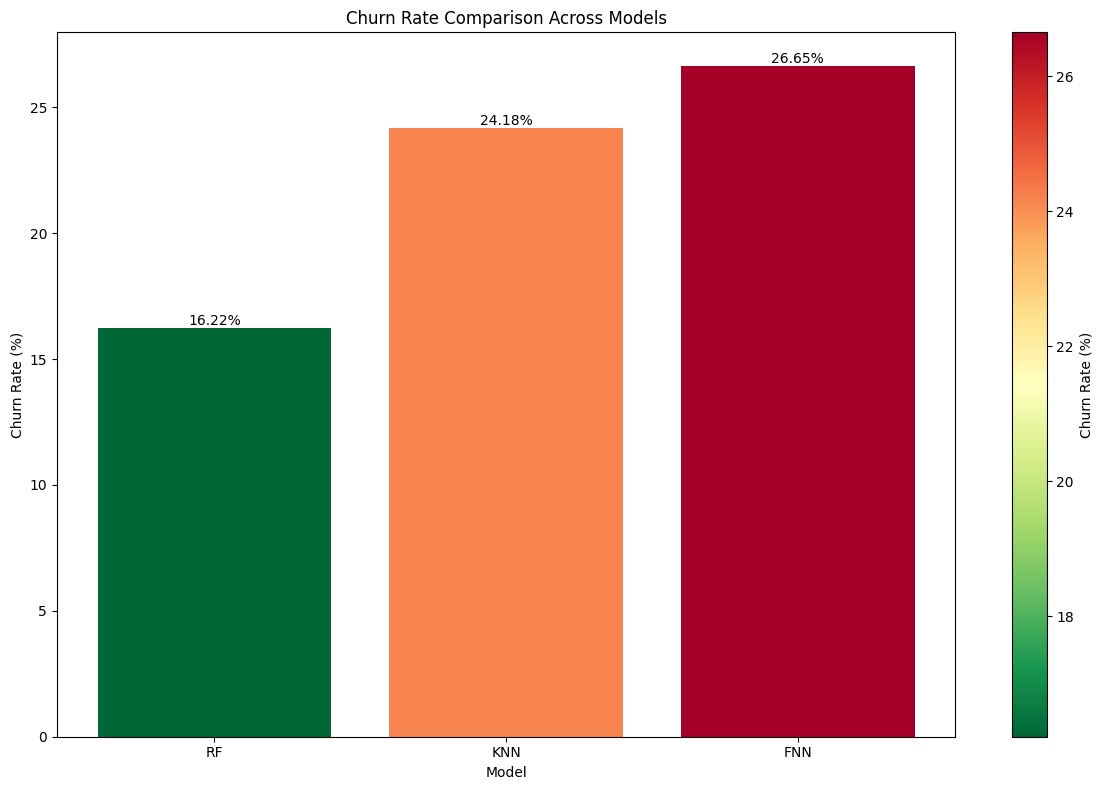

Average Churn Rate across Models: 22.35%


In [200]:
# Inverse transform predictions using the LabelEncoder (to convert back to 'Yes' and 'No')
df_test_predictions = pd.DataFrame()

for model_name, predictions in y_test_predictions.items():
    df_test_predictions[model_name] = churn_encoder_s.inverse_transform(predictions)

# Calculate churn rate for each model (proportion of 'Yes' as a percentage)
churn_rates = {}

for model_name in df_test_predictions.columns:
    churn_rates[model_name] = (df_test_predictions[model_name] == 'Yes').mean() * 100  # Convert to percentage

# Convert churn rates to a sorted dataframe and reset the index starting from 1
churn_rate_df = pd.DataFrame(list(churn_rates.items()), columns=['Model', 'Churn Rate (%)'])
churn_rate_df = churn_rate_df.sort_values(by='Churn Rate (%)').reset_index(drop=True)
churn_rate_df.index += 1  # Start index from 1

# Plot the churn rates using a bar plot with viridis color gradient and figsize 12x8
fig, ax = plt.subplots(figsize=(12, 8))

# Normalize churn rates for the color map
norm = mcolors.Normalize(vmin=churn_rate_df['Churn Rate (%)'].min(), vmax=churn_rate_df['Churn Rate (%)'].max())
cmap = plt.get_cmap('RdYlGn_r')
sm = ScalarMappable(cmap=cmap, norm=norm)

# Plot the bar chart
bars = ax.bar(churn_rate_df['Model'], churn_rate_df['Churn Rate (%)'], color=cmap(norm(churn_rate_df['Churn Rate (%)'])))

# Add data labels on top of each bar as percentages for readability
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Churn Rate (%)')
ax.set_title('Churn Rate Comparison Across Models')

# Add color bar to indicate the gradient
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Churn Rate (%)')

# Display plot
plt.tight_layout()
plt.show()

# Now, style the churn_rate_df DataFrame with a background gradient from green (low) to red (high)
styled_df = churn_rate_df.style.background_gradient(cmap='RdYlGn_r', subset=['Churn Rate (%)'])

# Display the styled DataFrame
display(styled_df)

# Print the average churn rate across all the models
print(f"Average Churn Rate across Models: {churn_rate_df['Churn Rate (%)'].mean().round(2)}%")

In [203]:
# Initialize results dictionary
eval_results_test = {}

# Loop through grid_searches_tuned items
for model_name, grid_search_tuned in grid_searches_tuned.items():
    # Ensure only RF and XB models are processed
    if model_name not in ['RF', 'FNN', 'KNN']:
        continue
    
    # Predict on evaluation data
    y_pred = grid_search_tuned.predict(df_test_model)
   
    # Calculate ROC AUC Score if the model supports probability prediction
    if hasattr(grid_search_tuned.best_estimator_, "predict_proba"):
        y_prob = grid_search_tuned.predict_proba(df_test_model)[:, 1]
        roc_auc = roc_auc_score(predictions, y_prob)
    else:
        print(f"{model_name} model does not support probability prediction.")
        continue

    # Calculate other metrics
    accuracy = accuracy_score(predictions, y_pred)
    f1 = f1_score(predictions, y_pred)
    precision = precision_score(predictions, y_pred)
    recall = recall_score(predictions, y_pred)
    conf_matrix = confusion_matrix(predictions, y_pred)
    logloss = log_loss(predictions, y_prob) if y_prob is not None else None

    # Store the results in eval_results_tuned dictionary
    eval_results_test[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'log_loss': logloss,
        'f1_score': f1,
        'ROC AUC Score': roc_auc,
        'Predictions': y_pred,
        'y_prob': y_prob
    }

# Convert results to DataFrame
df_scores_test = pd.DataFrame(eval_results_test).transpose()
df_scores_test = df_scores_test.drop(['Predictions', 'y_prob'], axis=1)
df_scores_test_sorted = df_scores_test.sort_values(by="ROC AUC Score", ascending=False)

# Print sorted evaluation scores
print("Model Evaluation Scores:")
df_scores_test_sorted.style.background_gradient(subset=['ROC AUC Score'], cmap='Greens')

df_scores_test_styled = df_scores_test_sorted.style \
    .background_gradient(subset=['ROC AUC Score'], cmap='Greens') \
    .background_gradient(subset=['f1_score'], cmap='Greens') \
    .background_gradient(subset=['log_loss'], cmap='Reds')

df_scores_test_styled

Model Evaluation Scores:


### Model Confusin Matrix on Test Data

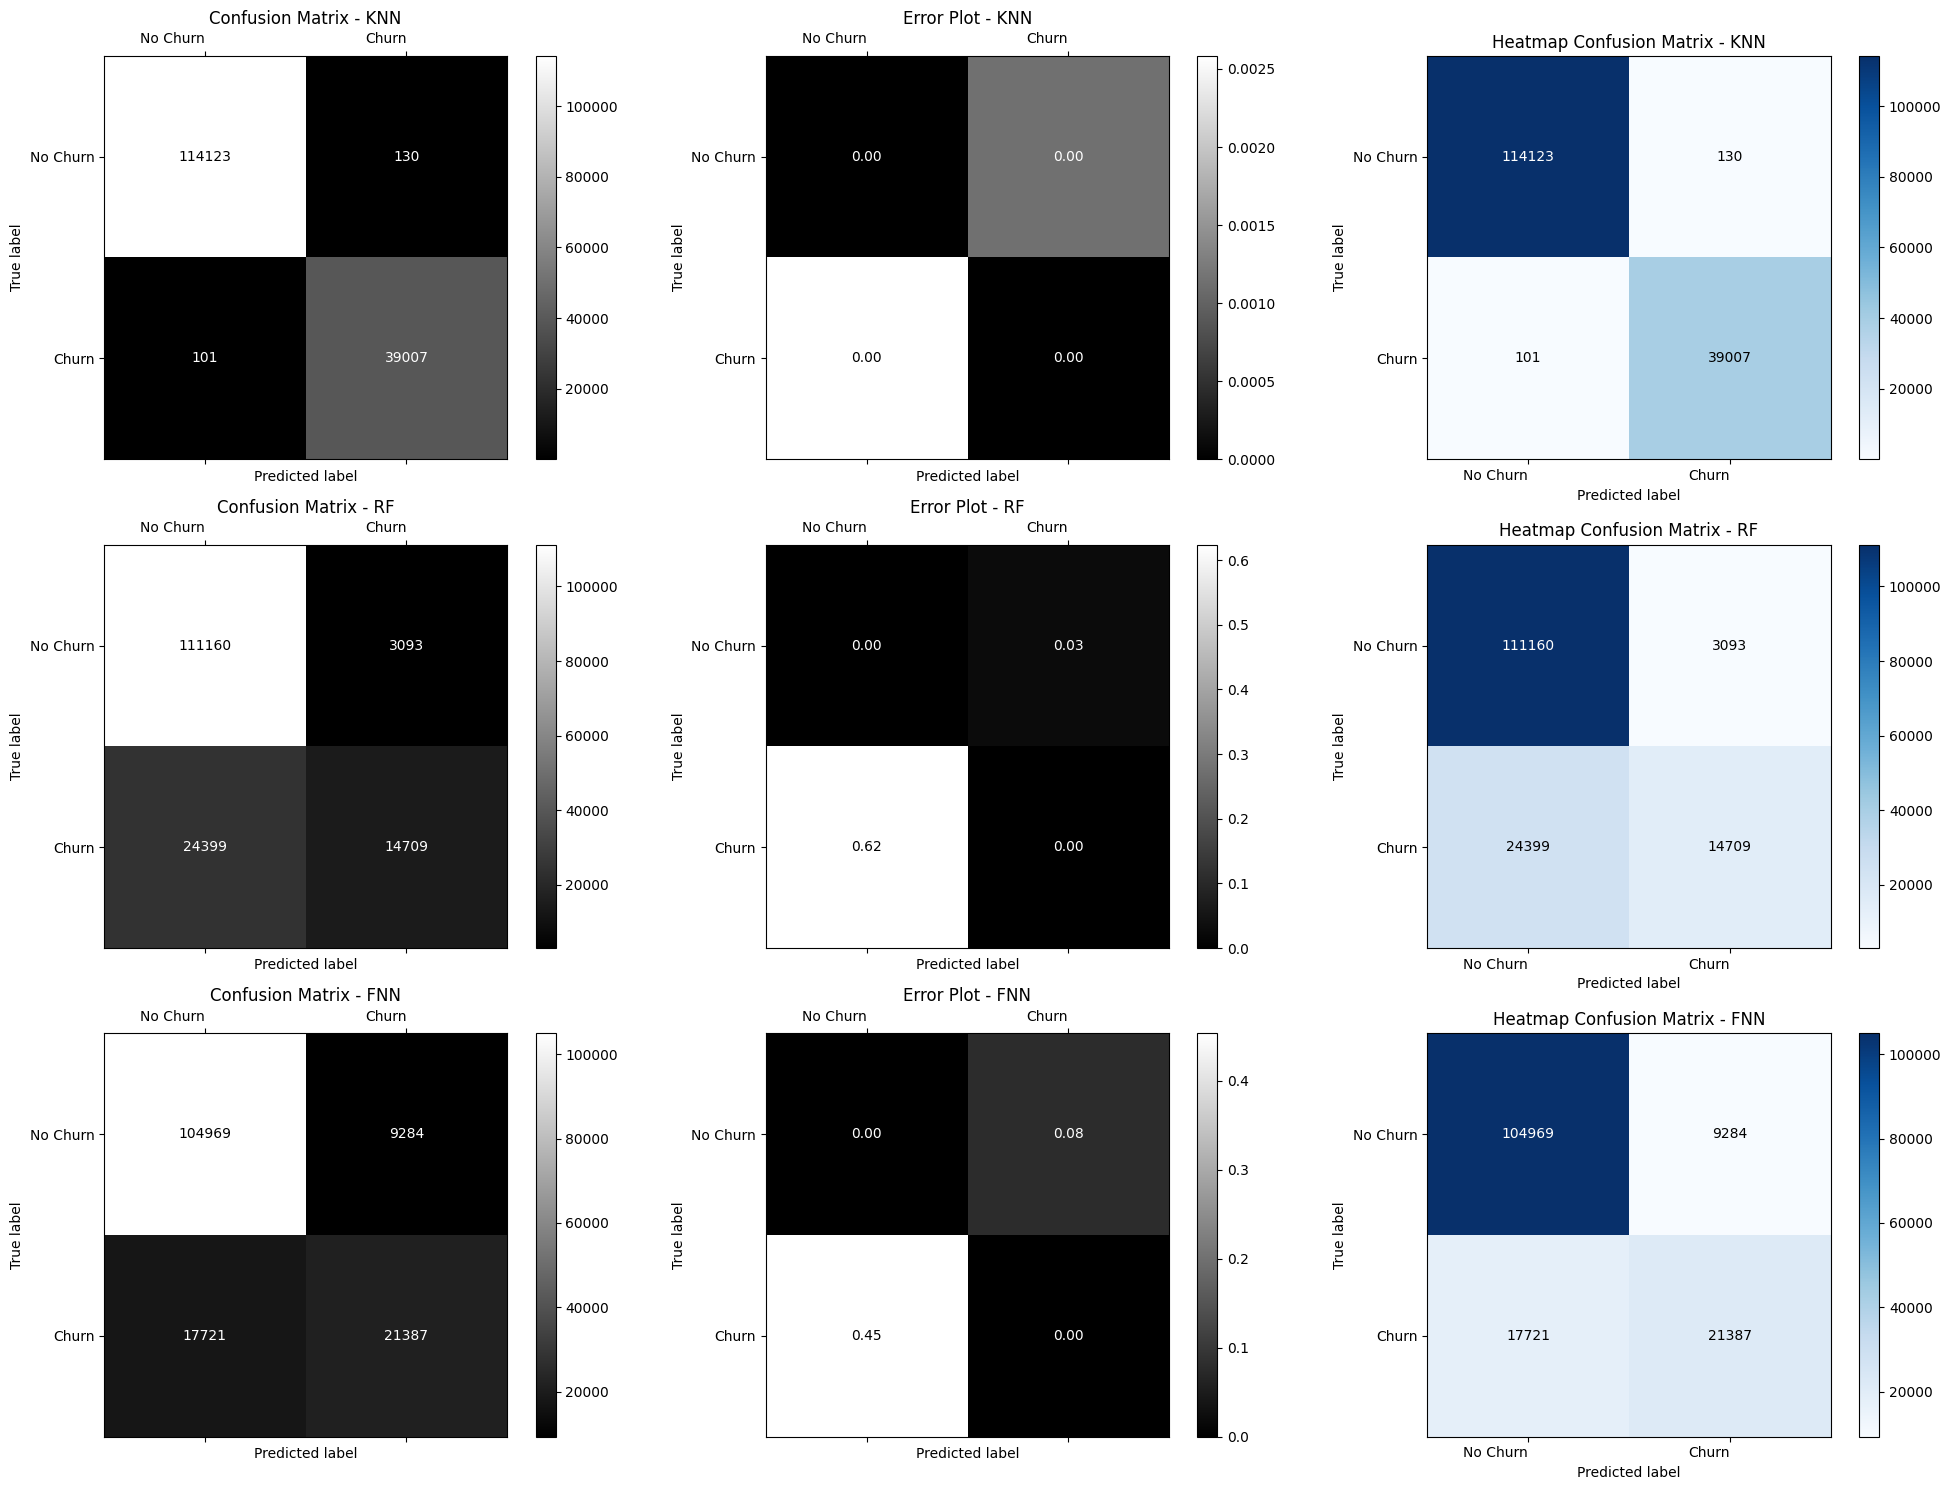

In [159]:
# Define target names for confusion matrix
target_names = ['No Churn', 'Churn'] 

# Filter models to include only RF and XB
filtered_models = [(model_name, classifier) for model_name, classifier in models if model_name in ['RF', 'FNN', 'KNN']]

# Number of rows needed for subplots (3 plots per model)
num_rows = len(filtered_models)

# Create figure and axes
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5*num_rows))

for idx, (model_name, classifier) in enumerate(filtered_models):
    y_pred_plot = eval_results_test[model_name]['Predictions'] 
    y_true_plot = predictions

    # Compute confusion matrix
    cm = confusion_matrix(y_true_plot, y_pred_plot)

    # Compute normalized confusion matrix (as a percentage of true class)
    row_sums = cm.sum(axis=1, keepdims=True)
    norm_cm = cm / row_sums

    # Fill diagonal with zeros for better visualization of errors
    np.fill_diagonal(norm_cm, 0)  

    # Plot raw confusion matrix
    ax = axes[idx, 0]
    mt = ax.matshow(cm, cmap=plt.cm.gray)
    ax.set_title(f"Confusion Matrix - {model_name}")
    ax.set_xticks(np.arange(len(target_names)))
    ax.set_yticks(np.arange(len(target_names)))
    ax.set_xticklabels(target_names)
    ax.set_yticklabels(target_names)
    plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fig.colorbar(mt, ax=ax)
    ax.grid(False)  # Remove grid lines

    # Annotate each cell with the numerical values
    for i in range(len(target_names)):
        for j in range(len(target_names)):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="black" if cm[i, j] > cm.max() / 2. else "white")

    # Plot normalized confusion matrix (error plot)
    ax = axes[idx, 1]
    mt = ax.matshow(norm_cm, cmap=plt.cm.gray)
    ax.set_title(f"Error Plot - {model_name}")
    ax.set_xticks(np.arange(len(target_names)))
    ax.set_yticks(np.arange(len(target_names)))
    ax.set_xticklabels(target_names)
    ax.set_yticklabels(target_names)
    plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fig.colorbar(mt, ax=ax)
    ax.grid(False)  # Remove grid lines

    # Annotate each cell with the numerical values
    for i in range(len(target_names)):
        for j in range(len(target_names)):
            ax.text(j, i, format(norm_cm[i, j], '.2f'),
                    ha="center", va="center",
                    color="black" if norm_cm[i, j] > norm_cm.max() / 2. else "white")

    # Plot heatmap confusion matrix
    ax = axes[idx, 2]
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(f"Heatmap Confusion Matrix - {model_name}")
    ax.set_xticks(np.arange(len(target_names)))
    ax.set_yticks(np.arange(len(target_names)))
    ax.set_xticklabels(target_names)
    ax.set_yticklabels(target_names)
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fig.colorbar(im, ax=ax)
    ax.grid(False)  # Remove grid lines

    # Annotate each cell with the numerical values
    for i in range(len(target_names)):
        for j in range(len(target_names)):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.tight_layout()
plt.show()

### Model ROC Curve on Test Data

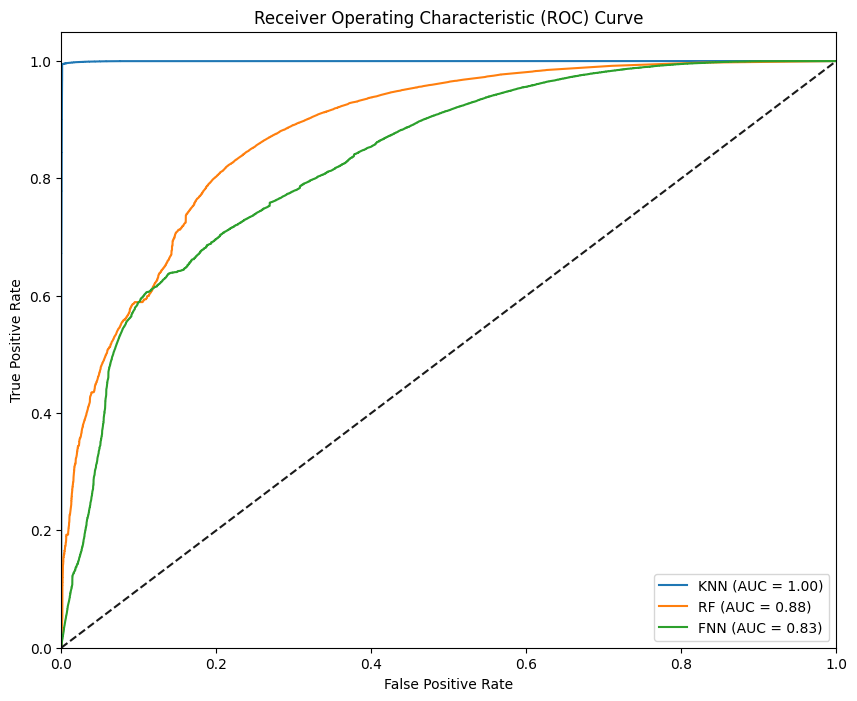

In [160]:
# Initialize results dictionary
roc_eval_results_test = {}

plt.figure(figsize=(10, 8))
for model_name, metrics in eval_results_test.items():
    # Ensure only RF and XB models are processed
    if model_name not in ['RF', 'KNN', 'FNN']:
        continue
    y_prob = metrics['y_prob']
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(predictions, y_prob, pos_label=1)
    auc_score = metrics['ROC AUC Score']

    roc_curve_data_F = pd.DataFrame({
        'False positive':fpr,
        'True positive': tpr,
        'Threshold': thresholds,

    })
    
    # Add ROC curve data to the table
    roc_eval_results_test[model_name] = roc_curve_data_F

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()

In [161]:
# Check optimal threshold value for MLP Classifier
roc_eval_results_test['FNN'].tail(50)

False positive  True positive     Threshold
35457        0.890821       0.999514  1.067684e-14
35458        0.893132       0.999514  5.474218e-15
35459        0.893132       0.999540  5.460425e-15
35460        0.893998       0.999540  4.191973e-15
35461        0.893998       0.999565  4.183604e-15
35462        0.894305       0.999565  3.876474e-15
35463        0.894375       0.999565  3.875234e-15
35464        0.894777       0.999565  3.492506e-15
35465        0.894777       0.999591  3.484672e-15
35466        0.896685       0.999591  2.181531e-15
35467        0.896685       0.999616  2.161054e-15
35468        0.899469       0.999616  1.039319e-15
35469        0.899469       0.999642  1.037766e-15
35470        0.902646       0.999642  4.973851e-16
35471        0.902646       0.999668  4.958502e-16
35472        0.911792       0.999668  6.009359e-17
35473        0.911810       0.999668  5.993535e-17
35474        0.912352       0.999668  5.376768e-17
35475        0.912352       0.999693  5.365824e-17
35476        0.917464       0.999693  1.817735e-17
35477        0.917464       0.999719  1.817269e-17
35478        0.921586       0.999719  7.303649e-18
35479        0.921586       0.999744  7.278365e-18
35480        0.922041       0.999744  6.614631e-18
35481        0.922041       0.999770  6.601283e-18
35482        0.927774       0.999770  1.708159e-18
35483        0.927774       0.999795  1.704453e-18
35484        0.930269       0.999795  9.518245e-19
35485        0.930269       0.999821  9.511973e-19
35486        0.932973       0.999821  5.390985e-19
35487        0.932973       0.999847  5.374734e-19
35488        0.933026       0.999847  5.318821e-19
35489        0.933026       0.999872  5.282569e-19
35490        0.937437       0.999872  2.241018e-19
35491        0.937455       0.999872  2.235610e-19
35492        0.950242       0.999872  2.476356e-20
35493        0.950242       0.999898  2.472920e-20
35494        0.956938       0.999898  8.126632e-21
35495        0.956955       0.999898  8.118611e-21
35496        0.962959       0.999898  2.771913e-21
35497        0.962959       0.999923  2.771783e-21
35498        0.972377       0.999923  3.226995e-22
35499        0.972421       0.999923  3.213883e-22
35500        0.975222       0.999923  1.375245e-22
35501        0.975222       0.999949  1.375236e-22
35502        0.980447       0.999949  2.666994e-23
35503        0.980447       0.999974  2.660163e-23
35504        0.982364       0.999974  1.252945e-23
35505        0.982364       1.000000  1.252784e-23
35506        1.000000       1.000000  6.544836e-34

In [162]:
# Check optimal threshold value LR Classifier
roc_eval_results_test['KNN'].head()

False positive  True positive  Threshold
0        0.000000       0.000000        inf
1        0.000009       0.606014   1.000000
2        0.000009       0.609108   0.666726
3        0.000009       0.630638   0.666667
4        0.000009       0.667613   0.666667

In [204]:
# Copy the Dataframe
df_test_submission = df_test_model.copy()

# Append predictions as a new column to the test dataset
df_test_submission['Predictions_KNN'] = y_test_predictions['KNN']
df_test_submission['Predictions_RF'] = y_test_predictions['RF']
df_test_submission['Predictions_FNN'] = y_test_predictions['FNN']

# Keep only the newly added prediction columns by filtering
pred_columns = [col for col in df_test_submission.columns if 'Predictions_' in col]
df_test_submission = df_test_submission[pred_columns]

# Display the first few rows of the DataFrame
df_test_submission.head(10)

Predictions_KNN  Predictions_RF  \
user_id                                                                     
51fe4c3347db1f8571d18ac03f716c41acee30a4                0               0   
5a4db591c953a8d8f373877fad37aaf4268899a1                0               1   
c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df                0               0   
82efb8dd7e44792e0fc089388013e90b671ec2b3                0               0   
e803ce97eee6f699cb39f12cb50e85e66bcd7c9f                1               1   
9a0fe663d708c4b731e394f7a1f585fd81c9bae3                0               0   
25d98c9dbf347a9aa829b3e2beec891d1cd797c6                0               0   
70ed1200b3ee4e84515aadc9498970822fd39e91                0               0   
1b8aee3005f13673ec7d9e5ffaf4e0f0ae510ace                1               0   
25836b9e191f72b0ed6bac68ca0cda86fbd40bcb                0               0   

                                          Predictions_FNN  
user_id                                                    
51fe4c3347db1f8571d18ac03f716c41acee30a4                0  
5a4db591c953a8d8f373877fad37aaf4268899a1                1  
c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df                0  
82efb8dd7e44792e0fc089388013e90b671ec2b3                0  
e803ce97eee6f699cb39f12cb50e85e66bcd7c9f                1  
9a0fe663d708c4b731e394f7a1f585fd81c9bae3                0  
25d98c9dbf347a9aa829b3e2beec891d1cd797c6                0  
70ed1200b3ee4e84515aadc9498970822fd39e91                0  
1b8aee3005f13673ec7d9e5ffaf4e0f0ae510ace                0  
25836b9e191f72b0ed6bac68ca0cda86fbd40bcb                0

In [183]:
import pandas as pd

# Define the data from the image into a dataframe format
data = {
    'Model': ['KNN', 'FNN', 'RF', 'GB', 'XB', 'LR', 'SVC', 'SGD'],
    'accuracy': [0.917222, 0.857980, 0.852296, 0.850432, 0.848208, 0.803353, 0.799924, 0.801392],
    'precision': [0.880749, 0.833197, 0.816093, 0.826882, 0.827694, 0.775495, 0.769298, 0.780273],
    'recall': [0.965117, 0.895168, 0.909561, 0.886454, 0.879509, 0.853911, 0.856784, 0.839067],
    'log_loss': [1.666058, 0.333490, 0.349253, 0.356106, 0.358441, 0.452254, 0.453505, 0.455636],
    'f1_score': [0.921005, 0.863072, 0.860296, 0.855632, 0.852815, 0.812816, 0.810688, 0.808602],
    'ROC AUC Score': [0.944064, 0.925754, 0.922061, 0.919230, 0.917664, 0.875501, 0.870983, 0.877013]
}

# Create the dataframe
df = pd.DataFrame(data)
df.set_index('Model', inplace=True)
# Set the index name to be blank
df.index.name = None

# Display the dataframe
df_sorted = df.sort_values(by="f1_score", ascending=False)
df_sorted_styled = df_sorted.style \
    .background_gradient(subset=['f1_score'], cmap='Greens') \
    .background_gradient(subset=['log_loss'], cmap='Reds')

print("Model Evaluation Scores:")
df_sorted_styled

Model Evaluation Scores:
